# Section 1 - Using Labeled Dataset to train a classifier

### Section 1.1 - Importing and Pre-processing

In [2]:
#importing basic python packages

import pickle
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

import random

#importing some of the sci.kit functions that are used (more are implementer lower in the notebook)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#importing some of the nltk functions that are used (more are implementer lower in the notebook)

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer, SnowballStemmer

#importing some of the imlearn packages that are used (more are implementer lower in the notebook)

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced

%matplotlib inline

In [7]:
#importing the training dataset file in a csv

data = pd.read_csv('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/Training_DatasetA.csv', encoding = "ISO-8859-1")

data.head(3)

,Label,Content
0,1,my name is klaus rausch im a paraplegic and mo...
1,1,a young girl with cf had a trampoline that she...
2,1,the is a simple medication delivery device dev...


In [8]:
#the code below allows for automatic pre-processing of text into four different forms. I will be using the lemmatize.

def stem_lem_text(s, type='Lancaster'):
    words = s.split()
    
    if type == 'Porter':
        choice = PorterStemmer()
        reformed = [choice.stem(word) for word in words]
    elif type == 'Snowball':
        choice = SnowballStemmer('english')
        reformed = [choice.stem(word) for word in words]
    elif type == 'Lemmatize':
        choice = WordNetLemmatizer()
        reformed = [choice.lemmatize(word) for word in words]
    else:
        choice = LancasterStemmer()
        reformed = [choice.stem(word) for word in words]
        
    reformed = " ".join(reformed)
    return reformed

In [9]:
data['Content_lem'] = data['Content'].apply(stem_lem_text, type='Lemmatize')

In [10]:
data

,Label,Content,Content_lem
0,1,my name is klaus rausch im a paraplegic and mo...,my name is klaus rausch im a paraplegic and mo...
1,1,a young girl with cf had a trampoline that she...,a young girl with cf had a trampoline that she...
2,1,the is a simple medication delivery device dev...,the is a simple medication delivery device dev...
3,1,joe kit bag small case to carry a diabetic day...,joe kit bag small case to carry a diabetic day...
4,1,is a tubeless insulin pump developed by a fath...,is a tubeless insulin pump developed by a fath...
5,1,spacer was developed by paul watson to help hi...,spacer wa developed by paul watson to help his...
6,1,cherie is a year old breast cancer surviver wh...,cherie is a year old breast cancer surviver wh...
7,1,rewalk a robotic exoskeleton to help patients ...,rewalk a robotic exoskeleton to help patient w...
8,1,cadex medical watch cadex is an alarm watch me...,cadex medical watch cadex is an alarm watch me...
9,1,the flyan chair is a light weight wheel chair ...,the flyan chair is a light weight wheel chair ...


In [11]:
data.drop('Content',axis=1,inplace=True)

In [12]:
data

,Label,Content_lem
0,1,my name is klaus rausch im a paraplegic and mo...
1,1,a young girl with cf had a trampoline that she...
2,1,the is a simple medication delivery device dev...
3,1,joe kit bag small case to carry a diabetic day...
4,1,is a tubeless insulin pump developed by a fath...
5,1,spacer wa developed by paul watson to help his...
6,1,cherie is a year old breast cancer surviver wh...
7,1,rewalk a robotic exoskeleton to help patient w...
8,1,cadex medical watch cadex is an alarm watch me...
9,1,the flyan chair is a light weight wheel chair ...


In [13]:
data.to_csv('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/Training_DatasetA_lem.csv', index=None) 

In [14]:
file=open('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/Training_DatasetA_lem.txt', 'r')
raw = file.read()

tokens = nltk.word_tokenize(raw)

text = nltk.Text(tokens)

text

<Text: my name is klaus rausch im a paraplegic...>

In [15]:
len(text)

10742157

In [16]:
len(set(text))

97221

In [17]:
set(text)

{'liveing',
 'draftexpress',
 'mitochonrdrial',
 'panda',
 'patwardhan',
 'kutch',
 'fruitlessly',
 'reductase',
 'motherland',
 'mathari',
 'rituximab',
 'crawdad',
 'savant',
 'sulcus',
 'top',
 'combining',
 'earthwards',
 '_Â™_Ã¶_Â™_________Â™Â†_',
 'fustal',
 'sachdeva',
 'scripting',
 'Â\x90_this',
 'obadugba',
 'vaibhav',
 'taken',
 'popcorn',
 'poorer',
 'allamong',
 'pristem',
 'hai',
 'diagnostic',
 'needful',
 'conceptualizes',
 'ktxl',
 'ignoring',
 'morgan',
 'blackmailed',
 'ellmers',
 'stallone',
 'pardee',
 'bsw',
 'betaxolol',
 'aratana',
 'aiddata',
 'bushnell',
 'tralee',
 'irvin',
 'yesawich',
 'validating',
 'lawrence',
 'logie',
 'acupuncturist',
 'punit',
 'inaugurates',
 'omnivore',
 'craniosynostosis',
 'assassinate',
 'attendee',
 'incurs',
 'selman',
 'bengt',
 'rivonia',
 'eurinvest',
 'reported',
 'veg',
 'prenups',
 'magnet',
 'hairstyle',
 'accellta',
 'stivers',
 'approximated',
 'inherent',
 'boykin',
 'stockomendation',
 'hashim',
 'cawdor',
 'mri',
 '

In [18]:
vocabulary_label = list(set(text))

In [19]:
len(vocabulary_label)

97221

In [20]:
#This cell is only to extract the count of words. Words that have a count of 1 are carried over to the next cell, to be included as stopwords.

from collections import Counter;
cnt = Counter ();


for line in open ('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/Training_DatasetA_lem.txt', 'r'):
  for word in line.split( ):
    cnt [word] += 1

print(cnt)

Counter({'the': 549108, 'to': 316619, 'a': 313183, 'and': 310949, 'of': 293124, 'in': 214434, 'that': 126615, 'for': 124750, 'is': 114318, 'it': 103001, 'with': 88702, 'on': 75940, 'wa': 68864, 'i': 60790, 'are': 59449, 'have': 54356, 'be': 54170, 'by': 53326, 'at': 53258, 's': 52745, 'he': 51148, 'from': 49516, 'we': 46608, 'this': 44270, 'or': 43702, 'not': 43420, 'they': 42813, 'but': 42293, 'ha': 41283, 'an': 40340, 'you': 38624, 'his': 37958, 'said': 37317, 'she': 37180, 'her': 36618, 'their': 36511, 'who': 33510, 'more': 32661, 'can': 31846, 'will': 31549, 'year': 30546, 'people': 28034, 'had': 28009, 'about': 27483, 'our': 27475, 'one': 27211, 'patient': 26092, 'which': 25121, 'all': 23833, 'when': 23685, 'been': 23607, 'there': 22561, 'health': 22353, 'were': 21380, 'new': 20691, 'would': 20608, 'if': 20231, 'child': 20192, 'so': 20135, 'time': 20040, 'my': 19836, 'also': 19832, 'what': 19792, 'other': 19150, 'than': 18987, 'up': 18212, 'out': 17879, 'do': 17706, 'after': 17629

In [49]:
stopwords_add = ['india', 'http', 'https', 'handcycle', 'fortuned', 'handcycles', 'passable', 'losening', 'surviver', 'ibmer', 'wicking', 'databank', 'quietus', 'kesner', 'rearward', 'airhose', 'truefit', 'accessiblity', 'puttingt', 'elastane', 'haberdashery', 'magzip', 'lyndaker', 'automouse', 'arsh', 'dav', 'panipat', 'pauca', 'angelle', 'bunching', 'lifechanging', 'vocalizer', 'voiceovers', 'khusrav', 'bajan', 'sanjith', 'saseedharan', 'vocaliser', 'guillain', 'barre', 'mpsc', 'professionalisation', 'vascularization', 'infobae', 'autoexploration', 'busty', 'dressmaker', 'crossgates', 'brassiere', 'sightica', 'srvc', 'kuluk', 'mapseeker', 'mbillionth', 'imerciv', 'bashkirian', 'patroned', 'kuleshov', 'kuleshova', 'chulpan', 'macrobiotics', 'megadose', 'stereoscopic', 'rosemuthonin', 'martys', 'namugongo', 'baland', 'facekini',  'shazza', 'handyman', 'gurnard', 'miniskirt', 'elmes', 'sutd', 'lta', 'diagonally', 'retracts', 'radu', 'postole', 'samburu', 'trompe', 'micropigmentation', 'downingtown', 'jenifer', 'stramacchia', 'shahar', 'dislodgment', 'trendlines', 'misgav', 'pevely', 'producible', 'gopichandran', 'coronory', 'exfoliate', 'exfoliates', 'protip', 'hmooney', 'biogeochemistry', 'rewash', 'gamechangers', 'teryn', 'lubricity', 'frizz', 'brookestone', 'medymatch', 'tct', 'enopace', 'paragate', 'tensortip', 'cnoga', 'kei', 'corita', 'parnassus', 'kalie', 'wazoo', 'kinzer', 'bester', 'sharecropper', 'rochelleriley', 'cesarek', 'cesareks', 'tiberius', 'funfilled', 'shimon', 'crestfallen', 'yuval', 'halamish', 'herzl', 'gavriel', 'danino', 'leibler', 'hanukka', 'yiddish', 'matriach', 'multifaith', 'sasja', 'rabbinical', 'mezuzah', 'hamotzi', 'kippah', 'sanctify', 'chazia', 'maldistribution', 'decayed', 'grindstone', 'caries', 'satiate', 'godless', 'nrlc', 'trocar', 'acrimony', 'ppl', 'morsa', 'schaffzin', 'gritting', 'frogmarched', 'peeve', 'kwaens', 'wareness', 'sfwld', 'chromosonal', 'fledging', 'ventanas', 'bleecker', 'sazerac', 'chaperoning', 'intar', 'ninetieth', 'haveli', 'banjara', 'shortchange', 'fixit', 'gainesnetanyayes', 'simonjerusalemin', 'inselbergra', 'ananawith', 'lubowitzkarmielyour', 'obviating', 'denomination', 'sternsalford', 'ukall', 'tirdoff', 'fischerjerusalemthe', 'suessical', 'baselessly',  'clevland', 'counteredthat', 'thatwere', 'labos', 'mehra', 'lorian', 'cardiogram', 'taijiquan', 'assister', 'thriftiness', 'adrianhancu', 'shepherding', 'rhoa', 'sayin', 'instinctually', 'shireley', 'mumble', 'midair', 'desoto', 'hernando', 'manatee', 'coarsing', 'sweettooth', 'ralt', 'robos', 'derbying', 'koreatown', 'otero', 'mistah', 'squala', 'fantuzzi', 'weedmaps', 'sensi', 'vivarito', 'ieishah', 'unlikelier', 'snapchatting', 'pecked', 'seine', 'twinkled', 'rutenberg', 'morison', 'batiste', 'perugia', 'unfollowed', 'tumulty', 'blancharde', 'dilley', 'bolby', 'acronymic', 'ubermensch', 'sleigh', 'hatchy', 'keychains', 'shhh', 'colourless', 'yuba', 'geyserville', 'woodcheke', 'corneiro', 'chp', 'backtracking', 'natacha', 'taxicab', 'ismailanji', 'edleun', 'avatarmind', 'ipal', 'alekssagan', 'iliuska', 'rudzicz', 'carebots', 'inder', 'blenkhorn', 'nuccio', 'ingenue', 'blowhard', 'omarosa', 'manigault', 'megadeth', 'sisi', 'inconceivably', 'frenemies', 'exultation', 'montenegrin', 'dusko', 'markovic', 'steelier', 'taormina', 'unfamiliarity', 'minnow', 'nicolae', 'frayer', 'zayas', 'klg', 'mamelodi', 'lineo', 'pugh', 'joinder', 'refiled', 'uncapped', 'kempt', 'appellant', 'charlene', 'epically', 'outspokenness', 'foreclosing', 'iljana', 'cissy', 'ipcsca', 'ejidike', 'njelita', 'chkwudi', 'tarnow', 'genesee', 'loriahiggins', 'kriti', 'shahram', 'cragislist', 'notarobot', 'careworkers', 'dorogi', 'curlz', 'collapseandgo', 'collapsacup', 'traveltray', 'pht', 'brillibaby', 'teethers', 'planar', 'duffield', 'brazoria', 'yenne', 'hutto', 'buhl', 'evin', 'merice', 'upbring', 'sohyeon', 'sepulvado', 'cobler', 'bulldozes', 'gaudilab', 'listlessly', 'wecounsel', 'premack', 'epiphanic', 'ruanui', 'mokopuna', 'taonga', 'poppycock', 'priyanca', 'misreported', 'outbidding', 'onsold', 'corruptible', 'corruptibility', 'traumatise', 'characterising', 'relitigate',  'trichophilia', 'cayetano', 'secillano', 'antimarriage', 'risa', 'hontiveros', 'bioelectronics', 'swanlund', 'invasively', 'ahn', 'jongno', 'amadeus', 'transcribes', 'textually', 'flub', 'ungava', 'ghislain', 'coutinho', 'chickadee', 'repetitiveness', 'lycia', 'kevingriffin', 'kaffes', 'jacindaardern', 'nzclarke', 'genderequality', 'proudkiwi', 'helenclarknz', 'richelle', 'kosse', 'toyboy', 'kouetney', 'tuckered', 'nuzzle', 'kourt', 'girding', 'telfer', 'mumsy', 'egregiousness', 'massgeneral', 'sansei', 'grc', 'calculative', 'pmets', 'khaw', 'impairement', 'deputising', 'billowing', 'anticlimax', 'masvingo', 'presumptuousness', 'irk', 'chitungwiza', 'stawart', 'militarism', 'matebeleland', 'ndebele', 'mdct', 'rigmarole', 'extricating', 'ramaphosa', 'raphaelsgore', 'chevonette', 'liguanea', 'chev', 'themself', 'ggs', 'sharmaine', 'pontus', 'janne', 'vimbai', 'manase', 'hebson', 'akakutaurirai', 'mubvunzei', 'kurambidzwa', 'chinamasa', 'featherbedding', 'rancourous', 'tamborinyoka', 'kenridge', 'npf', 'joice', 'mujuru', 'mashonaland', 'prabowo', 'subianto', 'jababeka', 'sembcorp', 'palolo', 'waikiki', 'proletariat', 'brasserie', 'sifts', 'reinsertion', 'geoffroy', 'lagasnerie', 'reims', 'sympathizing', 'caricatural', 'slangy', 'lorin',  'miserablist', 'mhlanga', 'auxilia', 'gerocognitive', 'sharre', 'davidgallan', 'naela', 'weigle', 'brachio', 'hewittsnew', 'bookperfectionism', 'hewitts', 'collaboratorgordon', 'humblebrag', 'perfectingthings', 'bothamericanandaustralianadolescents', 'papertracked', 'ineating', 'likeirritable', 'fromheart', 'diseaseandtraumatic', 'incancer', 'orruminatingabout', 'blattfoundperfectionism', 'andmultiplestudieshavefoundlinks', 'notthe', 'stoneputspet', 'soundsas', 'bandis', 'bemore', 'procrastinate', 'inperfectionism', 'assumerelationships', 'awaymakes', 'theyll', 'islike', 'defectiveness', 'changemaker', 'janssenus', 'cpavis', 'rinsed', 'cefazolin', 'fortuitum', 'chelonae', 'nocardia', 'recalcitrance', 'allisonbondmd', 'sacrum', 'abbreviate', 'alini', 'dac', 'scotti', 'saomeone', 'upasana', 'baruah', 'ruberti', 'newnan', 'fayette', 'recollect', 'homemaking', 'carejourney', 'leeza', 'kedar', 'mentation', 'westphal', 'professionalized', 'galbier', 'outshines', 'perseveration', 'gimli', 'portage', 'corsage', 'bugle', 'hakima', 'tafunzi', 'uppity', 'fleda', 'arline', 'whitest', 'academe', 'habiba', 'boded', 'lovenox', 'haywood', 'fluctuant', 'plateful', 'xray', 'critcize', 'sfmc', 'hamden', 'grenet', 'regenstrief', 'phanasi', 'gewog', 'urinates', 'damber', 'jigme', 'wangchuck', 'disorganised', 'tsehring', 'jdwnrh', 'mindu', 'bhutanese', 'tranquilised', 'phuntsho', 'gopibhutanese', 'penniment', 'alcidion', 'munno', 'kyam', 'optofab', 'tonsley', 'networkdear', 'abo', 'automised', 'phonelines', 'bitish', 'madeaux', 'higson', 'offficer', 'circuimstances', 'aamir', 'minutest', 'sartaj', 'tambo', 'factionalism', 'flees', 'constantino', 'chiwenga', 'ferragamo', 'politburo', 'mulgrave', 'epigallocatchin', 'gallate', 'mattilsynet', 'nutra', 'metabolising', 'fyvie', 'iptr', 'multiagency', 'cancerand', 'affectedbreast', 'breastmodern', 'meritxell', 'miniaturisation', 'microinstruments', 'thence', 'haptic', 'tumorous', 'dhirajlal', 'oramorph', 'bapuji', 'kishoree', 'dipti', 'nichil', 'insistently', 'hessa', 'buhumaid', 'lubna', 'bloushi', 'tatweer', 'rubu', 'qarn', 'askar', 'naqbi', 'khawla', 'shanasi', 'saif', 'noha', 'safar', 'adalat', 'nakash', 'taryam', 'saqr', 'varouj', 'nerguizian', 'heathcliff', 'lanlsey', 'prostectomy', 'cryosurgery', 'metastasizes', 'smut', 'negligee', 'fondue', 'bunkum', 'warmness', 'newspost', 'blitzed', 'reiser', 'pellman', 'mazzant', 'playersnfl', 'elongating', 'authenticator', 'rodd', 'gillislee', 'shoehorn', 'lockette', 'skol', 'mandible', 'hakuna', 'zagreb', 'kayvon', 'nickell', 'robey', 'jobsthe', 'langsdorf', 'butwhen', 'clinedion', 'cybex', 'maccagnan', 'martellus', 'snf', 'natsuki', 'nfljerseys', 'brawling', 'schnotz', 'mcadoo', 'blacksburg', 'outmaneuver', 'serenade', 'isolynx', 'vizoz', 'defi', 'blogview', 'morefau', 'blogwhy', 'shandel', 'richardsonit', 'aiddata', 'valentina', 'matmcbriar', 'australianrules', 'steeler', 'worilds', 'cortland', 'helu', 'burkhead', 'watchchicago', 'mhen', 'themba', 'mhango', 'suzgo', 'mzumara', 'mzuzu', 'lunguzi', 'iims', 'sadako', 'homointellicentrism', 'burgeoned', 'acnc', 'macrene', 'miseducation', 'shockwave', 'soundwaves', 'chrissalvatore', 'ceyda', 'torun', 'oscilloscope', 'anthropomorphizing', 'deliverer', 'nyagonga', 'ravishing', 'itms', 'pollutive', 'newater', 'comcare', 'medifund', 'sportcares', 'coes', 'sandman', 'brinckerhoff', 'abady', 'chua', 'graduands', 'msds', 'twill', 'sirloin', 'vapes', 'toking', 'sxe', 'ltr', 'submissives', 'ewens', 'dougan', 'borneowas', 'watgunge', 'topnotch', 'sixto', 'unexpired', 'jejomar', 'bongbong', 'romulo', 'kapihan', 'adriatico', 'sereno', 'pambansa', 'methinks', 'commodious', 'koren', 'jollier', 'striatal', 'midbrain', 'befalls', 'drugeducation', 'drugfreeworld', 'barrymore', 'macaulay', 'demasculinize', 'autocracy', 'yiannopoulus', 'tousle', 'dilbert', 'morell', 'housebroken', 'ramandeep', 'athwal', 'anethesiologist', 'buttermilk', 'hardage', 'timelapse', 'cbrl', 'janella', 'ifyouve', 'kapan', 'goris', 'vanadzor', 'gyumri', 'armavir', 'hatsik', 'chambarak', 'coaf', 'treatmemt', 'doctorshub', 'nigerialet', 'confidentialitythis', 'consentwhat', 'treatmemtthis', 'timestandard', 'deasia', 'wlwt', 'decapitating', 'motunrayo', 'zikora', 'tollways', 'jooyoung', 'jello', 'portioning', 'lavoy', 'needlepoint', 'spangler', 'disanti', 'neenah', 'tody', 'xian', 'avowing', 'yolo', 'christopoulos', 'nanyang', 'earlywas', 'insuranceon', 'jobsor', 'adultstens', 'americansare', 'caregiversend', 'neglecttheir', 'wasolder', 'tanking', 'economicsfound', 'legerdemain', 'sabertooth', 'ranoba', 'baoa', 'shratikan', 'postmarked', 'incometax', 'spe', 'fathimah', 'marshland', 'kunaa', 'kabraji', 'jessa', 'bookslut', 'venker', 'schlafly', 'pyre', 'equalism', 'shrillness', 'feminazi', 'slims', 'ghomeshi', 'imperialistic', 'swick', 'hpoe', 'yongzhou', 'corwin', 'elderspeak', 'kanav', 'hasija', 'naacos', 'datashop', 'healthsystems', 'wolters', 'kluwers', 'pierclaudio', 'puna', 'twardowski', 'yadi', 'cobblestone', 'submerge', 'dannatt', 'perham', 'psaid', 'hessed', 'bctf', 'emailvantips', 'krishan', 'dansville', 'laywer', 'greydanus', 'ajm', 'kinvarra', 'mathan', 'inz', 'devoy', 'unshackle', 'polycotton', 'drawstring', 'wonderbags', 'wonderpad', 'coloradoans', 'bicha', 'brannum', 'abrannum', 'xing', 'bugler', 'felly', 'snuffy', 'carolins', 'ghoul', 'broadalbin', 'regretful', 'nosesone', 'possibleeven', 'itworked', 'patientsthey', 'generaljosh', 'rightpeople', 'programsoften', 'generaldr', 'adamsstood', 'tolie', 'opioidsjoin', 'univer', 'unimagined', 'enright', 'lijuan', 'jianyong', 'testily', 'unguardedly', 'disempowerment', 'bulged', 'scolty', 'banchory', 'grampian', 'woolnough', 'rainsberry', 'mcanulty', 'attipa', 'papiloma', 'changzheng', 'tobe', 'wustlmed', 'becerril', 'monterrey', 'abscopal', 'albyn', 'saltoun', 'tummel', 'nirajan', 'neobladders', 'sinfield', 'dachshund', 'aiello', 'kassandra', 'iasis', 'illustrationer', 'preeya', 'vadgama', 'ferg', 'hemmingway', 'flatline', 'retroperitoneal', 'avoidhurricane', 'mayorexpanded', 'mostpowerful', 'nationallyis', 'wigging', 'gotso', 'remembersthe', 'endocrinologistswho', 'centralising', 'recuit', 'bole', 'jenrick', 'griffths', 'bridgen', 'kneejerk', 'sigmoidoscopy', 'mcalpines', 'wigram', 'waimak', 'mayoralty', 'glistening', 'kairaki', 'rostov', 'auke', 'offside', 'basten', 'rinus', 'jonk', 'unremarked', 'heracles', 'vitesse', 'arnhem', 'internazionale', 'gullit', 'cruyffian', 'velibor', 'vasovic', 'onana', 'viergever', 'jari', 'litmanen', 'konstantatos', 'beyhan', 'gracing', 'Â†Ã£m', 'showbusiness', 'forefinger', 'daltrey', 'acclimatised', 'estepona', 'flattered', 'horsing', 'kinking', 'ledcor', 'misericordia', 'valentinuzzis', 'kamloops', 'factbox', 'joshlia', 'julianella', 'starringand', 'caloy', 'roadtrip', 'duoandtook', 'byand', 'dubber', 'leyl', 'assisi', 'boshoff', 'alise', 'reicin', 'pyrophosphate', 'phosphaplatins', 'caiden', 'kylan', 'spada', 'solarium', 'melnet', 'hendler', 'teae', 'tubule', 'lenvima', 'overreacts', 'schmoozing', 'schmooze', 'vey', 'iaslc', 'hasproposed', 'billionfrom', 'parentsfacebook', 'emmitt', 'jessen', 'kempinsiki', 'kempensiki', 'nyarkoety', 'jehovahistic', 'elohistic', 'jehova', 'furtherly', 'kwabena', 'amponsah', 'ofori', 'adeniran', 'frimpong', 'lekma', 'rng', 'ibam', 'fertilizes', 'eun', 'kyung', 'sharat', 'damodar', 'somersworth', 'nhdp', 'beadily', 'exactingly', 'eurocrats', 'chateau', 'pottering', 'dodington', 'harrier', 'tavernas', 'cyclonic', 'bagless', 'malmesbury', 'twinkly', 'whirr', 'eurgh', 'orangery', 'icleand', 'timeofmylife', 'bayne', 'harney', 'disinhibited', 'syndrom', 'carnivalesque', 'willowy', 'cinch', 'seashore', 'mutilate', 'baybees', 'clapboard', 'debiasse', 'firehouse', 'muzzling', 'nitrous', 'sodomized', 'prepubescents', 'philadephia', 'dailey', 'markell', 'merryn', 'rescript', 'margietrende', 'mfishman', 'arijitbasu', 'sampoorn', 'surakha', 'mera', 'sflexi', 'vighneshshahane', 'indemnify', 'atentry', 'curtsy', 'hertzel', 'healthnewsreview', 'rauhala', 'ginette', 'petitpas', 'yoni', 'freedhoff', 'ossai', 'igwe', 'ikechukwu', 'oji', 'contrarily', 'igboland', 'textarea', 'crrm', 'lovorn', 'vicksburg', 'murrah', 'bovary', 'caretaking', 'weissnix', 'epigraph', 'stogran', 'kingsport', 'pathbreaking', 'eing', 'inchon', 'brassy', 'downrange', 'telecommute', 'workingmom', 'onmygrind', 'judgers', 'coache', 'olicer', 'tcl', 'scallon', 'kathelen', 'extraosseous', 'boonshoft', 'microcomputer', 'jsullivan', 'dyoung', 'koma', 'fyc', 'hoda', 'kotb', 'openng', 'beest', 'andromedon', 'sheinelle', 'wedneday', 'sportime', 'performative', 'hamminess', 'rippon', 'caeymaex', 'electrochemiluminescence', 'adid', 'extrapulmonary', 'legionellosis', 'mycoses', 'hstcl', 'aptt', 'asthaenia', 'leukopaenia', 'lymphopaenia', 'neutropaenia', 'pancytopaenia', 'hypercoagulation', 'thrombophlebitis', 'cytopaenia', 'musculoskelet', 'clowse', 'topcomments', 'dkos', 'sweetbriar', 'visualizing', 'antonucci', 'akirema', 'shhhh', 'stax', 'cminus', 'expatgirl', 'unduna', 'doctorwho', 'liveblog', 'northcountryny', 'lickspittles', 'jotter', 'dailykos', 'mojo', 'articleguid', 'ambulancia', 'caminante', 'rdsp', 'fleeced', 'dugald', 'victimt', 'balloonsliftup', 'spokesballoon', 'beballoonsmart', 'gatecrashed', 'huiyan', 'jing', 'tham', 'nalachandran', 'whatevercare', 'crapo', 'halvorsen', 'westeren', 'maiz', 'collison', 'dealbook', 'voyagermed', 'pejeta', 'unfertilized', 'fetching', 'leibniz', 'kyushu', 'hayashi', 'washingtonpost', 'newsworld', 'toves', 'intergenerationally', 'plateaued', 'demur', 'niza', 'reconnects', 'bongile', 'mantsai', 'trengove', 'ostracism', 'mustaqeem', 'mxolisi', 'mngadi', 'mondli', 'heinousness', 'pinetown', 'sunnydale', 'hellmouth', 'songbook', 'soulless', 'zeppo', 'tonally', 'upn', 'joss', 'seeley', 'lovelorn', 'supergirl', 'bonafide', 'huntress', 'marshaled', 'overcontrolling', 'backtrack', 'joanie', 'realronhoward', 'baahubali', 'superstardom', 'munnabhai', 'munna', 'raho', 'munnbhai', 'angsty', 'sorak', 'assuredness', 'standupforthem', 'unsworn', 'jpra', 'aberly', 'audry', 'ellingson', 'morita', 'gennarelli', 'housecalls', 'shimmied', 'noisily', 'svt', 'tesi', 'aschan', 'fightbloodcancer', 'charcuterie', 'seni', 'fashionistas', 'irwindale', 'chrystalleni', 'stivaros', 'huy', 'outflanked', 'spicemaker', 'smucker', 'hormel', 'moskow', 'mayra', 'flavoring', 'zlati', 'zlatimeyer', 'dannel', 'jazmine', 'meurrens', 'whitewood', 'sask', 'perniciousness', 'delegitimatization', 'aliment', 'applebee', 'bulldogged', 'onwuachumba', 'bolarinwa', 'coreclectal', 'fobt', 'biometeorologist', 'vanos', 'arrigan', 'arklowcancersupport', 'balbriggancancer', 'ballinasloecancer', 'rathgar', 'dooradoyle', 'larcc', 'coole', 'multyfarnham', 'williamsons', 'iorrais', 'belmullet', 'caraiorrais', 'clonmel', 'caresupport', 'cois', 'walkin', 'coisnore', 'coiste', 'scaoil', 'saor', 'ailse', 'ionad', 'naomh', 'bunbeg', 'ionadnp', 'cliffdale', 'rossa', 'westcork', 'cavan', 'cuisle', 'laois', 'cuislecentre', 'ballyfermot', 'eist', 'drogheda', 'kerrycancersupportgroup', 'castlebar', 'rohdu', 'scsc', 'solas', 'suaimhneas', 'clonaslee', 'gortland', 'nenagh', 'suaimhneascancersupport', 'suir', 'thurles', 'suirhaven', 'trustus', 'ctallaght', 'wicklowcancersupport', 'faafoi', 'exasperates', 'claud', 'diversional', 'healthcert', 'auditable', 'panteleimon', 'cbctoronto', 'greektown', 'ayanwale', 'omotayo', 'schulich', 'bottlerock', 'addario', 'nasc', 'caseloads', 'nascs', 'manacled', 'tsankov', 'livius', 'varick', 'genuin', 'orse', 'exultant', 'remodelers', 'whoppingly', 'wallboard', 'florenz', 'retrofitting', 'dishwashing', 'shawarghi', 'repaving', 'frisco', 'contessa', 'goyette', 'bjs', 'blindsiding', 'stallworth', 'gongora', 'andraychak', 'crewmembers', 'crewmember', 'reoccurrence', 'fontaine', 'jordana', 'coopey', 'salewa', 'oseni', 'gillett', 'genworth', 'manipon', 'ysabella', 'isang', 'saglit', 'eusebio', 'assuaged', 'gio', 'gahol', 'sundalong', 'kanin', 'boksingero', 'baconaua', 'purgatoryo', 'qcinema', 'barrozo', 'platte', 'freshlo', 'montbello', 'inci', 'loretto', 'perceptually', 'artlab', 'ebishop', 'fallwartburg', 'nunes', 'wartburgwartburg', 'linkswartburg', 'ltor', 'seniorudr', 'provostdr', 'wartburgjames', 'yorkmedia', 'dorval', 'bochner', 'zucchini', 'danspector', 'nonpsychoactive', 'touse', 'keizer', 'yourmedical', 'evaluationfrom', 'grobo', 'costochondritis', 'givedirectly', 'combinator', 'fullcommunism', 'gorz', 'immiseration', 'disemploy', 'frase', 'handspring', 'treos', 'acemoglu', 'restrepo', 'druthers', 'naidich', 'niskanen', 'crispest', 'battistoni', 'antipoverty', 'surveyusa', 'imediaethics', 'ochlocknee', 'buzzworthy', 'alllivesmatter', 'warmups', 'mosby', 'malley', 'ranted', 'retrial', 'victimizer', 'stinson', 'bloodstained', 'mahaffy', 'mahaffey', 'siems', 'murderpedia', 'masonry', 'exaggerates', 'galan', 'nurturer', 'annmarie', 'lanoce', 'sanisha', 'yesenia', 'yeseniasparkles', 'deboise', 'snitched', 'paktika', 'lacour', 'desmarais', 'cusk', 'kirchoff', 'simile', 'akkad', 'betasamosake', 'zoey', 'hairpin', 'burgeons', 'chariandy', 'foretold', 'crosbie', 'unswerving', 'lubrin', 'rupi', 'mcgoogan', 'mcconvey', 'juxtaposes', 'phosphorescence', 'esplanade', 'messiah', 'thrillerish', 'enlivened', 'poplak', 'slone', 'derrickson', 'lorimer', 'decolonizing', 'maskalyk', 'canlit', 'staines', 'grescoe', 'bigwig', 'macskimming', 'agg', 'chantal', 'braganza', 'birding', 'naben', 'matti', 'scaachi', 'koul', 'acerbic', 'zarqa', 'shribman', 'popplewell', 'dollhouse', 'bitingly', 'merilyn', 'bookmaking', 'helge', 'dascher', 'straitened', 'yanow', 'expressionist', 'songy', 'panter', 'irreverently', 'truculent', 'xue', 'yiwei', 'sterk', 'nightwood', 'scheherazade', 'chizine', 'srinath', 'perur', 'disinters', 'kintu', 'minotaur', 'denfeld', 'tiang', 'ratiocination', 'ozirny', 'dimaline', 'kirkus', 'balzer', 'stapley', 'proulx', 'shatteringly', 'tenenbaums', 'jenoff', 'esme', 'pavlovic', 'groundwood', 'falconer', 'dlouhy', 'rothko', 'forsythe', 'leafing', 'lucey', 'semley', 'phantasmal', 'multiverses', 'solipsism', 'ottessa', 'moshfegh', 'likeability', 'impli', 'intransigence', 'hazarding', 'ijc', 'gearhart', 'dinino', 'mcclain', 'dreamhampton', 'feloniously', 'unfeminine', 'domesticity', 'albelda', 'abramovitz', 'sates', 'tillmon', 'redistributive', 'underregulated', 'uncomprehending', 'unmoving', 'rebar', 'underbrush', 'chrysanthemum', 'reproached', 'memorialized', 'reverentially', 'unchallenging', 'quizzically', 'canted', 'papery', 'permed', 'gaped', 'nonchalantly', 'boorish', 'wino', 'sympathized', 'itaewon', 'dishrag', 'doorsill', 'redial', 'noncommittal', 'rootlet', 'griping', 'skittle', 'kendrec', 'mcdade', 'weaponless', 'amadou', 'inapplicable', 'coursed', 'tribally', 'salva', 'entente', 'nestling', 'wanyeki', 'tomping', 'kajo', 'equatoria', 'aloyo', 'slowness', 'giebel', 'catsimatidis', 'bernalillo', 'leftward', 'bingaman', 'griego', 'ogle', 'yayas', 'fashionably', 'cubao', 'jeepney', 'gaslighted', 'cpacian', 'cottager', 'yous', 'rebudgeting', 'pinged', 'letterhead', 'trainable', 'lefthand', 'vocalizing', 'overstatement', 'wartorn', 'dysmorphia', 'coore', 'kayanne', 'sajato', 'esmond', 'alisia', 'rilke', 'tchotchke', 'fireproof', 'vigorita', 'clarita', 'mandala', 'daishonin', 'doyel', 'lowcountry', 'chhabria', 'pdemko', 'deconcini', 'symms', 'richetti', 'bgr', 'tarplin', 'nvg', 'quawpaw', 'nooyi', 'matsou', 'carriecaptured', 'rawpixel', 'bluecinema', 'perkmeup', 'bugabees', 'recob', 'oneupmanship', 'squaredpixels', 'kinia', 'valarie', 'zeithaml', 'adoptable', 'strobing', 'obliges', 'tokenism', 'queerness', 'nondeviants', 'cowriter', 'mangeot', 'denzel', 'docudrama', 'shilts', 'sexualized', 'nyswaner', 'freeheld',  'cowritten', 'borten', 'melisa', 'wallack', 'gadfly', 'brookner', 'perestroika', 'ironson', 'shenkman', 'hardheaded', 'reinartz', 'maritaud', 'haenel', 'envie', 'vives', 'performatively', 'feebly', 'caressing', 'hungrily', 'couplehood', 'borenstein', 'studvent', 'karmanosis', 'idell', 'wertz', 'stefany', 'wdiv', 'wfdf', 'dbusiness', 'unpardonable', 'selfidentifies', 'tsj', 'mgr', 'episcopate', 'hiranandani', 'powai', 'nios', 'sarwar', 'iprs', 'sublicensing', 'sooo', 'shuddered', 'rabble', 'juliedevaney', 'bantering', 'comportment', 'largeness', 'lacan', 'communed', 'clattering', 'breadcrumb', 'americano', 'hiss', 'foraged', 'braked', 'talismanic', 'tinks', 'chowder', 'bawdy', 'punchlines', 'tsked', 'carafe', 'selfsame',  'gesticulator', 'fatalist', 'preposterousness', 'alcott', 'barwick', 'pelaez', 'viewstock', 'dooming', 'deanlets', 'unprofessionally', 'execessive', 'vacates', 'rephrased', 'kym', 'infront', 'bookthe', 'morebut', 'mistakeif', 'toothere', 'routeto', 'csh', 'recommencement', 'fulminating', 'cauvery', 'westernisation', 'tamizhan', 'arafat', 'royapuram', 'revathy', 'sivakami', 'perungaluthur', 'tamukkam', 'sellur', 'vaigai', 'coimbatore', 'poorvaja', 'sunitha', 'ramakrishnan', 'adoo', 'gpha', 'emcllc', 'guwahati', 'promptness', 'allredallequal', 'vomitory', 'chartlon', 'retrocession', 'generali', 'nondiscriminatory', 'disenroll', 'homebuyers', 'sfu', 'quantifiably', 'seeps', 'natured', 'micorport', 'neurothrombectomy', 'ruinning', 'insufficent', 'mastaeg', 'arrriva', 'porth', 'coryton', 'birchgrove', 'rhiwbina', 'cortyton', 'nunn', 'rhymney', 'bargoed', 'catrin', 'dft', 'owain', 'despising', 'tonypandy', 'enbasement', 'treharris', 'bedlinog', 'vivarail', 'gwr', 'radyr', 'gowerton', 'redoubling', 'loughour', 'crosskeys', 'infr', 'yellowknife', 'retried', 'nunatsiavut', 'rowlson', 'nunavummi', 'makinnasuaqtiit', 'yle', 'akinrinade', 'olusola', 'jinadu', 'panti', 'okezie', 'aje', 'iyana', 'ambodes', 'chimezie', 'ekene', 'nurtw', 'effrontery', 'arakale', 'ogodo', 'igbatoro', 'waidi', 'owoseni', 'waidis', 'jamilu', 'nunugwo', 'torturethe', 'arase', 'chambersthe', 'bakura', 'tureta', 'hajiya', 'binta', 'abdulahi', 'usmanu', 'danfodiyo', 'reporta', 'cutlas', 'netsanet', 'belay', 'tabaywhen', 'torturewhen', 'abujaknown', 'abattoirin', 'conventioncommon', 'discountenanced', 'okesie', 'akeem', 'fashola', 'agunbiade', 'afiz', 'ringim', 'agape', 'olude', 'oyetunji', 'adesoye', 'akala', 'lekan', 'delayedthe', 'omola', 'victimsquadri', 'omolato', 'speaka', 'arraign', 'uwandu', 'ledap', 'ledaps', 'egboka', 'erring', 'renson', 'majengo', 'mapya', 'flue', 'nyumba', 'kumi', 'mwabili', 'mart', 'abortive', 'abdulkabeer', 'hishan', 'flashcard', 'onenote', 'inking', 'akeelah', 'schlumberger', 'isale', 'emdee', 'tiamiyu', 'ridwon', 'bamikole', 'omisore', 'madeinnigeria', 'borer', 'mondayu', 'fended', 'slighting', 'grimson', 'leumeah', 'horsfall', 'finnane', 'wyburn', 'lennox', 'wrack', 'voce', 'ryde', 'smither', 'forresters', 'pylon', 'mckeown', 'jetty', 'naremburn', 'wakeley', 'hatefulness', 'walkerville', 'uralla', 'elbourne', 'normanhurst', 'clovelly', 'narrabeen', 'vaitsas', 'goodsell', 'amtrol', 'flexcon', 'interrobang', 'romina', 'ebere', 'nwoji', 'adesibikan', 'eberechi', 'innovativeness', 'uzoma', 'ofurum', 'adeduro', 'naicom', 'bellini', 'obliviously', 'mariusz', 'stemme', 'incongruity', 'netrebko', 'ephemerality',  'margaine', 'posssed', 'similary', 'unstaged', 'dvorak', 'rusalka', 'opolais', 'weepy', 'kusej', 'reimained', 'doffs', 'bonhomie', 'handsomest', 'pawing', 'zeljko', 'lucic', 'traviata', 'yoncheva', 'atomisation', 'shebang', 'rebekha', 'sharkie', 'afr', 'bedevilling', 'brunken', 'heizer', 'steeling', 'juha',  'onni', 'oiva', 'konsta',  'fragmenting', 'rsa', 'tripwires', 'pirkko', 'mattila', 'marjukka', 'turunen', 'payslip', 'worklessness', 'washerwoman', 'antti', 'parecon', 'rainham', 'futurology', 'trilemma', 'nem', 'andconstructive', 'naughten', 'visionless', 'stirzaker', 'beccody', 'murrumbidgee', 'leste', 'pilcher', 'calcino', 'frontbench', 'gulliver', 'ainslie', 'braddon', 'mcgrane', 'sabra', 'kozakos', 'hingee', 'spruiking', 'southquay',  'arsineh', 'houspian', 'conski', 'incongruously', 'rejigging', 'semansky', 'zivulovic', 'hyperrealism', 'naturalism', 'byelections', 'pantone', 'unstoppability', 'oxidisation', 'sadelain', 'hispi', 'rockfish', 'murano', 'sneeringly', 'admissibility', 'biotherapy', 'liberton', 'biddenham', 'transferase', 'havant', 'ealing', 'fumigated', 'bobsleigh', 'snowier', 'indochina', 'sagittarians', 'invigorates', 'kattesh', 'acacia', 'brt', 'bbchealth', 'roshni', 'jamai', 'kaif', 'todayy', 'kaali', 'agnipariksha', 'behnein', 'stylebysusmita', 'dressbyshahidamir', 'fashionista', 'vanityyy', 'infallibility', 'colposcopist', 'graaf', 'wkrn', 'imison', 'vautrey', 'kabar', 'nukeyeva', 'assol', 'bayona', 'betaal', 'centrestage', 'churchyard', 'unenergetic', 'expressionistic', 'velarquez', 'mesmerises', 'mrtfs', 'rhoc', 'mrtf', 'outplayed', 'audioboom', 'ballhawks', 'philp', 'rtenews', 'wizkid', 'davido', 'jjc', 'skillz', 'jenifa', 'industreet', 'aimakhu', 'egbegbe', 'unpronounceable', 'fathia', 'obamcare', 'onechicago', 'epatha', 'frolov', 'yaya', 'marlyne', 'fillit', 'secretase', 'overproduce', 'oryzon', 'midstage', 'oxidant', 'liraglutide', 'nihi', 'fibromyaglia', 'emergencycare', 'nhsimprovement', 'crisisinthenhs', 'nhsmillion', 'futurenhs', 'nhsengland', 'swindells', 'kompany', 'vincentkompany', 'todayhttps', 'mennewsdesk', 'deafeningly', 'galeries', 'argon', 'excimer', 'git', 'biolitec', 'fotona', 'lumenis', 'opape', 'gondola', 'trevelyan', 'sersland', 'uhrich', 'caymanians', 'anup', 'plastinated', 'ophthalmoscope', 'waldron', 'communicare', 'plethysmography', 'blackweir', 'mynachdy', 'kwamkur', 'kashim', 'raloxifene', 'nene', 'joash', 'tugbo', 'pangle', 'aroroy', 'househelp', 'girlie', 'philhealth', 'papo', 'passchendaele', 'ddlj', 'pagal', 'haan', 'zindagi', 'mushkil', 'dilwale', 'dulhania', 'jayenge', 'thewith', 'baoji', 'implacability', 'formidablecapitulates', 'loveably', 'waitangi', 'playstations', 'naenae', 'appleyard', 'bancrofti', 'pegg', 'origliasso', 'quintuplet', 'brahman', 'alanna', 'gympie', 'smars', 'walleye', 'hatem', 'fulda', 'enunciate', 'braincomputer', 'meshwork', 'surjo', 'soekadar', 'sahlgrenska', 'gothenberg', 'goldfarb', 'dignitana', 'scrum',  'dala', 'elgar', 'jaarsveld', 'wiese', 'wides', 'seamer', 'mthokozisi', 'shezi', 'snaffled', 'highveld', 'kingsmead', 'amyr', 'tumordeovario', 'cystadenoma', 'dermoid', 'clomid', 'ayodamola', 'owoseye', 'adebowale', 'kunchingoro', 'keying', 'njc', 'olikoye', 'operationalisation', 'amphetamined', 'goldfinger', 'presbyterianism', 'dispassionateness', 'slagging', 'rumpus', 'marmion', 'gft', 'shaynna', 'dimitra', 'qasim', 'overpaying', 'muldowney', 'cystectomy', 'zinner', 'genitourinary', 'urologie', 'australasian', 'unknowledgeable', 'makadon', 'sensitizing', 'keren', 'landman', 'lasering', 'sockfeet', 'capitalismmoore', 'coevolve', 'moony', 'humanhood', 'unenhanced', 'dehumanized', 'soupy', 'sergiy', 'barchuk', 'spliced', 'unprompted', 'priggish', 'robillard', 'perspectum', 'livermultiscan', 'myrddin', 'rcaro', 'molemap', 'radiomics', 'theranostics', 'supratim', 'angelesmagic', 'dayshave', 'lakersfor', 'bynumresulting', 'odomall', 'lamarcus', 'draftand', 'playersbut', 'campinstead', 'whitesideand', 'rebuildingdirty', 'mindsor', 'fallthey', 'arrivedand', 'boozer', 'lamely', 'adelmanboth', 'likedwas', 'jimproud', 'historyentertains', 'ater', 'butbrown', 'rehiring', 'butwhy', 'kaman', 'carraro', 'kristaps', 'postthe', 'artest', 'ownersgetting', 'timberwolves', 'heisley', 'saturdayparticularly', 'expectedalong', 'johnsonto', 'operativesit', 'hiand', 'johnsonespecially', 'himselfto', 'yearsthough', 'beenhere', 'winningjim', 'yearsmeaning', 'yearif', 'carmeloor', 'broca', 'kasturi', 'tnq', 'banoth', 'richa', 'pahuja', 'trivedi', 'pankaj', 'ramya', 'purkanti', 'unretouched',  'amandine', 'ohayon', 'alev', 'sumra', 'olaye', 'brigitta', 'spinocchia', 'chanya', 'sackville', 'bolo', 'tutchener', 'scamp', 'crookes', 'aarti', 'gynaecologicial', 'glorieuses', 'issey', 'miyake', 'yohji', 'etro', 'ozwald', 'mobo', 'lalonde', 'xenia', 'xenophontos', 'kidston', 'sui', 'angelides', 'beatnik', 'foodspa', 'nutrikids', 'popoola', 'gidget', 'rowena', 'teint', 'idole', 'trea', 'winningest', 'chatwood', 'cuabo', 'disinvited', 'rescinds', 'suzie', 'aquitaine', 'stourpaine', 'vander', 'cashlessness', 'yob', 'pelling', 'ampthill', 'underachievement', 'ponteland', 'womersley', 'charwelton', 'wetherpoons', 'wimple', 'kisser', 'principality', 'monsignor', 'albacete', 'domus', 'cornering', 'hartland', 'meghann', 'mikkael', 'sekeres', 'froedtert', 'wauwatosa', 'chandiramani', 'shalimar', 'bagh', 'mahipal', 'bhanot', 'ekah', 'reengineer', 'sinker', 'olden', 'avu', 'anpp', 'aquatek', 'geles', 'ndewo', 'halaven', 'jevtana', 'vectibix', 'bosulif', 'iclusig', 'doceaqualip', 'cnce', 'dextera', 'dxtr', 'bellerophon', 'blph', 'pirs', 'costimulatory', 'immunoreceptor', 'dprx', 'flks', 'mrus', 'scchn', 'ctmx', 'probody', 'sbph', 'idmc', 'mrcc', 'buller', 'maplesden', 'frizelle', 'frampton', 'jackknifed', 'careened', 'palpating', 'oxycocet', 'unmistakably', 'hillel', 'sumerian', 'tenderized', 'oscillated', 'confirmer', 'hypervasculaires', 'confirme', 'offrant', 'chimioembolisation', 'embolique', 'difficiles', 'majeure', 'attribuable', 'personnaliser', 'innovante', 'triiodobenzyl', 'terme', 'prendre', 'futurs', 'reste', 'identifiant', 'insuffisant', 'potentielle', 'actuelles', 'jakobs', 'allemagne', 'peux', 'montrer',  'exactement', 'faut', 'jalon', 'renforce', 'suivant', 'offre', 'pareil', 'progressivement', 'continu', 'intelligentes',  'lourde', 'mineures', 'entreprise', 'aussi', 'aider', 'davantage', 'intelligemment', 'portefeuille',  'caillots', 'sanguins', 'savoir', 'utilisant', 'contiennent', 'covalence', 'assurant', 'imagerie', 'faisceaux', 'coniques', 'fluoroscopie', 'ciblant', 'primaire', 'preuves', 'extensives', 'confirment', 'offerts', 'comprennent', 'tumorale',  'cetac', 'fiche',  'lammer', 'dhanasakeran', 'burrel', 'malagari', 'fiorentini', 'haltwhistle', 'hudgell', 'guilei', 'phosphorylated', 'dephosphorylates', 'chena', 'xuea', 'hsua', 'paez', 'paeza', 'panb', 'andaluzc', 'wendtb', 'iliukd', 'zhua', 'taoa', 'biofluids', 'phosphopeptides', 'phosphoproteomics', 'paralleled', 'quantitation', 'cuhk', 'rennery', 'rosenthals', 'eharmony', 'blech', 'patrikios', 'cutsem', 'nordlinger', 'whampoa', 'savolitinib', 'karissa', 'kentville', 'frisko', 'ouside', 'varvara', 'fyodorov', 'cannabilistic', 'senescent', 'secretory', 'sasp', 'cannibalize', 'nondividing', 'bartosh', 'tosher', 'holbrook', 'sanibel', 'catlettsburg', 'airplay', 'blendon', 'nastygrams', 'beavon', 'hectored', 'preferenced', 'outstripping', 'awa', 'kemh', 'pmh', 'watoday', 'stockley', 'coulport', 'garelochside', 'stromness', 'parkhead', 'dumbarton', 'predeceased', 'ddu', 'coag', 'donateur', 'visent', 'avancer',  'connue', 'actuellement', 'requis', 'neurooncologues', 'cofondateur', 'entendons', 'pensons',  'neurooncologie', 'taille', 'envergure',   'gestionnaire', 'alternatifs', 'approximativement', 'contribue', 'hauteur', 'pourcentage', 'essentiel', 'continuer', 'mener', 'rendu',  'biopsie',  'suivie', 'chaque',  'permis', 'produit', 'variantes', 'certaines', 'inconnues', 'formes',  'enfin', 'commencer', 'significatif', 'fondations', 'eux',  'poursuivre', 'importantes', 'trouvera', 'pdg', 'rares', 'forme', 'statut', 'trop',  'justifier', 'abondants', 'trouver', 'approuvera', 'soutenir', 'contribuer', 'provoquant', 'empirent',  'souvent', 'radicalement', 'semaines', 'rayonnement', 'moyenne', 'succombent',   'principaux', 'quatre',  'trouve', 'collaboratifs', 'biais', 'scientifiques', 'cliniques', 'communautaire', 'universitaires', 'alors', 'dehors', 'longwood', 'consacre', 'traduction',  'nouveaux', 'traitements', 'compte', 'inclut', 'candidats', 'structuration', 'souscription',  'restructuration', 'entreprises',  'plusieurs', 'toutefois', 'lufkin', 'jenrette', 'dlj', 'donateurs', 'significatifs', 'terminale', 'actif', 'intervenants', 'pompiers', 'ambulanciers', 'secondaire',  'fondateur', 'consultatif',  'visites', 'garantis', 'prioritaires',  'principalement',  'annuels', 'baiida', 'annuel', 'kanokrat', 'harald', 'couling', 'chatamra', 'integratedly', 'yingmann', 'manarumas', 'yukol', 'pimpisa', 'pichamon', 'chomanan', 'parva', 'nakasai', 'penprapa', 'decharaj', 'jirapha', 'laksanawisit', 'tiplada', 'silsupa', 'apirukthanon', 'applaused', 'ucsd', 'barrelet', 'razelle', 'poweris', 'powerproduces', 'hohnloser', 'lanz', 'backgrounder', 'eot', 'transesophageal', 'anafie', 'antithrombotic', 'prasugrel', 'krijthe', 'kirchhof', 'benussi', 'eacts', 'twse', 'syngeneics', 'heilmann', 'oncoexpress', 'climacteric', 'chalmbers', 'dentaquest', 'osteoporoses', 'edentulism', 'qaumi', 'rafeeq', 'saeedabad', 'jamali', 'fida', 'shc', 'storz', 'avantis', 'endomed', 'inmotion', 'cuddington', 'sirard', 'skirkey', 'heave', 'ahmedin', 'rehana', 'azam', 'mcanea', 'bedblockers', 'lahey', 'kurrein', 'donators', 'doctorsare', 'onlyliteral', 'depressionand', 'obgyn', 'asunderstanding', 'blackwomenatwork', 'rheaboydmd', 'professionalafter', 'mediato', 'mondaymorning', 'blumbergbe', 'secord', 'eviq', 'karnaghan', 'nishant', 'bettegowda', 'hruban', 'kinde', 'sidransky', 'inostic', 'sysmex', 'sidranksy', 'doona', 'topcon', 'agiltron', 'dermalumics', 'moptim', 'ninepoint', 'thubron', 'villigen', 'flix', 'souzan', 'aprahamian', 'refunding', 'theonline', 'cutty', 'sark', 'poultney', 'whr', 'desertification', 'windstorm', 'misadvised', 'verwood', 'capecitabine', 'moonwalkers', 'taraborrelli', 'reelzchannel', 'reelzcannel', 'whipsawing', 'kopechne', 'chappaquiddick', 'lelber', 'bauknight', 'desiderio', 'bahman', 'sadr', 'serosanguinous', 'arboricultural', 'menwill', 'treeshave', 'nongthombam', 'rajen', 'gohain', 'joykumar', 'seityabarta', 'sapam', 'nabakishore', 'jnims', 'porompat', 'khwairamband', 'keithel', 'khuman', 'lampak', 'ningomba', 'owaisi', 'namami', 'commitee', 'nabarro', 'nishtar', 'onmedica', 'reorganises', 'speeded', 'intercalator', 'pharmaxis', 'gbeck', 'westford', 'frisking', 'flinched', 'tumoir', 'itemised', 'puneet', 'procudes', 'kannaswiss', 'sunup', 'prukalpa', 'sankar', 'swayy', 'gachanjah', 'antiparkinson', 'paruresis', 'micturition', 'contractility', 'trus', 'backflow', 'parasthesias', 'cauda', 'equina', 'atonic', 'hydronephrosis', 'diverticulum', 'cystostomy', 'tamsulosin', 'dutasteride', 'urodynamics', 'luts', 'sitosterol', 'sterol', 'hibiscus', 'willo', 'africanum', 'quercitin', 'neem', 'soursoup', 'carica', 'lambrecht', 'meritcare', 'medcenter', 'craniopharyngiomas', 'subatomic', 'belviq', 'monaghan', 'ecco', 'seigel', 'ubelacker', 'readability', 'keun', 'ionising', 'simplied', 'windsurfer', 'whscc', 'gurudev', 'rejuvenates', 'forexwordpress', 'sernivo', 'zembrace', 'zenavod', 'hatchtech', 'xenoport', 'kotz', 'helmes', 'tampax', 'tierno', 'gecsi', 'tdoc', 'wieland', 'ofclovis', 'parpi', 'potl', 'oncocyte', 'ferrybank', 'liveline', 'jaleel', 'ramzan', 'tohfa', 'muezzin', 'nazia', 'khaliya', 'psyciliciban', 'ayahausca', 'bazer', 'visualised', 'jhu', 'kobler', 'itat', 'concordant', 'screeningproviding', 'threebreast', 'vh', 'arindam', 'antoniou', 'boeker', 'nitrosothiol', 'loveable', 'fromantin', 'krems', 'bsabs', 'ingela', 'kronander', 'gourley', 'aihw', 'forstner', 'ranzcr', 'undiscounted', 'gunes', 'kalkan', 'ihvn', 'deadwater', 'kielder', 'tyneside', 'philbrick', 'tygerberg', 'reattachment', 'fowl', 'elafibranor', 'guerin', 'portzamparc', 'ludovico', 'einaudi', 'varsham', 'ajmal', 'latheef', 'thoppil', 'joppan', 'chechi', 'goodalochana', 'dhyan', 'sreenivasan', 'mollywood', 'reunites', 'sahadev', 'trilingual', 'fahadh', 'faasil', 'riham', 'manar', 'jabaliya', 'swisay', 'zeitoun', 'tareq', 'saqqa', 'selmia', 'ivabrandine', 'circadin', 'rulide', 'ivabradine', 'reinfection', 'gefitinib', 'pembolizumab', 'ecog', 'neurosarcoidosis', 'enoxaparin', 'clexane', 'clatterbridge', 'belanger', 'statscan', 'machynlleth', 'roisin', 'willmott', 'morpeth', 'llys', 'nini', 'heronsbridge', 'maddox', 'rhoose', 'roscrow', 'nantgarw', 'pembrey', 'aberfan', 'yapp', 'bellis', 'llanfrynach', 'cantref', 'bryden', 'maelor', 'rhosnesni', 'llangattock', 'dinas', 'cledlyn', 'pennard', 'bassaleg', 'rhiwderin', 'khoshbin', 'blackpill', 'mountaineering', 'caernarfon', 'powis', 'raybould', 'porthcawl', 'denbighshire', 'petterson', 'morag', 'mackellar', 'athenais', 'scotlandis', 'arboriculture', 'forfar', 'turpin', 'wigtown', 'wigtownshire', 'fergushill', 'equestrianism', 'kilwinning', 'buckhaven', 'levenmouth', 'dunfermline', 'samera', 'jabeen', 'carnbroe', 'cairnie', 'greendykes', 'nethergate', 'lochwinnoch', 'dinsmore', 'vicechair', 'portlethen', 'idonia', 'tillicoultry', 'rashleigh', 'henton', 'pollokshields', 'larg', 'lunn', 'macgregor', 'essich', 'ssafa', 'strathaven', 'ayr', 'scotstoun', 'ajman', 'miah', 'restauranteur', 'botanic', 'elie', 'aboyne', 'purves', 'girlguiding', 'largs', 'rajput', 'kilbryde', 'perthshire', 'stanfield', 'stretton', 'lammermuir', 'wiatrek', 'larkhall', 'bache', 'auldearn', 'westerkirk', 'brownlie', 'parentline', 'earlsferry', 'connal', 'alva', 'burnmouth', 'eyemouth', 'cockenzie', 'mhairi', 'arbroath', 'ishbel', 'haggarty', 'tarbert', 'tarbet', 'ardlui', 'tauqeer', 'mhor', 'masino', 'mchaffie', 'dalmellington', 'whyteman', 'brae', 'mcnairn', 'brandanes', 'clackmannan', 'motherwell', 'newarthill', 'bellshill', 'ruthven', 'therapet', 'lothians', 'fraserburgh', 'tebble', 'tod', 'cellardyke', 'colgrain', 'gwynne', 'imery', 'coughlan',  'jaunzens', 'internationallyshared', 'reigate', 'brocksom', 'chorleywood', 'sevices', 'algy', 'tevor', 'odiham', 'gradden', 'leagacy', 'sellafield', 'beckermet', 'greeves', 'gilvear', 'grimsey', 'soames', 'hawtin', 'agrobiodiversity', 'horler', 'adviza', 'horrocks', 'kamaljit', 'kamel', 'bridgeyate', 'howley', 'incommunities', 'ogheneruona', 'iguyovwe', 'cofe', 'jenks', 'wildli', 'blase', 'makin', 'uhsm', 'wrightington', 'blacking', 'kukiz', 'uprise', 'camberley', 'wimm', 'palatchi', 'enest', 'novartisuk', 'hochhaus', 'cytometry', 'iwcll', 'sequestrants', 'floridapoliticians', 'personalizedand', 'optionsthe', 'engagedits', 'dowhile', 'floridathis', 'nishichita', 'aichi', 'subcontracted', 'zexi', 'smartened', 'raths', 'mcvie', 'greville', 'awmsg', 'toad', 'marichuy', 'butaro', 'petrovic', 'tremayne', 'lamentable', 'anson', 'cherrywood', 'rede', 'gnm', 'garijo', 'posology', 'indicatingthat', 'quang', 'chinh', 'eldiz', 'valekh', 'nakhibov', 'homethe', 'pijamas', 'mouthed', 'welled', 'procures', 'kawhia', 'rurally', 'gambier', 'leaman',  'bielany', 'sexologists', 'blcm', 'elemer', 'piros', 'rimiducid', 'agvhd', 'gwaunfarren', 'meigs', 'jesusegun', 'alagbe', 'sagamu', 'mope', 'adesina', 'sorrowful', 'celina', 'gutrude', 'raimi', 'ebinum', 'adeoti', 'adriaane', 'cliquey', 'coveting', 'branagh', 'judi', 'dench', 'ferdia', 'starstruck', 'polunin', 'overthinks', 'riseborough', 'kiehl', 'covent', 'copperhead', 'globetrotted', 'stredder', 'osagie', 'ehanire', 'ldct', 'custserv', 'lavalette', 'familywas', 'keziah', 'hillingdon', 'ancel', 'theorising', 'diatia', 'stalybridge', 'snacked', 'transformatory', 'pioppian', 'satiating', 'trusteeship', 'rinfret', 'aderfel', 'humer', 'reneuron', 'spinouts', 'artios', 'autolus', 'danyaal', 'favaro', 'wuand', 'mutilating', 'germech', 'skedaddling', 'toxikon', 'soelberg', 'mous', 'dakshamahealth', 'iapg', 'joh', 'griggs', 'intema', 'someresidents', 'senseof', 'companiesin', 'businessactivities', 'prodeep', 'tema', 'tonneshigh', 'estimatedthat', 'ove', 'knausgaard', 'pgm', 'joydeep', 'druggable', 'zivana', 'tezak', 'bioinformaticians', 'focustaiwan', 'johnbreech', 'mychel', 'kendricks', 'foles', 'brainwashes', 'winless', 'athleteswag', 'mcdaniels', 'batard', 'lebatardshow', 'savageriverboat', 'hipper', 'nfldraft', 'checkdown', 'thecheckdown', 'jasonrlicht', 'mergeaccounts', 'profilephotocustom', 'welcomename', 'tradauthenticatemergeform', 'mergepassword', 'createaccountbutton', 'resend', 'yoshiharu', 'mochida', 'piyush', 'mindmine', 'livechat', 'bpcl', 'newsrise', 'sgx', 'chipmaker', 'fii', 'pndf', 'corpd', 'shradha', 'breakwell', 'doddy', 'diddymen', 'zizzi', 'wandsworth', 'balham', 'colonise', 'kitson', 'valspar', 'stockfish', 'unbeatably', 'trounce', 'riotously', 'strategising', 'prioritythe', 'workspharmaceuticals', 'humansthat', 'rightsdespite', 'intentionsand', 'nameright', 'littlebeyond', 'requestsa', 'geneticsdo', 'industryjoin', 'deepfake', 'rostrum', 'clermont', 'massacring', 'maccabees', 'neverending', 'throop', 'euroope', 'tyerman', 'goodie', 'enthral', 'contrail', 'nitroglycerine',  'riffing', 'chunying', 'gladd', 'disliking', 'ousseny', 'zerbo', 'nonoo', 'jopling', 'goulden', 'actuallypetra', 'atvs', 'mey', 'scrabster', 'tobogganing', 'ockenden', 'buckworth', 'ferdaus', 'ison', 'malte', 'wassmann', 'tonteria', 'horseguards', 'waris', 'erdem', 'padparadscha', 'vitameatavegamin', 'quarantining', 'squarepolice', 'menreceived', 'sccotland', 'iscurrently', 'hadannounced', 'wouldadd', 'khurram', 'enggartiasto', 'lukita', 'yangchun', 'bleier', 'afcon', 'abdulfadi', 'fauziya', 'bigdecisions', 'cibil', 'emis', 'overleveraged', 'ashkelon', 'zuhri', 'backruptcy', 'stymmied', 'healthblatter', 'weekan', 'stigmathe', 'defaulter', 'loui', 'gabar', 'gobir', 'chika', 'uwaze', 'obidipe', 'mocapro', 'soupe', 'ifedayo', 'nkem', 'okocha', 'ebuka', 'nwora', 'etyres', 'dami', 'olokesusi', 'shuttlers', 'nwanamodo', 'amagzy', 'mogbeyiteran', 'tosan', 'blackswan', 'dimgba', 'projaro', 'samad', 'gorbin', 'kamaludeen', 'sabiu', 'uzuq', 'alifa', 'adoku', 'akinola', 'ukonu', 'uche', 'ariolu', 'foodstantly', 'tuteria', 'ogbanga', 'odior', 'yole', 'muckleston', 'procedured', 'cephalic', 'tocolytic', 'zigging', 'offloads', 'seacoast', 'quadratic', 'regurgitating', 'diagrammed', 'freeland', 'abdulmumin', 'durables', 'jsw', 'allcargo', 'fpis', 'vetter', 'vesicostomy', 'alysson', 'phytosterols', 'keeposteoporosis', 'edzard', 'sadaf', 'farooqi', 'hadash', 'kulanu', 'dolitzky', 'firas', 'haik', 'drorith', 'bacchi', 'broch', 'lpga', 'nuzman', 'slaner', 'disanto', 'toughing', 'ashburn', 'wakeeney', 'keenesburg', 'sellner', 'zisa', 'aliex', 'calle', 'ocho', 'cajiao', 'uraba', 'rapprochement', 'stoddart', 'ceilidh', 'klepp', 'gaynor', 'pegbox', 'cornock', 'thimbleby', 'shivambu', 'selecao', 'quadrennial', 'showpiece', 'jogo', 'bonito', 'tipsy', 'mojito', 'caipirinha', 'garrincha', 'lahal', 'amarapura', 'naypyidaw', 'junta', 'demostrations', 'pelmos', 'mashabela', 'busse', 'mcglynn', 'bhavdeep', 'fccb', 'demerge', 'ascrip', 'uthungulu', 'umlalazi', 'sarpanches', 'haresh', 'raksha', 'saurashtra', 'valmikis', 'maintainer', 'bezwada', 'asees', 'bhasin', 'rohini', 'lokpal', 'truncating', 'injudge', 'alibi', 'ameyo', 'evd', 'lome', 'obalende', 'bschweinsteiger', 'benidorm', 'padini', 'senq', 'daiso', 'kidz', 'foodcourt', 'taman', 'eghan', 'gambinos', 'bonannos', 'embezzlement', 'tuckahoe', 'scarsdale', 'bagon', 'barbone', 'camisa', 'cassano', 'cassone', 'belmar', 'cirillo', 'conigliaro', 'dimarco', 'carmine', 'ianniello', 'pelham', 'maiorino', 'sirkin', 'tomanelli', 'trapani', 'eaterie', 'impala', 'surer', 'debarred', 'balboa', 'sheaf', 'onlooking', 'knowledgeably', 'feminised', 'laziest', 'luce', 'dolph', 'gian', 'lazio', 'dressingmake', 'seedscup', 'honeycup', 'tastedirections', 'chickpeascup', 'slicedcup', 'cubed', 'splitthis', 'peanutscup', 'toppingdirections', 'dipperfect', 'dillteaspoon', 'lemondirections', 'aboutinch', 'fnsh', 'pablum', 'demonizes', 'involveswhat', 'nzingha', 'deriglazova', 'strikefast', 'liftthe', 'stairmasters', 'kettlebells', 'forverb', 'startedhe', 'cushiony', 'exercisesnot', 'expectjust', 'challengeand', 'indeciding', 'legworknew', 'inwood', 'transportationif', 'apartmentnew', 'elliman', 'phu', 'lakshman', 'kalathma', 'jayawardhane', 'buddhi', 'akoto', 'agyemeng', 'chargesheet', 'jailhttps', 'timesnow', 'anusha', 'rizvi', 'sukhdev', 'buachi', 'bedzrah', 'mcdivitt', 'dwightf', 'luckhurst', 'wholesomeness', 'lcci', 'trivialent', 'drinkware', 'corkcicle', 'tawel', 'ysbyty', 'glan', 'clontarf', 'blowingly', 'necking', 'sattari', 'flakstad', 'nrk', 'silverhake', 'foto', 'skjeseth', 'photogenic', 'inger', 'fjelljent', 'haukland', 'utakleiv', 'trollfjord', 'puterman', 'debriders', 'dimona', 'pob', 'jsiegel', 'hoom', 'madhusudan', 'abhimanyu', 'mukhim', 'chiefunderwent', 'duringand', 'ivanovic', 'hextall', 'frcp', 'dorabji', 'scheer', 'vidogman', 'walkinstown', 'strigiforme', 'uninjured', 'netherton', 'loader', 'merlyn', 'merlynthomas', 'mridula', 'sumith', 'nithin', 'nishanth', 'sharath', 'collene', 'hanoman', 'insubordinate', 'jaipaul', 'moazzam', 'schoolfriend', 'btec', 'somalian', 'liaised', 'broadmoor', 'repton', 'piccadilly', 'zuhair', 'awartani', 'showboated', 'bastille', 'lihua', 'guilin', 'shanshan', 'shouguang', 'chernev', 'samy', 'hamdouche', 'seemal', 'blackfish', 'manby', 'kn', 'heraldic', 'sewasagur', 'ramgolam', 'guysuco', 'agronomical', 'berbice', 'skeldon', 'dishonoured', 'hollowness', 'ddl', 'hafeez', 'rahaman', 'tyrel', 'merceline', 'huntley', 'waveney', 'saudia', 'edghill', 'andries', 'kidackie', 'deon', 'tiperary', 'inductance', 'kaietuer', 'caricom', 'carryl', 'mugla', 'stabber', 'tased', 'outhttps', 'dloesch', 'mahinda', 'kurunegala', 'larbie', 'chidiebere', 'sule', 'momodu', 'naij', 'titleist', 'niacin', 'thiamin', 'lutein', 'zeaxanthin', 'jilin', 'paracel', 'spratly', 'xisha', 'nansha', 'lawbanning', 'kpaidna', 'bosso', 'imbert', 'wabba', 'waba', 'sterilise', 'pasteurise', 'curepe', 'sandiford', 'binod', 'karnali', 'lagoa', 'jusikelly', 'inabela', 'luhandra', 'graziella', 'recife', 'iaaf', 'eisenkot', 'skippy', 'punctually', 'romanticized', 'sinuous', 'asphalted', 'fishmonger', 'igarape', 'paes', 'beltrame', 'neder', 'enshrining', 'getulio', 'jeruza', 'bradleybrooks', 'windward', 'bicep', 'xavery', 'nilssen', 'muhaydin', 'chacon', 'yigal', 'inhospitality', 'avrohom', 'karelitz', 'hazon', 'proscribes', 'karet', 'shomer', 'negia', 'kastel', 'moledet', 'libeskind', 'maariv', 'tallitot', 'tefillin', 'kotel', 'minyan', 'kashrut', 'justness', 'vinter', 'gavish', 'shema', 'yisrael', 'obloquy', 'zvika', 'fairaizen', 'merkaz', 'shabbily', 'bhepburn', 'amu', 'twinning', 'wretchedly', 'ansbach', 'kamarudeen', 'ogundele', 'ploubidis', 'unmeasured', 'borja', 'wolfsburg', 'mascarell', 'eintracht', 'europen', 'llorente', 'wonderkid', 'odegaards', 'llorentes', 'enzo', 'segunda', 'asensio', 'espanyol', 'galatico', 'trondheim', 'pagonis', 'pidgeon', 'dritte', 'kneecapped', 'gbenro', 'osas', 'ajibade', 'annoy', 'gisting', 'toyor', 'skeri', 'oppa', 'gangnam', 'kneading', 'bucketload', 'wassup', 'companionable', 'enh', 'banshee', 'fatimah', 'flawlessmilo', 'realclearpolitics', 'defecting', 'paleologos', 'beruff', 'mainous', 'tuff', 'dynamometer', 'magdalena', 'masei', 'tempestuous', 'rexha', 'marriageto', 'impactfulclaims', 'clementa', 'pinckneys', 'pinckney', 'thescrutiny', 'clapback', 'ledbetter', 'thatbanned', 'tortureof', 'veteransby', 'areand', 'michiganto', 'importanthate', 'schneiderhickory', 'retooled', 'scarsbuffeted', 'timesin', 'hosiery', 'chanda', 'upholsterer', 'janowski', 'obie', 'balsam', 'cariou', 'jells', 'grandiloquent', 'serialize', 'aliveness', 'jameel', 'fxtm', 'jalani', 'qais', 'superbad', 'drizzy', 'faultline', 'oppositionists', 'turaki', 'palce', 'seriall', 'fyneface', 'elelewon', 'pointblank', 'oklemekuku', 'odumase', 'amanor', 'tein', 'koforidua', 'dramani', 'asuogyaman', 'ayensuano', 'abetifi', 'fanteakwa', 'abirim', 'suhum', 'akim', 'acolatse', 'owula', 'uncontestable', 'centralia', 'ifbb', 'larvicide', 'microloans', 'sknis', 'calista', 'flockhart', 'mcbeal', 'nypdnews', 'sdnynews', 'newyorkfbi', 'wnbc', 'diandra', 'viviane', 'thibes', 'blackandwhite', 'stevenbekerovich', 'gekko', 'youdo', 'studyfrompsychologists', 'powerfuleven', 'sayhuman', 'ahandful', 'awethat', 'valleywith', 'shenfield', 'boydak', 'petkim', 'kaeser', 'boerner', 'bga', 'celik', 'tubitak', 'ntv', 'tuvan', 'gumrukcu', 'shadia', 'nasralla', 'guarascio', 'prodhan', 'tattersall', 'graff', 'hosed', 'maclellan', 'faulconbridge', 'bibliophile', 'gcb', 'kaftan', 'zatollah', 'kashan', 'insuling', 'kosar', 'arak', 'bhalla', 'rina', 'ajor', 'meipai', 'frilled', 'frilly', 'cubby', 'ciao', 'sveen', 'kyna', 'thattheyre', 'raymondnew', 'fesitval', 'transcriptonomics', 'microbiomics', 'earthbound', 'interpretaion', 'huijbregts', 'motorizing', 'earpods', 'firewire', 'eldorado', 'unlinked', 'deradicalisation', 'wessely', 'agroscope', 'intagliata', 'kimono', 'underboss', 'gravano', 'abdulmuminin', 'yussuf', 'shuaibu', 'cenon', 'palomares', 'palanca', 'soundstage', 'caterwauling', 'adobo', 'alandy', 'joem', 'bascon', 'kusina', 'forteza', 'aunor', 'filmfest', 'mariquina', 'kristoffer', 'ronwaldo', 'cabrido', 'nabbing', 'baldino', 'nichelle', 'uhura', 'galifianakis', 'hicklin', 'youtubeasksobama', 'swoozie', 'jitan', 'oiled', 'chingari', 'jwar', 'crpf', 'chowkidari', 'masoom', 'madanpur', 'udai', 'naxalites', 'ishwar', 'chidmma', 'scampered', 'opodu', 'ehiedu', 'kanga', 'conservatorship', 'mallami', 'yusuph', 'olaniyonu', 'osogbo', 'marieltpadilla', 'naiintindihan', 'bohol', 'fenech', 'badjao', 'gabiola', 'yakult', 'vivoree', 'esclito', 'muhajil', 'astronomic', 'fauconnier', 'mandimika', 'jaquier', 'bamidele', 'vaccinology', 'topv', 'olugbenga', 'kepa', 'kawo', 'abet', 'dienst', 'parello', 'berates', 'funmilayo', 'fajuyi', 'ayewoh', 'masturbates', 'uromi', 'johesu', 'juth', 'accosted', 'goia', 'paini', 'gripas', 'lucchese', 'maiming', 'bratton', 'goodfellas', 'zaatari', 'mafraq', 'mazraawi', 'shaza', 'moghrabi', 'berm', 'serviceontario', 'weightloss', 'bellanaijarians', 'easer', 'donts', 'vlogs', 'rotman', 'ketosis', 'anaerobically', 'syndergaard', 'degrom', 'matz', 'asdrubal', 'amazin', 'centerfielder', 'metsfacts', 'farmhand', 'nym', 'letsgobucs', 'sportalk', 'sportalkpirates', 'strikeout', 'punchouts', 'schoeneweis', 'potencia', 'dicomo', 'anthonydicomo', 'fangraphs', 'slugging', 'alderson', 'dilson', 'fswisconsin', 'homestand', 'bundesbank', 'nke', 'oshiomhole', 'shaibu', 'onogie', 'ehizoje', 'abumere', 'abdulrasak', 'esesele', 'ojiefo', 'pcea', 'kikuyu', 'abdulfatah', 'taraba', 'ugwuanyi', 'bartz', 'triton', 'majoras', 'grainy', 'feistiest', 'hopscotch', 'lesbos', 'tetraplegic', 'cumin', 'alignnone', 'clozaril', 'jorm', 'multistudy', 'episodically', 'mithoefer', 'essayed', 'connan', 'abbington', 'rollerblade', 'dirgam', 'renouncing', 'nabil', 'tasering', 'darcel', 'darnell', 'gilger', 'guinan', 'valvano', 'sarcocystosis', 'shoehorned', 'supriya', 'hyperinfection', 'omura', 'vitaly', 'gunpo', 'johansen', 'gundam', 'evangelion', 'rockledge', 'easel', 'comixx', 'restatement', 'septembersuggests', 'garnham', 'pentonville', 'savile', 'laville', 'cipfa', 'manzoni', 'dudman', 'rabinowitch', 'granule', 'triphosphate', 'familiarly', 'propellent', 'uncoupled', 'dinitrophenols', 'pentachlorophenols', 'dinitro', 'utilizable', 'goldblatt', 'urchin', 'oviduct', 'dinitrophenol', 'oligospermia', 'radiomimetic', 'nonscientist', 'lengthwise', 'pittendrigh', 'deplore', 'phthalic', 'maleic', 'hydrazide', 'henzene', 'hexachloride', 'isomer', 'lindane', 'clumped', 'xo', 'xy', 'sproutless', 'mosquitoless', 'protoplasm', 'fishless', 'birdless', 'dubos', 'interrelationship', 'caddis', 'earthworm', 'blo', 'sandrine', 'anivel', 'mogovolas', 'mozambican', 'narayanaswamy', 'softwareitech', 'eobs', 'gosike', 'thomasmanager', 'workshopitech', 'msos', 'narayanaswamyexecutive', 'ceoitech', 'limitedphone', 'jerrell', 'shrna', 'furin', 'gmcsf', 'shipper', 'smartpak', 'audiocasts', 'bantala', 'samay', 'verlo', 'pouncer', 'biogradable', 'bakeys', 'gramine', 'magaine', 'camb', 'berit', 'stjuderedcarpet', 'officialbobice', 'popeyes', 'bluejays', 'luria', 'uneducable', 'mugged', 'makau', 'gachukia', 'cancellable', 'noubar', 'afeyan', 'avak', 'kahvejian', 'enucleated', 'seres', 'mcrb', 'syros', 'syrs', 'axcella', 'bhilwara', 'evum', 'samajik', 'sansthan', 'ajmer', 'mahaveer', 'tehsil', 'aujiyana', 'palanhaar', 'kalyanpur', 'rela', 'bhairon', 'mazdoor', 'sanghatan', 'breckenridge', 'granulomatous', 'cybb', 'phagocyte', 'carma', 'incivility', 'solheim', 'encapera', 'nygren', 'cpn', 'proehl', 'coalescing', 'deville', 'rasp', 'proustian', 'waylon', 'rockabilly', 'deadpans', 'drosin', 'sturgill', 'huckleberry', 'musgraves', 'jughead', 'fergie', 'acuff', 'fingerpicking', 'nothin', 'dastagir', 'earthshaker', 'grizzled', 'barhopping', 'taxidermist', 'prines', 'pollyannaish', 'doorknob', 'amiably', 'nephrocheck', 'metalloproteinase', 'collazo', 'lewington', 'dasta', 'durtschi', 'thorac', 'chertow', 'motherfucking', 'assata', 'demystifying', 'celcius', 'destigmatized', 'quipping', 'gremlin', 'lmas', 'nosocomial', 'isoflurane', 'rusch', 'trulite', 'laryngoscope', 'cantel', 'accutron', 'healthtrust', 'hbp', 'pseudofractures', 'enthesopathy', 'nephrocalcinosis', 'maximillian', 'angriest', 'misandry', 'cauterisation', 'reattached', 'congential', 'hooey', 'freakout', 'expandable', 'ahv', 'laviolette', 'subsectors', 'pacwest', 'jhunt', 'errantly', 'tuya', 'theand', 'theis', 'lifetheis', 'patientstheis', 'liferecipients', 'glastra', 'trmb', 'evanko', 'ghif', 'holozyme', 'liese', 'castigating', 'impartially', 'rajka', 'debow', 'wagman', 'rhona', 'desroches', 'unjustifiably', 'impugned', 'reznek', 'hollingworth', 'jokelee', 'vanderkop', 'adjudicator', 'carpentersville', 'guglielmi', 'sesso', 'cannabiz', 'anido', 'harjit', 'sajjan', 'walbourne', 'brammall', 'rushden', 'ditzy', 'frieze', 'zoesimone', 'guzelian', 'badboy', 'mosquitozone', 'jasonmillman', 'euthanise', 'sebastiani', 'cancerslayer', 'wjla', 'xiaogang', 'tongji', 'smoggy', 'hospi', 'genomenetwork', 'ethunaise', 'oftwominds', 'oligarchy', 'plunger', 'thingy', 'homewares', 'basingstoke', 'porta', 'nylind', 'atrius', 'carreyrou', 'bizjournal', 'wilkoff', 'pediablog', 'ketyer', 'medpagetoday', 'aghajanian', 'gotlib', 'zina', 'moukheiber', 'nanotainer', 'sheiber', 'investorplace', 'feloni', 'auletta', 'stofko', 'kipp', 'shayon', 'koa', 'novellino', 'ionnanidis', 'klipp', 'venipuncture', 'zeilinger', 'magaw', 'haggin', 'wingett', 'alltucker', 'consumerizing', 'boorstein', 'chesky', 'dolia', 'billionair', 'laren', 'comapny', 'eunjung', 'suffield', 'hedgecock', 'craigs', 'receipient', 'tany', 'ghassan', 'azocar', 'naami', 'medevaced', 'thurton', 'kindhearted', 'gallatin', 'mcconnellcare', 'underpriced', 'overperformed', 'placidly', 'haner', 'giblet', 'functionless', 'flamed', 'statesmanlike', 'leightweight', 'chocker', 'honer', 'dummer', 'shoker', 'phoneix', 'unpresidented', 'beate', 'rediculous', 'skanky', 'tweeps', 'clanking', 'hmallick', 'hervey', 'addyson', 'ogunbadejo', 'reappraising', 'heaver', 'rhinopolasty', 'unnoted', 'haniye', 'aesha', 'mohammadzai', 'galzer', 'physiognomy', 'harken', 'paraffin', 'kolle', 'passot', 'jma', 'omoniyi', 'ibietan', 'fortieth', 'tambari', 'yabo', 'dignifying', 'initio', 'unfreedom', 'escapable', 'kroeber', 'kluckhohn', 'congruity', 'sahara', 'nok', 'ukwu', 'daura', 'bornu', 'opobo', 'jemaa', 'agriculturalist', 'pastoralists', 'kagara', 'enwonwu', 'enshrinement', 'enjoin', 'constitutionalism', 'fmic', 'festac', 'cbaac', 'sophistry', 'circumstanced', 'sambisa', 'clannishness', 'atavism', 'godliness', 'ganbaru', 'gaman', 'unarguably', 'indisposed', 'moinmoin', 'akara', 'jbs', 'insinuates', 'nonviable', 'niakan', 'ripening', 'hiatal', 'krishnamoorthy', 'editorship', 'airbridges', 'nutrino', 'fag', 'caiman', 'azelnidipine', 'triazolam', 'blonanserin', 'ergotamine', 'mesilate', 'ergometrine', 'methylergometrine', 'fosphenytoin', 'hajarizadeh', 'taisuke', 'masatoshi', 'intervirology', 'navigenics', 'invitrogen', 'invitaegenome', 'mislabeled', 'baystate', 'rendon', 'undercounts', 'rensselaer', 'caulkins', 'transferrin', 'microglobulin', 'ovacalc', 'clfs', 'dpac', 'istandwithpp', 'screengrabs', 'ethnographer', 'bolger', 'danabolger', 'azbrodsky', 'disengaging', 'bottero', 'meza', 'triadafilopoulos', 'noninvasively', 'conformable', 'spechler', 'undoable', 'nisen', 'poldosky', 'disembarked', 'perasaud', 'corporatization', 'mazer', 'thielking', 'shader', 'resects', 'adenomatous', 'gilling', 'aljuri', 'salkeld', 'essentialit', 'countrieshavepurchased', 'addressedto', 'podolskys', 'itneeds', 'plainspoken', 'hacky', 'pffffttt', 'patronized', 'guacamole', 'lindcove', 'focht', 'horticulturist', 'deblasio', 'headwater', 'uncivil', 'cock', 'zany', 'cathrine', 'piggybank', 'sloppily', 'krauthamer', 'stirewalt', 'franzcp', 'pim', 'eams', 'whitechurch', 'nichd', 'lundbeckfond', 'cydan', 'overbought', 'agellan', 'reversion', 'belski', 'shufelt', 'stenner', 'crunchers', 'enbridge', 'coutu', 'globeinvestor', 'kheel', 'moralizing', 'guilded', 'comradely', 'katznelson', 'territoriality', 'legalistic', 'messiness', 'financialization', 'educationals', 'gindin', 'dragan', 'fullerene', 'megavitamins', 'undershorts', 'electroporate', 'tine', 'miki', 'henley', 'loeffler', 'sladky', 'geosciences', 'staeben', 'sudhakar', 'dnb', 'valleta', 'festas', 'vinho', 'bacalhau', 'tagus', 'algarve', 'southernmost', 'pricesmart', 'pali', 'shitaki', 'iberian', 'pyrenees', 'hockton', 'lenggong', 'gunung', 'mulu', 'malacca', 'poblado', 'pura', 'caja', 'prescher', 'cotacachi', 'panamanian', 'ramesch', 'snowbird', 'bramy', 'allende', 'ajijic', 'playa', 'inapam', 'teotihuacan', 'vividness', 'spartanburg', 'argenta', 'morykwas', 'kucera', 'pardee', 'ecompass', 'bushnell', 'afferent', 'chimerix', 'expedites', 'tyrany', 'wwiii', 'cvid', 'pent', 'tweleve', 'justic', 'biohealing', 'dermgraft', 'chac', 'edwinayala', 'bookorder', 'kobo', 'weepie', 'naomie', 'moping', 'insultingly', 'latimore', 'buttonholed', 'inane', 'xph', 'playdates', 'violante', 'unser', 'tamped', 'adul', 'direxion', 'labd', 'adrs', 'flavorwhen', 'diningnew', 'murach', 'breastfeedingwhich', 'structuremental', 'groupun', 'statisticstowards', 'glomerulus', 'meritoriously', 'tabaksblat', 'intraoperatively', 'landspitali', 'seekamp', 'bemelman', 'tilburg', 'klink', 'feer', 'joyannreid', 'gettystock', 'sdomnick', 'benard', 'leia', 'organon', 'medicalizing', 'endler', 'apuk', 'iser', 'brewington', 'eurweb', 'larita', 'postell', 'bluez', 'stcin', 'vamshi', 'krish', 'vasala', 'baity', 'ridgell', 'derion', 'brendle', 'canda', 'mcmurtry', 'ashlin', 'halfnight', 'rallo', 'foor', 'grier', 'quilting', 'nijla', 'baseema', 'letia', 'fahamu', 'pecou', 'goines', 'veno', 'alcee', 'satie', 'goggin', 'quarrelling', 'kleo', 'toynes', 'offutt', 'onita', 'dortelus', 'circumcise', 'marlisa', 'doubell', 'riaz', 'solke', 'decosta', 'keldamuzik', 'kelda', 'tery', 'jamecia', 'denyce', 'babbs', 'shenda', 'obsania', 'musah', 'highschoolers', 'iyare', 'osarogiagbon', 'deranta', 'avaloy', 'cavelle', 'demarkus', 'ducret', 'bervick', 'deculus', 'fenelus', 'leang', 'rumford', 'roubado', 'viewfinder', 'abdi', 'sistah', 'tarot', 'jamari', 'caisy', 'ekwa', 'msangi', 'huriyyah', 'kanja', 'karuru', 'riddick', 'bunyan', 'mellownee', 'dashaun', 'delp', 'stephans', 'thaddeus', 'jaque', 'gochette', 'hogue', 'cagle', 'dupuis', 'elly', 'teryl', 'labelle', 'cypha', 'mkwanazi', 'cypher', 'cinematically', 'losinski', 'ajani', 'valente', 'larkins', 'fwap', 'unmeetable', 'radicalmedia', 'crewed', 'grazer', 'wikes', 'everardo', 'rudin', 'raughter', 'jraughter', 'mdorsey', 'hallenga', 'jiri', 'kubes', 'komo', 'saveaca', 'whi', 'thunderous', 'midwinter', 'bayo', 'akinloye', 'celine', 'mellifluous', 'serenading', 'spick', 'extendable', 'dexterously', 'tumescent', 'tumescence', 'oyinkosola', 'unscreened', 'cajetan', 'anthalgic', 'flexion', 'adduction', 'hypotensive', 'anaesthetise', 'oluwatoyin', 'safehands', 'osakwe', 'electrocautery', 'crystalloid', 'haematinic', 'olabanji', 'nbtsc', 'asuquo', 'etim', 'mcnamee', 'deloachs', 'uppercut', 'grayer', 'societally', 'fairport', 'nondenominational', 'elderbus', 'fredda', 'walkability', 'balshiram', 'gadhave', 'subedar', 'satnir', 'rowntree', 'igcse', 'klansman', 'sherrilyn', 'counterpunch', 'mincing', 'cyla', 'ultraexpensive', 'mcgurn', 'dministration', 'disfiguration', 'vegetarianism', 'lmnacnd', 'partic', 'chandrasekar', 'nizamabad', 'bajireddy', 'pragathi', 'chelimela', 'darpally', 'nethery', 'aaina', 'chowdhury', 'jitendra', 'biswal', 'rashmita', 'kioumars', 'samadi', 'milad', 'highrise', 'collignon', 'collingon', 'hosmer', 'penobscot', 'sledder', 'tailgate', 'mulled', 'hava', 'hmv', 'ryman', 'doubletree', 'sambora', 'jovi', 'herschend', 'dreammore', 'travelin', 'rhinestone', 'radcliff', 'mccharles', 'guelland', 'feilding', 'rishdeep', 'reconnection', 'duman', 'counsyl', 'abyzov', 'googlex', 'aaliya', 'doerr', 'arivale', 'jswartz', 'grammercy', 'chaosbut', 'limitedwhich', 'badlyneed', 'worldsthe', 'memoryseemed', 'traveledask', 'scientificallymay', 'brainparticularly', 'peopleby', 'mapthe', 'shroom', 'tripthe', 'oni', 'egobetween', 'drinkinga', 'experiencehumans', 'substancesthe', 'lightfrom', 'nothingjust', 'problemsjoin', 'crrvf', 'amegen', 'supergiant', 'hznp', 'hncs', 'scituate', 'savushkin', 'propsect', 'aggie', 'toolsy', 'overaggressive', 'rueben', 'ballcarrier', 'tweener', 'ballhawking', 'intragastric', 'implantables', 'tavr', 'cardiomems', 'kickstarts', 'cytometer', 'acm', 'locash', 'mccreery', 'vocalist', 'hootie', 'blowfish', 'risingthe', 'lillys', 'boyan', 'slat', 'ludo', 'odysseas', 'papadimitrious', 'wallethub', 'finie', 'falowo', 'womeneverywhere', 'everymonthispink', 'lawra', 'sissala', 'bruiser', 'staking', 'yasum', 'demotivate', 'hardwork', 'winneba', 'ahuh', 'eventhough', 'cahllenge', 'helpul', 'fulfliment', 'eyoung', 'capitral', 'nnama', 'bicylce', 'bottocks', 'bayor', 'bece', 'tarted', 'barefooted', 'dofubari', 'eeriness', 'beyuo', 'impai', 'pfscf', 'acanthosis', 'nigricans', 'velvety', 'bioseparations', 'materialising', 'uyttewaal', 'skinvision', 'upregulates', 'asterisked', 'balen', 'scientistsare', 'daybe', 'designedby', 'theycontract', 'computerprogramme', 'wasmore', 'abouta', 'diewithin', 'dawesfrom', 'algorithmsfor', 'wantto', 'cancerbefore', 'familyhistory', 'watsonfor', 'onthem', 'whetherthere', 'thehundreds', 'clientelist', 'intermingled', 'dramatis', 'factbook', 'drutman', 'ensconce', 'womanindc', 'nanette', 'crapping', 'docbearomd', 'paritnes', 'homicidality', 'unemployability', 'zombification', 'mellaril', 'haldol', 'psychopharmaceutical', 'conventioneer', 'newsweekly', 'lethagen', 'hemorrhaged', 'obligate', 'skinflint', 'pleomorphism', 'genia', 'vanderhaeghen', 'snoozing', 'poledancing', 'noncaregivers', 'effies', 'bonking', 'conditon', 'abad', 'mitrofanoff', 'pyrrolidone', 'galactose', 'lapp', 'parahydroxybenzoate', 'lanzoprazole', 'jordanvalallen', 'maig', 'bergio', 'tangential', 'agenesis', 'neuromotor', 'izabela', 'koscielny', 'canchild', 'babymoons', 'pnd', 'pennyhill', 'ramside', 'grayshott', 'spabreaks', 'healthinsurance', 'intellectualism', 'scowling', 'prosaic', 'postracial', 'alinksy', 'bizzaro', 'victimhood', 'defame', 'sistemler', 'rebeca', 'miramontes', 'biodist', 'iugo', 'canx', 'medco', 'willingboro', 'mercier', 'villejuif', 'wojazer', 'osf', 'tangling', 'guleserian', 'framestore', 'shatterbox', 'minard', 'rashap', 'fantasizes', 'diarrohoea', 'peruse', 'benet', 'technidyne', 'accumetrics', 'viscoelastic', 'distributer', 'werfenlife', 'systelab', 'gemweb', 'hemosil', 'acustar', 'readiplastin', 'recombiplastin', 'synthasil', 'synthafax', 'tenderlett', 'surgicutt', 'givewell', 'impakter', 'farifax', 'hindmarsh', 'thall', 'goldbloom', 'gherson', 'downplays', 'countercyclical', 'dulling', 'wrangled', 'reshapes', 'laidlaw', 'raveena', 'aulakh', 'pantang', 'hs', 'akweley', 'okertchiri', 'kasamani', 'stuttered', 'mascarenhas', 'shabin', 'sarissaprobe', 'olmos', 'needier', 'prometheus', 'mitsutaka', 'nibbs', 'carrigans', 'cemetry', 'maugherow', 'turnaway', 'ansirh', 'rochat', 'addia', 'wuchner', 'crr', 'tayefe', 'mohajer', 'rockettes', 'rockette', 'begler', 'veikley', 'earthbar', 'beachy', 'litheness', 'ascribes', 'preempting', 'slimness', 'cannily', 'lucratively', 'hemsleys', 'prickle', 'wholefood', 'careering', 'unfaltering', 'neurobiologist', 'samey', 'trundle', 'ebury', 'mintel', 'cleaneating', 'edgson', 'mukatova', 'chakushin', 'eaeu', 'pruett', 'fatherneed', 'lustfully', 'blackie', 'alexious', 'trachomatis', 'bespak', 'lsp', 'rmi', 'atwell', 'runtime', 'cammisa', 'breanne', 'kennen', 'schmeler', 'lassig', 'johannah', 'skrynnikov', 'unangst', 'vlad', 'grablewski', 'ramen', 'alongsideclips', 'conferencedo', 'onesjoin', 'interactio', 'vitarello', 'makovek', 'diagno', 'munni', 'badarpur', 'oley', 'gugulethu', 'tandoh', 'antiperspirant', 'acesulfame', 'neotame', 'powerlines', 'ionize', 'ensnaring', 'shojiro', 'katoh', 'yukihiro', 'raanes', 'entryists', 'tentacular', 'amateurish', 'gmu', 'merrillville', 'gbola', 'crh', 'anaesthesiology', 'tottori', 'giesel', 'parseghian', 'blakeley', 'dumitru', 'moceanus', 'comaneci', 'acrobat', 'warnick', 'courseload', 'uninsure', 'renu', 'mandhane', 'sloth', 'knuckling', 'bannerghatta', 'kartick', 'satyanarayan', 'seshamani', 'peripar', 'frau', 'goldsmithnetanyahattis', 'rolef', 'aharonot', 'starma', 'aleh', 'adumimin', 'shmuley', 'womanizer', 'perpetrates', 'skoppherzliyaregarding', 'starkmooresville', 'carolinahey', 'jaffejerusalemlast', 'shkaydiot', 'reissbeit', 'shemeshthe', 'holleymevaseret', 'nazem', 'kadri', 'ilitch', 'yzerman', 'nill', 'nyquist', 'ceasars', 'spycraft', 'dermoscopic', 'novoa', 'sancy', 'seborrhoeic', 'beckons', 'actellion', 'cagny', 'afterglow', 'reflating', 'wallowing', 'takahashi', 'daiwa', 'nordea', 'stmicro', 'ekholm', 'moneygram', 'conoco', 'platts', 'felcor', 'blostering', 'pboc', 'cny', 'dge', 'ln', 'ctz', 'btpei', 'shepherdstown', 'bunds', 'stringa', 'boj', 'ifo', 'fhfa', 'minesh', 'caruso', 'kmccoynyc', 'anally', 'ungloved', 'gopro', 'karolyi', 'karolyis', 'etb', 'slelximab', 'sjorens', 'transylvania', 'wieder', 'suburbia', 'wyre', 'iniquitous', 'dermoscopy', 'stans', 'aced', 'dnr', 'mcdreamy', 'karev', 'chivalrously', 'furtively', 'bainbridge', 'grandkid', 'tearjerker', 'blabbing', 'interracial', 'plagiarized', 'commiserate', 'grigio', 'htgawm', 'midseason', 'fka', 'indulges', 'bartone', 'precompetitive', 'bpci', 'hintswhich', 'kirtley', 'higham', 'ferrers', 'irthlingborough', 'alz', 'moggies', 'leonne', 'gubrecht', 'petrina', 'micropathology', 'pember', 'gritted', 'wigman', 'shoreham', 'puntas', 'nurx', 'lemonaid', 'mytranshealth', 'crowdfunds', 'partum', 'makassed', 'northbound', 'turnoff', 'chipewyan', 'nwt', 'camarta', 'upgraders', 'truenorth', 'writedown', 'ollenberger', 'nexttier', 'joslyn', 'voyageur', 'megaprojects', 'sapping', 'cenovus', 'kavcic', 'surmont', 'multibillion', 'amec', 'grell', 'jang', 'enewetak', 'theya', 'velveteen', 'midstaffs', 'privatising', 'prattana', 'punnakitikashem', 'panwa', 'andaman', 'hammam', 'corporately', 'amalick', 'ameenah', 'abegum', 'masterclasses', 'hims', 'safedabad', 'barabanki', 'pina', 'sanelli', 'kasai', 'wtxf', 'prabhjot', 'diblasio', 'stannard', 'bremberg', 'swetlitz', 'hellmann', 'ramani', 'gaisford', 'pharmaceutic', 'somani', 'sury', 'chondrosarcoma', 'stoptober', 'sanctimony', 'flakiness', 'kitsch', 'baloney', 'demagogic', 'semiotics', 'quintessence', 'realigns', 'glowering', 'theatrics', 'artfully', 'seminoma', 'hypopigmented', 'channelisedjanashaktiin', 'bharatmission', 'underdeen', 'missionindradhanush', 'thesukanya', 'schemehas', 'thevanbandhu', 'thedivyang', 'namelymuslims', 'thesagarmala', 'janashaktiin', 'ofmaternity', 'vanbandhu', 'sagarmala', 'rcent', 'downpatrick', 'ballynahinch', 'oritse', 'grapiprant', 'galliprant', 'aratana', 'linagliptin', 'sulphonylurea', 'monocomponents', 'voluntarism', 'hnca', 'spohnc', 'betrixaban', 'pelanda', 'amphora', 'cocci', 'puntarelle', 'trattoria', 'resourcefully', 'tripe', 'pecorino', 'piquant', 'sweetbread', 'vaccinari', 'folklorish', 'agustarello', 'romana', 'braises', 'jellied', 'reheat', 'lancastrian', 'knobble', 'ingleton', 'forfeiting', 'munn', 'loggins', 'infantes', 'infantas', 'zayn', 'layabout', 'funicular', 'archuleta', 'kopaloff', 'averis', 'filmmagic', 'kemplin', 'donato', 'sardella', 'galella', 'granitz', 'pastaio', 'ugg', 'ruscha', 'entryway', 'woodshedding', 'jazzman', 'nessun', 'dorma', 'skylark', 'backstreet', 'mulroney', 'cbinsights', 'harpreet', 'iconoclast', 'melafind', 'teni', 'melidonian', 'toxo', 'anyonewith', 'refitted', 'sivan', 'tumarkin', 'hantsport', 'irrecoverable', 'jbrean', 'josephbrean', 'bensen', 'resubmitting', 'terifay', 'deficiences', 'gibofsky', 'manag', 'fleischmann', 'hoogstraten', 'chelin', 'krassimir', 'mitchev', 'individualise', 'vineis', 'altschuller', 'bursitis', 'khantun', 'fronteo', 'atlast', 'cpaps', 'vaska', 'tracheal', 'gelatinizing', 'kaiserslautern', 'carpinteria', 'thermoplastic', 'shutoff', 'encompassed', 'boursse', 'aspho', 'cornachio', 'fireball', 'brookside', 'shirelles', 'gatestone', 'decolonization', 'postcolonialism', 'sombrero', 'wente', 'grovel', 'othello', 'illiberal', 'peaceably', 'muyiwa', 'bimbo', 'adekanbi', 'gbadesin', 'rebacca', 'potoato', 'raninagar', 'naogaon', 'emdadul', 'suppo', 'nitpick', 'kptv', 'microbubbles', 'gerti', 'dermnet', 'nfornaijablog', 'rosuvastatin', 'overshooting', 'gainsbury', 'underspend', 'mitragyna', 'speciosa', 'mitragynine', 'lila', 'scattergun', 'masterclass', 'moneymaker', 'supremo', 'mamata', 'missionless', 'actionless', 'jugglery', 'nitish', 'sitaram', 'yechury', 'prabhu', 'machado', 'nurofen', 'techna',  'vmat', 'institutet', 'trypsin', 'pancreatectomy', 'autotransplant', 'viswanathan', 'pattimandram', 'sasipriya', 'suryan', 'detransition', 'sarner', 'shaji', 'disfunction', 'jailable', 'recognizance', 'walkthroughs', 'tbis', 'spotter', 'timeout', 'jamshid', 'yukiya', 'extricable', 'darrow', 'wolbarst', 'hearkening', 'malthusian', 'darwinists', 'justifiability', 'dowbiggin', 'abridging', 'unenumerated', 'lochner', 'decisis', 'adhelp', 'moyse', 'courgetti', 'philpot', 'orthorexia', 'xposure', 'liveing', 'foody', 'saggier', 'wholegrains', 'sprite', 'liquidised', 'voa', 'rolet', 'bobpictured', 'spiderman', 'untaught', 'malingerer', 'ghostlike', 'appetising', 'uplines', 'downlines', 'mundial', 'guiders', 'jambite', 'mavro', 'systemise', 'insurtech', 'chuni', 'cmri', 'speedup', 'baie', 'mcclement', 'risibly', 'scrivener', 'espouses', 'maccallum', 'biesen', 'fallacia', 'aliam', 'trudit', 'mccray', 'walkerton', 'ricotta', 'sitton', 'microassays', 'tykerb', 'volcosporin', 'erythematous', 'icosapent', 'envelops', 'vaporizes', 'urolift', 'quippy', 'addled', 'sienkiewicz', 'devilish', 'heisenberg', 'unibrow', 'babyish', 'ehhh', 'stalemated', 'aneeman', 'pyrodoxine', 'researchins', 'izabella', 'johnsburg', 'agt', 'veld', 'voortrekker', 'mokopane', 'naboomspruit', 'lebowakgomo', 'semdsa', 'punted', 'macrocosmic', 'microcosmic', 'stoneburner', 'suntrust', 'wfc', 'aptose', 'gemphire', 'karyopharm', 'selecta', 'selb', 'leidos', 'utx', 'rafay', 'mokdad', 'fransisco', 'walterssaid', 'sireau', 'alkaptonuria', 'verbinksi', 'meatiest', 'hohenzollern', 'leech', 'groener', 'beaudreau', 'oeil', 'wallfisch', 'bojan', 'bazelli', 'letdown', 'krypton', 'therion', 'biogenidec', 'nijmegen', 'siz', 'blockbusting', 'tattooist', 'aimmune', 'ramses', 'viaskin', 'pepites', 'ranibizumab', 'catabasis', 'catb', 'clearside', 'clsd', 'omeros', 'nephology', 'tmas', 'depotxa', 'exus', 'reacceleration', 'hera', 'adpkd', 'enos', 'oleg', 'chestnov', 'akiko', 'hasday', 'helrich', 'scalea', 'phospholipidome', 'kernan', 'masahiro', 'dsc', 'mphil', 'bircwh', 'fana', 'angelos', 'zhongjun', 'ptrs', 'biomech', 'bicentennial', 'cibr', 'greenebaum', 'kohn', 'dkohn', 'ambass', 'flacked', 'qaeders', 'crinkled', 'daesch', 'neocon', 'snynf', 'damper', 'ginni', 'juki', 'hozumi', 'haranguing', 'razorblade', 'nervana', 'thync', 'emotiv', 'clevr', 'relaxvr', 'mimerse', 'arachnophobia', 'itsy', 'akili', 'mindcare', 'aisoy', 'ecker', 'hhmi', 'anshul', 'kundaje', 'tibshirani', 'unfunny', 'shabo', 'cataloging', 'pinknews', 'debunker', 'eenagers', 'volz', 'retweeters', 'onewest', 'ossie', 'jaffy', 'noncontroversial', 'likeliest', 'hounshell', 'olbermann', 'manjoo', 'passantino', 'legum', 'lurcher', 'goldmacher', 'pramuk', 'adminsitration', 'beclowning', 'sullying', 'devoutly', 'prested', 'impersonality', 'reanalysis', 'hiers', 'elion', 'devouring', 'unusuals', 'vonnegut', 'talky', 'infrequency', 'freest', 'lockbox', 'underseen', 'melnyk', 'therapeuticsget', 'farmaceutici', 'deallus', 'diaceutics', 'elanco', 'helsinn', 'inovis', 'larvol', 'minesoft', 'molekule', 'novaliq', 'pharmaforce', 'therapuetics', 'sotio', 'voxx', 'everthing', 'mcmurchy', 'utilitarianism', 'bentham', 'unarguable', 'damasio', 'adshead', 'adicet', 'zaikowski', 'llorin', 'luincys', 'fernadez', 'bransford', 'eortc', 'phosphokinase', 'dacarbazine', 'alpelisib', 'tucatinib', 'cascadian', 'haugeto', 'thaugeto', 'berrington', 'elo', 'elyria', 'machu', 'picchu', 'acclimatization', 'bierstadt', 'lanheechen', 'purtox', 'hyperhydrosis', 'hydroxylapatite', 'antigenicity', 'glabellar', 'pebbly', 'blepharospasm', 'dystonias', 'onabotulinum', 'filamentary', 'achalasia', 'epivax', 'bloomage', 'syntaxin', 'worldmeds', 'botulax', 'realness', 'manera', 'ickiness', 'guessable', 'earthling', 'clipsbased', 'eigenfaces', 'jwplayer', 'begrudgingly', 'percenters', 'nationless', 'disconnecting', 'sudjai', 'everyfin', 'beachball', 'jhinda', 'hessle', 'metin', 'avkiran', 'shamim', 'quadir', 'portela', 'substantia', 'nigra', 'bradykinesia', 'ddcis', 'bipark', 'sunovion', 'vasconcelos', 'preplanning', 'duh', 'mutilates', 'fzco', 'refreshes', 'dielman', 'steadman', 'polyangiitis', 'nhse', 'adem', 'whygreece', 'fdaon', 'usfor', 'itwill', 'answersdo', 'secretivejoin', 'howor', 'ifbridgewater', 'howhe', 'alsorecently', 'aboutdollar', 'puttheir', 'andabby', 'earningsyelp', 'estimatesin', 'servicesthe', 'yearsand', 'answersa', 'fdaand', 'secretivehere', 'insuranceone', 'familiesin', 'headlinesfrom', 'hourcapital', 'cafs', 'coachingthe', 'monthssomething', 'groupthink', 'debthere', 'cohead', 'writtenjoin', 'zwerneman', 'geno', 'grating', 'drmanny', 'pleura', 'grimness', 'serota', 'daschle', 'bonder', 'schattner', 'bagley', 'interax', 'neuroclinical', 'neuroventure', 'eclypsis', 'gesse', 'mdufa', 'orthopediatrics', 'jeopardizes', 'mita', 'hainesport', 'trinitas', 'rowansom', 'edwardson', 'kmulford', 'baguihati', 'reeha', 'famly', 'brackish', 'ashen', 'congeals', 'eon', 'reveler', 'coring', 'philadelphian', 'uline', 'scientologist', 'habibu', 'adama', 'hallucinated', 'hydrophobia', 'sylvatic', 'epizootic', 'meercats', 'awasthi', 'unrighteous', 'booing', 'rechanneled', 'armey', 'freedomworks', 'sieg', 'heil', 'benen', 'ettinger', 'dissembling', 'gimmickry', 'hagan', 'landrieu', 'begich', 'retook', 'kyl', 'klinkner', 'sawn', 'draughty', 'cantwell', 'subang', 'bernama', 'kue', 'sok', 'limbang', 'wheedling', 'aahs', 'ouches', 'fullstop', 'mughals', 'dogras', 'zulju', 'jackboot', 'bachchon', 'shafqat', 'enquiring', 'juloos', 'memorised', 'bhaiyon', 'gairat', 'kulgam', 'yawar', 'batengoo', 'baap', 'sooli', 'chadoge', 'goli', 'chalegi', 'razaakaar', 'hindustaanas', 'kus', 'phaan', 'kasheeri', 'hund', 'nawjawaan', 'khoon', 'zuvv', 'aetch', 'gaash', 'tchi', 'ze', 'wutchin', 'dilli', 'qabr', 'likhna', 'geelani', 'sangbaazon', 'sangbaaz', 'shabbir', 'scouse', 'symtpoms', 'phycological', 'inamtes', 'semple', 'whitehaven', 'inhibiotrs', 'certolimumab', 'transcriptional', 'tnfr', 'accelerative', 'lumbricus', 'rubellus', 'disolf', 'simziya', 'ladevina', 'raheara', 'remsima', 'imnovid', 'belimumab', 'infinitam', 'infimab', 'intacept', 'careram', 'kolbet', 'thaled', 'exemptia', 'etacept', 'etanar', 'yisaipu', 'claudicat', 'dospan', 'pento', 'elorgan', 'pentoxifilina', 'trental', 'apogenix', 'aryogen', 'bionovis', 'celltrion', 'delenex', 'epirus', 'hanall', 'probiomed', 'guojian', 'simcere', 'toyama', 'tsumura', 'zydus', 'cadila', 'gffn', 'soundless', 'mucky', 'expensivecancer', 'treatduchenne', 'yearprice', 'diseasesnot', 'providecompanies', 'drugsto', 'thathave', 'rarediseases', 'deifying', 'scry', 'refract', 'interiority', 'dagobah', 'bly', 'hollon', 'parion', 'ncbi', 'cancercheck', 'kihn', 'cbsa', 'nakibuuka', 'taimex', 'belch', 'villus', 'musisi', 'nakasero', 'cornmeal', 'kleweno', 'walley', 'harborview', 'nonpharmacological', 'davod', 'shinseki', 'subacute', 'operant', 'irrecoverably', 'wellhoefer', 'intrafamilial', 'glycosaminoglycan', 'agalsidase', 'atyourside', 'mucopolysaccharide', 'glycosaminoglycans', 'globotriaosylceramide', 'catalano', 'hyperglycemic', 'unurzaya', 'lkhagvajav', 'ainebyoona', 'ezati', 'wandira', 'improvise', 'amama', 'mbabazi', 'futhering', 'explicated', 'pus', 'jaenisch', 'gairdner', 'murat', 'yukselir', 'moineau', 'chara', 'holub', 'conquistador', 'hernan', 'conzemius', 'morde', 'mosquitia', 'arachnologists', 'ethnobotanists', 'wmc', 'enfeebling', 'vaccinator', 'housedress', 'besmirching', 'hearkens', 'djansezian', 'oversells', 'nant', 'krein', 'transcriptomics', 'nantdavinci', 'emergenc', 'unbalance', 'cadieux', 'explainers', 'tumurbaatar', 'batzorig', 'khentii', 'semashko', 'genghis', 'lkhamsuren', 'mende', 'annulling', 'annulment', 'simsbury', 'misfired', 'chandrika', 'vidhi', 'doshi', 'northernmost', 'marunnu', 'umaira', 'amrit', 'aerially', 'leached', 'flatlands', 'adhur', 'abida', 'pariyaram', 'areon', 'expressedopposition', 'theremarks', 'aprincipal', 'serveschildren', 'himthat', 'wason', 'conditionis', 'fluctuateslightly', 'thanmore', 'autismexperts', 'generaldecline', 'issueuntil', 'beendiagnosed', 'unusualbehavior', 'notionthat', 'riseis', 'froma', 'claimsbefore', 'trumpmet', 'publishedbooks', 'themvaccines', 'thoughthe', 'alsoattended', 'amongscientists', 'sincethere', 'movementhas', 'canbe', 'canpertussis', 'midteens', 'hurtfully', 'nanometre', 'stolovitzky', 'malevolence', 'bandying', 'impels', 'perfluorooctane', 'sulfonic', 'pfos', 'cauwenberghe', 'oneviewhc', 'bstewart', 'nagpal', 'recht', 'temozolamide', 'cervicitis', 'coagulopathy', 'odorous', 'retroverted', 'involution', 'vulvovaginal', 'morb', 'wkly', 'defrancesco', 'transmitte', 'geneeditstudy', 'nationalacademymed', 'thenamedicine', 'thoroughgoing', 'kozubek', 'fyodor', 'urnov', 'naturenews', 'tuscon', 'kvoa', 'mariucci', 'baldinger', 'kubiak', 'leaken', 'hornless', 'antivaxers', 'ubermoms', 'emboldening', 'nashin', 'treatmentsin', 'wasregarded', 'anunfortunate', 'needa', 'cthe', 'transplantsare', 'diagnosethere', 'biopsywhich', 'drugmakerswant', 'nashright', 'manyas', 'metabolicconditions', 'diabetesthat', 'diseasessay', 'fxr', 'calledapoptosis', 'thoseresults', 'meanjoin', 'flulike', 'gnawed', 'ajar', 'braulio', 'unformed', 'iacc', 'huffpo', 'healthpolicyvalentines', 'karlin', 'scholtes', 'grennan', 'heye', 'postpones', 'fitzpayne', 'darlaston', 'mids', 'glassed', 'mickailia', 'izaak', 'histopathological', 'histopathologic', 'bbrc', 'mcm', 'immunopathology', 'rapivab', 'peramivir', 'galidesivir', 'albo', 'elobixibat', 'unacted', 'hcbs', 'efmp', 'czechoslovak', 'roden', 'vineland', 'zischler', 'intrview', 'praha', 'loony', 'arly', 'jover', 'bramhill', 'floozy', 'mycroft', 'holmesian', 'sniggles', 'lorenc', 'flugelhorn', 'wechslers', 'chatelain', 'extropianism', 'reanimated', 'cryopreserves', 'reanimation', 'carboncopies', 'preservationist', 'overpromising', 'extropian', 'posthumans', 'gillogly', 'couching', 'mcinerney', 'guzzone', 'snurr', 'graziano', 'sawer', 'eoline', 'topstories', 'ovulate', 'headhunted', 'rma', 'cryoprotectants', 'controling', 'vitrifies', 'gander', 'ayelets', 'lavigne', 'tomark', 'gasa', 'firefight', 'samahang', 'yunit', 'lanayan', 'dumingag', 'geatra', 'pulacan', 'labangan', 'existent', 'claypool', 'sakshar', 'kendriya', 'navodaya', 'vidyalayas', 'universalising', 'remonetisation', 'mistitled', 'dampening', 'rongomau', 'actioned', 'multipart', 'proppant', 'muriatic', 'polyacrylamide', 'winterizing', 'glutaraldehyde', 'biocide', 'formamide', 'isopropanol', 'persulfate', 'degreaser', 'btex', 'kwiatkowski', 'ingraffea', 'satyarthi', 'lensman', 'kriwet', 'contextually', 'caresage', 'intellivue', 'healthcareinformatics', 'jeroen', 'auh', 'kathyoreilly', 'bazo', 'auditive', 'ecuadorean', 'calloused', 'aulestia', 'burnand', 'amrc', 'kall', 'paak', 'mohsina', 'mabkhout', 'chrisgraves', 'esi', 'tyagi', 'lonhealth', 'tolles', 'erpc', 'delany', 'couchsurfing', 'opie', 'halfpenny', 'terephthalate', 'acjs', 'marchant', 'woolacombe', 'kochhar', 'seaward', 'teleworked', 'maresh', 'exim', 'scullin', 'turfing', 'yeovil', 'lodger', 'sluice', 'mizoram', 'hydrogenoxygenation', 'dropperful', 'colorizing', 'cathleen', 'reconnoitred', 'antisemite', 'inebriated', 'phonoscope', 'polyphony', 'kike', 'yid', 'wodehouse', 'deserter', 'berryman', 'delmore', 'cubist', 'ezrology', 'coot', 'harvill', 'secker', 'morwenna', 'halycon', 'siloes', 'opipare', 'cayuga', 'onondaga', 'oswego', 'dsrip', 'cgdouglass', 'kailyn', 'righted', 'meshchloum', 'yeshurun', 'beilinson', 'sannomiya', 'boor', 'shoup', 'lndustry', 'caro', 'scaro', 'blistered', 'remiorz', 'prepay', 'benzoate', 'raffensperger', 'ucds', 'hyperammonaemia', 'hyperammonaemic', 'finnpartners', 'elin', 'tibasima', 'shinyanga', 'fdcs', 'vtcs', 'mohcdgec', 'refurbishing', 'tmc', 'usarad', 'goof', 'thiago', 'jacq', 'districtwide', 'countywide', 'edythe', 'sublette', 'deshawn', 'tinesley', 'ocoee', 'velasco', 'understates', 'juslaine', 'touze', 'jordanstone', 'ssaid', 'navratil', 'barytone', 'flaxen', 'dandiest', 'interpretative', 'printemps', 'shoppe', 'wooer', 'tufted', 'deprecating', 'nittie', 'corelli', 'crankorious', 'authoress', 'aleck', 'fingering', 'mcmac', 'frightfully', 'lorn', 'poeting', 'indited', 'riming', 'neckwear', 'betcha', 'bitsie', 'frightfulness', 'sappho', 'cohan', 'oeuvry', 'eastbound', 'lowbrow', 'lumberyard', 'airily', 'sminit', 'whatcha', 'gorgonzola', 'prancing', 'chamois', 'heathen', 'gawd', 'rime', 'consignment', 'bugaboo', 'soz', 'wanta', 'chortled', 'littery', 'brer', 'willyuh', 'cossack', 'studenthood', 'gunny', 'percolator', 'amus', 'hoozis', 'soggy', 'inarticulate', 'seadrowned', 'chrysoprase', 'anarchism', 'beheld', 'fainer', 'spiel', 'vorticist', 'pigeonhole', 'sprightly', 'stenciling', 'jer', 'siamese', 'esquimo', 'obediently', 'manx', 'superciliousness', 'dismayingly', 'bobbed', 'weedy', 'slummers', 'disgustingly', 'bonsoir', 'ysette', 'timorously', 'mannish', 'chinless', 'redhaired', 'tgen', 'umblical', 'panjwani', 'comity', 'escap', 'sticked', 'syprine', 'supersaturated', 'nocera', 'secondment', 'fors', 'safexpress', 'milpitas', 'macos', 'prendergast', 'earmarking', 'plyler', 'solitaire', 'overstuffed', 'groovy', 'claudine', 'biomechatronics', 'shackleton', 'irtg', 'mattjeacock', 'trevorhabberstad', 'jeffhabberstad', 'xmen', 'shanehabberstad', 'stuntcoordinator', 'habbsterstad', 'selby', 'trumpocalypse', 'chanteuse', 'coretta', 'gurl', 'discography', 'sapphic', 'thematically', 'metrosexual', 'concertgoer', 'roofied', 'minstrel', 'cornrows', 'instagramming', 'batmobile', 'boonton', 'vanveldhuizen', 'grdr', 'nettune', 'sittig', 'goodbar', 'assiduity', 'eschews', 'reshapings', 'abjection', 'canongate', 'sakir', 'bhuiyan', 'whoopsie', 'mussing', 'pageboy', 'caricatured', 'fraternizes', 'fleecies', 'heedless', 'gamage', 'srima', 'palihapitiyas', 'laundromat', 'privation', 'frosh', 'napster', 'bozo', 'cerf', 'hellmuth', 'bimmer', 'alcatraz', 'valourization', 'friendster', 'douchebag', 'berggruen', 'lemann', 'mamoon', 'maidenberg', 'accentuating', 'consigliere', 'randian', 'underappreciation', 'palihapitaya', 'creamery', 'yammer', 'nkiru', 'odinkemelu', 'kaiama', 'adeloye', 'shisha', 'dander', 'sensitizer', 'subtilis', 'soyabean', 'papain', 'sawmill', 'vanadium', 'piperazine', 'methyldopa', 'salbutamol', 'diisocyanate', 'acrylate', 'therapeutical', 'boulor', 'garniewicz', 'grouchy', 'wyomingite', 'inheritability', 'calisthenics', 'hazed', 'doublewide', 'snowing', 'blasi', 'trona', 'horsey', 'extroverted', 'coalmining', 'regrew', 'overgrow', 'videolink', 'trespass', 'crombie', 'indigenousx', 'innumerate', 'ingrains', 'yarilena', 'pushbike', 'dhu', 'costanzo', 'hugin', 'chanelle', 'qantasnews', 'janson', 'medlink', 'smiting', 'sentomcotton', 'iffier', 'puerperal', 'bicoastal', 'merced', 'ganduje', 'ibikunle', 'amosun', 'groveland', 'obtrusive', 'yar', 'adua', 'redolent', 'fellowfeeling', 'invidious', 'sanguinity', 'inebriate', 'prehospital', 'optoelectronics', 'nashua', 'fairlawn', 'intracanal', 'medicament', 'glidden', 'peeso', 'lentulo', 'plugger', 'gutta', 'percha', 'hedstroem', 'hypochlorite', 'chlorhexidine', 'edta', 'eugenol', 'ionomer', 'trioxide', 'lifco', 'nordiska', 'vdw', 'evos', 'proroot', 'pulpotomies', 'waveone', 'dispotech', 'cefinal', 'endocem', 'ionostar', 'totalfill', 'ivoclar', 'vivadent', 'angelus', 'produtos', 'okeluem', 'onatu', 'abuloma', 'clothier', 'mbtn', 'unliveable', 'buynigerian', 'throttling', 'cov', 'kevork', 'pensees', 'ideogram', 'metaphoric', 'hinrich', 'lovesick', 'mccredie', 'temporality', 'scraper', 'angellist', 'vulnerably', 'ronak', 'ashwell', 'przemyslaw', 'szafranski', 'acdmpv', 'shh', 'venkatesh', 'govindarajan', 'bromelain', 'appendiceal', 'mucolytic', 'polyglandular', 'bimoclomol', 'bchir', 'ravella', 'shilparavellamd', 'schabert', 'fensholt', 'lockton', 'pilluted', 'precription', 'roxicodone', 'ferraris', 'odoj', 'usao', 'wgbh', 'staffsince', 'avalanching', 'panzer', 'wittmann', 'clobber', 'untabulated', 'overkilling', 'vannevar', 'cassileth', 'servicememorial', 'extortionately', 'biorisk', 'kollupitiya', 'goiter', 'lauryl', 'tarter', 'raze', 'chestfeed', 'carlett', 'pauli', 'sisterlove', 'ailey', 'claudette', 'hamer', 'sisterreach', 'spektrum', 'wissenschaft', 'digitale', 'demokratie', 'scepter', 'brutalization', 'enlightener', 'godlike', 'cyberwarfare', 'selectable', 'volodymyr', 'kavukcuoglu', 'gallus', 'gigerenzer', 'grassegger', 'krogerus', 'habe', 'gezeigt', 'bombe', 'dezember', 'kossmann', 'createspace', 'pournaras', 'vermaas', 'poel', 'zicari', 'feudalism', 'quaver', 'rockhampton', 'drizzled', 'lightsaber', 'verbalise', 'mja', 'alister', 'supercharged', 'doomsayers', 'starzl', 'alstonville', 'donatelife', 'petith', 'tigg', 'auchenflower', 'blubbering', 'droid', 'activite', 'artless', 'gere', 'unvetted', 'glitterati', 'royalauto', 'shing', 'bastardizes', 'errs', 'hillian', 'cupp', 'tanoh', 'kpassagnon', 'tazmanian', 'karson', 'unheralded', 'scherff', 'nyg', 'lar', 'lewan', 'buf', 'deitsch', 'draftniks', 'mcshay', 'rotoworld', 'langford', 'kiper', 'kalyn', 'kahler', 'gammon', 'kawakami', 'orridge', 'asterisk', 'taliaferro', 'bayless', 'monied', 'rosstuckernfl', 'latimesfarmer', 'tomhanks', 'pbj', 'ancer', 'troughton', 'trudy', 'shami', 'chakrabarti', 'cliveforleader', 'farringdon', 'heseltine', 'hezza', 'peston', 'indpendence', 'pienaar', 'waughzones', 'waughzone', 'deviating', 'behaviourally', 'unheeded', 'subnormality', 'vitor', 'southwoods', 'ferraioli', 'progeriaresearch', 'hemangioblastomas', 'keratinocytes', 'arkanas', 'adenylyl', 'stresscopin', 'ultrafiltration', 'rewinds', 'tacconelli', 'faecium', 'skiving', 'dillet', 'nanobots', 'telerobotics', 'vsi', 'makoplasty', 'robodoc', 'stereotaxis', 'stemcells', 'corindus', 'acist', 'bionik', 'medphoton', 'medicaroid', 'sagl', 'transenterix', 'sofar', 'cyberdyne', 'yaskawa', 'excelsius', 'wristed', 'novation', 'daneker', 'mdrx', 'drpatsoonshiong', 'pyruvate', 'carboxylase', 'merd', 'superplume', 'terpene', 'everclear', 'distill', 'vaporizing', 'mulcahey', 'sisley', 'khw', 'denby', 'nonvoters', 'eilperin', 'radnofsky', 'taralga', 'archambault', 'livability', 'naep', 'visi', 'lithia', 'mableton', 'neurotomy', 'electrodiagnostic', 'myofascial', 'physiatric', 'behr', 'mandume', 'kerina', 'leesburg', 'pprosser', 'steadiness', 'vytenis', 'andriukaitis', 'questins', 'southwestat', 'kwsw', 'measurables', 'vontaze', 'burfict', 'havrilak', 'hilltoppers', 'fedora', 'donnel', 'mccluster', 'kermit', 'prana', 'medicinals', 'hemangioma', 'multipe',  'ajakwe', 'tsxv', 'protoypes', 'clincal', 'aot', 'intradermally', 'licensable', 'handelsman', 'doar', 'pharmaceutrical', 'imnp', 'korman', 'luchi', 'chemokine', 'crolibulin', 'notability', 'ceplene', 'azixa', 'lidopain', 'nanocyclo', 'nanomabs', 'hallmarked', 'hatteras', 'determ', 'nightie', 'poppered', 'toughed', 'xenotransplant', 'complementation', 'segerstrom', 'synaptopathies', 'aarts', 'mrap', 'loewen', 'triplicate', 'deloris', 'chevies', 'superpredators', 'veya', 'courtwatch', 'horstead', 'repopulating', 'cu', 'dolinar', 'electroretinography', 'erg', 'positvity', 'tptx', 'vazov', 'placedin', 'fficial', 'flasher', 'pom', 'cardiomegaly', 'nonmilitary', 'incrediblemedicine', 'byneuland', 'bioscientist', 'fudging', 'smirking', 'shucked', 'overlong', 'regimental', 'extirpate', 'deliberateness', 'tovarish', 'peroration', 'evisceration', 'iin', 'scalzo', 'copland', 'starmer', 'grathe', 'tday', 'chertsey', 'investec', 'aecom', 'woosley', 'pifrenidone', 'webbing', 'guidotti', 'ishrat', 'mowadat', 'farrukh', 'hayyat', 'krl', 'merikangas', 'organicity', 'minhas', 'tomasso', 'macronutrients', 'fierini', 'amitha', 'kalaichandran', 'shan', 'uproxx', 'costim', 'misbranded', 'supernumerary', 'marchregistration', 'aprildownload', 'aprilentrance', 'pagestep', 'detailsstep', 'obc', 'congressairing', 'davidakesslermd', 'workit', 'antibioticsto', 'mithril', 'fdain', 'endpointsin', 'drugsdo', 'pricingjoin', 'daymond', 'acomplia', 'pelzont', 'fabrazyme', 'hka', 'johnstonhka', 'teleprompted', 'prevarication', 'galore', 'cravenness', 'cooed', 'lovearmy', 'teletubbie', 'malleability', 'fawned', 'smited', 'fawning', 'palatably', 'sophomoric', 'conman', 'braggadocio', 'conniver', 'aggrandizer', 'xenophobe', 'mongerer', 'aggrandize', 'befuddlement', 'bamboozlement', 'enrapturing', 'gladdened', 'astroturfers', 'reassemble', 'lololol', 'chect', 'johny', 'katern', 'vimizin', 'vizimin', 'disavowal', 'xbi', 'xlv', 'paraguayan', 'griven', 'invernted', 'crawpling', 'fearfulness', 'birdy', 'gummy', 'congealing', 'cluing', 'araiza', 'woodcutter', 'vizient', 'cala', 'ndrm', 'espr', 'stemline', 'stml', 'lptx', 'chemorefractory', 'oasmia', 'oasm', 'pbmd', 'aipac', 'incontestable', 'harked', 'dovetailing', 'compacted', 'entailing', 'unruliness', 'sinecure', 'sidewinder', 'disunited', 'cannibalising', 'selwyn', 'bkampmark', 'murderboard', 'recusal', 'osffice', 'seea', 'recertification', 'hitech', 'zapier', 'worldpay', 'workarea', 'sysco', 'cloudera', 'hdinsight', 'validic', 'elasticsearch', 'persio', 'netsuite', 'suiteapp', 'aptar', 'annalect', 'jetstreamtm', 'meniscus', 'supercenter', 'tahari', 'ridgeview', 'hydrator', 'zawadzki', 'smartceo', 'systematize', 'ach', 'billeriq', 'luber', 'frontero', 'hikma', 'orderbot', 'bonobo', 'ambler', 'dsx', 'genevu', 'transparently', 'careii', 'intracellularly', 'drumm', 'jdrumm', 'awheeler', 'bazor', 'bruckner', 'escapee', 'halfords', 'fotheringham', 'lastoline', 'yatim', 'foundling', 'terminarch', 'relict', 'carnivorous', 'tolkienesque', 'halfling', 'enting', 'passarello', 'pyrenean', 'ibex', 'turgi', 'partula', 'turgida', 'pinta', 'graspable', 'vaquita', 'porpoise', 'emerphoto', 'wodnik', 'huma', 'reichardt', 'contemplative', 'meloy', 'fanaticism', 'pyotr', 'skvortsov', 'veniamin', 'iko', 'uwais', 'ailin', 'cheslea', 'islan', 'hallows', 'petulant', 'tigecycline', 'persuades', 'lumify', 'chunyu', 'yisheng', 'livehealth', 'ofseeking', 'comfortingly', 'irl', 'articulab', 'monypenny', 'resplendent', 'volleyed', 'vampy', 'kittenish', 'mamasita', 'mommie', 'deaden', 'hwd', 'addy', 'meenapur', 'durjanpur', 'shrinagar', 'gangouli', 'fraindra', 'choubey', 'chandragupta', 'cyberstalking', 'flatbush', 'troup', 'miegel', 'bree', 'backdate', 'asic', 'tuf', 'westcott', 'yakka', 'wonderboy', 'khabib', 'nurmagomedov', 'overeem', 'aedt', 'quetcy', 'rowhouses', 'rosado', 'philadelphians', 'hace', 'deberardinis', 'resettling', 'untraversable', 'domb', 'lyengar', 'parasympathetic', 'aminobutyric', 'boggy', 'surman', 'ibra', 'suddeutsche', 'zorc', 'wilshere', 'viviano', 'maneuvered', 'snipping', 'cauterizing', 'kidneypalooza', 'silski', 'rimmers', 'darke', 'parizel', 'harmonising', 'steamroll', 'councilmembers', 'immunace', 'gordi', 'udeajah', 'nrec', 'titre', 'potentiated', 'chloroquine', 'ampicillin', 'bovina', 'canadadrugs', 'dunkel', 'wyandotte', 'carlaw', 'matchball', 'nervy', 'argie', 'glucocerebroside', 'undigested', 'debiting', 'sonnenberg', 'mushing', 'tustumena', 'tangala', 'nome', 'backcountry', 'benik', 'afobe', 'benteke', 'moussa', 'dembele', 'avenged', 'caseyaoneill', 'terribanton', 'fibrates', 'jtec', 'taig', 'carthy', 'millercoors', 'qkr', 'recycles', 'anonymousthe', 'ameli', 'sjekk', 'deg', 'ntb', 'chylomicronaemia', 'brunzell', 'genereviews', 'akc', 'courtneyk', 'develoepd', 'perked', 'kupicoo', 'florinef', 'fessed', 'balaclava', 'recollects', 'koylandi', 'sahadevan', 'mavelikara', 'singed', 'erumeli', 'sabarimala', 'latheesa', 'lathisha', 'firoosa', 'thiruvananthapuam', 'bartow', 'mala', 'rudaw', 'oversteps', 'talabani', 'puk', 'difficultly', 'bedblocking', 'fantasist', 'squiby', 'myovant', 'histogram', 'docker', 'relegates', 'refactors', 'rids', 'volition', 'blacksmithing', 'bowerman', 'marybowerman', 'acworth', 'stros', 'ponytailed', 'lefroy', 'markdowns', 'thewashington', 'albuterol', 'mountjoy', 'mismarketing', 'lainie', 'moleg', 'mivpiv', 'peactime', 'femtors', 'uzmawrites', 'ingwongward', 'septembrea', 'diviyaliveshere', 'poetess', 'gwenbenaway', 'akiomaroon', 'hanashafi', 'catekasper', 'wetalkwomen', 'ndpdeb', 'janaya', 'kristynwongtam', 'hina', 'phogat', 'babita', 'karmakar', 'payal', 'rohatgi', 'cuvettes', 'remisol', 'sinofsky', 'treasonous', 'zappos', 'aping', 'coopetition', 'icloud', 'sobieraj', 'dovetailed', 'curdle', 'uliman', 'rumsfled', 'muqtada', 'muntadhar', 'tikrit', 'laith', 'desmithnflpa', 'facethenation', 'seattleites', 'lrc', 'phumzile', 'wavebreakermedia', 'pearlmd', 'yamhill', 'nosse', 'wholesaled', 'regence', 'hermiston', 'incriminate', 'abridge', 'traumatize', 'portlandia', 'marcio', 'statstics', 'runnymede', 'weybridge', 'slidell', 'kawaski', 'guillot', 'supervillain', 'dougall', 'seligman', 'rawlinson', 'parried', 'maryborough', 'boga', 'foad', 'steley', 'raph', 'youl', 'hilbrink', 'ultranet', 'maccas', 'mealyea', 'castlemaine', 'nagambie', 'sella', 'rajeswaran', 'stipic', 'americanisation', 'pollie', 'fenelon', 'buckrabanyule', 'kreos', 'salix', 'sipi', 'presentationlink', 'karapetian', 'zereana', 'dorsch', 'lengauer', 'worland', 'geoffray', 'ashmore', 'azo', 'carefulness', 'fidelis', 'guidewires', 'liotta', 'kneebone', 'mileskahn', 'oculogyric', 'garix', 'hfrx', 'genix', 'subnormal', 'cheapness', 'expensiveness', 'gensheng', 'measey', 'thermostability', 'sot', 'creat', 'castor', 'verdana', 'bankrupted', 'rhabdomylosis', 'mullens', 'oklahoman', 'uncertified', 'byu', 'marotti', 'batson', 'rhabdomyloysis', 'deloss', 'teaff', 'weenie', 'unchallengeable', 'gamecock', 'agu', 'plancher', 'untough', 'barwis', 'ccsca', 'lambast', 'gofunme', 'culpably', 'godber', 'untipped', 'sweepstake', 'organograms', 'anglian', 'skeet', 'gordian', 'sisk', 'parsa', 'bakhai', 'fallible', 'rosiglitazone', 'pyrimethamine', 'sotu', 'arrowtown', 'titleholder', 'etching', 'nitties', 'deyen', 'dodt', 'footer', 'putter', 'precipitation', 'decim', 'pacharis', 'decreeing', 'mathematica', 'nonresidential', 'peopleof', 'jamire', 'ladaryl', 'purifoy', 'flan', 'buerhle', 'goaded', 'futilely', 'wilmette', 'defenseman', 'chadi', 'medroxyprogesterone', 'somethin', 'curmudgeon', 'saipan', 'goldsboro', 'krylon', 'walston', 'sanded', 'castoff', 'schwinn', 'intersected', 'courtland', 'ellin', 'pittsboro', 'sheboygan', 'synchs', 'bratt', 'katowice', 'lodz', 'gdansk', 'zoska', 'krystyna', 'wending', 'szostak', 'zloty', 'draginja', 'nadazdin', 'lisowski', 'obligates', 'sylwia', 'agnieszka', 'krytyka', 'polityczna', 'valorized', 'andrzej', 'tymoteusz', 'zych', 'berebecki', 'koliber', 'hyperlinear', 'dubuquer', 'crematory', 'sageville', 'woodworker', 'candleholder', 'potenially', 'ladywell', 'korukids', 'healthevoices', 'iconnect', 'homewreckers', 'clingers', 'shintake', 'gripper', 'neary', 'biomaterial', 'lagan', 'docksiders', 'bardia', 'rrm', 'felpham', 'snowdrop', 'piam', 'jaxsons', 'pizer', 'canc', 'briles', 'kwtx', 'demarkco', 'sketty', 'reynoldston', 'murrison', 'anandamide', 'bunionectomy', 'coextensive', 'flatness', 'stalkartt', 'dalmatian', 'truty', 'beltran', 'iacoboni', 'predispositional', 'mpz', 'entezam', 'zeman', 'agata', 'waukegan', 'vilissa', 'winnsboro', 'nerheim', 'betz', 'unenforced', 'commonplaceon', 'disabilty', 'swingeing', 'dscc', 'androgentic', 'apolecia', 'panich', 'scp', 'subchondral', 'subchondroplasty', 'felicelli', 'maxcess', 'regrowing', 'trowel', 'bowens', 'nsclcs', 'bronchoscopy', 'osteoarthropathy', 'ricki', 'pewda', 'mendel', 'dortha', 'theblaze', 'saiga', 'steinbeck', 'worshiping', 'obstructionism', 'narcotraffickers', 'dagua', 'ipia', 'tyt', 'sureslanted', 'karli', 'dismantlement', 'branko', 'micetic', 'croatian', 'terrorise', 'maximalist', 'deeley', 'chss', 'killie', 'heartmates', 'nahla', 'afifi', 'copmany', 'deuters', 'dollinger', 'kressa', 'goalkickers', 'goalkicker', 'tomkins', 'rfu', 'familyvest', 'univest', 'souderton', 'mykola', 'zheleznodorozhny', 'izvestia', 'nezavisimaya', 'gazeta', 'dzerkalo', 'tyzhnia', 'cybertroops', 'atr', 'aksyonov', 'konstantinov', 'natalya', 'incites', 'andriy', 'rsf', 'dunja', 'mijatovic', 'meshkin', 'parotitis', 'whitt', 'lansky', 'restaff', 'onap', 'balce', 'hadeis', 'serodiscordant', 'fluidthe', 'skullcompared', 'wanjekfor', 'historytop', 'diseasestop', 'mindfunction', 'wpze', 'wprs', 'wchb', 'wprz', 'wdmk', 'wgpr', 'deejays', 'radiothon', 'wnnl', 'wppz', 'wpzs', 'wosp', 'wqnz', 'winans', 'lecrae', 'chante', 'joyner', 'jakes', 'blackplanet', 'migente', 'hewed', 'soundproof', 'grrrr', 'kirtane', 'tympanum', 'trings', 'electile', 'austwick', 'ranvir', 'itvs', 'querol', 'makaton', 'rollercoasters', 'steffi', 'badanes', 'alwar', 'glitching', 'ophiocordyceps', 'unilateralis', 'enhace', 'rathern', 'amruta', 'sahaprabhari', 'angiodema', 'balle', 'boysen', 'haei', 'cinzyre', 'thrombogenic', 'farkas', 'exp', 'jaaci', 'wao', 'bjorkqvist', 'thromb', 'haemost', 'unvested', 'electrophysiologist', 'ranndy', 'highwire', 'tonometry', 'caramelized', 'rolston', 'xicaru', 'redbury', 'clift', 'katsuya', 'skybar', 'uwkidscancer', 'unamused', 'douchical', 'silvia', 'saponaro', 'avihu', 'nachshon', 'knoller', 'grazia', 'chiuri', 'rockn', 'hupert', 'poesy', 'gaby', 'aghion', 'armine', 'drreddy', 'rdy', 'diabetology', 'medullablastoma', 'neovascularization', 'vib', 'vanfleteren', 'retinopath', 'lond', 'etdrs', 'bedrijfsrevisoren', 'claes', 'dissed', 'oldtimer', 'untamed', 'coxon', 'baessler', 'transformsc', 'lolita', 'baldor', 'mongeau', 'bribach', 'affectation', 'valorie', 'coachmakers', 'vanvooren', 'optumrx', 'holdren', 'gillen', 'adieu', 'renegotiates', 'comfortability', 'espaillat', 'proliferates', 'dingell', 'loebsack', 'fedscoop', 'abyers', 'byersalex', 'engleman', 'eengleman', 'ericengleman', 'greiling', 'tonyromm', 'nscola', 'nancyscola', 'mmcgill', 'margarethmcgill', 'agold', 'ashleyrgold', 'enrm', 'biostatistical', 'indus', 'sutra', 'conferenced', 'mcsilver', 'laxity', 'yangoji', 'kapital', 'adesigbin', 'hajara', 'dorgan', 'sulfa', 'lemierre', 'clotted', 'feedlot', 'waganaar', 'infectiology', 'umesh', 'cipro', 'levofloxacin', 'neomycin', 'nagarajan', 'osterholm', 'olshaker', 'tadhg', 'foden', 'asahikawa', 'mulbarton', 'mablet', 'silentnight', 'strampel', 'verubecestat', 'chalking', 'jayalakshmi', 'unattained', 'villalpando', 'vecsey', 'hersman', 'uncombed', 'confessor', 'runyon', 'newfield', 'occhio', 'mazo', 'ergic', 'rostral', 'dysreflexia', 'leukocytosis', 'hypertonia', 'completers', 'pgic', 'henningfield', 'pinney', 'euphorigenic', 'budwick', 'harstall', 'melnikova', 'hoh', 'speakout', 'wednesdaynational', 'maslany', 'entyse', 'alexgangitano', 'hypotonic', 'ventilatory', 'mytubular', 'gruis', 'tomographic', 'tribendimidine', 'chandigarh', 'jawahar', 'prescot', 'kaden', 'metropark', 'mikie', 'mahtook', 'swingin', 'unglued', 'holsworth', 'reoccur', 'jseidel', 'seideljeff', 'img', 'futura', 'invertebrate', 'centipede', 'paralyse', 'kiante', 'proces', 'mcerlane', 'noraid', 'galvin', 'milltown', 'shaven', 'fucker', 'incorruptible', 'channon', 'armalite', 'enniskillen', 'allister', 'tuv', 'snuffed', 'smiorphandrugseurope', 'sinnfeinireland', 'rohith', 'aniket', 'swapnesh', 'jani', 'rajwadi', 'chaudhury', 'kaley', 'cuoco', 'helberg', 'nayyar', 'halley', 'lavar', 'catfight', 'purring', 'chomp', 'catty', 'shipka', 'schlub', 'realer', 'coercively', 'guttamacher', 'misinforming', 'artscanada', 'messeplatz', 'offenbachsaal', 'willi', 'junod', 'beuer', 'scheinchats', 'hescot', 'cerec', 'intraoral', 'desikan', 'polygenic', 'technophobia', 'endofableism', 'shieh', 'budden', 'pantomime', 'buckhurst', 'fofo', 'apperances', 'nirs', 'optodes', 'wearenotwaiting', 'abolishes', 'attentional', 'birbauer', 'interlocutor', 'debriefing', 'moustafa', 'bayoumi', 'gruillon', 'resents', 'disloyal', 'nonpolitical', 'rumana', 'manassas', 'badged', 'npsg', 'overdyk', 'ifit', 'nwh', 'wenderow', 'ffp', 'cmax', 'aetiology', 'uraemic', 'mansouri', 'taleghani', 'thrombo', 'schattauer', 'medicalised', 'pmdd', 'wcpo', 'weatherhaven', 'vpd', 'busyness', 'alth', 'faran', 'bokhari', 'stroger', 'nock', 'croaking', 'ribbet', 'wasplover', 'angmar', 'owktree', 'malar', 'dayla', 'hepting', 'repug', 'alienscribe', 'permafrost', 'yakut', 'bely', 'yamal', 'gydan', 'approver', 'insideepa', 'bastasch', 'ebell', 'rktect', 'francoispiquet', 'mazurier', 'unfccc', 'ammolady', 'socal', 'precession', 'lassen', 'bacher', 'waterfix', 'morain', 'steelhead', 'longfin', 'ggsa', 'liberaliscommonsense', 'heckling', 'hestal', 'nwr', 'personification', 'dichlorodiphenyltrichloroethane', 'thecriticalpolitical', 'nullifies', 'einenkel', 'huangneng', 'chengzhang', 'walterc', 'texturing', 'seroma', 'vallance', 'damiano', 'beyhive', 'savethesaviours', 'enviroment', 'gurjar', 'phthisis', 'brehmer', 'gobersdorf', 'villemin', 'aetiologie', 'tuberculose', 'tuberculous', 'tuberculin', 'platz', 'mitte', 'nfx', 'usaa', 'rundle', 'decedent', 'apportioning', 'sleasman', 'insertive', 'medioimages', 'vaginoplasty', 'oraquick', 'overspends', 'shreveport', 'reentering', 'humanizes', 'commiserates', 'businessadvisory', 'greyball', 'unionise', 'docherty', 'patentability', 'tcat', 'ogston', 'dowright', 'scandalise', 'balefully', 'crisply', 'scandalised', 'alceste', 'oafish', 'cadaverous', 'crueller', 'restaging', 'stylised', 'scrapheap', 'shakespearian', 'purr', 'sensuous', 'glinting', 'librettist', 'artforms', 'harpsichord', 'sharkish', 'newtownabbey', 'erisa', 'deconvolute', 'boyer', 'kultured', 'luebbert', 'macuaga', 'sterilize', 'sidhant', 'posco', 'sheryansh', 'stojanovic', 'infiltrator', 'unboiled', 'swathi', 'unrehearsed', 'olsoncorp', 'onaral', 'doggie', 'acetylcholine', 'seddon', 'arcadis', 'schwartzman', 'keiser', 'regenstein', 'ubben', 'pickiest', 'hotdog', 'pickiness', 'mahlamba', 'ndlopfu', 'bryntirion', 'bonginkosi', 'ngubane', 'parcc', 'mcgroarty', 'scarcer', 'availeth', 'rinder', 'bittorrent', 'collapsehow', 'dosagethe', 'applehow', 'unreadablesee', 'valleyjoin', 'hawed', 'shappleys', 'nimocks', 'konni', 'partier', 'flattop', 'flamboyantly', 'sleeved', 'homeschoolers', 'genecis', 'ballards', 'drippin', 'grandstanding', 'protectiveness', 'chachi', 'carvey', 'ciggies', 'kannangara', 'prabath', 'jennet', 'asiri', 'somaratne', 'swindle', 'jayasinghes', 'dutugemunu', 'ferrous', 'pajero', 'swindling', 'bogala', 'graphite', 'enderamulla', 'brombil', 'matugama', 'rajapaksas', 'gotabhaya', 'eqd', 'unlinking', 'peritonsillar', 'kaji', 'fumigatus', 'marisco', 'myconostica', 'iverson', 'insufflators', 'colonography', 'distention', 'jovanni', 'demeester', 'wernly', 'antireflux', 'pandolfino', 'qg', 'boniquit', 'kahrilas', 'manometry', 'mojammel', 'kaligonj', 'crvs', 'maw', 'taung', 'yesagyo', 'nwet', 'sagain', 'livv', 'nontoxicity', 'jacknin', 'shortt', 'quinta', 'facetimed', 'ebob', 'facetiming', 'aliefhastingshs', 'aliefisd', 'dubay', 'pricking', 'armful', 'seraphina', 'shankly', 'resus', 'keiran', 'colliery', 'specialbond', 'gtr', 'louisana', 'supercluster', 'rushton', 'ritch', 'tomorrowspaperstoday', 'hendopolis', 'legsit', 'jsavagetweets', 'huckle', 'anushka', 'asthana', 'guardiananushka', 'coronal', 'sagittal', 'clasen', 'beevers', 'predit', 'tacc', 'voxel', 'abassiya', 'detorirated', 'natroun', 'leukeumia', 'natron', 'sonloves', 'soapstar', 'spearritt', 'kandice', 'duplicative', 'makan', 'memoriam', 'tcu', 'bishopbriggs', 'crocheted', 'scrunchies', 'wildsmith', 'hssd', 'rwe', 'shyftanalytics', 'unh', 'upcode', 'alphanumeric', 'crippler', 'unblinded', 'vinicius', 'marra', 'facog', 'sgo', 'schurman', 'patras', 'marytn', 'eachyear', 'ellum', 'wykesha', 'caulk', 'wfaa', 'oneal', 'tush', 'derriere', 'tamarac', 'subsample', 'tzedakah', 'gohp', 'ahavta', 'rojeanne', 'doege', 'osteoma', 'disabledandcute', 'nishnawbe', 'aski', 'ahumphreys', 'alilwell', 'nwakobi', 'lsmhs', 'suddenness', 'compulsorily', 'wagstaff', 'stantic', 'luzi', 'jareds', 'klepper', 'lymphangiomatosis', 'chyle', 'immunoselect', 'plasmaselecttm', 'cancerxometm', 'macrodissection', 'nesselbush', 'sengamalay', 'talati', 'villarta', 'transcriptome', 'ffpe', 'sevdali', 'demmer', 'cytogeneticist', 'cusmano', 'ozog', 'koras', 'pulley', 'sweete', 'kku', 'lfiber', 'circumlocutious', 'colossally', 'pdfs', 'titbit', 'shoesfrom', 'casadei', 'bodmer', 'launer', 'mukerjee', 'jubie', 'revaid', 'flatlining', 'edmark', 'frans', 'mrx', 'defibtech', 'powerheart', 'malofiy', 'jps', 'beheaded', 'rapped', 'nikada', 'pleurisy', 'selkowitz', 'flamenco', 'officiant', 'bodge', 'skekhar', 'golberg', 'coyness', 'smarminess', 'originalist', 'shelia', 'glum', 'rejiggering', 'unfeelingly', 'twofer', 'fairleigh', 'faiers', 'meandered', 'ramsbotham', 'cocoaa', 'deeplywe', 'successvitamin', 'healthdepression', 'soundsyes', 'ashwani', 'lohani', 'alok', 'tofazzal', 'hossain', 'meherpur', 'meditourz', 'neurogen', 'liora', 'dov', 'chernichovsky', 'prosecutable', 'substantiates', 'meinrad', 'lugan', 'cascella', 'echogenic', 'fundraised', 'baptista', 'gastrostomy', 'goveia', 'aristides', 'maniatis', 'thyroparathyroidectomy', 'karpf',  'pritesh', 'soliloquized', 'anaplasmosis', 'damnable', 'unworried', 'boisterously', 'cawthorne', 'bibianne', 'oberrecht', 'streptobacillus', 'spirillum', 'streptobacilljus', 'streptobacillary', 'spirillary', 'caled', 'sodoku', 'haverhill', 'sauer', 'caned', 'jik', 'sirima', 'kioko', 'muskie', 'wellself', 'wavemaker', 'bulens', 'capozzi', 'lindberg', 'cea', 'mrecist', 'irrc', 'fera', 'bolognese', 'hovis', 'granary', 'kenco', 'decaff', 'rundip', 'dosemonitor', 'mirva', 'antila', 'pekka', 'soini', 'ccarr', 'suhy', 'capucine', 'trollet', 'adeno', 'morakis', 'jmorakis', 'ptosis', 'dysphonia', 'cricopharyngeal', 'myotomy', 'paducah', 'nonemergency', 'therapeutix', 'omniguide', 'neurometrix', 'synarc', 'patientkeeper', 'whittemore', 'lybrand', 'nonneutral', 'disconcertingly', 'mediaquant', 'vamsidhar', 'dysphoric', 'clinginess', 'issaquah', 'squak', 'duchin', 'mimosa', 'annabella', 'predetermine', 'rsph', 'redrafted', 'perthes', 'hurlus', 'ovillers', 'topo', 'isomerase', 'waronce', 'ptsdpeople', 'understandjoin', 'radiosurgical', 'golanov', 'colwill', 'kometz', 'vaseem', 'mahboob', 'heidelberger', 'karenh', 'tora', 'hypopigmentation', 'areata', 'overshadowing', 'henchoz', 'overy', 'sumita', 'ketkar', 'erm', 'erms', 'pinkerton', 'rashly', 'asso', 'ciation', 'interpersonally', 'haughty', 'withholds', 'peppering', 'stiffing', 'lasch', 'dsmiv', 'externalize', 'jackass', 'rashness', 'nanosecond', 'tinfoil', 'diagnosetrump', 'maga', 'limitlessness', 'blmkidnapping', 'polystart', 'ladonna', 'reemerging', 'spiketv', 'dispossess', 'classism', 'doacs', 'apixaban', 'labovitz', 'morayma', 'deepti', 'virmani', 'hanina', 'aicuremed', 'kuhner', 'deportes', 'colloquial', 'thonthu', 'kalakirila', 'asahnaya', 'kanagatu', 'duka', 'angoda', 'mondial', 'moneybox', 'viscovaginal', 'vvf', 'chinawa', 'ituku', 'ozalla', 'janae', 'hemispherectomy', 'barrera', 'bollo', 'maio',  'codal', 'indenters', 'fairplay', 'dhall', 'bhardwaj', 'bandra', 'ehsaas', 'capitalistic', 'felice', 'actuates', 'divider', 'perpendicular', 'rubberneck', 'cessnas', 'beechcrafts', 'dramatizing', 'fullagar', 'cgu', 'examworks', 'schluter', 'workcover', 'dissipates', 'misprint', 'shriners', 'retching', 'subsiding', 'radiographically', 'cadth', 'rockman', 'lynd', 'pudge', 'nkp', 'anupama', 'sushil', 'shreyas', 'magia', 'shivalkar', 'depressionfeeling', 'hopelessnessloss', 'pleasureloss', 'monthsleep', 'oversleepingfeeling', 'irritatesloss', 'mistakesreckless', 'sportstrouble', 'thingsunexplained', 'paindepression', 'mendepressed', 'abusedepression', 'depressiondepression', 'painsdepression', 'healthhow', 'helpshelps', 'causesrelieves', 'burdensseeing', 'neededhelps', 'distresstalking', 'oluwatosin', 'tvline', 'dausa', 'vaccinates', 'saji', 'bakul', 'sahayog', 'puliyel', 'elucidates', 'lodha', 'yenepoya', 'mangalore', 'bhagirath', 'chandni', 'chowk', 'davinder', 'dgci', 'kumkum', 'katarniya', 'dyne', 'rashad', 'lantier', 'virigina', 'diatech', 'healthmark', 'diced', 'cupola', 'phibbs', 'pangatlong', 'pagsasama', 'ikaw', 'iibigin', 'magsisimula', 'mismong', 'huli', 'nagsabi', 'magkakaroon', 'seryeng', 'kasimple', 'kaliit', 'kalaki', 'tipo', 'magkasama', 'itatapon', 'dahil', 'ginawa', 'mapapanood', 'nagpapatalbugan', 'kundi', 'manonood', 'susuportahan', 'nagsusuportahan', 'parati', 'coz', 'tagumpay', 'dalawa', 'makatrabaho', 'kimerald', 'tulad', 'sinabi', 'nakita', 'eto', 'sey', 'kungdi', 'primetanghali', 'kasama', 'tanggihan', 'tatanggihan', 'talagng', 'makasama', 'uli', 'pahinga', 'magsosolo', 'mmff', 'yumaong', 'likha', 'komiks', 'salut', 'dreamscape', 'larawan', 'direk', 'nasabing', 'topbill', 'matatandaang', 'nababanggit', 'niyang', 'gumanap', 'bilang', 'siguradong', 'ngayong', 'matutupad', 'sakali', 'pangalawang', 'kasalukuyang', 'umeere', 'teleseryeng', 'probinsyano', 'namamayagpag', 'ere', 'simula', 'noong', 'humahakot', 'hanggang', 'bago', 'fpjap', 'pinarangalan', 'bukod', 'dito', 'gmmsf', 'pelikula', 'humanosphere', 'ecdc', 'walmsley', 'decaf', 'yochanan', 'ayan', 'lipofuscinose', 'neshama', 'osnat', 'shoseyov', 'meuhedet', 'bereaving', 'glycosylation', 'hyperglycinemia', 'youn', 'gazan', 'korach', 'sweeper', 'ghughe', 'icg', 'menafrvac', 'bundelkhand', 'gajraja', 'sncu', 'trouper', 'vadodara', 'lalji', 'krutika', 'biopolymers', 'manjusar', 'onors',  'currying', 'abraxis', 'albunim', 'multifront', 'lewow', 'hadeed', 'rychak', 'utahan', 'urbinato', 'smooch', 'sidran', 'rainn', 'combatted', 'blurt', 'verbalized', 'externalized', 'difranco', 'tantalize', 'templatized', 'upstanding', 'huiwen', 'pavlics', 'swooned', 'docotrs', 'moisturisers', 'isotretinoin', 'unescapable', 'errigal', 'solheimajokull', 'ewings', 'conroe', 'reengineered', 'dnv', 'lichetenfeld', 'deepming', 'ojewumi', 'gradnation', 'paratransit', 'intraparty', 'implores', 'molli', 'neomi', 'overambitious', 'bareilly', 'deepali', 'corroborative', 'vishram', 'vidharbha', 'dowdall', 'journa', 'kuczynski', 'knockdown', 'kukavav', 'talsaniya', 'anirudh', 'mitva', 'leyon', 'madigan', 'barwani', 'shivde', 'jhimali', 'bhanturi', 'sakharam', 'khubsingh', 'sadhusingh', 'rupsingh', 'myh', 'kaiwen', 'dongfang', 'chaoyang', 'urumqi', 'collingswood', 'megha', 'penalities', 'hlm', 'pelle', 'itvnews', 'itvlondon', 'cnntech', 'landsat', 'engrained', 'photoshot', 'meledandri', 'molteno', 'lucca', 'bartra', 'pacac', 'birthweight', 'ascendant', 'kes', 'atlee', 'corbynites', 'cravat', 'steamrollered', 'manilla', 'laupe', 'eosinophylic', 'kalani', 'signees', 'drazan', 'amirali', 'talasaz', 'epigenomic', 'acing', 'glammed', 'londy', 'bffs', 'gunnery', 'abolitionist', 'vertebrate', 'winterim', 'vindell', 'allscript', 'joebiden', 'downtalking', 'oppty', 'aallen', 'markwayne', 'ellmers', 'biomatics', 'pqrs', 'oddment', 'dunnavant', 'bladderchek', 'cystoscopies', 'warranting', 'nonpublic', 'gitler', 'pulst', 'lapeer', 'appoloni', 'lowincome', 'mdcan', 'yewande', 'umeh', 'wasiu', 'ayanyemi', 'godlessness', 'permissiveness', 'rickie', 'solinger', 'mohr', 'promulgator', 'panetti', 'quarterman', 'perkovich', 'supermax', 'varner', 'unadorned', 'bedroomed', 'missus', 'sahlins', 'defaecation', 'ketek', 'benched', 'henney', 'tummino', 'torti', 'nonscientific', 'ucs', 'pda', 'waltarrrrr', 'bouqets', 'rapidbio', 'yiftah', 'aharon', 'sklodowska', 'homocystine', 'mthfr', 'cobalamin', 'cbl', 'hypermethioninemia', 'upmost', 'lewiston', 'tburek', 'surabhi', 'sverma', 'welwalk', 'toshiyuki', 'isobe', 'eiichi', 'farshid', 'amirabdollahian', 'lokomat', 'pkd', 'arpkd', 'fdf', 'peroxisomal', 'angioma', 'sigonney', 'nineveh', 'lanquist', 'perinatally', 'flouride', 'yunxi', 'shiyan', 'scabby', 'qingfeng', 'skotoko', 'romao', 'ribeirao', 'preto', 'crooning', 'julliano', 'warbling', 'mendon', 'strumming', 'misperceptions', 'escolar', 'ppals', 'gassed', 'misstatement', 'fatherland', 'capitulation', 'gassing', 'plachy', 'lilt', 'whitish', 'picketer', 'djerassi', 'farben', 'zyklon', 'uring', 'mifespristone', 'defusing', 'ghettoized', 'approvable', 'phamarmacia', 'upjohn', 'parsimonious', 'druggist', 'dicier', 'sedlak', 'winikoff', 'cuervo', 'phalanx', 'disentangled', 'affix', 'instrumenting', 'newhall', 'childen', 'babylike', 'feeley', 'refutable', 'antiabortion', 'demandingness', 'intrusiveness', 'unobjectionable', 'bellotti', 'heartier', 'nutik', 'guarino', 'legatus', 'praetorian', 'ecj', 'badland', 'bewhiskered', 'carradine', 'suffusion', 'sparseness', 'unpicked', 'worldlier', 'buffam', 'girded', 'wittier', 'gettysburg', 'spotsylvania', 'antietam', 'jodhi', 'mohican', 'pliability', 'schellens', 'stanza', 'redoubtable', 'coarsened', 'holtz', 'parris', 'binjimen', 'rittenberg', 'audra', 'skeuomorph', 'comprehending', 'queasily', 'riffling', 'chauffeuring', 'brynjolfsson', 'shoeb', 'megalencephalic', 'deoxyribonucleic', 'stably', 'sheffali', 'teeba', 'ulfath', 'supernuclear', 'pahlatse', 'moruakgomo', 'medunsa', 'agang', 'manushree', 'safdarjung', 'brintellix', 'serelax', 'passionflower', 'jujube', 'skullcap', 'chamomile', 'zyclon', 'aplogised', 'tsebe', 'lerato', 'debora', 'manotsi', 'coronavirus', 'billon', 'ascariasis', 'trichuriasis', 'phlebotomus', 'argentipes', 'ambisome', 'treponematoses', 'funfair', 'warpaint', 'babyboomers', 'hived', 'oldchella', 'heartbreaker', 'weezer', 'acapulco', 'bassist', 'gilmour', 'bacchanalia', 'synthpop', 'marshaun', 'yachty', 'noisey', 'poplyfe', 'arukaino', 'umukoro', 'amisu', 'destitutes', 'almajiri', 'binte', 'lawale', 'nafisa', 'kwanta', 'moriki', 'raffia', 'auwal', 'rakiya', 'serotype', 'aliyu', 'namoda', 'conjugated', 'steelworks', 'juicing', 'ukrain', 'shipley', 'orzabal', 'jesy', 'comparably', 'mashhad', 'munster', 'bilaterally', 'summative', 'decapitate', 'jrr', 'keates', 'cathie', 'branford', 'hsn', 'overcapacity', 'tboyle', 'donee', 'legalzoom', 'rocketlawyer', 'incorporator', 'eins', 'skimping', 'fica', 'hisbiography', 'maleness', 'imbibes', 'chastened', 'legitimises', 'maybes', 'cockamamie', 'philosophising', 'falsity', 'scorch', 'strew', 'jenya', 'impertinence', 'realpolitik', 'ramzi', 'haidar', 'faida', 'dither', 'gwinnut', 'nst', 'kl', 'bahasa', 'pustaka', 'pennell', 'reassign', 'ayotte', 'stigmatizes', 'bobwrightnbc', 'blamestorming', 'sahcs', 'kinexum', 'ultrasmart', 'flittering', 'ouchterlony', 'theliving', 'ouchterlonydiagnosed', 'fearsthe', 'hiscondition', 'ofcte', 'isover', 'teeny', 'biosafe', 'luminescent', 'biointerfaces', 'piopio', 'urupa', 'talotta', 'wilderman', 'acethisfire', 'mmanotshe', 'moduane', 'motseng', 'thatoptimizes', 'directtrust', 'carequality', 'mcbrady', 'hih', 'elwell', 'lakeville', 'dinaro', 'jdinaro', 'penetrance', 'mhh', 'ikoyigate', 'roguespresided', 'buharii', 'demselves', 'ownersbut', 'disdis', 'govtthen', 'insultingless', 'electionyou', 'nevernevergrow', 'inbooks', 'inarguably', 'astutely', 'darrel', 'antitheft', 'emplaced', 'bizarreness', 'caqh', 'schlossberg', 'mschlossberg', 'segmentwill', 'terrapinn', 'andadvancements', 'asegment', 'pastsegments', 'kokilaben', 'dhirubhai', 'directionally', 'softwood', 'kitimat', 'burnaby', 'renovictions', 'speer', 'afterparty', 'gey', 'mariani', 'lumigan', 'namenda', 'carafate', 'linz', 'fetzima', 'riat', 'karavetsos', 'oci', 'scangos', 'vir', 'markowitz', 'deschutter', 'tsetse', 'jiyoung', 'drph', 'allopurinol', 'febuxostat', 'malamut', 'lor', 'nmda', 'thioridazine', 'qtc', 'nosepiece', 'basilar', 'subarachnoid', 'yorkie', 'psephologist', 'sidharth', 'engels', 'unimproved', 'decriminalized', 'nembutal', 'lieve', 'pequeneza', 'platooning', 'westly', 'severiens', 'acaangelcapital', 'acaangelsummit', 'thickins', 'amodeo', 'rubillo', 'hermanos', 'ameijeiras', 'rpci', 'usagainstalzheimer', 'minimalise', 'whatton', 'spach', 'torreya', 'debevoise', 'plimpton', 'lindquist', 'vennum', 'hanpei', 'noyo', 'antihyperlipidemic', 'upsher', 'honebuto', 'registrationtm', 'ludvigsen', 'surgicalone', 'midsouth', 'nonpregnant', 'shemesh', 'dutchie', 'zeevi', 'drygair', 'bioprocessing', 'fermenters', 'bioprocess', 'hiam', 'overstayers', 'waivable', 'passover', 'newsworthiness', 'berish', 'tranfaglia', 'fraxa', 'lieven', 'lagae', 'kul', 'grund', 'tersera', 'ulyanov', 'trainshed', 'splendor', 'iskra', 'odoevsky', 'extraterritoriality', 'zweig', 'litvinov', 'konstantinovna', 'corked', 'lakefront', 'surrealism', 'apollinaire', 'burgher', 'scribbledehobble', 'dadaist', 'sulked', 'ivanovich', 'bukharin', 'bolshevism', 'woolcock', 'eduction', 'chandrashekhar', 'nobly', 'huby', 'ascaris', 'triatomine', 'watchespn', 'derrius', 'malachi', 'dupre', 'travin', 'chark', 'weathersby', 'shipolini', 'umur', 'underemphasized', 'clete', 'citrullinated', 'hydroxychloroquine', 'prairi', 'qeeg', 'fogginess', 'bcia', 'acnb', 'newlifechi', 'onlywerhahn', 'baulac', 'trialschmitz', 'golembesky', 'brivaracetammoseley', 'levetiracetam', 'volunteersfinnema', 'usersschoedel', 'analysisfaught', 'phenylketonurics', 'intracerebroventricular', 'geordi',  'pinar', 'labiofam', 'cienfuegos', 'rhopalurus', 'junceus', 'tebogo', 'agisanang', 'tshwanelo', 'afropop', 'lira', 'coarsening', 'vervet', 'chlorocebus', 'pygerythrus', 'ssebunya', 'ochota', 'chirruping', 'hypertrichosis', 'coarser', 'freakshow', 'naturalness', 'othering', 'systema', 'naturae', 'americanus', 'europaeus', 'asiaticus', 'afer', 'monstrosus', 'mutus', 'tetrapus', 'hirsutus', 'raff', 'yeren', 'ogre', 'msedensky', 'upendo', 'mummified', 'parasitologist', 'parasitologists', 'larval', 'bednets', 'tachi', 'lifecycles', 'abjectly', 'slacken', 'splenetic', 'overspilling', 'detachedly', 'lunenfeld', 'washstand', 'passel', 'pythonesque', 'studded', 'grotty', 'lino', 'crackle', 'schlepped', 'painterly', 'pussycat', 'curvier', 'gabbing', 'frangou', 'kimball', 'nonsexual', 'concertedly', 'unsuspicious', 'regaling', 'cinifer', 'jendy', 'sappy', 'pummelled', 'datsun', 'greying', 'potbelly', 'chinook', 'superballed', 'craned', 'jiggled', 'blinkingly', 'trichotillomania', 'sidled', 'mateus', 'unisom', 'nassim', 'taleb', 'tawk', 'pseudoexpertise', 'scientism', 'gaea', 'mamma', 'antifragile', 'modernistic', 'yazidis', 'transferor', 'apostate', 'footstool', 'unforecastable', 'overbureaucratization', 'nostalgically', 'gamett', 'nixing', 'danz', 'orie', 'lacerated', 'eggleton', 'encountereddeveloped', 'yelverton', 'cosmetologist', 'trichologist', 'harmonises', 'winch', 'taksler', 'hippa', 'wilmots', 'mentis', 'pcafc', 'wardman', 'criss', 'callen', 'adhir', 'inchworm', 'dellenger', 'narcisse', 'inexact', 'xliii', 'claiborne', 'whiffed', 'ustasi', 'jabaal', 'sheard', 'hankins', 'freeney', 'swearinger', 'ilb', 'kombewa', 'prinsloo', 'rts', 'lyratzopoulos', 'daouda', 'ndiaye',  'biologie', 'colloques', 'nationaux', 'biologistes', 'slava', 'elagin', 'rdts', 'premeasured', 'cannell', 'mesolimbic', 'aplenzin', 'nonpsychiatric', 'meglitinides', 'hypomanic', 'iridectomy', 'secretagogues', 'dopaminergic', 'amantadine', 'keyes', 'jkeyes', 'hackmann', 'signee', 'mycobacteriology', 'viktoria', 'moneta', 'empowerer', 'sidley', 'junge', 'atzimba', 'emilio', 'nieve', 'goya', 'sze', 'chuan', 'mexique', 'phoenicia', 'sable', 'dyami', 'hudl', 'idra', 'ulz', 'conceptualizes', 'ornish', 'direly', 'bachhan', 'dharecha', 'hanumanganj', 'phulpur', 'maurya', 'rosalyn', 'juergens', 'versant', 'facit', 'biocanrx', 'lichty', 'stojdl', 'hormonelike', 'resolvins', 'counterintuitively', 'coopt', 'rewires', 'anticlotting', 'gurbel', 'tapentadol', 'hypercarbia', 'poi', 'brodwin', 'zuzana', 'radacovska', 'slouching', 'grayish', 'hz', 'hts', 'abbosh', 'lwang', 'ddavidson', 'submuscular', 'wilemon', 'medped', 'deinstitutionalizing', 'dentity', 'insuremytrip', 'nitardy', 'ciudad', 'condenser', 'pten', 'klinfelter', 'undescended', 'withington', 'harpal', 'pinho', 'steadycare', 'ushio', 'rightmost', 'oberlander', 'bucshon', 'gandara', 'joselin', 'baxleys', 'hartsville', 'pater', 'familias', 'fibrinolysis', 'antifibrinolytics', 'haleema', 'yangervis', 'solarte', 'willens', 'chernew', 'rtsc', 'dolezal', 'bohill', 'delory', 'lumbago', 'asbs', 'statpanel', 'eldar', 'nurkovic', 'higashida', 'freesat', 'maruyama', 'ryon', 'pillowcase', 'wesh', 'brineaura', 'ravicti', 'tain', 'parena', 'esselstyen', 'whichs', 'pdl', 'zenapax', 'whre', 'hawgood', 'acertain', 'knowthere', 'worksdo', 'makerjoin', 'reorganizing', 'ravishes', 'draftnik', 'basham', 'ahkello', 'witherspoon', 'teamers', 'buzzier', 'smashmouth', 'iffy', 'karlos', 'dansby', 'bethea', 'knockaround', 'elway', 'okung', 'tolbert', 'deangelo', 'klemko', 'churnings', 'aldon', 'greule', 'nitpicker', 'scrubby', 'canoodling', 'wizened', 'ornery', 'sheheen', 'justly', 'tyus', 'thudder', 'truer', 'careen', 'juked', 'tanier', 'crue', 'slllloooooowwwwwwww', 'scuttlebutt', 'potentia', 'blousy', 'skriker', 'strindberg', 'puckish', 'frankcom', 'zmitrowicz', 'actorly', 'lowthorpe', 'prudishness', 'dumpy', 'sarky', 'blondism', 'northism', 'unconfident', 'froggatt', 'multimillionaire', 'busk', 'redmayne', 'sagri', 'podcasters', 'adelante', 'semicircle', 'foldable', 'encuenta', 'tampoco', 'tengo', 'papeles', 'checkmarks', 'responsable', 'podemos', 'miedo', 'nuestras', 'vidas', 'preparados', 'alerta', 'nathealth', 'hiremath', 'dohertyshannen', 'termite', 'hane', 'diaganosed', 'basra', 'propety', 'garndiffaith', 'edmundo', 'nobile',  'dossing', 'coloratura', 'infernal', 'ondes', 'chernomaz', 'grinded', 'pickerel', 'toews', 'captained', 'spica', 'fishy', 'aurelius', 'stilled', 'clearness', 'laity', 'tullia', 'subsuming', 'sewed', 'wheezers', 'gemphotography', 'fabricio', 'skyward', 'indicting', 'eidmann', 'niea', 'havasu', 'laze', 'schoolhouse', 'underfeeding', 'whiteriver', 'watahomigie', 'carletta', 'tibor', 'anesthetizing', 'esthetically', 'pasteurize', 'multiplier', 'herewith', 'continuse', 'accellta', 'geektime', 'electroad', 'tikun', 'ezer', 'mizion', 'ipulse', 'maysam', 'coexistence', 'gourmand', 'ophir', 'sde', 'eliyahu', 'jetsetter', 'supermeat', 'shulamit', 'tager', 'haklay', 'bezalel', 'ninispeech', 'vania', 'heymann', 'muggia', 'coldplay', 'israid', 'purdy', 'danit', 'shenkar', 'navonel', 'israaid', 'shomron', 'gadot', 'motorization', 'paulee', 'cleantec', 'purifies', 'theophilos', 'hossam', 'haick', 'breathprints', 'arbell', 'peugot', 'yaniv', 'zigel', 'tarasiuk', 'colu', 'freightos', 'unbotify', 'weissbeerger', 'bwareit', 'greenest', 'yakir', 'berchenko', 'rishon', 'lezion', 'magen', 'darnold', 'retine', 'buxar', 'kanti', 'arsenopyrite', 'ionic', 'tubewell', 'damen', 'maryville', 'katyana', 'perspiring', 'waffled', 'alleigh',  'irritates', 'lactaid', 'rockier', 'intrapersonal', 'sertraline', 'escitalopram', 'fluidly', 'noncombat', 'multitonne', 'kevlar', 'prerelease', 'neuropsych', 'toradol', 'mcpl', 'haykirdi', 'darchei', 'siemiatycki', 'precarity', 'socan', 'copford', 'allatt', 'indistinguishably', 'freeplay', 'garron', 'asal', 'rahimi', 'bridgwater', 'maisons', 'embroiderer', 'lesage', 'plumassier',  'milliner', 'chopard', 'polymechanical', 'micromechanical', 'brunello', 'cucinelli', 'solomeo', 'apprenticing', 'dorie', 'ocad', 'smithing', 'bijouterie', 'joaillerie', 'winemaking', 'atelier', 'chambre', 'syndicale', 'parisienne', 'lagerfeld', 'garavani', 'iwc', 'keighley', 'edrington', 'craigellachie', 'globestyle', 'chittaranjan', 'behera', 'therecognizes', 'zeldis', 'dimarchi', 'riedel', 'plchorizon', 'thomason', 'asembia', 'yvr', 'microgrants', 'foia', 'valadao', 'connditions', 'cav', 'belluck', 'hulse', 'aegli', 'zappeiou', 'zancan', 'avera', 'jumaa', 'whitson', 'incommunicado', 'bartering', 'hadar', 'izzadin', 'schalit', 'orecchia', 'ieo', 'asfa', 'ctl', 'psoralen', 'tarda', 'erythropoietic', 'protoporphyria', 'aphakia', 'anthralin', 'griseofulvin', 'nalidixic', 'salicylanilides', 'sulfonamide', 'tetracycline', 'toluidine', 'puva', 'interstrand', 'psoralens', 'adduct', 'photoactive', 'extracorporeally', 'contraindicate', 'photoactivated', 'erythroderma', 'haematol', 'porcu', 'seid', 'shimmery', 'paralyzes', 'backstories', 'withstephen', 'viewership', 'invida', 'nycomed', 'dksh', 'meda', 'devestating', 'deprioritising', 'gehc', 'Â•Â‰', 'unestablished', 'tophaz', 'gaton', 'tightknit', 'stiefel', 'reconsiders', 'hazell', 'orvice', 'tofacitinib', 'benepali', 'urbane', 'unilineal', 'unsalutary', 'subjectivised', 'particularity', 'unfancied', 'pluralisation', 'istagram', 'hactivist', 'theorizing', 'salutary', 'reflexion', 'baze', 'glimmering', 'dissuading', 'tempany', 'penson', 'pmsa', 'healthsystem', 'weaponises', 'weaponising', 'hallwang', 'immunotheraphy', 'sadlu', 'neuroblast', 'jacy', 'ticketmaster', 'faheys', 'daye', 'hunchback', 'tumakuru', 'tanmayyi', 'agriculturist', 'windswept', 'wedgie', 'hayler', 'unremorseful', 'heisler', 'orthwein', 'misrepresent', 'hirshman', 'rostow', 'halberstam', 'cong', 'theatrically', 'glyceryl', 'trinitrate', 'esmee', 'qian', 'haiyue', 'xun', 'alghabra', 'leadman', 'yundong', 'yunxiu', 'jianhua', 'iamapreexisting', 'furler', 'naturesencore', 'underfoot', 'proselytizing', 'hyuk', 'juche', 'yeonmi', 'blooded', 'mongrelized', 'autodesk', 'innevation', 'graul', 'triplex', 'obamacares', 'floridaa', 'nevadain', 'floridaim', 'yorkat', 'utahagle', 'yorkin', 'thompsetts', 'nevadapackard', 'ohiofor', 'truncheon', 'murillo', 'violeta', 'fallshaw', 'cochabamba', 'renta', 'mensual', 'ahora', 'jacqualyn', 'fouse', 'bathrick', 'justamiletogo', 'mshin', 'loflin', 'britley', 'klopfer', 'caldas', 'slicer', 'flaminia', 'madhavan', 'ochre', 'anglicised', 'azhwar', 'pasuram', 'vaishnavaite', 'kandasamy', 'surcharged', 'nallasaivam', 'monotheistic', 'monotheism', 'thiru', 'manthiram', 'saivism', 'rabindranath', 'proselytising', 'bringers', 'heretic', 'cantonment', 'advisability', 'sahajanada', 'morvi', 'bogy', 'matrubhoomi', 'perumanas', 'kayal', 'nanireldi', 'abha', 'ibrahimbhai', 'naqvi', 'bhuj', 'anjar', 'ratnal', 'ramakrishna', 'jeannina', 'encepahlitis', 'bused', 'hesitance', 'contemptible', 'benjy', 'sarlin', 'cannelloni', 'undercooking', 'confit', 'polenta', 'fondant', 'alreet', 'lass', 'faye', 'langoustine', 'detracts', 'debutante', 'osla', 'lascelles', 'infatuated', 'whisker', 'bradbourne', 'kluge', 'cordet', 'giscard', 'estaing', 'maurier', 'talkradio', 'dethroning', 'hattenstone', 'fug', 'pilling', 'distil', 'blancmange', 'mesopotamian', 'subgenre', 'spatchcocked', 'bulgakov', 'swooners', 'fainters', 'etymology', 'kheirourgia', 'kheir', 'ergon', 'motocross', 'sheerly', 'vainglory', 'triumphalism', 'mutilator', 'metier', 'superconfident', 'leriche', 'philosophie', 'blankness', 'egomaniacal',  'onkologie', 'einzige', 'magnetresonanzstrahlentherapie', 'welches', 'erstklassiger', 'hochentwickelten', 'linearbeschleuniger', 'intelligente', 'miteinander', 'vereint', 'strahlendosen', 'gleichzeitig', 'anhand', 'derer', 'jederzeit', 'visualisiert',  'somit', 'jede', 'behanldung', 'individiuell', 'angepasst', 'nutzen', 'erwarteten', 'anwendungen', 'gelangen', 'verbesserten', 'zahlreiche', 'neue', 'patientenorientierte', 'patientenkomfort',  'umfassen', 'kompaktes', 'besonders', 'weiche', 'blendfreie', 'raumbeleuchtung', 'vertikalem', 'antrieb', 'ausfahren', 'patienten', 'erleichtern', 'soll', 'krebsbehandlung', 'gleich', 'mehreren', 'kritischen', 'bereichen', 'nachhaltig', 'echtzeitbildgebung', 'anpassung',  'umliegenden', 'gesunden', 'gewebes', 'unsicherheiten', 'reduzieren', 'kleineren', 'bereichs', 'gesundes', 'verschonen', 'bringt', 'deutliche', 'therapiewirksamkeit', 'reduziert', 'zugleich',  'zudem', 'verbesserte', 'differenzierung', 'gewebetypen', 'auch', 'weichgewebe', 'angewandt', 'konnten', 'bisher', 'aufgrund', 'schwierigen', 'unterscheidung', 'gesundem', 'benachbarten', 'organe', 'keiner', 'unterzogen', 'funktionelle',  'potenziell', 'teile', 'behandlungsstadien', 'ansprechen', 'wiederum', 'klinikern', 'anzupassen', 'hinaus', 'geht', 'aktuelle', 'forschungsstand', 'potenzial',  'anwendung',  'dosen', 'weniger', 'sitzungen', 'verabreicht', 'effektiveren', 'behandlungsverlauf', 'jahren', 'integrierten', 'begonnen', 'riesiger', 'konzeptioneller', 'architekt', 'erfinder', 'enorme', 'aussparung', 'normalgewebe',  'effektivere', 'funktionellen', 'besseren', 'dosisabgabe', 'bewertung', 'ansprechens', 'oktober', 'weltweites', 'partnerinstitutionen', 'einem', 'einzigen', 'vereinen', 'verantwortung', 'kernbereiche', 'forschung',  'klinische', 'erstellt', 'therapeutische', 'wirksamkeit', 'maximieren', 'nahtlose', 'bestehende', 'verfahren', 'radioonkologischen', 'abteilung', 'sicherstellt', 'kraftanstrengung', 'seit', 'langem', 'bestehenden', 'bestrahlungssystems', 'hohen', 'magnetfelder', 'diagnostischer', 'freuen', 'weltweiten', 'diesen', 'beleg', 'beharrlichkeit', 'dankt', 'seinen', 'partnern', 'ihren', 'einsatz', 'patientenversorgung', 'ihr', 'stetiges', 'realisierung', 'noch', 'nicht', 'allgemeinen', 'vertrieb',  'markt',  'erhalt', 'erteilung', 'weltweite', 'kommerzielle', 'erhalten', 'unter', 'verwendet', 'leben', 'menschen', 'fortschrittlichen', 'effektiven',  'zusammenarbeit', 'kunden', 'entwickelt', 'mehr', 'setzen', 'sind', 'darauf', 'ausgelegt', 'bereitstellung', 'radiochirurgie', 'brachytherapie', 'kosteneffizienz', 'steigern', 'etwa', 'mitarbeiter', 'hauptsitz', 'unternehmens', 'befindet', 'sich', 'schweden', 'notiert', 'mez',  'glenelg', 'boatbuilder', 'namo', 'unintelligible', 'ilaiyaraja', 'meenakshi', 'namitha', 'naz', 'shital', 'neda', 'amanpulo', 'jodilerks', 'pinoys', 'denr', 'callamard', 'taguiwalo', 'aparri', 'looloo', 'zomato', 'digong', 'misdeclaration', 'saln', 'bangsamoro', 'pnoy', 'riluzole', 'rossman', 'seanrossman', 'reihan', 'wimp', 'jrubinblogger', 'chrislhayes', 'davmicrot', 'aarpadvocates', 'demfromct', 'leonhardt', 'dleonhardt', 'aaronblake', 'theonion', 'fromm', 'kernberg', 'theplumlinegs', 'echuca', 'declinable', 'zyrexa', 'haeder', 'bernice', 'dulls', 'corbean', 'nooo', 'quitter', 'malthouse', 'leftfielder', 'sizemoreportfolio', 'investorsee', 'streetjoin', 'tickborne', 'cefuroxime', 'axet', 'woodchuck', 'kateryn', 'orphanet', 'uck', 'hunn', 'eikenberry', 'washingtonblog', 'terroristic', 'mangling', 'brightclaim', 'hybris', 'tokenizes', 'ino', 'geneone', 'plumbline', 'apollobio', 'invalidity', 'jrichardson', 'bhertel', 'qlys', 'thld', 'uaa', 'cmi', 'tegna', 'tgna', 'pgc', 'teaneck', 'idsy', 'bprn', 'laff', 'mishan', 'yoshihide', 'suga', 'mahidra', 'wimpey', 'fresnillo', 'randgold', 'clrb', 'astronova', 'osk', 'aspu', 'pgb', 'nnn', 'tablissement', 'franais', 'tomicafungin', 'micafungin', 'iac', 'implantes', 'sien', 'silimed', 'medovex', 'mdvx', 'deeg', 'wkhs', 'bco', 'parkervision', 'prkr', 'xlrn', 'ecolab', 'ecl', 'mantech', 'idiq', 'mant', 'rcl', 'chodakewitz', 'precipio', 'prpo', 'spp', 'mezzanine', 'irt', 'athn', 'mth', 'gudrun', 'ravetz', 'bva', 'elomaz', 'oluwakemi', 'oguntuwase', 'youbeat', 'supplyemotional', 'nocturia', 'chemicalized', 'denatured', 'westernized', 'bphand', 'peto', 'mashkoor', 'culp', 'mejak', 'wimpissinger', 'hydrocholorthiazide', 'incrases', 'indepth', 'changednow', 'urologiststill', 'fearmongerers', 'croup', 'unimmunized', 'amazonian', 'chagropanga', 'diplopterys', 'cabrerana', 'surcease', 'raz', 'degan', 'documentarian', 'isolative', 'shipibos', 'askdrlloyd', 'assn', 'engorgement', 'statinscould', 'stellmacher', 'moota', 'adelink', 'deregistered', 'maribyrnong', 'inclusionary', 'downsizers', 'toughening', 'parentsnext', 'thermostabilize', 'timepoint', 'digiulio', 'crusher', 'dieseases', 'phlegmy', 'fridman', 'mouthlab', 'goldie', 'baylisascaris', 'unladylike', 'headhunter', 'blag', 'mbda', 'aveva', 'thales', 'livescience', 'narrowness', 'steinbuch', 'preceyes', 'astride', 'chekov', 'revital', 'nimri', 'tsipi', 'haitovsky', 'rshaked', 'gambo', 'smallwood', 'sneakily', 'humanizing', 'pccn', 'perinatology', 'urac', 'pinal', 'reimage', 'hga', 'topography', 'boarman', 'dorman', 'sdorman', 'rockwall', 'nlphl', 'levick', 'cssd', 'gillmann', 'neuroenhancement', 'thusha', 'neurotypticals', 'zazie', 'beetz', 'thurman', 'gildan', 'raycom', 'hawai', 'pinstripe', 'valero', 'taxslayer', 'autozone', 'gallman', 'reloads', 'daboll', 'scarbrough', 'kentwood', 'wxmi', 'dolsten', 'newsasia', 'sentifi', 'acorntv', 'marple', 'midsomer', 'reacclimate', 'pennyfeather', 'zawe', 'countryfile', 'nostalgists', 'dimwitted', 'quirke', 'banville', 'sammel', 'unwatchable', 'lackberg', 'bengtzon', 'montalbano', 'epicurean', 'gine', 'seljeseth', 'gjerpen', 'eirik', 'plass', 'bachaqueo', 'sebin', 'tarantino', 'zan', 'restitched', 'christa', 'burbs', 'hoey', 'milanovic', 'vulcana', 'fanboying', 'chet', 'faker', 'haptics', 'triffid', 'newstead', 'brightside', 'mulcahy', 'overdubbed', 'megastars', 'delighting', 'coalminer', 'excepting', 'centrale', 'repo', 'mutualist', 'marketwrap', 'germane', 'informaticist', 'pawlenty', 'whichcapito', 'kneer', 'klamath', 'optumlabs', 'tecco', 'kodjak', 'levey',  'iab', 'taxaide', 'olum', 'taxtech', 'sculptured', 'vaheshta', 'sethna', 'inthe', 'touristattractions', 'vollero', 'spiegelgave', 'sendpush', 'talejoin', 'tvo', 'gestate', 'ectogenesis', 'samaritanism', 'hypothesised', 'greasley', 'incarcerates', 'reimprisonment', 'rothstein', 'commutation', 'insideout', 'ridgeland', 'elissa', 'semitrailer', 'malulungkot', 'fullido', 'magtrabaho', 'carmella', 'pamana', 'iyon', 'kapag', 'naging', 'posibleng', 'iyo', 'dalaga', 'napakatapang', 'iniingatan', 'sanayin', 'masakit', 'maging', 'tayo', 'meticulousness', 'cannonball', 'northside', 'stapled', 'broadcasted', 'haemato', 'unchartered', 'kizzy', 'mccamey', 'spunk', 'feistiness', 'michalos', 'ilene', 'bathurst', 'cancertainty', 'downlights', 'backlighting', 'flubbing', 'poliquin', 'biopsychologist', 'ondcp', 'aacap', 'psychiatrity', 'khullar', 'barkholz', 'analingus', 'overgeneralize', 'misgender', 'deadnaming', 'flippantly', 'studyfound', 'boyland', 'ardhya', 'cair', 'rasha', 'mohsen', 'bycarolineglenn', 'forlandl', 'lissencephaly', 'zosia', 'luli', 'gingras', 'gangris', 'bayley', 'lnicolasglobal', 'alberton', 'ganacharya', 'twitterati', 'colvinius', 'lodestar', 'brockie', 'donnish', 'unoriginality', 'kakul', 'zaameen', 'shaad', 'baad', 'beka', 'bulik', 'gerome', 'indolence', 'incensing', 'ascetic', 'thomasville', 'milledgeville', 'laudatory', 'josok', 'mayerthorpe', 'sakiris', 'bourque', 'marois', 'soin', 'scrn', 'anvp', 'heidenreich', 'baisden', 'coolie', 'diapered', 'mcgrory', 'thirdhand', 'frye', 'militated', 'weisman', 'detesting', 'anathematized', 'banishes', 'plunder', 'nonaggravated', 'indispensible', 'strikeable', 'recalculated', 'eluding', 'erd', 'acculturate', 'handshaking', 'verboten',  'gence', 'qingqin', 'guzzling', 'workmanship', 'jiayuan', 'hongbao', 'brickbat', 'burj', 'backhander', 'madike', 'aminat', 'sabongari', 'flabby', 'southsouth', 'nutritive', 'vgc', 'overfeed', 'tuwo', 'palp', 'akamu', 'sodipo', 'pem', 'umunna', 'mawuli', 'arjan', 'wagt', 'underbidding', 'whitelisting', 'whitelist', 'donnells', 'emmareyn', 'misguide', 'cordially', 'sanctified', 'shaa', 'isha', 'suhur', 'uzu', 'billahi', 'shaitan', 'derogation', 'ransomeware', 'unpatchable', 'cylance', 'systemwide', 'godown', 'bunyala', 'kijiji', 'eastleigh', 'masufferer', 'adeniji', 'olaleye', 'aluko', 'cymbal', 'dwatas', 'ishayas', 'ayubas', 'zanna', 'shehu', 'kabu', 'riskat', 'kibaku', 'manasseh', 'rifkatu', 'solomi', 'wassce', 'bbog', 'reintegrating', 'azlena', 'coffs', 'sirmanuwa', 'ilajeman', 'itebumanuwain', 'riverine', 'ilaje', 'layinka', 'cmg', 'frcs', 'obadugba', 'olowaluwagboye', 'iyasere', 'itebu', 'apreparatory', 'iju', 'odo', 'medicinein', 'surgeonspecialist', 'alhajisulekatagum', 'redone', 'onikan', 'centresof', 'opentable', 'stagehand', 'dadchelor', 'binshtok', 'safra', 'pheromone', 'reallife', 'zeilhofer', 'lawrance', 'brayben', 'prettying', 'graskop', 'ontlasmetse', 'hanlie', 'dalia', 'maghull', 'verbosity', 'exterminating', 'toff', 'informality', 'ligeti', 'nancarrow', 'hindemith', 'wosner', 'barbican', 'bosnian', 'mtsensk', 'oldroyd', 'fieldays', 'cobweb', 'dairynz', 'rimrock', 'motherly', 'backboard', 'wurdeman', 'decompressed', 'darald', 'roadhouse', 'humboldt', 'awakes', 'hovefield', 'cray', 'bromfords', 'sulan', 'instils', 'phien', 'aib', 'tsb', 'greenpay', 'dogpatch', 'etenders', 'opw', 'tenderscout', 'bitfinex', 'widescale', 'litecoin', 'mikethemug', 'aluska', 'decimal', 'chargebacks', 'coinbase', 'lanhua', 'binbin', 'anzhen', 'angelababy', 'retouch', 'levying', 'schwartzes', 'panhandled', 'weyers', 'cacciapaglia', 'advisement', 'doornpoort', 'kamaboza', 'groot', 'getter', 'pna', 'ionospheric', 'hii', 'ionised', 'pulsar', 'dogbevi', 'umpire', 'elijio', 'haris', 'ramic', 'multitasker', 'neckpiece', 'textural', 'homewear', 'outerwear', 'ugc', 'pmx', 'sidhu', 'cultist', 'pigheadedness', 'unengaged', 'austinites', 'prudery', 'adepo', 'quadrillion', 'soe', 'parkridge', 'wltx', 'lugano', 'glans', 'nitaweza', 'kushiriki', 'tena', 'tendo', 'ndoa', 'mzee', 'hivi', 'hamna', 'kukausha', 'bugando', 'imputing', 'qinghai', 'qzh', 'neeq', 'hksc', 'hkd', 'broadridge', 'jfd', 'purposed', 'fromer', 'hamp', 'terren', 'peizer', 'industrywide', 'dsmb', 'lunsky', 'balogh', 'amon', 'funmiayo', 'incomparability', 'omotunde', 'sagoe', 'modupe', 'adebimpe', 'suvarana', 'hod', 'umamaheshwar', 'karun', 'sreedevi', 'vk', 'dishonored', 'arkane', 'baqir', 'gillani', 'syeds', 'sajan', 'wada', 'bhool', 'gye', 'yadain', 'baitey', 'mosum', 'ganja', 'khachmaz', 'yasamal', 'uncountable', 'beckers', 'burchell', 'sociableness', 'greenlit', 'bucci', 'moneyi', 'nigeriafamily', 'mpama', 'svoid', 'jejele', 'veryyyyyyyyy', 'saddist', 'themarker', 'gkh', 'lir', 'emanated', 'kulikuli', 'winchell', 'knudson', 'adolphe', 'demperio', 'mmsc', 'thermofisher', 'cortizas', 'plinks', 'lilting', 'mv', 'agusta', 'mokhtar', 'sahari', 'kedua', 'myvi', 'daihatsu', 'bufori', 'knicks', 'mccollum', 'mavs', 'thon', 'skal', 'labissiere', 'papagiannis', 'jokic', 'oladipo', 'underachiever', 'frontcourt', 'singler', 'rodions', 'ojeleye', 'bismack', 'biyombo', 'switchability', 'draftexpress', 'projectable', 'reacquiring', 'amortising', 'amortised', 'nld', 'europcr', 'rvot', 'chds', 'mhi', 'vesta', 'kirkbi', 'seacombe', 'rotheram', 'halton', 'poulsen', 'padda', 'homily', 'dropper', 'reunify', 'sarakia', 'everybodys', 'lodgment', 'senatethe', 'sejahtera', 'pasifik', 'nusantara', 'psn', 'geostationary', 'xichang', 'rusli', 'rudiantara', 'weide', 'baohua', 'liming', 'gregersen', 'renationalisation', 'creasolv', 'ivv', 'sidoarjo', 'sancoyo', 'nonrecyclable', 'oiapu', 'tauri', 'kamusi', 'kikori', 'ikaroa', 'avere', 'havilah', 'asipopo', 'popo', 'mikafiru', 'llg', 'taure', 'aveara', 'hore', 'mareke', 'orokolo', 'volkow', 'overbilled', 'flushest', 'minuteman', 'recs', 'honeycombing', 'occuring', 'histopathologists', 'herrnstein', 'italicized', 'unproved', 'aberrational', 'balkanization', 'chancy', 'enervated', 'interweaving', 'vaishali', 'sangita', 'snehal', 'rakhi', 'shirke', 'aarati', 'kothe', 'vaishnavi', 'ummehani', 'translatable', 'neurotransmission', 'presynaptic', 'propagates', 'arachidonic', 'beadle', 'sinise', 'ondrasik', 'kressley', 'pauley', 'perrette', 'chenoweth', 'bailee', 'ganzert', 'semifinalist', 'apprehending', 'vca', 'brockton', 'waynesville', 'cgvhd', 'ibr', 'chlorambucil', 'immunophenotypic', 'solman', 'miklos', 'potluri', 'carfilzomib', 'ven', 'komarnitsky', 'scbc', 'koshkin', 'hann', 'kavalerchik', 'nepc', 'puca', 'atrafi', 'chemoradiotherapy', 'kozono', 'eld', 'rrmm', 'angevin', 'adaptively', 'ilorasertib', 'petechia', 'postsurgery', 'jirovecii', 'pjp', 'arrhythmic', 'starfruit', 'cytotoxin', 'ostrom', 'cbtrus', 'yoshimoto', 'egfrviii', 'caledonian', 'suchet', 'mcginlay', 'outlander', 'pradelska', 'uncurling', 'memorization', 'bannons', 'obtuse', 'nativist', 'erdogans', 'tesol', 'ati', 'zhi', 'microblog', 'edtech', 'erdmann', 'handmaiden', 'fantomes', 'revenant', 'filmdirected', 'seenthis', 'seriesthis', 'milagros', 'cooperatief', 'rohatyn', 'bangchak', 'pgec', 'charnvit', 'blogpost', 'restates', 'lackman', 'altho', 'hoursjoin', 'beurgers', 'phippen', 'ichak', 'adizes', 'mudita', 'neelima',  'nabs', 'postproduction', 'eunique', 'agri', 'cirin', 'ntc', 'faisalabad', 'gujranwala', 'sond', 'takethe', 'myselfarya', 'chinchbhuvanworkshop', 'artanjali', 'randale', 'trimurti', 'nagarthis', 'artsumukh', 'sandipani', 'hazaripahadit', 'teamananya', 'chinch', 'workkishan', 'swaminarayan', 'wardhaman', 'renfow', 'clincians', 'conceptualising', 'pdsa', 'brandscape', 'jpm', 'creditworthy', 'illiquidity', 'sei', 'richey', 'obiozor', 'babagida', 'detribalized', 'mbadiwe', 'impudence', 'orusi', 'raqeebpalm', 'moniquemortlock', 'ewn', 'ewnreporter', 'backabuddy', 'biohazard', 'solidifiers', 'saadi', 'examin', 'reproving', 'guh', 'thiscantbehappening', 'uncompromised', 'stratistics', 'broxson', 'bharatt', 'chowrira', 'puretech', 'margus', 'cerevance', 'springhorn', 'biocomm', 'aeu', 'correna', 'haythorpe', 'wikendi', 'ntoyai', 'cabro', 'nyeri', 'miraa', 'smallz', 'nyamira', 'mong', 'rongai', 'shashamane', 'shash', 'ogot', 'gwada', 'mbugua', 'bebidas', 'aeroman', 'ministerio', 'banco', 'barco', 'nutresa', 'petroholding', 'belcorp', 'aval', 'credomatic', 'femsa', 'sabmiller', 'davivienda', 'ebel', 'avianca', 'bancolombia', 'epm', 'overcomer', 'inproprieties', 'electrocoagulation', 'seaming', 'chav', 'shouty', 'bootcamps', 'yarl', 'mystreetbuddy', 'jme', 'theorise',  'brid', 'parvo', 'deloso', 'deparo', 'camarin', 'caloocan', 'dewormer', 'slurp', 'dirofilaria', 'immitis', 'heartworms', 'peshawar', 'fcps', 'techy', 'escapement', 'quadro', 'sensys', 'cargotech', 'inotech', 'benevento', 'bemoaning', 'grizzling', 'cashierless', 'ruffling', 'tormenter', 'toluwani', 'ronke', 'remould', 'shapening', 'oriloko', 'derogatorily', 'titilayo', 'ibidun', 'akisa', 'oxycephaly', 'xn', 'buckers', 'kraan', 'muiritu', 'mwega', 'ageragira', 'thome', 'vodofone', 'gok', 'capelle', 'vocadom', 'thika', 'norfund', 'mucheru', 'mpesa', 'liberalised', 'laizzez', 'wielders', 'undefended', 'whooped', 'spectales', 'fantasise', 'apportionment', 'repugnance', 'monoethnic', 'monoconfessional', 'arye', 'algemeiner', 'hrant', 'bagradyan', 'grata', 'rivka', 'kocharian', 'iravunq', 'varzhapetian', 'rauten', 'chauvinist', 'sviet', 'lcated', 'khankendi', 'khojaly', 'beacme', 'virulently', 'goam', 'torosyan', 'musayev', 'parasitically', 'unemotionally', 'transpiring', 'sellout', 'flukey', 'backhand', 'dumoulin', 'pageau', 'evgeni', 'kops', 'shawclough', 'haycox', 'hwange', 'zimparks', 'simukai', 'carike', 'oom', 'matrifocal', 'fatherlessness', 'gyal', 'fraid', 'microeconomics', 'macroeconomics', 'restating', 'jarden', 'brenneman', 'wryest', 'shruggie', 'jzarif', 'decaijianbeizhengronghe', 'swig', 'hiit', 'digestif', 'cru', 'enotourism', 'mowery', 'confucius', 'capg', 'shuket', 'grenzwissenschaft', 'aktuell', 'declassification', 'airbases', 'loring', 'bjett', 'intermingle', 'lmap', 'archetypical', 'derailers', 'swilley', 'zookeeper', 'jakavi', 'pasad', 'grimwood', 'reformulations', 'petcare', 'uncollectible', 'tradeshows', 'dilmot', 'pozible', 'traditionaly', 'mcgilvray', 'awiwa', 'stylistically', 'minerality', 'riesling', 'chardonnay', 'gris', 'arneis', 'wasserfall', 'tiptoeing', 'cutlet', 'dammit', 'kivitz', 'velocimmune', 'jihadism', 'flynning', 'jackery', 'anker', 'chem', 'tater', 'etter', 'amharic', 'oromo', 'abdirashid', 'nasra', 'giama', 'playsignificant', 'penalises', 'wecan', 'chenhong', 'amla', 'ranveer', 'ssvf', 'delie', 'broujos', 'gigac', 'yadkin', 'midcap', 'gics', 'awestruck', 'podesva', 'caplin', 'chisolm', 'gonzalves', 'selassie', 'lackritz', 'slackritz', 'yonezawa', 'keihin', 'shimamura', 'moorthy', 'doa', 'unflavored', 'rrv', 'cytosine', 'musella', 'vabc', 'concurrence', 'serialised', 'parag', 'autorap', 'duolingo', 'makhijani', 'sudhansh', 'karna', 'aana', 'beemar', 'usse', 'pehle', 'jaane', 'chaar', 'gaadiyan', 'bettersneha', 'hamesha', 'gaddhe', 'jayein', 'chalna', 'sahi', 'jaye', 'waise', 'naye', 'dekho', 'baaki', 'jagruk', 'hona', 'hoga', 'problemsome', 'autowallah', 'karta', 'hoon', 'aage', 'karunga', 'rulesexplaining', 'windup', 'lotan', 'etat', 'overthrown', 'bertram', 'despotism', 'aravind', 'adiga', 'vikrant', 'obegal', 'mucked', 'volumetrically', 'stoat', 'uncuttable', 'spea', 'haarhaus', 'wrongfooted', 'canvasser', 'rawpixelimages', 'remarriage', 'irresistably', 'pspme', 'crame', 'megamall', 'kapuso', 'kuya', 'tonipet', 'sunnywood', 'jertie', 'fitnesse', 'parkour', 'cheska', 'potica', 'laudato', 'oth', 'federman', 'batrawy', 'poersch', 'collomb', 'gellman', 'emmons', 'lari', 'timiraos', 'gatten', 'onsider', 'bossie', 'hauslohner', 'balz', 'hornaday', 'templon', 'conspiratorial', 'blurting', 'hollywoodland', 'koblin', 'raghavan', 'hardikar', 'kapnos', 'bohnet', 'samore', 'elmendorf', 'marasca', 'rakov', 'laufersweiler', 'wmal', 'lifezette', 'wbal', 'kasie', 'tyber', 'truxton', 'schwerin', 'lamborn', 'molson', 'coors', 'whitestone', 'keil', 'milakofsky', 'bescher', 'koski', 'holman', 'strober', 'ufcw', 'henock', 'parenti', 'abtar', 'hurra', 'schwarzman', 'zingale', 'wemo', 'phineas', 'glncy', 'glenvore', 'sendsyou', 'torain', 'yourhome', 'readyingthe', 'platformsifttt', 'futureopening', 'citylouisville', 'controllerjoin', 'umbach', 'balkrishan', 'khattar', 'rajpath', 'loitered', 'leeching', 'trulia', 'fractyl', 'mudit', 'clemons', 'khazan', 'begley', 'massiveness', 'misspending', 'vari', 'inauani', 'amoamo', 'bereina', 'afaisa', 'betelnuts', 'freighting', 'boma', 'taxied', 'pmvs', 'inundate', 'mellows', 'tahiti', 'conditionality', 'homebase', 'codependent', 'dotti', 'saplan', 'horseman', 'seethe', 'understa', 'timaro', 'eleftherios', 'kavsak', 'skullduggery', 'publons', 'ionnidis', 'messe', 'chinfo', 'keffer', 'noncurrent', 'endnote', 'nla', 'pordy', 'discovehr', 'cathgen', 'metabochip', 'taichi', 'exomes', 'counteracts', 'munger', 'friendswood', 'huberty', 'tymlos', 'splice', 'agglutinin', 'ctrip', 'chemchina', 'hobro', 'hutch', 'crested', 'tapdance', 'unreconstructed', 'clucked', 'terics', 'stoutly', 'syringed', 'goosestepped', 'goldwein', 'nestl',  'farine', 'hauler', 'bandy', 'lifton', 'catatonia', 'solihul', 'veracyte', 'hambrecht', 'bendekgey', 'tetraplegics', 'tetraplegia', 'ahvispin', 'elinav', 'daytwo', 'futurx', 'rehovot', 'zysman', 'seventure', 'mirae', 'foamix', 'fomx', 'deluging', 'sheng', 'rebadge', 'carting', 'reiterative', 'richael', 'diasporic', 'harrumphed', 'mansplaining', 'anecdata', 'rehash', 'inestimably', 'txking', 'hooted', 'hollered', 'peopleimages', 'splenda', 'rachashei', 'shimi', 'geshayed', 'metting', 'hershy', 'telegraphic', 'laguardia', 'zeropointnow', 'wheatcroft', 'rareis', 'bhic', 'claxon', 'sweetypants', 'kabob', 'brosnan', 'njeru', 'mukangu', 'retrace', 'blameless', 'drunkard', 'sellable', 'soberness', 'soother', 'sebold', 'unsaved', 'harriert', 'jianghong', 'wzb', 'manmohan', 'tediousness', 'livemint', 'esic', 'manak', 'britishness', 'femaleness', 'avestro', 'debility', 'scerlosis', 'threshhold', 'optium', 'qardio', 'breathesync', 'mindfield', 'esense', 'owlet', 'kinesia', 'ubiome', 'fingerstick', 'zrt', 'incoordination', 'deciccio', 'criminalizes', 'jetta', 'nonmedication', 'wellstone', 'domenici', 'unassumingly', 'gearvr', 'directtv', 'evangelizing', 'jastrow', 'perishable', 'mangol', 'kunar', 'upriver', 'assemblage', 'bottlenecked', 'nwsc', 'resupply', 'missoula', 'remediated', 'maneuverable', 'handloader', 'handloading', 'handload', 'prochrono', 'chronograph', 'bipod', 'handloads', 'riflescope', 'deflects', 'coachwork', 'motorshow', 'iswara', 'perdana', 'satria', 'putra', 'blimes', 'perpetration', 'phonier', 'knapsack', 'labouring', 'veneering', 'metalized', 'bituminous', 'ipps', 'wco', 'thresher', 'upcountry', 'ndma', 'pdma', 'alongwith', 'pseb', 'asaan', 'perquisite', 'gulab', 'undistributed', 'modaraba', 'ratepayer', 'tagliacozzie', 'wklc', 'frozenness', 'sharpshooting', 'tranquilize', 'vaibhav', 'balasaheb', 'erlanger', 'methcathinone', 'naphyrone', 'cathinone', 'bizarro', 'parceling', 'yudhijit', 'bhattacharjee', 'shinnosuke', 'nohara', 'japanamerica', 'kasukabe', 'saitama', 'salaryman', 'himawari', 'shiro', 'naughtiness', 'yoshito', 'usui', 'satsuki', 'eyepatch', 'smartparents', 'ikeji', 'billz', 'lanre', 'everytging', 'navratilova', 'stott', 'bellfield', 'whinge', 'moonee', 'chrissie', 'topshop', 'ffw', 'abercrombie', 'bestowal', 'dempster', 'cadzow', 'inverleigh', 'blairgowrie', 'pieterse', 'doff', 'carpetbagger', 'carpetbagging', 'kosky', 'tansey', 'hanrahan', 'hosfal', 'upwey', 'croke', 'euchred', 'kiwibank', 'aussiebank', 'drouin', 'kyrgios', 'boydell', 'rowville', 'indepundent', 'weetman', 'ranchi', 'tushar', 'cgpa', 'mesra', 'machina', 'roboticists', 'enfeeblement', 'martonosi', 'nealen', 'togelius', 'priisalu', 'centrefold', 'macky', 'desnoes', 'tunna', 'vilma', 'unstinting', 'granularity', 'quarrelled', 'cpamckenzie', 'pressingly', 'atef', 'bseiso', 'pares', 'wends', 'garavelli', 'wipeout', 'indyref', 'mechan', 'felicitymorse', 'sneery', 'unaccommodated', 'lineament', 'auden', 'entorhinal', 'dehumanisation', 'mccavity', 'catacomb', 'parabiosis', 'circe', 'gelb', 'synesthete', 'guerrin', 'recycler', 'freedonia', 'ellas', 'terracycles', 'theodosius', 'dobzhansky', 'tresults', 'gomoa', 'techiman', 'kweku', 'kwadwo', 'apam', 'dce', 'jamera', 'odoben', 'brakwa', 'asikuma', 'letzter', 'clonidine', 'adderal', 'scalper', 'palmwine', 'ramadam', 'orskin', 'threadwhen', 'brostomach', 'ibuprofenexcess', 'acidsmokingfrequent', 'ulcersbeing', 'oldexcessive', 'fatthats', 'recessionnigerians', 'hhhahah', 'edopesin', 'jaymejate', 'brunofarad', 'littmann', 'taal', 'heartbuds', 'tyto', 'esteth', 'ekuore', 'littman', 'clinicloud', 'intouch', 'globalmed', 'starboard', 'microbeef', 'rnk', 'yuyue', 'litmann', 'disqualifier', 'runneth', 'relatability', 'barometric', 'recordkeeping', 'aneal', 'neslihan', 'fierer', 'emeran', 'pasteurized', 'gangplank', 'unstressed', 'immunoregulatory', 'negligibly', 'rooming', 'gulping', 'troubleshoot', 'hippodrome', 'jesmond', 'dene', 'coppack', 'shellfire', 'eavestone', 'kolmn', 'stoker', 'paravane', 'paravanes', 'withal', 'delaval', 'wingates', 'longhorseley', 'amercan', 'triere', 'reinecke', 'muskin', 'dantonio', 'iontophoretic', 'microneedles', 'hypodermis', 'lorentz', 'bioject', 'vaccibody', 'antares', 'zeneo', 'stratis', 'zogenix', 'lafortune', 'cherepakhov', 'greenfleet', 'qvm', 'ntea', 'bnq', 'roxybondtm', 'pentazocine', 'nalbuphine', 'butorphanol', 'hyp', 'woodcliff', 'haruo', 'naito', 'sporozoite', 'merozoite', 'artemisinins', 'lumefantrine', 'amodiaquine', 'nobutaka', 'kato', 'multistage', 'councill', 'nucle', 'vascularity', 'vinoteca', 'lrytas', 'andzejus', 'raginskis', 'gigafactories', 'lutts', 'sctff', 'tisdale', 'homeruns', 'alb', 'greenbushes',  'hcos', 'wthey', 'vnas', 'teleradiology', 'ology', 'resolutionmd', 'scintigraphic', 'triphasic', 'tableting', 'jbrzezinski', 'mccargo', 'jmccargo', 'polymyxin', 'shv', 'kpcs', 'oxacillinases', 'oxa', 'oprd', 'lactamases', 'overexpress', 'efflux', 'zavicefta', 'nonconvulsive', 'ncse', 'asterixis', 'myoclonia', 'bactericidal', 'cerexa', 'agalactiae', 'idsa', 'itsindicated', 'perinephric', 'reappearance', 'bacteriuria', 'metoclopramide', 'datahas', 'yuichi', 'gimbal', 'acesproxy', 'blackmagic', 'ambiance', 'romanticise', 'smoko', 'vacillate', 'cigs', 'transmuted', 'coalmines', 'skilful', 'pedantry', 'underpays', 'aec', 'rationalist', 'crafthouse', 'nordby', 'madik', 'tortellini', 'alfresco', 'talde', 'ohrp', 'nct', 'maneesh', 'reathlessness', 'reau', 'jreau', 'alexes', 'happ', 'asperkids', 'psychopathologist', 'hyperfocus', 'leironica', 'systemizing', 'mengchuan', 'sbastien', 'jacquemont', 'schallert', 'dempski', 'bioactives', 'pbds', 'mpho', 'molete', 'cosatu', 'hellen', 'morifi', 'kekana', 'mahlalela', 'momoniat', 'malawana', 'fathima', 'simjee', 'carrim', 'lindelwa', 'dunjwa', 'correl', 'bunsen', 'hydroxyl', 'joplin', 'kearney', 'abutted', 'crawdad', 'bandidos', 'phenylacetone', 'moonshiner', 'vacaville', 'sudafed', 'pulverizes', 'superlabs', 'baggie', 'rollerskating', 'hotdoggers', 'speeder', 'goke', 'akinrogunde', 'bedwet', 'bedwetted', 'quarreling', 'pinkish', 'underpants', 'parametres', 'parmjeet', 'superettes', 'reoffend', 'mutch', 'edification', 'waterview', 'kirkbride', 'durning', 'waimea', 'flaxbourne', 'puea', 'worman', 'christen', 'verlando', 'pbsc', 'nbcblk', 'yahashe', 'ciwon', 'iska', 'nomein', 'discolouring', 'manighandan', 'zayyanu', 'sentinelles', 'issouf', 'caustic', 'abdullahu', 'adri', 'nazrul', 'ahm', 'womenfolk', 'bangamata', 'fazilatunnesa', 'mujib', 'bangla', 'bangalee', 'bengalees', 'sagacity', 'awami', 'autarky', 'bodoler', 'sanad', 'mdgs', 'fyp', 'malafide', 'mdg', 'imitable', 'jhalakathi', 'manush', 'krishoker', 'vabna', 'untiring', 'deshratnasheikh', 'reposing', 'hartals', 'sylhet', 'sunamganj', 'moulvibazar', 'habiganj', 'netrakona', 'kishoreganj', 'tossa', 'fsru', 'maheshkhali', 'kanchpur', 'patuakhali', 'narayanganj', 'culvert', 'multipurpose', 'rstp', 'uttara', 'hazrat', 'shahjalal', 'kutubkhali', 'ashulia', 'karnaphuli', 'madrassas', 'shastho', 'batayan', 'vgd', 'nalitabari', 'sherpur', 'bikoshito', 'shishu', 'somriddho', 'blooming', 'barisal', 'sayma', 'wazed', 'multifarious', 'rmg', 'mercuri', 'cattolica', 'cuore', 'hydrophilic', 'pilosebaceous', 'leyden', 'itt', 'loq', 'theramap', 'nadauld', 'chakravarty', 'culot', 'joost', 'maltha', 'joostmaltha', 'rhoost', 'groet', 'dfriend', 'graudate', 'posterial', 'sarangpur', 'mevlut', 'hilmi', 'zillgitt', 'ataturk', 'hulusi', 'akar', 'tijen', 'reinstalling', 'allahu', 'hedo', 'turkoglu', 'turkolgu', 'sukur', 'fethulla', 'tukey', 'saylorsburg', 'ferhat', 'alkan', 'olympiakos', 'berlinski', 'weitzman', 'yaronweitzman', 'stingier', 'quibbling', 'mentee', 'nfte', 'mentees', 'wheelhouse', 'pelinka', 'spoelstra', 'clonkeen', 'rathdown', 'cardon', 'rolando', 'mccluskey', 'jnlbusiness', 'jonnyamanning', 'srikala', 'chaukar', 'gordy', 'megroz', 'tindall', 'caines', 'yotel', 'fusty', 'sbuguzi', 'cancerselect', 'sahm', 'womennotobjects', 'ascential', 'mentorships', 'mybeautymysay', 'objectified', 'perpetuator', 'hitched', 'trae', 'deprogramming', 'draymond', 'tyronn', 'dellavedova', 'thitareesarmkasat', 'dynastically', 'palimpsest', 'tgv', 'apogee', 'yishun', 'katong', 'quicktix', 'igv', 'skewing', 'europacorp', 'hospitilization', 'rehabilitive', 'defunds', 'amfar', 'cecere', 'blacksher', 'palloni', 'ranji', 'salganicoff', 'achenbach', 'surveycommissioned', 'byscience', 'fundmedical', 'alsocome', 'nfls', 'progresstoward', 'eustace', 'hofstra', 'ltda', 'strangles', 'kishore', 'celexa', 'citalopram', 'pamelor', 'nortriptyline', 'nardil', 'phenelzine', 'parnate', 'tranylcypromine', 'remeron', 'mirtazapine', 'buproprion', 'wadlow', 'menai', 'telemarketing', 'att', 'gddy', 'whois', 'bakst', 'funfests', 'dampnut', 'neiljacobs', 'peduto', 'billpeduto', 'teabaggers', 'slammer', 'thwack', 'nabisco', 'govhowarddean', 'spellchecker', 'gifblaar', 'summerlike', 'melber', 'traister', 'vandehei', 'kinglsey', 'hindenburg', 'edsel', 'climategate', 'boto', 'hahahaha', 'shunny', 'moley', 'corbis', 'rodine', 'otter', 'idahoan', 'tera', 'busways', 'einfeld', 'johnstone', 'gartmore', 'petrofac', 'mitie', 'mispricing', 'mispriced', 'vastu', 'shastra', 'sudip', 'indranath', 'bcrt', 'saurav', 'kgp', 'brumby', 'monopolise', 'rorting', 'marketised', 'baillieu', 'yuhan', 'lateline', 'pilli', 'mceniery', 'booval', 'reucassel', 'briar', 'concisely', 'scheller', 'labouchere', 'cowes', 'bastarache', 'atoya', 'gagnong', 'hydroxypropyl', 'moistening', 'pulsation', 'tearscience', 'yemisi', 'pramukh', 'sanghani', 'hitesh', 'nanera', 'magan', 'sabhas', 'japda', 'hadmatiya', 'lagdhir', 'suketu', 'yagnik', 'bagefirdosh', 'bisag', 'emycetoma', 'lumpy', 'adedayo', 'expels', 'proudsome', 'anambraproudly',  'fschool', 'saleinstitution', 'unizikdept', 'managementfaculty', 'sciencescurrent', 'nilcontact', 'darris', 'felixomor', 'soberdrunk', 'auntysimbiat', 'kyriakos', 'immunohistochemistry', 'tempering', 'morbilliform', 'chiemelie',  'anthonia', 'paton', 'ayinde', 'laitan', 'asekun', 'bsite', 'impertinent', 'oresajo', 'ebonylive', 'becaus', 'bolanle', 'akanbi', 'nment', 'warr', 'yali', 'signalized', 'isofix', 'muntinlupa', 'kisonga', 'ruvuma', 'tunduru', 'byram', 'relias', 'shayna', 'reznikov', 'hoopswagg', 'sartor', 'laborde', 'rosenbach', 'mingo', 'deemphasizes', 'underprescribe', 'haytham', 'kaafarani', 'preoperatively', 'shanmugasundaram', 'custies', 'custy', 'connoisseurship', 'matin', 'bahadori', 'livingimages', 'jobsharing', 'unsocial', 'ebacc', 'islamism', 'forthwith', 'monkeybusinessimages', 'lookng', 'jaclynwr', 'lnvest', 'headspace', 'aleksandarnakic', 'subramniam', 'saran', 'yadwadkar', 'overage', 'alwaysonlinewireless', 'aowireless', 'esim', 'reily', 'metastastic', 'lupron', 'priceline', 'trannies', 'trix', 'trykes', 'boychix', 'womyn', 'tranny', 'agen', 'cuillerot', 'angiosarcoma', 'srn', 'dukinfield', 'crematorium', 'gummeegloveltd', 'soapy', 'lillemor', 'antracite', 'awayor', 'olliesheeran', 'familarity', 'moolla', 'slaven', 'lunchboxes', 'poppettes', 'toasties', 'bisque', 'undecorated', 'decopatch', 'hayfield', 'grindle', 'teacake', 'quesadilla', 'chaddock', 'butty', 'homebakes', 'caffe', 'cicchetti', 'compote', 'freakshakes', 'panini', 'kedgeree', 'basmati', 'familymanc', 'gritstone', 'eclairelinden', 'walkden', 'freejumping', 'swinton', 'trampolining', 'monton', 'bodyweight', 'longford', 'beactive', 'romiley', 'yogaisforeveryone', 'mestalla', 'adjudge', 'brugge', 'garnishing', 'tuppence', 'belfort', 'heinze', 'matty', 'laet', 'corleone', 'mcnair', 'persie', 'griezmann', 'sanches', 'khedira', 'ander', 'coentrao', 'helmshore', 'lopilato', 'novelli', 'davie', 'raekwons', 'errrr', 'ooooh', 'grrrrrrrrrr', 'crabbiness', 'velona', 'healinghugs', 'bubbawatson', 'downpour', 'pioli', 'petrino', 'dogfighting', 'angeline', 'sanu', 'keanu', 'deion', 'burgh', 'filly', 'polygram', 'ruhlmann', 'stablemate', 'bacharach', 'sardula', 'whittingham', 'mandella', 'curlin', 'oaklawn', 'harking', 'tarlow', 'madeo', 'neko', 'medaglia', 'boxcar', 'saksenceo', 'camarillo', 'catz', 'raindrop', 'inlay', 'lenticule', 'flapless', 'tecnis', 'symfony', 'aerovista', 'nadya', 'ciusss',  'heartthrob', 'cetyl', 'hypoallergenic', 'eszter', 'baltas', 'allergology', 'szeged', 'perspire', 'sadashiva', 'vg', 'mabs', 'submarkets', 'anifrolumab', 'lulizumab', 'bisibimod', 'strickly', 'pilikington', 'luoyang', 'consolidator', 'njp', 'iantoothill', 'climbingforcancer', 'kihei', 'tolima', 'magma', 'javeriana', 'foreshadow', 'muhammed', 'sepset', 'tamsyn', 'curtails', 'amyloliquefaciens', 'weedicides', 'pollinates', 'outyield', 'heterosis', 'taxonomic', 'basf', 'nitrogenous', 'germplasm', 'agrochemicals', 'hasani', 'hashing', 'restuccia', 'septuagenarian', 'lorain', 'winta', 'tsegay', 'mehtsun', 'schpero', 'edney', 'sumathi', 'longshot', 'salant', 'varex', 'capistrano', 'messerly', 'poeppel', 'badgered', 'uidai', 'aaadhar', 'elector', 'uan', 'icome', 'awas', 'yojna', 'bsr', 'radharkrishnan', 'ishan', 'uday', 'pms', 'deputed', 'schemecfgs', 'tini', 'reira', 'kaha', 'maia', 'whakapakari',  'aoa', 'consequentially', 'burkean', 'enumerative', 'monotheist', 'hayekian', 'lik', 'visalia', 'restarts', 'leask', 'sruk', 'westholme', 'rvi', 'chesty', 'toon', 'nqt', 'echoschools', 'whitefield', 'valedictorian', 'ysgol', 'gyfun', 'christley', 'scullery', 'munkley', 'hughie', 'keenor', 'pantmawr', 'internationalist', 'westerman', 'brynna', 'treorchy', 'modou', 'narsingh', 'ayew', 'ostersunds', 'kieron', 'gorslas', 'fforest', 'firstrand', 'telcoms', 'isas', 'foulest', 'riskii', 'conditioniii', 'occluded', 'attackiv', 'claudication', 'symptomsv', 'fibricor', 'patheon', 'nichol', 'nochsner', 'ej', 'bonaca', 'ticagrelor', 'steg', 'mismanaging', 'isamic', 'nosh', 'nihara', 'saddleton', 'signposted', 'mollyann', 'kerryclrkxo', 'daragh', 'mcglinchey', 'tilerjim', 'rossios', 'austalia', 'syndey', 'childminding', 'ependymoma', 'grundy', 'adfam', 'hestia', 'pathfinder', 'bme', 'lamplugh', 'sateda', 'luton', 'baytree', 'haringey', 'mumsaid', 'southall', 'salrc', 'womenzone', 'quarrier', 'raghead', 'ttfn', 'heiring', 'contently', 'jameaus', 'repulsing', 'hatton', 'adenotonsillectomy', 'adenoid', 'sleepwalker', 'rls', 'strategizing', 'vandermolen', 'prweek', 'pokemongo', 'glazy', 'gardened', 'zilch', 'loftily', 'arbitrate', 'samatha', 'tackiness', 'artex', 'pudsey', 'sleaze', 'managementsm', 'overutilization', 'stettin', 'touchpoint', 'touchpoints', 'expressscripts', 'pjblando', 'akokofe', 'eyeblinking', 'akwasi', 'abenaa', 'sheperd', 'verticalnet', 'sofware', 'iribe', 'blackhole', 'bodged', 'edvaizey', 'krywyj', 'mingxue', 'groupwide', 'daquan', 'xingya', 'trumpchi', 'weiqiang', 'tiecheng', 'penetanguishene', 'maier', 'joanisse', 'joannise', 'efrat', 'arbel', 'wsssrp', 'sbmcs', 'ugep', 'mhm', 'washcom', 'onun', 'omini', 'usani', 'lgc', 'kowa', 'ekpata', 'clts', 'odf', 'beetseh', 'subeb', 'ataxian', 'pedaled', 'trav', 'olugbemi', 'albertan', 'boekel', 'pcodr', 'quami', 'waqar', 'aajiz', 'dhamrah', 'hashmi', 'uas', 'beatriz', 'garca', 'gonzlez', 'irritu', 'metpoliceuk', 'returnee', 'raheemkassam', 'smarta', 'ihm', 'psychoactivity', 'projectcbd', 'disallows', 'devinsky', 'marketability', 'rainbolt', 'kingman', 'beehive', 'dannion', 'brigrade', 'hempsters', 'tulsi', 'hfu', 'networkers', 'cwcbexpo', 'louisburg', 'silvicultural', 'collbran', 'mjbizcon', 'mjbizdaily', 'catlin', 'gackle', 'gussiaas', 'pollitt', 'preempt', 'cordage', 'kenaf', 'industr', 'scarp', 'garni', 'mro', 'shaler', 'bluish', 'clast', 'acclimates', 'braum', 'cosmonaut', 'gagarin', 'vostok', 'extravehicular', 'plt', 'schirra', 'medallion', 'kinescope', 'oblate', 'pogue', 'spacewalk', 'crippen', 'manuevering', 'mmu', 'hudf', 'imager', 'lorri', 'upslope', 'pyroxene', 'orthorectified', 'dtm', 'lamarckism', 'speciation', 'sybo', 'holsworthy', 'unlearned', 'jolyon', 'usaarl', 'rmedical', 'klade', 'onlinefor', 'eglycemic', 'alberico', 'wavesense', 'electrochemistry', 'glusman', 'crudup', 'sarandos', 'chasin', 'fellner', 'stearn', 'unmasks', 'oash', 'dewine', 'famousdc', 'healthnow', 'lannin', 'buntin', 'viverette', 'kacik', 'ishani', 'ganguli', 'onstephen', 'showor', 'hashappened', 'biologistgeorge', 'churchnodded', 'hispersonal', 'aquestionon', 'aninterview', 'hisoffice', 'theirorgans', 'abouthis', 'standarddrugs', 'whenhe', 'howhis', 'underlieshis', 'hisvisionary', 'thebreakthroughduring', 'genomesequencing', 'genomeswith', 'conditionhas', 'churchof', 'producingvivid', 'kekul', 'seminaladvance', 'themin', 'attractedchalk', 'whichaffects', 'itseems', 'biologistting', 'oneestimate', 'asproposing', 'thedoctor', 'daughterfall', 'andhumans', 'togetherand', 'asmodafinil', 'computeracts', 'butalso', 'frommore', 'takemedications', 'haddyslexia', 'themand', 'pilljoin', 'madoff', 'onejoin', 'crchum', 'sensorising', 'juliano', 'neurophysiological', 'sudhamahi', 'yourbodyisyours', 'memorialday', 'shanelle', 'colinas', 'bonny', 'metroplex', 'soderstrom', 'idealliance', 'krenek', 'ddi', 'migraineposter', 'psychometric', 'mfiq', 'ampp', 'analysisposter', 'medicationsposter', 'internalization', 'udy', 'mig', 'ntion', 'tudy', 'valuate', 'emmaus', 'naia', 'nutrinia', 'rab', 'byock', 'dimon', 'unmasking', 'quorumchain', 'wilcke', 'pgp', 'tromer', 'zerocoin', 'zsl', 'cryptographically', 'zooko', 'zecc', 'trustless', 'monetisation', 'faura', 'trawl', 'angi', 'meeta', 'salivate', 'aventura', 'eunicia', 'camporees', 'tewksbury', 'basset', 'kias', 'riche', 'helipad', 'bernardsville', 'weisselberg', 'dogging', 'girvan', 'kushners', 'muscavage', 'deak', 'mdeak', 'sympt', 'bolivarian', 'junquito', 'nicmer', 'chavistas', 'odebrecht', 'pdvsa', 'comandante', 'admonishment', 'fetoscope', 'yanise', 'isgleidy', 'tuber', 'romero', 'foro', 'teargassed', 'chauffered', 'quiroz',  'molotov', 'carillo', 'clef', 'prohibido', 'rendirse', 'respira', 'profundo', 'benadryl', 'wtop', 'phonebank', 'berniecratic', 'boddye', 'purcellville', 'oscillometry', 'korotkoff', 'adhopia', 'quercetin', 'sulphuric', 'drano', 'casias', 'barbuto', 'allisun', 'neuroimmunologist', 'stereotypic', 'atec', 'postnatally', 'pettus', 'perfetti', 'phie', 'thiazolidinediones', 'naeim', 'linq', 'graduatejoin', 'lemar', 'decelerate', 'ange', 'postecoglou', 'socceroos', 'keita', 'cairney', 'milicic', 'predetermining', 'klout', 'bonderman', 'atelea', 'vea', 'rabbitohs', 'hudderfield', 'perpignan', 'tryscorers', 'foxtel', 'trysaving', 'featherstone', 'ikin', 'ipp', 'penrith', 'unitshowed', 'laterthis', 'headof', 'moveis', 'hassought', 'trucksto', 'rigon', 'buyjoin', 'supercharges', 'madisonand', 'fortunebased', 'inprotests', 'esris', 'percentageof', 'cedcap', 'haslikewise', 'decennials', 'enumerator', 'recountfinally', 'theeffectsand', 'theysettled', 'foresightful', 'focusto', 'underfund', 'saidhoyt', 'verifiablefacts', 'disbelieve', 'arloc', 'gargoyle', 'muenzer', 'saifuddin', 'ramazan', 'rearranges', 'lofted', 'sehri', 'ashir', 'rathore', 'hashir', 'hao', 'burghardt', 'pardo', 'fashioning', 'tabrizy', 'humberstone', 'seim', 'bogels', 'warndon', 'finnie', 'omniture', 'btob', 'exasperate', 'remainmyself', 'unhinging', 'shangda', 'flipagram', 'topbuzz', 'zhongguancun', 'neutron', 'remodelled', 'capsized', 'electrolux', 'amersham', 'cirp', 'abpp', 'distractibility', 'teendrivingplan', 'camillia', 'travia', 'traviac', 'tadahito', 'haruhiko', 'yoshida', 'yanagawa', 'takagi', 'holdingst', 'shigetaka', 'xerographic', 'myticketek', 'touchid', 'yincam', 'softix', 'qudos', 'eventopia', 'permethrin', 'tularemia', 'amerika', 'sakarides', 'elina', 'psykou', 'constantinos', 'farmakas', 'petros', 'charalambous', 'andreadaki', 'demetriou', 'gilkey', 'arvaniti', 'vlahakis', 'liberopoulos', 'konstantina', 'kotzamani', 'kassianides', 'danae', 'papageorgiou', 'alexandros', 'spathis', 'ipdf', 'aegean', 'serin', 'mfi', 'thelyia', 'petrakis', 'christos', 'vassilopoulos', 'lagff', 'sotiris', 'tsafoulias', 'numerological', 'gwenyth', 'earbuds', 'commodify', 'laterality', 'aleve', 'museumoficecream', 'autumncomm', 'goopgo', 'prole', 'lode', 'serrallach', 'sexpert', 'daedone', 'mirandakerr', 'fabulousness', 'camerondiaz', 'nicolerichie', 'toryburch', 'loehnen', 'autismautism', 'regionreferred', 'connectionswere', 'groupsthose', 'familiespiven', 'hurtthe', 'teletherapy', 'silvery', 'samut', 'prakan', 'ferenc', 'zizulhalmi', 'wassam', 'dogfight', 'nuit', 'malville', 'playtests', 'lydeamore', 'petitionfor', 'apopharma', 'consultan', 'wolfenstein', 'psvr', 'clearmatics', 'icap', 'popup', 'nakayama', 'szabo', 'satoshis', 'vili', 'lehdonvirta', 'nakamotopublished', 'nonrepudiation', 'hasreleased', 'witted', 'ryukyu', 'radicalisers', 'regnum', 'triangulate', 'antihyperglycemic', 'msh', 'carine', 'tzd', 'wks', 'interquartile', 'nondiabetic', 'multivariable', 'braggadocious', 'legoland', 'arnett', 'gymakata', 'shandy', 'coolidge', 'elihu', 'alternator', 'alexanderson', 'moralist', 'schafly', 'viguerie', 'mcateer', 'spingola', 'antiwar', 'kamery', 'deviance', 'haddea', 'hadden', 'perplex', 'huzzah', 'whatevs', 'vegie', 'mcvegface', 'conversationback', 'cheesybite', 'isnack', 'earworm', 'vegemites', 'leapfrogged', 'genoveva', 'cpu', 'powerpc', 'tegra', 'recompiled', 'socs', 'camaro', 'torquier', 'horsepower', 'snapdragon', 'chipset', 'kaby', 'infirmed', 'cruft', 'sku', 'xscale', 'marvell', 'darnovsky', 'howitt', 'addie', 'motorhome', 'knowns',  'reformulation', 'hustlin', 'shouldenhance', 'shouldengage', 'funnelinput', 'anduniversities', 'indicia', 'eeo', 'tmn', 'aomori', 'gyrating', 'palos', 'relinquishing', 'avowedly', 'creon', 'galant', 'datatransparencylab', 'pfieffer', 'medicinenet', 'apry', 'cloverleaf', 'proptosis', 'pitiable', 'matlin', 'metamorphosed', 'rend', 'diener', 'edsimchallenge', 'loy', 'luparello', 'thoroughness', 'heteronym', 'yano', 'counterflow', 'afields', 'tbeckett', 'clincial', 'hallucinate', 'manickam', 'nalsa', 'effectuate', 'kartikeya', 'sumati', 'thusoo', 'prayogshala', 'alienness', 'bogdana', 'coudsy', 'sulfasalazine', 'heumatoid', 'rthritis', 'finckh', 'loza', 'tanaka', 'kavuncu', 'evcik', 'besiege', 'convivals', 'approvekentucky', 'dodarao', 'wonderd', 'weissenstein', 'csrxp', 'multimillion', 'lambew', 'intergovermental', 'elmers', 'darcie', 'lipkin', 'wirecutter', 'sweethome', 'cooktop', 'skillet', 'bumming', 'rolly', 'imagineer', 'toyland', 'stiffed', 'rakish', 'inker', 'fleischer', 'inspirer', 'farmstead', 'sketchpads', 'trolled', 'tompson', 'canvey', 'eusupporting', 'sauvegarde', 'adsmart', 'topix', 'vatsalya', 'koirala', 'govindaswamy', 'mzei', 'pentony', 'fatness', 'adipokines', 'restocking', 'slithery', 'metternich', 'howdy', 'santabarbara', 'roseburg', 'billypedia', 'extreeeeeme', 'taoist', 'unspoiled', 'libtard', 'rewired', 'psyd', 'sparser', 'batd', 'hoshiko', 'thattap', 'hurtthats', 'brainy', 'mvenpick', 'solutionsperis', 'farmdrivefarmdrive', 'powerlakheni', 'softwareapplications', 'spaceatlan', 'testthis', 'tuberculosissweat', 'cadxdr', 'djembe', 'communicationsinternational', 'dania', 'foundationpauline', 'afrinnovfdn', 'ipaprizeabout', 'ababa', 'skhirat', 'gaborone', 'coveragemedia', 'logomultimedia', 'contentimage', 'prosperityimage', 'luifestyle', 'cantered', 'captivate', 'vroom', 'silliest', 'altschool', 'udemy', 'shauntel', 'poulson', 'jelowicki', 'jelowickiglobal', 'sidewall', 'eesis', 'diverters', 'yongjin', 'takeshi', 'idezawa', 'dougbeh', 'marginwould', 'mainlanders', 'desouza', 'spepharm', 'norgine', 'technetium', 'tilmanocept', 'reawaken', 'phen', 'irradiated', 'galansky', 'innovationexcellence', 'thepoor', 'molabake', 'goodreads', 'avakian', 'budlight', 'apait', 'postcommunist', 'timelessly', 'hannelore', 'semidarkness', 'berchtesgaden', 'bartsh', 'approva', 'adamis', 'funnier', 'belony', 'greenslade', 'stannix', 'ghar', 'panjwaii', 'whizzed', 'wimpy', 'sympatholytic', 'prazosin', 'scotians', 'guysborough', 'ardella', 'flagger', 'jokester', 'moodier', 'dufflebag', 'ste', 'lav', 'sks', 'rou', 'wacker', 'hibernians', 'crossland', 'craigcrossland', 'damehoods', 'kintyre', 'volant', 'batley', 'spen', 'conteh', 'dambuster', 'vorderman', 'snowdog', 'kaplinsky', 'kaplinksy', 'wolfpack', 'sousse', 'raquel', 'candleford', 'sportsfile', 'comunity', 'allinwithchris', 'gopdebate', 'puling', 'vasily', 'ntechlabs', 'lymphohistiocytosis', 'rajeshwari', 'immunohaematology', 'consanguinity', 'pradhesh', 'revathi', 'benedicto', 'mcp', 'godall', 'gondwe', 'balaka', 'cariogram', 'narges', 'qingsong', 'sdietitian', 'mody', 'cfrd', 'silverberg', 'onne', 'knysnafire', 'trigged', 'pollutes', 'puppetmaster', 'fynbos', 'hoaxer', 'atheism', 'spamming', 'filthier', 'rapscallion', 'pammy', 'shobita', 'dhar', 'tutorat', 'downloaddirectly', 'takeoverof', 'rivalsapple', 'wallanyone', 'thingsmostly', 'retailermost', 'moneybecause', 'marketgreater', 'foodsadding', 'tiaa', 'trube', 'panelrobert', 'liem', 'bonjour', 'biorad', 'elitech', 'luminex', 'cdds', 'acgm', 'haemochromatosis', 'cowden', 'carrierscan', 'hboc', 'clariom', 'pharmacoscan', 'buccal', 'fututest', 'fertify', 'recombine', 'multipicom', 'mastr', 'neurome', 'cobas', 'rosetta', 'admera', 'exceltox', 'brcavantage', 'brevagenplus', 'mycode', 'brcatrue', 'courtagen', 'veriseq', 'genewiz', 'pgxone', 'exomenext', 'agilent', 'multiplicom', 'identigene', 'tbio', 'vanadis', 'clarient', 'kapa', 'esperite', 'inkaryo', 'exiqon', 'ariosa', 'gentris', 'autogenomic', 'genomas', 'bioserve', 'lifelabs', 'cytoscan', 'leverett', 'sheley', 'khuzestan', 'phosphorous', 'deliberatively', 'interveiwed', 'osmandirector', 'mandke', 'yamila', 'hooven', 'angourie', 'riecke', 'oluka', 'jaliat', 'namata', 'katikamu', 'wobulenzi', 'deterioted', 'endevoured', 'pregnacy', 'mukiibi', 'electrophoresis', 'mohmoud', 'dranesville', 'herndon', 'detainer', 'hassanens', 'amarose', 'faiz', 'hedgpeth', 'sandrabland', 'qq', 'ving', 'pesa', 'hendrixian', 'satori', 'liftoff', 'drearily', 'sacramentalized', 'deadhead', 'ancestrally', 'postindustrial', 'programmatically', 'soundman', 'technologizer', 'unhonored', 'gonzo', 'bacchanal', 'cavorted', 'jarnow', 'multiscreen', 'bolex', 'rodriquez', 'ahjah', 'rekia', 'slaveowner', 'courmerssie', 'muthio', 'msfc', 'noncustodial', 'pleebo', 'staffords', 'fosse', 'towheaded', 'mississippian', 'packards', 'abductees', 'bisantz', 'sorg', 'oxcodone', 'munch', 'rhubarb', 'congressperson', 'nkemdiche', 'schweitzer', 'tavon', 'zuttah', 'urschel', 'pegula', 'overhand', 'underhand', 'machota', 'chidobe', 'awuzie', 'legwold', 'garett', 'menelik', 'sambrailo', 'ansah', 'rapoport', 'kouandjio', 'damarious', 'quinten', 'rollins', 'ladarius', 'deandre', 'jell', 'geathers', 'marrone', 'dontari', 'dontrelle', 'trumaine', 'minicamps', 'wilfredo', 'devante', 'reiff', 'remmers', 'vensel', 'kony', 'ealy', 'terron', 'triplett', 'strief', 'rappoport', 'gratz', 'brahm', 'mohindra', 'fazilka', 'hoshiarpur', 'karyakram', 'patiala', 'mojitos', 'verged', 'mozzarella', 'mypilot', 'myrewards', 'lezotte', 'hepatocyte', 'ruggedly', 'unbuttoned', 'rakishly', 'aaja', 'mammen', 'aggcctt', 'typographical', 'hgp', 'actrec', 'emcure', 'ratan', 'jugnu', 'saarum', 'biobanks', 'atcgs', 'britannica', 'patting', 'yourautismcoach', 'ipac', 'scrabbling', 'carrison', 'medivoice', 'sternberg', 'regionalize', 'siliq', 'sclerae', 'downslanting', 'palpebral', 'macdermott', 'sudpttf', 'vpmm', 'bidph', 'berghelli', 'noga', 'sudptff', 'bromberg', 'cbromberg', 'kehlet', 'anesth', 'analg', 'investig', 'garimella', 'cellini', 'pouzeratte', 'boccara', 'addante', 'charlson', 'hindfoot', 'yl', 'sivrikoz', 'koltka', 'dexketoprofen', 'lornoxicam', 'aÃ‘Â»ri', 'processional', 'aethon', 'gecko', 'hanool', 'iberobotics', 'aktiengesellschaft', 'robobuilder', 'robosoft', 'searobotics', 'yujin', 'wowwee', 'zucchetti', 'gocart', 'scara', 'cruzr', 'mijia', 'lowebot', 'asus', 'zenbo', 'braava', 'ecovacs', 'kinova', 'diversey', 'worldline', 'hease', 'fareastone', 'unisys', 'papago', 'techmetics', 'matfield', 'muzi', 'ntombela', 'backpagepix', 'bok', 'wynona', 'louw', 'shimmy', 'hanyani', 'shimange', 'xola', 'ntshinga', 'mallett', 'tomisaku', 'riaan', 'viljoen', 'viljoens', 'kawasakis', 'jantjies', 'kolisi', 'fleck', 'fleckie', 'wynonalouw', 'pcm', 'sjlc', 'khargone', 'naspers', 'alliancebernstein', 'sicav', 'electroshocked', 'fabiny', 'szsaz', 'gurwitz', 'bonner', 'sifferlin', 'disequilibrium', 'fcube', 'ner', 'tlms', 'bennell', 'loanable', 'ndpc', 'bennel', 'patrinos', 'geeked', 'olympios', 'demario', 'fiest', 'reidfiest', 'globalcalgary', 'tracynagai', 'billericay', 'upsettingly', 'britishism', 'ascendency', 'handwringing', 'refiguring', 'oronooko', 'aphra', 'behn', 'catnip', 'resurged', 'flareups', 'shaarei', 'orna', 'manpreet', 'lumeng', 'wadem', 'tzfat', 'safed', 'tiberias', 'bodley', 'simian', 'lustily', 'xenos', 'reverential', 'ribcages', 'vitall', 'whorlings', 'blalock', 'headless', 'guillotined', 'mortis', 'fibrin', 'danzig', 'obstinately', 'whalebone', 'cheever', 'favela', 'hpis', 'choza', 'jutted', 'accion', 'solidaria', 'rehydrating', 'positivos', 'victorino', 'santaella', 'teques', 'eugenia', 'azoma', 'myo', 'cardial', 'carth', 'sdrgery', 'olakunle', 'ramdom', 'lmic', 'sjgnificant', 'suya', 'kilishi', 'binging', 'tricklings', 'burbling', 'kozlina', 'similarweb', 'photojournalistic', 'sfw', 'tinytelephones', 'yumblr', 'oertle', 'mccollough', 'minnetonka', 'tracheoesophageal', 'tracheomalacia', 'shanette', 'kedal', 'glacuoma', 'zellmer', 'massee', 'bellaire', 'ruption', 'subclauses', 'nuking', 'dilatory', 'cciio', 'ppos', 'larner', 'pollin', 'disincentivize', 'noblett', 'mobankers', 'baebler', 'rejigger', 'nkame',  'cubanidad', 'exoticism', 'weissmann', 'jct', 'pneumothorax', 'defibrillated', 'inacsl', 'noelle', 'petere', 'archetto', 'jamesa', 'amiad', 'finkelthal', 'stachowiak', 'comprehends', 'annihilating', 'defile', 'vx', 'foreordained', 'tocquevillian', 'designees', 'pluribus', 'unum', 'oakeshott', 'sclerotic', 'athwart', 'voucherize', 'disempowers', 'refutation', 'undergirding', 'conceptualizing', 'frompikeville', 'ottingen', 'gizon', 'corot', 'earthlike', 'dlr', 'nerding', 'hodor', 'lightbringer', 'greywind', 'direwolf', 'gilly', 'khaleesi', 'janos', 'slynt', 'biiiit', 'balon', 'arryn', 'baelish', 'headey', 'smallfolks', 'yeaaaaah', 'ugggggggh', 'uggggggggggh', 'meryn', 'trant', 'ilyn', 'eek', 'blergh', 'jaqens', 'nerdiness', 'awwwww', 'dracarys', 'ohhh', 'quaithe', 'grrm', 'bannermen', 'shitting', 'heeey', 'amory', 'lorch', 'dreadfort', 'irri', 'looool', 'fangirling', 'aegon', 'sansan', 'eunuch', 'ooft', 'karstarks', 'eddard', 'qhorin', 'dragonglass', 'shae', 'casterly', 'tbh', 'charmless', 'ahhhhhh', 'brb', 'valar', 'morghulis', 'pycelle', 'smallfolk', 'groundless', 'bringinguscloser', 'pixiwoo', 'smiler', 'sahr', 'wednesfield', 'ebbed', 'essentialtech', 'scherrer', 'chuv', 'globaldiagnostix',  'ivandick', 'torre', 'deval', 'deidria', 'chillicothe', 'anklam', 'wormer', 'marien', 'ephrin', 'kentuckiana', 'beidler', 'acct', 'kellner', 'batissti', 'globechangers', 'jeffersonawards', 'mabin', 'cmabin', 'marlton', 'rsrt', 'heighington', 'suffices', 'diversionary', 'assertively', 'beanathema', 'rapt', 'samee', 'ezel', 'chobham', 'rothley', 'gleadall', 'allendale', 'wimborne', 'joliffe', 'wizzybug', 'designability', 'otakar', 'manawer', 'mchale', 'eckersley', 'fundraises', 'cleator', 'missen', 'llanfyllin', 'cafod', 'pulford',  'herstory', 'shabang', 'tomfoolery', 'sanghera', 'crocker', 'nominator', 'orrell', 'sparkes', 'styleability', 'mobilises', 'handyperson', 'wheen', 'medcalf', 'wronker', 'ursodeoxycholic', 'udca', 'farnesoid', 'participle', 'unprivileged', 'tchoukball', 'govtech', 'savoured', 'mallya', 'ramdevji', 'bacchan', 'dantkantis', 'netmums', 'ragdoll', 'twirlywoos', 'lapland', 'doormat', 'youtubers', 'slutty', 'poorna', 'pakeha', 'plushies', 'hailwood', 'studylink', 'wainuiomata', 'mwakibete', 'wmashambani', 'mpango', 'magogoni', 'chadema', 'zitto', 'wilbroad', 'slaa', 'cuf', 'absentmindedly', 'nbd', 'capgemini', 'intelenet', 'isb', 'manthan', 'avnish', 'sabharwal', 'bfsi', 'sumit', 'inflexion', 'rutvij', 'sufficing', 'aggarwals', 'outwitting', 'mesmerist', 'vitalistic', 'restyled', 'shadier', 'ngati', 'porou', 'dogleg', 'glanbrook', 'reihahaha', 'metservice', 'tolaga', 'exculpatory', 'suave', 'simperingham', 'driest', 'disregulation', 'baldivis', 'mandurah', 'whacky', 'fajitas', 'entrenchment', 'nebraskan', 'indirection', 'swathed', 'elisabet', 'deftness', 'cipher', 'ethnographically', 'authorial', 'mythmaking', 'materialism', 'turramurra', 'glebe', 'pyrmont', 'glenbrook', 'umina', 'philistine', 'copleston', 'westleigh', 'wollstonecraft', 'alrisha', 'murwillumbah', 'barone', 'texter', 'balmain', 'embery', 'naplan', 'gerringong', 'toolijooa', 'ambo', 'croll', 'tiley', 'mokhes', 'brackenreg', 'boutagy', 'mosman', 'haylen', 'darlinghurst', 'miniutti', 'ashbury', 'onn', 'egil', 'egyud', 'clairsville', 'starman', 'hawked', 'throughline', 'boozman', 'mccallister', 'renita', 'golson', 'kansasians', 'cirilo', 'agamemnon', 'stefanatos', 'bonei', 'tzachi', 'olim', 'shalvi', 'eliezer', 'neiss', 'transrectal', 'tquates', 'clubfeet', 'comarow', 'besthospitals', 'santucci', 'msantucci', 'vinmec', 'yoshihiro', 'solenoid', 'osewa', 'filgotinib', 'qualityproviders', 'customizedfor', 'ecosmob', 'tailoredare', 'ivr', 'deposing', 'rollcall', 'ourthat', 'ofdeveloped', 'freeswitch', 'aweeng', 'duk', 'padiet', 'adjumani', 'mystica', 'acheng', 'policythat', 'kaboggoza', 'kalnicki', 'kaledin', 'ekaledin', 'exercisable', 'esophaeal', 'granit', 'xhaka', 'lynchpin', 'eberl', 'jannik', 'hertha', 'dzeko', 'granado', 'stauffer', 'northgate', 'snmmi', 'chrismurphyct', 'corybooker', 'stanek', 'delineating', 'surlier', 'swhr', 'spillman', 'vemuri', 'edland', 'langa', 'crimmins', 'bioenergetics', 'grossardt', 'rhn', 'muedder', 'gerada', 'stopes', 'lather', 'moisturizing', 'shuai', 'hairstylist', 'toreport', 'mislabeling', 'kissel', 'rodan', 'jammies', 'indiatlantic', 'wahms', 'piqui', 'drumroll', 'typicon', 'emojipedia', 'joeri', 'emojinal', 'pepsimoji', 'mentos', 'durral', 'morcellator', 'myomectomy', 'usen', 'nweze', 'bismark', 'rewane', 'ayomide', 'invoicing', 'cusi', 'sherrington', 'tapiriit', 'kanatami', 'westway', 'chinup', 'mythologized', 'alagbaka', 'omololu', 'odunayo', 'ayemowa', 'betterup', 'telecommuting', 'giffgaff', 'traver', 'boidman', 'barpeta', 'shamela', 'churu', 'fatehpur', 'hirapura', 'havells', 'maharana', 'pratap', 'mewar', 'jashwant', 'rajsamand', 'chand', 'nangal', 'purohitan', 'devnani', 'maheshwari', 'gangwar', 'petry', 'leanse', 'adjudicates', 'illinoise', 'underpaying', 'bhairavi', 'vexation', 'cloakroom', 'bluffing', 'outlasted', 'moline', 'rockford', 'cicilline', 'midwesterner', 'babysat', 'gregariousness', 'canarsie', 'edolphus', 'dccc', 'traficant', 'irrepressibility', 'ribald', 'soberly', 'segregationist', 'dixiecrats', 'vernel', 'brooklynites', 'sasa', 'womanizing', 'flamboyance', 'cointelpro', 'forsworn', 'bananarama', 'nando', 'linguine', 'vinaigrette', 'ichiro', 'kawachi', 'acrawrob', 'unscrupulously', 'sacher', 'entices', 'seascape', 'pagoda', 'everflow', 'sedona', 'eatured', 'jspitz', 'lehrer', 'gladwell', 'meretricious', 'confabulated', 'dzongkhag', 'samtse', 'phurpa', 'maturational', 'tombaugh', 'mastodon', 'philo', 'quasicrystals', 'stubblefield', 'icthyosaur', 'geoscience', 'theanzu', 'wylieli', 'trogloraptor', 'marchingtoni', 'dakotaraptor', 'steini', 'radioed', 'nasutoceratops', 'titusi', 'triceratops', 'bently', 'macrophotography', 'heimlich', 'allosaurus', 'stegosaurus', 'camarasaurus', 'diplodocus', 'apatosaurus', 'aurality', 'disembodies', 'blindensturz', 'ekphrasis', 'madrox', 'prankish', 'slipperiness', 'chide', 'godot', 'bough', 'verifiability', 'brueghel', 'ekphrastic', 'tubby', 'pudgy', 'misperceives', 'misbegotten', 'ritualistic', 'phantasmagorical', 'disunite', 'venerate', 'iconoclasm', 'enslavers', 'twiddling', 'unbound', 'maims', 'unenforceably', 'discernable', 'retrogressive', 'scoffing', 'hannan', 'upbraid', 'gatekeeping', 'minibar', 'kynectors', 'adkisson', 'owensboro', 'freeloading', 'agv', 'dejiang', 'dealogic', 'containership', 'cosco', 'oocl', 'liberalizing', 'zedong', 'enlai', 'overstep', 'kawase', 'kazumi', 'sakurada', 'springtime', 'imitates', 'cedillo', 'uribes', 'anft', 'trielli', 'holx',  'malagueira', 'womenshealth', 'biodistribute', 'microfabrication', 'chocolaty', 'unmolded', 'superstrong', 'tastebud', 'underbaking', 'ganache', 'bastianich', 'felidia', 'quilter', 'poliafito', 'temecula', 'naperville', 'mcdougal', 'leikness', 'leibenluft', 'thiessen', 'atrociously', 'torksey', 'tyred', 'menorca', 'fiord', 'whippany', 'aleksandra', 'vlajnic', 'soluable', 'prostanoids', 'septostomy', 'amyl', 'nitrite', 'dipyridamole', 'hemoptysis', 'hematemesis', 'epistaxis', 'covestro', 'rosenkranz', 'qual', 'mccaig', 'encinias', 'gevena', 'rvad', 'biventricular', 'intracorporeal', 'btd', 'btr', 'iabp', 'devicesis', 'evaheart', 'tandemlife', 'teaghan', 'polyradiculoneuropathy', 'charcot', 'axsome', 'vascepa', 'xcellerex', 'onxeo', 'entencing', 'ociety', 'lacatholicstate', 'littleton', 'eide', 'sugerman', 'barokas', 'canpaypr', 'hayma', 'charrisse', 'cameran', 'ravenel', 'shep', 'timberlake', 'ventiera', 'govan', 'bensimon', 'errico', 'baywatch', 'moises', 'audiotape', 'andie', 'macdowell', 'porizkova', 'sharknado', 'mccumber', 'andybcampbell', 'sloppier', 'vocativ',  'neni', 'nnukwu', 'porterman', 'breadfruit', 'rera', 'allottee', 'ormorlehwah', 'tanx', 'numba', 'zub', 'definately', 'sheybor', 'anytin', 'arabanibaba', 'oworinsogbe', 'ladywilyms', 'woah', 'smhw', 'gat', 'weldne', 'oyestephen', 'beriangel', 'captivatin', 'plss', 'wizkris', 'coursemate', 'movmentish', 'worldin', 'disorderliness', 'pathing', 'hardwood', 'wagged', 'seater', 'baje', 'oga', 'bokoharam', 'terorist', 'nostradamus', 'unshaken', 'agbele', 'chit', 'loyally', 'alumina', 'underdressed', 'monarchical', 'westernization', 'arugba', 'kabieyesi', 'alafi', 'prehistorical', 'matey', 'gabbed', 'clit', 'thrusted', 'phew', 'whe', 'aah', 'moonfish', 'actusnews', 'renammed', 'mireur', 'fvw', 'tomasi', 'lampedusa', 'tancredi', 'utlimately', 'furture', 'diplomaticaly', 'engraver', 'innervate', 'asalto', 'zaragoza', 'sreetartnews', 'contemporain', 'demeure', 'saphir', 'approximatively', 'ell', 'adagp', 'dacs', 'illuminance', 'holographic', 'copyleft', 'democratization', 'lieux', 'hackerspace', 'mounir', 'mahjoubi', 'eurolist', 'srd', 'euroclear', 'artf', 'artmarket', 'teleplay', 'rajit',  'khote', 'hermia', 'phonetics', 'improvisation', 'arpana', 'pundalik', 'milind', 'dhaimade', 'goanese', 'synoptic', 'belting', 'goan', 'sadiya', 'oberoi', 'akash', 'gowri', 'ramnarayan', 'arwind', 'underplay', 'dushyanth', 'gunashekar', 'crea', 'shakthi', 'dattani', 'khudiram', 'thillaiyadi', 'valliammai', 'bharatnatyam', 'silambam', 'kalari', 'vickram', 'masque', 'indignantly', 'bakri', 'hungama', 'dinyar', 'tirandaz', 'sevak', 'jayesh', 'anthikad', 'chhibber', 'sangeetha', 'dundoo', 'thatre', 'thehindutheatre', 'vcall', 'wangfang', 'gonadotrophin', 'supporttm', 'oforo', 'canino', 'petrochina', 'gree', 'zhuhai', 'qianhai', 'zhongan', 'coolpad', 'leeco', 'phani', 'downshift', 'ccald', 'rscanderlecht', 'anderlecht', 'hongwei', 'mainlines', 'maanshan', 'taiyuan', 'shanxi', 'demoralization', 'flunked', 'incoherently', 'hexapod', 'kankaria', 'limca', 'anjum', 'chishti', 'hft', 'jasuja', 'iff', 'schmerelson', 'towery', 'toofew', 'rubalcava', 'wiesen', 'pancreata', 'nymag', 'palmeri', 'miscellanea', 'huffposthill', 'kaeli', 'subberwal', 'marring', 'twitterama', 'daveweigel', 'lrozen', 'petridishes', 'semiconscious', 'dexamphetamine', 'outmanoeuvring', 'ould', 'tamiann', 'goldenhar', 'bated', 'emiel', 'euthanising', 'lynley', 'jasmijn', 'aranguiz', 'automatism', 'tactically', 'bartered', 'nonjudgmental', 'prieto', 'allaire', 'hopatcong', 'barnegat', 'tuckerton', 'manalapan', 'kool', 'geologic', 'knowlton', 'eurogamer', 'rackebrandt', 'sprod', 'limareff', 'centerlink', 'patreon', 'blok', 'waypoint', 'giveth', 'fated', 'spurning', 'outsell', 'eberhard', 'tarpenning', 'greitens', 'festus', 'sachdnc', 'atticus', 'dominar', 'jawa', 'srambler', 'cbr', 'desaturation', 'uvula', 'cdmards', 'df', 'pdw', 'neveles', 'cloveman', 'mbooth', 'tweddle', 'proxima', 'pegasi', 'atmoshpheres', 'kornbleuth', 'superwealthy', 'limo', 'ultraluxury', 'tachometer', 'idrive', 'seatbacks', 'debord', 'krone', 'michiel', 'ketanji', 'enedina', 'cuter', 'pontiff', 'unceasingly', 'ciommo', 'laurora', 'federica', 'iapino', 'holyness', 'usbs', 'devrim', 'trpe', 'lazaro', 'alaric', 'aroojis', 'medconfidential', 'slackened', 'dhoraji', 'tusani', 'arendt', 'estopinans', 'btl', 'hokkaido', 'cooperates', 'hitosugi', 'galic', 'biotin', 'glycyrrhizic', 'restyane', 'juvederm', 'hypertheremia', 'bessho', 'musashi', 'urawa', 'hyperopia', 'orthodontistry', 'chieko', 'thur', 'ogawa', 'shiba', 'okachimachi', 'miyama', 'higashi', 'ueno', 'switcher', 'khunying', 'saengduan', 'binsolem', 'trahearn', 'artas', 'nassab', 'cyberepidemic', 'cyberpolice', 'mmadu', 'yeye', 'tinz', 'nohate', 'idleness', 'beyoncy', 'wack', 'jisos', 'crushdont', 'clarina', 'ballinacurra', 'jetlands', 'courtpix', 'cockatiel', 'hockings', 'nabi', 'joern', 'overcriminalization', 'jilted', 'goldendoodle', 'pooch', 'divna', 'maslenjak', 'gorod', 'glaswegian', 'jumanjicavort', 'chattiness', 'irritatingly', 'screamy', 'gorgeousness', 'gryffindor', 'entropy', 'hyena', 'jackal', 'donigiewicz', 'zofia', 'hatterson', 'kreuter', 'reframes', 'enquire', 'jugful', 'chiarelli', 'persistentdj', 'pasteven', 'neppes', 'phenomenonrather', 'errorshad', 'locationsdorm', 'classroomson', 'yeseven', 'vuneither', 'thislike', 'epilepsycan', 'dietlinde', 'placer', 'funfare', 'nagiging', 'geli', 'delavins', 'pala', 'libiran', 'organdy', 'tulle', 'entphilstar', 'therealrickylo', 'zilin', 'yangpu', 'zhongshan', 'xiaobei', 'hanghou', 'zhige', 'melaye', 'imho', 'hematin', 'barbituric', 'bargmann', 'eastport', 'thanksobama', 'horrorz', 'eurosceptism', 'gimson', 'careerist', 'undrinkable', 'interfax', 'patriarchate', 'parolin', 'sbarra', 'natgeochannel', 'yumc', 'remodeled', 'neelakantan', 'sanghi', 'vamsee', 'juluri', 'litterateur', 'publicise', 'disarmingly', 'reengineers', 'panache', 'battlescarred', 'sunaina', 'samichi', 'urmila', 'shurpanakha', 'manthara', 'rajmouli', 'ravan', 'vanaras', 'vasishtha', 'rishis', 'adbhuta', 'ramayana', 'contemporising', 'loftiness', 'jnu', 'vid', 'octomom', 'frankenswine', 'knicker', 'susann', 'beier', 'ormiston', 'mhoyra', 'mccowan', 'guan', 'jaquiery', 'phua', 'buckels', 'oyston', 'rinki', 'rashi', 'karunasinghe', 'ngaire', 'kerse', 'raina', 'elley', 'swinburn', 'angeli', 'coan', 'wasylyshyn', 'nicastro', 'avrim', 'fishkind', 'bdc', 'peptidic', 'mol', 'gpcrs', 'rogensandy', 'danya', 'sethrogen', 'mindykaling', 'budkov', 'oreola', 'donini', 'rfal', 'coagulate', 'zardari', 'sharifs', 'elahis', 'khyber', 'pakhtunkhwa', 'balochistan', 'izola', 'scaur', 'amalgamate', 'flatt', 'knapton', 'wicketkeeper', 'ewart', 'eduoard', 'outerbridge', 'somersfield', 'steede', 'jaxa', 'noordwijk', 'magnetospheric', 'exosphere', 'topographic', 'meteor', 'pyroclastic', 'rothery', 'acument', 'heartstrings', 'tainting', 'varisty', 'aquagenic', 'provincetown', 'sturbridge', 'micropolitan', 'dowell', 'paskett', 'afore', 'nitwit', 'twittering', 'fathomed', 'pompous', 'congressfags', 'prissy', 'nattering', 'nabob', 'cringey', 'vd', 'chumbawamba', 'herve', 'terazzas', 'louttit', 'shahera', 'sherilyn', 'macia', 'cutely', 'organelle', 'possi', 'frittata', 'cinnamaldehyde', 'gingerol', 'shogaol', 'crocin', 'crocetin', 'groenewald', 'nkandla', 'polymathic', 'kollektivschuld', 'capetown', 'repossess', 'gulfstream', 'sheelagh', 'saccharine', 'strokkur', 'selfoss', 'yearround', 'gothermal', 'funereal', 'bounded', 'fastpulse', 'yourbody', 'youcool', 'higherrisk', 'forheatstroke', 'thatnot', 'evenyoung', 'higherhot', 'skinfastpulse', 'andfast', 'breathingheadachedizzinessnausea', 'vomitingconfusion', 'behaviorlosing', 'consciousnessseizuresof', 'forless', 'serioussymptomsbeforethingsprogress', 'feelingmusclecrampspaired', 'toany', 'knowmight', 'personmedications', 'amall', 'fansca', 'youand', 'uppingyour', 'withyour', 'drinkplenty', 'fluidsbut', 'cdcsays', 'tellif', 'saidit', 'atype', 'atover', 'thelargest', 'electricityenough', 'americanscomes', 'generatehot', 'companiesdrill', 'systemson', 'contributingto', 'reportedin', 'outlookpredicts', 'pandajoin', 'zhenfund', 'borealis', 'someresearcherssay', 'tascor', 'exclaiming', 'sourcebook', 'galland', 'purgatorio', 'scalzi', 'peper', 'gunslinger', 'entin', 'wakingup', 'marza', 'comixology', 'merete', 'kropp', 'pooped', 'ironing', 'dominick', 'ruggerio', 'miffed', 'reconvening', 'budgetarily', 'obelisk', 'hals', 'mazzilli', 'hayesville', 'colaboratives', 'positing', 'untrustworthiness', 'hizb', 'personage', 'randa', 'waleed', 'televisual', 'islamophobes', 'spurr', 'petulantly', 'acclimatise', 'falstaff', 'explicitness', 'hahahahahahahahaha', 'biopolitics', 'orhan', 'aleatory', 'alexeivitch', 'bayswater', 'ruinously', 'shkurpela', 'dacha', 'unrolls', 'cocteau', 'totalitarianism', 'husserl', 'unregarded', 'stringing', 'wormed', 'crankiness', 'recognisably', 'napoleonic', 'artilleryman', 'andymartinink', 'schoolfellow', 'oration', 'trollope', 'picoult', 'karenina', 'possessiveness', 'ijjas', 'nonempirical', 'enunciated', 'geometrically', 'perturbation', 'lepton', 'astrophysical', 'cosmological', 'yasunori', 'bouchet', 'sorbonne',  'hfi', 'efstathiou', 'kallosh', 'eiichiro', 'komatsu', 'lyth', 'maldacena', 'hiranya', 'peiris', 'cosmoparticle', 'misao', 'sasaki', 'senatore', 'alexei', 'starobinsky', 'susskind', 'vilenkin', 'interferometer', 'ligo', 'wilczek', 'zaldarriaga', 'preprint', 'rochman', 'leydon', 'aldie', 'pavlus', 'freese', 'lubin', 'alakara', 'shewrites', 'anike', 'rachealfst', 'blessedman', 'theblessedmanthis', 'iscoming', 'meneski', 'meneskistarring', 'lleigh', 'lleighit', 'pamelbthis', 'kimberlywest', 'shalomdee', 'shalomdeethis', 'evajaela', 'heromaniaa', 'heromaniaaa', 'alayormii', 'scorcher', 'lael', 'ctas', 'cryptocoinsnews', 'coinflip', 'optons', 'wmfc', 'blanchardstown', 'lucan', 'leinster', 'pawar', 'nimbalkar', 'akola', 'wanjari', 'cicr', 'kairon', 'jnkv', 'raut', 'glufosinate', 'plasm', 'monopolization', 'brassica', 'nutshellwhile', 'hira', 'khalatkar', 'universityproduction', 'manifoldthere', 'cheaperthe', 'chinaresearcher', 'magnin', 'hulot', 'phwr', 'eventuate', 'suvrat', 'uclear', 'mmamoloko', 'kubayi', 'nugen', 'moorside', 'hualong', 'tickell', 'gloomier', 'oskarshamn', 'ringhals', 'attritional', 'vyacheslav', 'pershukov', 'subverted', 'apoplexy', 'moonlighted', 'nosing', 'epistolary', 'unimaginatively', 'untainted', 'aphrodisiac', 'mulching', 'gimcrack', 'coppendale', 'forde', 'tatchell', 'henare', 'hargest', 'vanderpyl', 'hohneck', 'kauwhata', 'maindonald', 'tapawera', 'jeram', 'schoolswith', 'faridabad', 'shortlisting', 'rthk', 'yilei', 'cordel', 'guarana', 'nscl', 'kash', 'plmolloy', 'gamebird', 'broiler', 'gamebirds', 'resultsorigin', 'rxtouchpoints', 'josielewski', 'gacaca', 'kagame', 'persecuting', 'urumuri', 'amahoro', 'kigali', 'iwmf', 'righter', 'towson', 'songkai', 'covalent', 'cluelessly', 'mache',  'anba', 'morte', 'sumus', 'ambrisentan', 'pulmokine', 'pdgf', 'eiger', 'bestatin', 'ralinepeg', 'therasilence', 'sagene', 'shinyaku', 'ralinepag', 'ikaria', 'supernus', 'activaero', 'lpep', 'paulyn', 'reichlin', 'hubraj', 'laxamana', 'maley', 'lavadia', 'villalon', 'cunanan', 'zaahira', 'metahelix', 'ayedee', 'leprosarium', 'caccam', 'marketslant', 'crytoninjas', 'marketmaker', 'biding', 'hegel', 'cryptonews', 'uncleared', 'bitlicense', 'seibert', 'plowhorses', 'patrilineal', 'haplogroups', 'lipizzaners', 'trakehners', 'warmblooded', 'resolvable', 'linebreeding', 'neapolitan', 'hucul', 'mustang', 'vogl', 'rigler', 'elif', 'bozlak', 'druml', 'vidhya', 'jagannathan', 'tosso', 'leeb', 'ruedi', 'tetens', 'thaller', 'distl', 'schaefer', 'neuditschko', 'rieder',  'brem', 'hellborg', 'einarsson', 'kaj', 'cothran', 'carles', 'ellegren', 'patrilines', 'grrlscientist', 'musgrave', 'clarkep', 'willtake', 'simplyno', 'africalike', 'awho', 'communitiesgather', 'meditechmeditechis', 'nomafrench', 'mbombo', 'billa', 'eashwari', 'shinners', 'magaqa', 'kiara', 'iveagh', 'sump', 'abhilasha', 'bylanes', 'ghata', 'adda', 'levanon', 'bineura', 'maryze', 'schoneveld', 'multisystem', 'equilibrative', 'alopexx', 'oligos', 'moshi', 'tegeta', 'gasper', 'espite', 'charambe', 'ndalichako', 'accessorised', 'banknote', 'gmv', 'huabei', 'archrival', 'tmall', 'mybank', 'lacoste', 'minkoff', 'guiyang', 'eyeverify', 'getkidsinternetsafe', 'aslow', 'processfor', 'presidentto', 'actsigned', 'developinggalafold', 'yetanotherstudy', 'crowleywrote', 'essaypublished', 'djoin', 'fasae', 'cae', 'friedberg', 'sirgi', 'nakhleh', 'capfnd', 'capfndn', 'nationalocrday', 'kunkel', 'bubb', 'halcon', 'contemporaneously', 'excoriation', 'erotocized', 'retaliating', 'measurability', 'usaos', 'yunger', 'taufield', 'deterra', 'sndx', 'histone', 'deacetylase', 'murine', 'gabrilovich', 'pili', 'ordentlich', 'schug', 'forst', 'tyates', 'maschug', 'schleifstein', 'foyleside', 'encomium', 'doxiadis', 'illiad', 'yeats', 'frisby', 'alphabetgoogle', 'facebookjoin', 'retinue', 'unwholesome', 'dunhill', 'savio', 'godbehere', 'rentokil', 'carlsberg', 'combustible', 'nationalistic', 'jinzhou', 'boxun', 'zhangjiajie', 'elsberry', 'couvaras', 'madalynrose', 'woodsy', 'iwilllisten', 'perkiness', 'growt', 'bottleby', 'storeglobal', 'analysismiddle', 'analysisgrowing', 'overviewo', 'offeringso', 'strategyo', 'analysiso', 'hidrate', 'ecomo', 'contextoverview', 'marketanalyst', 'viewthe', 'analysismarket', 'dynamicssupply', 'riskcompetitive', 'landscapeporter', 'modelgeographical', 'activitykey', 'portfoliorecent', 'developmentsindustry', 'challengeskey', 'environmentfor', 'danielemail', 'ablative', 'thelastone', 'boobed', 'quieten', 'vulvar', 'intraperitoneal', 'laramore', 'sparkplug', 'tig', 'notaro', 'webseries', 'schur', 'danson', 'dinozzo', 'ventimiglia', 'reinventions', 'colter', 'deviousness', 'buzzless', 'portrayer', 'winsomeness', 'jarringly', 'sherri', 'bumblings', 'westport', 'ballsy', 'nolte', 'ifans',  'tomorrowland', 'wiz', 'gasteyer', 'cenac', 'gruffing', 'daldry', 'helming', 'dockery', 'letty', 'dobesh', 'shawkat', 'lorelai', 'nonstunted', 'nonsocial', 'altaffer', 'mladen', 'steelworking', 'quarrying', 'sulfide', 'vietmeier', 'veera', 'raghava', 'othakadai', 'muthulakshmi', 'siksha', 'rmsa', 'flavocure', 'rivulet', 'tributary', 'thumbing', 'flipbook', 'englander', 'tinny', 'thrum', 'imagers', 'cogitating', 'propositional', 'pedalled', 'infinitum', 'conjugating', 'panopticon', 'boolean', 'dermoscope', 'steroidal', 'keratoses', 'roadrunner', 'treadmilled', 'imperfectly', 'unanswerable', 'esch', 'stockade', 'bataan', 'pashto', 'nettuno', 'anzio', 'consecrate', 'dramatics', 'loudon', 'zanes', 'olgalucia', 'subsquare', 'scyphozoa', 'gioacchino', 'rossini', 'gazza', 'ladra', 'sleevenotes', 'shimmer', 'teslamecca', 'conqueror', 'zircon', 'mauro', 'rossiniana', 'ullrich', 'disdainfully', 'bolvin', 'waylaid', 'presberg', 'porting', 'dalya', 'gar', 'duodecimal', 'suhani', 'chanchlani', 'senneway', 'schwarzbach', 'tavneet', 'olin', 'worthily', 'mancur', 'guitarscapes', 'blowed', 'cwp', 'vandana', 'medibank', 'qbe', 'hosain', 'longbow', 'wittine', 'satnav', 'grimaced', 'fiddled', 'cufflink', 'eyevine', 'unedifying', 'stinginess', 'bloodsport', 'shapps', 'maybot', 'naughtiest', 'gamely', 'showjumping', 'hatful', 'sportspeople', 'tokenistic', 'kikkoman', 'kcsa', 'kaylom', 'hoppe', 'roush', 'mooresville', 'fabmet', 'sintered', 'utitweet', 'mmitweet', 'dyno', 'jkent', 'bananastock', 'inseminated', 'stirratt', 'greenesmith', 'proteusone', 'multiroom', 'kasco', 'smithgroupjjr', 'proact', 'maestas', 'bendix', 'barletta', 'cuello', 'blauvelt', 'janick', 'venerology', 'farina', 'mfarina', 'lfishma', 'belmarsh', 'catford', 'blfs', 'inj', 'dmoad', 'rdegreef', 'arrogated', 'bevavioral', 'finken', 'cssbb', 'cphq', 'mogar', 'cyclebreak', 'flagler', 'volusia', 'batterers', 'commissionfounded', 'sdc', 'osazuwa', 'bada', 'bharder', 'boiz', 'oou', 'oritsefemi', 'fela', 'chavones', 'saranac', 'bristling', 'treatmentstories', 'cherkis', 'pangallo', 'tabatha', 'sabet', 'monteith', 'baler', 'responsivity', 'nimby', 'subutex', 'proselytized', 'prestonsburg', 'haubner', 'morehead', 'yngvild', 'xoli', 'cristine', 'scolari', 'nhlanhla', 'powa', 'swedeified', 'ossetia', 'rikard', 'dribbled', 'garpenberg',  'acta',  'tonus', 'yugoslav', 'uyghur',  'weariness', 'oudin', 'bettelheim', 'gellert', 'dhat', 'dagens', 'nyheter', 'johannisson', 'beneficent', 'babinski', 'speckling', 'joelsson', 'imperilled', 'spangenberg', 'sallin', 'throbbed', 'unfocussed', 'leaden', 'redrawing', 'parkes', 'anselme', 'boulogne', 'paresis', 'benavides', 'dracunculusm', 'recommitted', 'malefactor', 'changiz', 'spew', 'bustin', 'pareto', 'ncsm', 'nebulization', 'hich', 'immunomodulation', 'gbms', 'oversold', 'glamorise', 'glamorised', 'edanz', 'mishearing', 'correctible', 'stye', 'insidehealth', 'anastrozole', 'taxmoxifen', 'agin', 'edam', 'parmesan', 'muzzy', 'camembert', 'mammographer', 'bizuayehu', 'karsten', 'nonadvanced', 'reinstitute', 'pipit', 'unibank', 'kesara', 'matchmaking', 'blk', 'susb', 'percet', 'federalstate', 'partment', 'ernment', 'subsidiesof', 'hirings', 'togain', 'routesthat', 'selfsufficient', 'deniable', 'jemoreau', 'leclaire', 'mucking', 'queenie', 'outdoing', 'checkmated', 'shinny', 'chisoni', 'chilowetsa', 'jinga', 'kanyenda', 'sorafenib', 'byoho', 'kega', 'subculture', 'dungeonland', 'dabbler', 'erogenous', 'nobuyoshi', 'araki', 'ossifies', 'dred', 'sandford', 'destabilized', 'cano', 'breezing', 'discontented', 'leana', 'reinfuse', 'forestalled', 'substantiation', 'themiddle', 'pacem', 'terris', 'predominates', 'inmost', 'incomparably', 'ransomed', 'illhealth', 'indissoluble', 'solidity', 'indestructibility', 'incorporeal', 'chrysostom', 'ennobled', 'harmonize', 'irreproachable', 'superintendence', 'monopolized', 'friesel', 'parroted', 'nadene', 'cordes', 'crawly', 'silber', 'irked', 'neuroanatomist', 'mouselike', 'zuoxin', 'vasopressin', 'psychobiological', 'sabshin', 'cichlid', 'humanlike', 'primatologists', 'bioreductionist', 'underplays', 'shortchanges', 'biocentric', 'pleasanton', 'klausner', 'reducingviolent', 'pompay', 'anayo', 'nwosu', 'rending', 'uzodike', 'cutix', 'meddlesome', 'crfb', 'newtowns', 'bernadinos', 'benkof', 'unrau', 'woodhull', 'clairvoyant', 'belva', 'abzug', 'dasatinib', 'krumholz', 'neuberg', 'donsbach', 'fudosan', 'edsa', 'lahug', 'grabe', 'mactan', 'mahuhuli', 'santolan', 'manansala', 'pangit', 'pwede', 'bolahin', 'probinsiya', 'skidmore', 'owings', 'aquitectonica', 'nido', 'coron', 'iamtanyalara', 'immuse', 'adjoins', 'interrupter', 'claustrophobe', 'glistened', 'calescent', 'thermogenic', 'caldo', 'chaud', 'heiss', 'unadjustable', 'sulfuric', 'nonalternative', 'coliphage', 'cryptosporidium', 'giardia', 'mikkel', 'hologramlike', 'edlund', 'salud', 'mesoamerica', 'musimbi', 'kanyoro', 'zweynert', 'azweynert', 'sorenson', 'microangiopathy', 'galien', 'acip', 'gilhus', 'verschuuren', 'drachman', 'melzer', 'fuhr', 'vilifying', 'hungered', 'steffie', 'woodhandler', 'kingsmore', 'sooooo', 'sententiously', 'deacetis', 'footbed', 'metairie', 'bachman', 'honked', 'tambourine', 'yasnah', 'persah', 'nayeh', 'alstrom', 'karposi', 'bolleri', 'grothe', 'pentamidine', 'carinii', 'hamartoma', 'behcet', 'malecare', 'metavivor', 'nbia', 'cooley', 'pxe', 'sads', 'fnd', 'uninsurability', 'dichotomous', 'starker', 'ffice', 'ultrafast', 'cillay', 'clenching', 'sasimoto', 'leszekczerwonka', 'djedzura', 'smialowski', 'obioma', 'ogbonnaya', 'nkeiruka', 'francophone',  'operatively', 'handbill', 'mbgn', 'collis', 'overstaying', 'raman', 'dgp', 'inconspicuous', 'thumba', 'pallithura', 'kolhapuri', 'chappals', 'filmstar', 'vssc', 'barc', 'frutkin', 'mtech', 'crocco', 'princetonian', 'aslv', 'chandrayaan', 'mangalyaan', 'siby', 'conspiratorially', 'letcharliegohome', 'republishing', 'swayze', 'upshaw', 'neuroendrocrine', 'pnet', 'exocrine', 'neogenix', 'gemzar', 'gvax', 'sutent', 'cruze', 'vrx', 'ihe', 'iittered', 'galactosamine', 'intubating', 'intubate', 'extubating', 'gschmeissner', 'sabel', 'leschly', 'potrzebowski', 'mismeasure', 'kainer', 'cartter', 'aerogenes', 'craniocerebral', 'epidermidis', 'bullard', 'cetnar', 'hollingsworth', 'bloodflow', 'poof', 'jettisoning', 'biasing', 'kawata', 'nmac', 'avascular', 'acquainting', 'okadabooks', 'chiamaka', 'kalahari', 'rog', 'rhhby', 'sparkthera', 'mabease', 'prefmab', 'polatuzumab', 'cvp', 'indoleamine', 'thionamides', 'betablockers', 'parenchyma', 'apprise', 'freqency', 'wawawawawawa', 'stuy', 'subsist', 'rind', 'iatrogenic', 'understandbly', 'maypole', 'frabjous', 'calloo', 'callay', 'squinter', 'caduet', 'nnt', 'hypercholsterolemics', 'bayesians', 'signficiant', 'palled', 'communaritan', 'telos', 'rawls', 'disproves', 'doublespeak', 'dislodges', 'estradiol', 'norgestrel', 'menstruates', 'nordette', 'triphasil', 'midcycle', 'triphasils', 'tetragynon', 'nettlesome', 'trussel', 'policar', 'postweekend', 'husbandry', 'diethylstilbestrol', 'ashby', 'corfman', 'mastroianni', 'conceptus', 'blastocyst', 'spermatozoan', 'glasow', 'midmorning', 'inquiring', 'jessy', 'schwartzel', 'cvijetic', 'superseed', 'supergrain', 'marianna', 'pentek', 'linseed', 'conifer', 'engrafted', 'granulocyte', 'ristorante', 'williamsville', 'wiig', 'hobnobbing', 'romancing', 'snlers', 'sudeikis', 'materiality', 'scarry', 'huffing', 'mudder', 'roeg', 'phionah', 'nassanga', 'muwanga', 'romasa', 'mukono', 'unfurls', 'antifracking', 'semantically', 'noonday', 'wayfarer', 'beastie', 'pipefitters', 'pxp', 'restimulating', 'reinjection', 'krancer', 'unremunerative', 'bestirred', 'floodlight', 'riverkeeper', 'cienega', 'hieroglyph', 'implementer', 'catskill', 'lumberland', 'culligan', 'multicolored', 'jumpin', 'bogart', 'engelder', 'pterodactyl', 'schermerhorn', 'ldeo', 'mendell', 'lalakai', 'lorielle', 'radionuclide', 'adaku', 'onyenucheya', 'nursultan', 'nazarbayev', 'jinpeng', 'qingning', 'instent', 'micrometric', 'bozsak', 'barakat', 'hydrodynamics', 'skiba', 'hubie', 'cuspert', 'merica', 'yesha', 'brentin', 'brentinmock', 'gillman', 'willsher', 'unbowed', 'rinke', 'denniis', 'rajm', 'hasaka', 'osterath', 'herwig', 'formalin', 'metgala', 'catmchattiex', 'klebold', 'morcombe', 'vaile', 'foreest', 'alemarianus', 'observationem', 'curationem', 'medicinalium', 'chirurgicarum', 'omnia', 'praefocatio', 'matricis', 'gradus', 'soranus', 'moschion', 'liber', 'muliebria', 'claudini', 'horst', 'boerhaave', 'pinel', 'symptomatology', 'legitimated', 'mechanizing', 'androcentrically', 'chlorosis', 'neurasthenia', 'vulvular', 'foreplay', 'shere', 'hite', 'deltoid', 'androcentricity', 'premodern', 'bartholin', 'hystericization', 'brumberg', 'unexpended', 'marriageable', 'presupposed', 'moralism', 'frigidity', 'massager', 'rhythmically', 'scoutetten', 'reestablishment', 'refastens', 'semipermanent', 'gustaf', 'compunction', 'monell', 'vibromassage', 'counterweighted', 'oscillator', 'concussors', 'vibratiles', 'cautery', 'oncemrk', 'efv', 'emtricitabine', 'amphitheater',  'darunavir', 'intolerability', 'efda', 'nrti', 'uridine', 'glucuronosyltransferase', 'ugt', 'etravirine', 'fretwell', 'gasman', 'ifopa', 'minora', 'majora', 'consummating', 'defibulation', 'crista', 'reinfibulate', 'woodmancote', 'accumulatively', 'grandparenthood', 'unabridged', 'detritus', 'powerbook', 'apted', 'palomar', 'brusque', 'inveighing', 'electroencephalograph', 'anthropometric', 'lantis', 'garbageman', 'houseboat', 'philanderer', 'bradlee', 'gravelly', 'skinnerian', 'hardbound', 'dostoyevsky', 'caroler', 'morticia', 'mangier', 'mutating', 'minot', 'loman', 'dross', 'pessimist', 'edbrooke', 'mui', 'eisinger', 'shitbird', 'toxoplasma', 'gondii', 'dicrocoelium', 'dendriticum', 'spinochordodes', 'tellinii', 'hairworm', 'befuddling', 'konrad', 'lorenz', 'haplodiploid', 'multilevel', 'ohad', 'aharonov', 'piggybacking', 'sorcha', 'isvarya', 'altruistically', 'simmonds', 'cfi', 'welter', 'deusto', 'ferrite', 'huckster', 'kahan', 'hoppenot', 'zvi', 'symon', 'fuldner', 'epiglottitis', 'junius', 'brutus', 'stearns', 'nier', 'arabella', 'lentigo', 'maligna', 'amelanotic', 'keiichi', 'petmanis', 'farnane', 'andnyse', 'immunizers', 'riboldi', 'avp', 'microneedle', 'chassant', 'laiv', 'multidose', 'orenthal', 'nordberg', 'doucuments', 'evidenciary', 'myung', 'admonishes', 'hodgman', 'simpon', 'jex', 'fumo', 'scotto', 'carmelita', 'durio', 'fromong', 'gooding', 'blac', 'chyna', 'ciccone', 'piechura', 'klores', 'westfield', 'fathomevents', 'mprm', 'pmk', 'otcbb', 'dpdm', 'sagoskin', 'oncofertility', 'namnoum', 'widra', 'alpharetta', 'buckhead', 'travell', 'addisonian', 'wheedle', 'klippel', 'kfs', 'crco', 'marugan', 'rlubinsky', 'govsphere', 'sensationalizing', 'itscrab', 'roguerad', 'dtahir', 'initative', 'fah', 'casualness', 'ehealther', 'rulemaking', 'preemptive', 'reapplying', 'lepas', 'ipd', 'ripens', 'janardan', 'arunika', 'suiting', 'vanaraj', 'janardhan', 'leupol', 'shailendra', 'ratnagiri', 'rumani', 'totapuri', 'surkh', 'radiophysics', 'cuda', 'armughan', 'pearcey', 'hroughout', 'expectantly', 'potemkin', 'unreckoned', 'gdpnot', 'physiocrats', 'tangibility', 'carburetor', 'approximated', 'bureaucratized', 'gdpmanages', 'nordhaus', 'gdpto', 'conable', 'boomtowns', 'unand', 'certitude', 'jabberwocky', 'mollohan', 'deman', 'uncollected', 'galvanizing', 'trichitillomania', 'marilee', 'cuticle', 'keepataw', 'lemont', 'skylighted', 'reek', 'dermabrasion', 'overabundant', 'pleasureful', 'sterkel', 'solicitously', 'bessel', 'kolk', 'fanged', 'unctuous', 'flagellant', 'subcision', 'bloodsports', 'athey', 'orlan', 'bodyarts', 'raelyn', 'encircles', 'afire', 'musafar', 'alphabetically', 'reputationally', 'rehabiliation', 'elixhauser', 'csas', 'conditio', 'atients', 'sweatlodge', 'beena', 'muthalakodam', 'commonspace', 'cohouser', 'refashion', 'orangeburg', 'tarea', 'hypogammaglobulinemia', 'geigy', 'nightshirt', 'truthiness', 'bedazzled', 'neurocircuitry', 'costsmore', 'taxmore', 'bridgesmore', 'cobramore', 'assistancemore', 'individualsmore', 'facilitiesmore', 'creditsmore', 'gridmore', 'transitmore', 'homebuyersmore', 'projectsmore', 'depreciationmore', 'engineersmore', 'accessmore', 'governmentsmore', 'enforcementmore', 'programsmore', 'motorsmore', 'foundationmore', 'securitymore', 'housingmore', 'lifemore', 'startmore', 'improvementsmore', 'vehiclemore', 'manufacturingmore', 'redevelop', 'buyersmore', 'itemize', 'investmentmore', 'incomemore', 'homelessnessmore', 'purposesmore', 'cleanupmore', 'treatmentsmore', 'schip', 'providersmore', 'diseasemore', 'supportmore', 'salesmore', 'schoolsmore', 'televisionsmore', 'peoplemore', 'homesmore', 'qualitymore', 'unitsmore', 'nursesmore', 'corporationsmore', 'railmore', 'propertiesmore', 'expansionsmore', 'oversightmore', 'homeownersmore', 'americorps', 'benefitsmore', 'busineeses', 'developmentsmore', 'pumpsmore', 'asopalav', 'perusing', 'saree', 'lehengas', 'salwar', 'harkening', 'nurtered', 'unendingly', 'malpractised', 'underpriviliged', 'hoofing', 'slainte', 'mhaith', 'bardot', 'glasshole', 'bugginess', 'creepiness', 'moscone', 'shackletons', 'cofounding', 'bodymedia', 'devaul', 'warby', 'megapixels', 'sprayer', 'bolting', 'transcriptionist', 'augmedrix', 'dehumanization', 'sobriquet', 'pseudomedical', 'xoxo', 'squatted', 'fakenews', 'debunkers', 'caulfieldtim', 'drjengunter', 'goscience', 'dava', 'clockmaker', 'lindbergh', 'unwinnable', 'cristin', 'nomorobo', 'sunshot', 'multistaged', 'bettina', 'dones', 'boson', 'archon', 'duncani', 'babs', 'splotchy', 'polygon', 'rocephin', 'antiemetic', 'nabliximols', 'cachexia', 'schizophreniform', 'sinewy', 'inscribing', 'acamprosate', 'willenbring', 'jukka', 'uninteresting', 'antabuse', 'rorabaugh', 'remick', 'grandniece', 'seppala', 'herzelia', 'bergmann', 'abergmann', 'muppavarapu', 'bhartiya', 'vidyarthi', 'abvp', 'alliteration', 'witticism', 'chairpersonship', 'cheapo', 'dewane', 'pld', 'moghadam', 'denominated', 'olinger', 'unhedged', 'polypharmacy', 'bellonci', 'opton', 'psychdrugs', 'granett', 'vona', 'tpt', 'ayinla', 'uzamat', 'imota', 'ayandele', 'alirat', 'alamu', 'spry', 'soothingly', 'wonkier', 'coumadin', 'inequitably', 'presidentially', 'pontificium', 'consilium', 'christianorum', 'unitatem', 'fovendam', 'collegially', 'tians', 'situates', 'ministeries', 'koinoniacommunion', 'ecclesiology', 'pentecost', 'baptismal', 'reestablish', 'proselytism', 'representatively', 'cultur', 'dicasteries', 'curia', 'cceo', 'ancie', 'dasburg', 'suzette', 'bielinski', 'sauver', 'aryl', 'tasquinimod', 'paquinimod', 'silc', 'jas', 'liebow', 'futon', 'parma', 'inconclusively', 'zuchowski', 'danis', 'deming', 'accommodator', 'blueteq', 'ememas', 'hcch', 'mumma', 'dadda', 'deoxynucleoside', 'prescursors', 'deoxynucleosides', 'eberstadt', 'sipp', 'morrisey', 'wv', 'olyneuropathy', 'reatment', 'polysorbate', 'ardsi', 'omnichannel', 'ccpm', 'chamberbiz', 'apria', 'mshanahan', 'habilitation', 'capestany', 'holen', 'deardeidreofficial', 'deardeidre', 'casebook', 'penpal', 'workshy', 'wistron', 'compal', 'pegatron', 'baseband', 'boutrous', 'contractually', 'lieberson', 'inconsequently', 'abcr', 'betaseron', 'charon', 'monomethyl', 'hydrazine', 'tetroxide', 'oxidizes', 'vectored', 'hypergolic', 'astrobiologists', 'hydrothermal', 'subsurface', 'purch', 'spacedotcom', 'couchepin', 'soshigoya', 'keio', 'jingu', 'fmr', 'natl', 'oxcart', 'hermancain', 'flanik', 'couldyoueat', 'donatetoeat', 'endfoodallergies', 'accusatory', 'contravenes', 'idit', 'pinkwashing', 'bayit', 'yehudi', 'yogev', 'barkat', 'yahrzeit', 'banki', 'criticare', 'mediaid', 'spacelabs', 'oximetersand', 'ccdh', 'kpcc', 'fadela', 'madhok', 'canse', 'mysalaam', 'kalkaska', 'pizzagate', 'recieved', 'badasses', 'overfishing', 'slimed', 'depoe', 'dist', 'depoebayfire', 'orstatepolice', 'antonioli', 'davide', 'collab', 'tyga', 'pechino', 'napoleone', 'ticinese', 'niederhuber', 'hepb', 'prea', 'bpca', 'clinial', 'rehousing', 'lookback', 'instrumentalist', 'conceptualise', 'redberg', 'horsehair', 'enchantment', 'slumbering', 'sharer', 'desti', 'gaveled', 'deadlocked', 'arrington', 'drifter', 'fudged', 'humblest', 'payn', 'postmaster', 'bringer', 'theinsider', 'picksteam', 'chairsas', 'chairsrocking', 'overallwhy', 'vals', 'tufting', 'fabriccons', 'squeakbuy', 'ottomanwhy', 'thegliders', 'hubsaidthe', 'gliderzsaid', 'cleancons', 'squeakbuythe', 'babieswhy', 'babyand', 'extrathe', 'backrest', 'buyermentioned', 'feedingcons', 'separatelybuy', 'outour', 'bouncerssee', 'cental', 'citifx', 'socgen', 'sge', 'ransquawk', 'refi', 'oxeco', 'overshoot', 'nowotny', 'deflationary', 'hansson', 'smets', 'rimsevics', 'lautenschlaeger', 'ssible', 'strenghtening', 'steepening', 'alst', 'senaka', 'arosha', 'kra', 'megapolis', 'chandeepa', 'wettasinghe', 'memantine', 'whitmer', 'dennie', 'svg', 'channelnewsasia', 'snead', 'reinserted', 'mcnicoll', 'iptw', 'lapan', 'pavan', 'afebrile', 'sundarachary', 'sentimentalises', 'commendably', 'immortally', 'bloodaxe', 'worple', 'awilsonpoet', 'moscicki', 'bigham', 'gisela', 'gazebo', 'agnich', 'dodie', 'trescher', 'lendecker', 'tlendecker', 'swa', 'blotter', 'lapietra', 'legalese', 'anonymisation', 'privacyshield', 'medcrowd', 'powerboat', 'taster', 'maddens', 'hannum', 'rhannum', 'sociality', 'designates', 'infiltrative', 'eraser', 'severs', 'garneau', 'pasricha', 'devika', 'umashanker', 'smits', 'elizondo', 'kahl', 'gamji', 'adeshida', 'sn', 'vns', 'aleva', 'neurotherapeutics', 'cogentix', 'intrapace', 'nevro', 'tourniquet', 'unwrapping', 'abandos', 'shakily', 'clearout', 'popi', 'unready', 'vallotta', 'medinah', 'faldo', 'stoll', 'mooching', 'unfixed', 'culpa', 'languorous', 'unsystematic', 'blobbograms', 'overeats', 'ssd', 'psychotropics', 'irrelevancy', 'fortyfold', 'verheul', 'livesley', 'mutable', 'drapetomania', 'palliate', 'olle', 'boughey', 'crossbench', 'georgie', 'beyondblue', 'handprints', 'renovis', 'gahl', 'nhgiri', 'rnd', 'acrotomophiles', 'listservs', 'tomaszewski', 'unappealing', 'jaakson', 'undeservedly', 'unappreciated', 'raisons', 'glaze', 'belleville', 'omnivore', 'dupxient', 'uninion', 'somatostatin', 'lapuerta', 'telostristat', 'mnets', 'ehic', 'histon', 'fco', 'shankarsinh', 'junking', 'modhwadia', 'shaktisinh', 'gohil', 'himanta', 'biswa', 'grantmaking', 'matallana', 'bipap', 'darleen', 'druyun', 'dain', 'spar', 'mcloughlin', 'lansbury', 'incubating', 'ovine', 'ngland', 'uninhibitedly', 'indiastack', 'jihadis', 'tranquilisers', 'depersonalisation', 'legalises', 'trudo', 'grievously', 'cavalcade', 'platforming', 'ayia', 'torquay', 'indecipherable', 'briefer', 'wuyang', 'paulacare', 'maryna', 'banus', 'wrightsville', 'maytown', 'zigged', 'wedging', 'phuong', 'moldable', 'sunburst', 'reestablishing', 'montesquieu', 'bureaucratisation', 'ashis', 'modernisation', 'secularise', 'epistemic', 'freidrich', 'legitimising', 'khap', 'hustings', 'liquefying', 'millenarian', 'devdutt', 'patnaik', 'symbolised', 'syncretic', 'sanatan', 'dharma', 'interreligious', 'civilisational', 'transferability', 'duplicitous', 'uninterruptible', 'unbelievablely', 'foliage', 'evasiveness', 'allotting', 'capitulating', 'anesthetize', 'diekema', 'treuman', 'pssf', 'hyattsville', 'aphasic', 'mellersh', 'saluki', 'thabet', 'shuja', 'comboz', 'raji', 'sourani', 'rimal', 'rema', 'frainah', 'jabalia', 'majnoun', 'kampo', 'phytotherapeutic', 'homoeopathy', 'longbrook', 'bucksteep', 'bodle', 'hailsham', 'hausel', 'fugh', 'odonian', 'sinensis', 'ledgeriana', 'purpurea', 'foxglove', 'digitoxin', 'sinica', 'papaver', 'somniferum', 'serpentina', 'reserpine', 'pennyroyal', 'yohimbine', 'diclofenac', 'thallium', 'carcinogenrich', 'diethyl', 'cancercausing', 'rfps', 'therewith', 'promesa', 'indenture', 'rankle', 'loutishness', 'admaker', 'earhardt', 'susteren', 'gam', 'roback', 'dnafit', 'phial', 'hypothyroid', 'pseudonymised', 'golbon', 'bardstown', 'untutored', 'hosea', 'callosa', 'canard', 'tabeling', 'jarrettstepman', 'stepman', 'turd', 'gillepsie', 'trinkaus', 'nontreatment', 'beholding', 'guidry', 'heritageoth', 'moffit', 'witersteen', 'pipich', 'acatholicknight', 'haislmaier', 'machida', 'moorehead', 'medishare', 'tanksley', 'sentedcruz', 'luedeke', 'avigliano', 'kominitsky', 'gonshorowskd', 'gonshorowski', 'overburdensome', 'hunkele', 'soden', 'defranco', 'jeffcoat', 'straggled', 'shaham', 'abilene', 'olliver', 'jamela', 'teratoid', 'hariri', 'chastises', 'trumka', 'mahoning', 'bitching', 'keefe', 'sharpens', 'mcgahn', 'rusembusa', 'affaire', 'deletes', 'joby', 'warrick', 'meghanmccain', 'senjohnmccain', 'perot', 'playbooker', 'siders', 'counterforce', 'bawl', 'borrell', 'natgeo', 'scheck', 'nayef', 'kirstin', 'valdez', 'quade', 'nikil', 'vlahos', 'longform', 'bremmer', 'fyre', 'moguldom', 'swietlikowski', 'katten', 'muchin', 'rosenman', 'apco', 'vaneese', 'wachee', 'madhatter', 'bongiorno', 'carpeaux', 'massella', 'beychok', 'mohabbat', 'waggoner', 'pratapas', 'mihalec', 'werwa', 'zigas', 'borgerding', 'vadino', 'pareene', 'jeanneret', 'weast', 'grinberg', 'schraibman', 'rault', 'tracie', 'pough', 'dewit', 'sulpiride', 'jekylls', 'hydes', 'boffin', 'upscaled', 'yeon', 'bonsalls', 'avo', 'kagad', 'kach', 'kashtakari', 'malati', 'gadgi', 'pimpri', 'unorganised', 'mathadi', 'kashtachi', 'bhakar', 'eak', 'panvatha', 'vishamata', 'nirmoolan', 'ekta', 'andolan', 'shreevatsa', 'panshet', 'sharmila', 'gurav', 'vadapav', 'khichidi', 'mohit', 'aundh', 'raghunandan', 'wanowrie', 'degradable', 'rathi', 'sanket', 'saee', 'kodalikar', 'zahira', 'prajakta', 'shailesh', 'amey', 'yeravdekar', 'swastik', 'sirsikar', 'kunte', 'masalewale', 'shubhankar', 'khatri', 'banthia', 'marathe', 'aher', 'sharnya', 'gaware', 'telephoning', 'mannathu', 'nairs', 'samithi', 'sasidharan', 'nagari', 'panditji', 'shanta', 'apte', 'dhore', 'desalda', 'marathi', 'atre', 'desadla', 'bapat', 'setu', 'budhwar', 'activites', 'warkaris', 'pandharpur', 'prataprao', 'suryavansh', 'manik', 'chavan', 'pingori', 'nimgaon', 'ketki', 'indapur', 'hailstone', 'devdasis', 'khadakwasla', 'erandvane', 'bibwewadi', 'erandwane', 'manchar', 'ambegaon', 'satyajit', 'shalaka', 'phadnis', 'jui', 'dharwadkar', 'shrinivas', 'khairnar', 'exemplifier', 'lishman', 'tidman', 'benzema', 'disalvo', 'taz', 'reenie', 'lhon', 'delgiacco', 'digitalization', 'huffstetler', 'hyperscale', 'dynamiclom', 'datacenters', 'pswitch', 'hollar', 'corcione', 'hanaare', 'equidistant', 'tadeusz',  'wombat', 'cavort', 'spatchcock', 'platypus', 'skitube', 'perisher', 'cootapatamba', 'sculptural', 'schnapps', 'obstler', 'schnitzel', 'jindabyne', 'corroboree', 'airstrip', 'foodstore', 'ormand', 'poz', 'monthslong', 'rosey', 'somaliland', 'puntland', 'darfur', 'kordofan', 'explosively', 'penetrator', 'efps', 'krg', 'shia', 'athiests', 'bernadino', 'tashfeen', 'pakisatan', 'faizhal', 'abdulmuallab', 'nidal', 'qeada', 'shabob', 'nippled', 'wishlists', 'bellybutton', 'madridwho', 'timeto', 'theguardian', 'scoringhe', 'termit', 'interviewmorata', 'imaginedscoring', 'gosnell', 'vim', 'ncctg', 'resecting', 'antiangiogenesis', 'abut', 'immanently', 'dq', 'lunchwithlynch', 'wildwoods', 'leonetti', 'seethesea', 'obviates', 'overpromise', 'wineland', 'purythm', 'millan', 'bakker', 'bookmarked', 'viber', 'imessage', 'geofencing', 'cromnibus', 'tagal', 'maharao', 'sachidanand', 'soyat', 'jhalawar', 'interventricular', 'anubhav', 'ayoutube', 'alloted', 'olympiad', 'newtonian', 'giftedness', 'nimbl', 'rrsp', 'highview', 'lsm', 'pelissero', 'keim', 'juke', 'ramik', 'cobi', 'overpursues', 'bacarri', 'rambo', 'iulia', 'adulteriis', 'coercendis', 'gielgud', 'gayby', 'akers', 'flail', 'tenderise', 'toothlessness', 'gideons', 'aloi', 'neals', 'antimyeloma', 'contactable', 'tsutaya', 'preregistered', 'webersen', 'demuth', 'rdemuth', 'clalit', 'mammon', 'fatales', 'rosabell', 'laurenti', 'henwick', 'deobia', 'oparei', 'nikolaj', 'kingslayer', 'matriarchy', 'macall', 'pilou', 'asbaek', 'expounding', 'querulous', 'retentive', 'aristotelian', 'theorised', 'suffragist', 'trew', 'mookie', 'bellinger', 'valenzuela', 'verlander', 'tradeability', 'cleuluis', 'brayan', 'quintin', 'nefi', 'trever', 'tallet', 'octavio', 'russa', 'leadoff', 'bengie', 'scoreless', 'beltre', 'kason', 'clincher', 'nomar', 'mientkiewicz', 'ugueth', 'bartman', 'vizcaino', 'neagle', 'oswaldo', 'mairena', 'glenallen', 'meirena', 'alcs', 'elhaddad', 'orelia', 'jackbmontgomery', 'fha', 'npe', 'sexualising', 'polka', 'vila', 'satarkar', 'puranik', 'cullum', 'badness', 'execrable', 'medecins', 'bronte', 'retch', 'rhcp', 'otherside', 'goofiest', 'gargling', 'exarchopoulos', 'preachy', 'jintanat', 'characterswhen', 'theaxe', 'spoilersso', 'deadsad', 'shitbook', 'franny', 'frannywicked', 'dudsy', 'adamrconnah', 'ghegi', 'ghegighegi', 'fatalesbegan', 'differentin', 'bitterover', 'asudden', 'turnsout', 'changesobviously', 'noarianne', 'aplan', 'lessonof', 'lotof', 'misstepsthe', 'themurder', 'makingellaria', 'ofdorne', 'morein', 'bledto', 'withaccusations', 'scenesandexcessive', 'wasemphasizing', 'reliefafter', 'shipseemed', 'missandei', 'wasanother', 'quarterfor', 'impactthat', 'marketerscan', 'itcould', 'usetheir', 'scapegoated', 'bf', 'fre', 'goren', 'gorens', 'nccam', 'proponants', 'megadoses', 'shalts', 'ogren', 'washoe', 'eppley', 'anscombe', 'preciousness', 'irreplaceability', 'latecomer', 'parviaz', 'newsquest', 'shamin', 'hinchliffe', 'philsophy', 'playerpads', 'rosewood', 'photowire', 'consulta', 'aleksandar', 'musikic', 'telefon', 'hbm', 'harada', 'oxidoreductase', 'hdos', 'chaput', 'winegarden', 'econostats', 'ghellman', 'morningdefense', 'milcon', 'sigar', 'sopko', 'ilham', 'seapower', 'fincantieri', 'fremm', 'ingalls', 'hefei', 'yuncheng', 'lomahu', 'baltiysk', 'kaliningrad', 'yazidi', 'harriri', 'mollified', 'pitiless', 'guiltless', 'undamaged', 'scantily', 'frigidaires', 'partitioned', 'trygve', 'undeclared', 'haganah', 'ruthlessness', 'queensberry', 'inheritor', 'steeple', 'cassock', 'underpopulated', 'shabbaths', 'pharaoh', 'foretell', 'wisp', 'beastly', 'vulgarly', 'sanely', 'placatory', 'soundest', 'mobbed', 'yemenite', 'huta', 'outstandingly', 'underpopulation', 'freethinker', 'chicane', 'sava', 'distinctiveness', 'scitex', 'nahshon', 'tbilisi', 'behefez', 'womanly', 'mawkish', 'knowingness', 'proteomic', 'activx', 'addex', 'advinus', 'alphagene', 'amorchem', 'ancorex', 'apeiron', 'aptuit', 'aquila', 'aragen', 'arqule', 'asclepia', 'asischem', 'astex', 'attana', 'aurelia', 'avvinity', 'axxam', 'babraham', 'beactica', 'bellbrook', 'beryllium', 'bienta', 'biobide', 'biodiscovery', 'biofocus', 'biomedicum', 'bionaturis', 'canam', 'investigaciones',  'charnwood', 'chembridge', 'chemdiv', 'chemogenics', 'chemveda', 'clininvent', 'combinatorx', 'creagen', 'crelux', 'cyprotex', 'davospharma', 'domainex', 'edelris', 'enamine', 'enzymlogic', 'epichem', 'epistem', 'exiris', 'exquiron', 'exscientia', 'felicitex', 'galchimia', 'galectin', 'gl', 'chemtec', 'helmholtz', 'hitgen', 'hql', 'icagen', 'igem', 'inovotion', 'integrex', 'intellisyn', 'jagiellonian', 'nornoon', 'jpt', 'kyorin', 'longthera', 'medicilon', 'medivir', 'mercachem', 'mirimus', 'nanosyn', 'neomed', 'novalix', 'oncompass', 'oncotyrol', 'organix', 'oribase', 'otavachemicals', 'oxeltis', 'paraza', 'pharmagra', 'pharminox', 'proteros', 'provid', 'qurient', 'radboud', 'ratnamani', 'glead', 'redx', 'samdi', 'sapient', 'saromics', 'sbh', 'selcia', 'selvita', 'semmelweis', 'shangpharma', 'sundia', 'syngene', 'synvolux', 'taro', 'tcg', 'eskitis', 'tybema', 'ubiq', 'ubiquigent', 'univalor', 'tsukuba', 'vanta', 'villapharma', 'virostatics', 'zobio', 'schall', 'barasch', 'jodry', 'solis', 'stephmsolis', 'euracare', 'cosmeceuticals', 'granulated', 'mng', 'iptv', 'hinet', 'chtir', 'loerop', 'brutalize', 'hatay', 'oram', 'belying', 'direr', 'choroid', 'plexus', 'blanked', 'epps', 'qola', 'rehospitalized', 'worthier', 'bitartrate', 'chlorpheniramine', 'actualize', 'fashner', 'ericson', 'fam', 'reupped', 'parlayed', 'superfans', 'infrequentroad', 'reworks', 'revue', 'kallao', 'maniscalco', 'ralphie', 'listees', 'chappelle', 'smudgment', 'smudging', 'bodyworker', 'microcrystalline', 'chakra', 'biosyntonie', 'didgeridoos', 'tafler', 'zazen', 'kinhin', 'somadomes', 'muscara', 'viterbi', 'biomimetic', 'photoreceptors', 'hyperspectral', 'organoid', 'cosimo', 'arnesano', 'retinol', 'immunostaining', 'aparicio', 'prb', 'pmcid', 'xen', 'connectome', 'usceye', 'truro', 'incontext', 'cloudmedx', 'mismatched', 'deepface', 'ramucirumab', 'crcs', 'segmenting', 'repellant', 'grumbling', 'bantered', 'feuillebois', 'tvm', 'cebm', 'sohier', 'utogynaecology', 'ovestin', 'protogen', 'hymen', 'pessary', 'pradnya', 'pisal', 'dasher', 'eames', 'rivalling', 'hued', 'craftmanship', 'cocooning', 'schubert', 'cardiq', 'vesseliq', 'askul', 'wurts', 'paskova', 'zuko', 'scarfed', 'baoba', 'futz', 'birks', 'birkenstock', 'sitz', 'herban', 'towelettes', 'neroli', 'clary', 'captivator', 'whitens', 'freshens', 'glossier', 'iginio', 'zte', 'steinecke', 'xynteo', 'varalaxmi', 'sarath', 'suman', 'suhasini', 'hariharan', 'bankrolling', 'kalyana', 'samayal', 'saadham', 'kalidoss', 'htshowbiz', 'towbin', 'qv', 'retropharyngeal', 'fw', 'etiologic', 'ajr', 'roentgenol', 'barbon', 'namasivayam', 'twp', 'logemann', 'divyak', 'zielinski', 'rheological', 'kinematics', 'rehabil', 'molfenter', 'stokely', 'bdimediacontact', 'mytilene', 'becalmed', 'ceremonially', 'bobber', 'dorky', 'demonstrative', 'extenuating', 'tvemf', 'electroceuticals', 'pulsetx', 'habeo', 'bitterman', 'roling', 'irritancy', 'desquamating', 'blackhead', 'maruho', 'dombek', 'karend', 'hachadorian', 'ahachadorian', 'gorki', 'pallarito', 'kibbitzed', 'bridled', 'opining', 'youdon', 'iddon', 'surfed', 'cooperstown', 'zambello', 'rhynes', 'basted', 'scandanavian', 'biohistorical', 'wanderlust', 'casadaban', 'unsanctioned', 'phlegmasia', 'dolens', 'blest', 'nationaladapt', 'nicholsuprising', 'vilest', 'gaiman', 'coelho', 'plagiarize', 'istorya', 'angara', 'migs', 'ormoc', 'panhugan', 'brgy', 'curacha', 'venecia', 'pangilinan', 'perservering', 'stonefish', 'pacquiao', 'jinkee', 'soccoro', 'baon', 'bienvenido', 'tantocos', 'sycip', 'lucio', 'nanay', 'tessie', 'isidro', 'consunji', 'malolos', 'marielle', 'siy', 'awesomeness', 'lito', 'nedy', 'virgie', 'xandra', 'kinsella', 'lizaso', 'bonifacio', 'mabini', 'audie', 'gemora', 'purita', 'mcilvain', 'yayoi', 'kusama', 'dindin', 'araneta', 'trickie', 'lopa', 'bencab', 'impy', 'pilapil', 'orlina', 'abueva', 'piet', 'chihuly', 'arellano', 'westendorp', 'borlongan', 'justiniani', 'cesare', 'syjuco', 'alegre', 'stravinsky', 'karlheinz', 'stockhausen', 'asawa', 'pilipino', 'gumawa', 'bagay', 'dapat', 'iniisip', 'magiging', 'taong', 'igan', 'kafka', 'taxidermia', 'wafting', 'jbl', 'marantz', 'psychoville', 'tayag', 'bourdain', 'sincioco', 'heny', 'sison', 'florabel', 'aracama', 'inno', 'rajo', 'pepito', 'eala', 'caetano', 'almadovar', 'disini', 'cesar', 'gaupo', 'barba', 'oge', 'wriggled', 'intercessor', 'ogungbe', 'alls', 'moji', 'dopkesi', 'hsdt', 'neuroplastic', 'ptito', 'sackier', 'mormonism', 'hypertelorism', 'retool', 'tpp', 'becau', 'pullela', 'ongole', 'hyderguda', 'bylane', 'ganguly', 'enterpreneur', 'nimmagadda', 'gachibowli', 'gayathri', 'khel', 'ratna', 'dronacharya', 'praneeth', 'vesicovaginal', 'margarete', 'sandelowski', 'rustington', 'hants', 'protectourpatients', 'attenuation', 'sasolburg', 'refiner', 'synfuels', 'speedball', 'hydraulics', 'kraulys', 'krugersdorp', 'merrifield', 'coega', 'breakwater', 'ngqura', 'thuraiyur', 'shetani', 'gilgil', 'chepsang', 'leija', 'derrion', 'larcs', 'sarvia', 'accreta', 'tinie', 'tempah', 'readied', 'vetements', 'rusted', 'jhut', 'reet', 'negated', 'beximco', 'neoprene', 'wetsuit', 'seminarian', 'eareckson', 'tada', 'multitudinous', 'unaltered', 'stoeckenius', 'oesterhelt', 'caenorhabditis', 'elegans', 'yuste', 'isacoff', 'trauner', 'halorhodopsin', 'reinhardtii', 'regensburg', 'spudich', 'volvox', 'carteri', 'yizhar', 'lief', 'fenno', 'gunaydin', 'hiromu', 'yawo', 'tsien', 'gradinaru', 'rhodopsin', 'raag', 'airan', 'optoxrs', 'optoxr', 'optrodes', 'exactness', 'hypocretin', 'bonci', 'lecea', 'optogenetically', 'oscillating', 'subthalamic', 'unselectively', 'kreitzer', 'parkinsonian', 'neocortical', 'vikaas', 'sohal', 'untraveled', 'stultify', 'deisseroth', 'nakasone', 'kelana', 'hkl', 'yacob', 'hypermarket', 'adfm', 'mosti', 'wristwatch', 'collman', 'jessops', 'ianthus', 'likably', 'romcom', 'ringtone', 'sharmeen', 'zenobia', 'phibes', 'snipe', 'kher', 'adeel', 'guffaw', 'quirkily', 'idolise', 'seekingalpha', 'trinh', 'hoylman', 'salgado', 'bertelsen', 'ssalgado', 'fixler', 'manhattanites', 'fauntleroy', 'sussed', 'butting', 'mumsplaining', 'hehir', 'douthat', 'catechetical', 'lilyengren', 'aafp', 'vaers', 'rotateq', 'undervaccinated', 'loe', 'neurovirulent', 'ethylmercury', 'tatel', 'brendalee', 'chil', 'looooong', 'johnjharwood', 'unshackled', 'ajogwu', 'takeoff', 'ajogu', 'ndic', 'clo', 'microenterprises', 'miscommunications', 'garabaldi', 'trujillo', 'gom', 'rajnath', 'wcd', 'harker', 'pinstriped', 'brexiters', 'patchworked', 'kunta', 'compartmentalising', 'parmaceuticals', 'kaly', 'quezf', 'prodrugs', 'andrewn', 'zybnerba', 'hymnal', 'syston', 'atlantan', 'semiprofessional', 'roadsport', 'walthamstow', 'bucketloads', 'seaworthy', 'chesterton', 'greeley', 'xanatab', 'lortab', 'unsupportable', 'darwinism', 'misleads', 'switchbacks', 'chippaux', 'kilifi', 'royjan', 'watamu', 'upswings', 'venimology', 'interdiction', 'shoening', 'williamjbennett', 'trinko', 'katrinatrinko', 'fouling', 'tenneses', 'goodspeed', 'goryl', 'burkholder', 'reitz', 'rinaldo', 'howey', 'sharyl', 'attkisson', 'kappel', 'leftish', 'subproblems', 'harned', 'diagnosisglobal', 'amyloidosiscurrent', 'amyloidosisdrugs', 'analyticsvikas', 'ansal', 'plazavaishali', 'wend', 'movantik', 'reincorporate', 'libor', 'leasable', 'depreciable', 'ratably', 'noncontrolli', 'jshave', 'damain', 'oneday', 'rossana', 'melchor', 'formentera', 'sweepstakes', 'funnell', 'spondyloarthropathy', 'minsterley', 'sylvania', 'kimmis', 'orra', 'mtp', 'weixel', 'nateweixel', 'polypeptide', 'pnp', 'bdecs', 'hkp', 'proapoptotic', 'michaelmolyneaux', 'unfiled', 'anuria', 'villous', 'hepatically', 'hypomagnesemia', 'repletion', 'gfr', 'cholestyramine', 'kwix', 'koji', 'ogiwara', 'brotha', 'milkshakesmilkshakes', 'amjed', 'saffarini', 'ponemon', 'nacd', 'yellon', 'chunni', 'jinling', 'serological', 'delong', 'cdelong', 'polen', 'mpolen', 'epictetus', 'caterina', 'kostoula', 'gigawatt', 'desi', 'alyshah', 'hasham', 'atoyebi', 'activlife', 'fitout', 'eataly', 'myer', 'teambuilding', 'hefling', 'tipsheet', 'thesson', 'mlevine', 'mleonor', 'ikullgren', 'tnoah', 'tedhesson', 'melleonor', 'iankullgren', 'raiderettes', 'preemption', 'battaglio', 'wiesenthal', 'kazis', 'zumbrun', 'zumbrum', 'baldwinsville', 'coleg', 'lli', 'gregynog', 'balshaw', 'apostrophe', 'fawr', 'sacrificial', 'lowri', 'malpas', 'eryl', 'besse', 'coquette', 'keats', 'unconveyed', 'diadem', 'golconda', 'sidewise', 'unrolled', 'plashless', 'approbation', 'dike', 'renunciation', 'enigmatical', 'orchis', 'ancle', 'adroitness', 'ourself', 'orthography', 'noiseless', 'goblin', 'annulled', 'assented', 'entreat', 'bereave', 'howells', 'swedenborg', 'inclose', 'supremest', 'preceptorship', 'inseparability', 'stoltzfus', 'noobie', 'soothie', 'coc', 'trendiness', 'sisson', 'gisele', 'bundchen', 'steiber', 'almon', 'idolized', 'imself', 'ilit', 'rwlk', 'paretic', 'interlimb', 'poststroke', 'nonrestrictive', 'exosuit', 'biomechanists', 'biodesign', 'jasinski', 'exosuits', 'recapitalization', 'quintillion', 'blueprintmeds', 'spaceframe', 'unfussed', 'enfant', 'evoque', 'blume', 'sulphur', 'kunzelman', 'dashcam', 'kelsea', 'quai', 'subverts', 'valenti', 'hoadley', 'forslund', 'holahan', 'micromanaged', 'crowdtangle', 'underwire', 'eula', 'metavision', 'amaya', 'cielos', 'ramnarain', 'chardia', 'cchristophe', 'lamborghini', 'laferrari', 'scuderia', 'mccririck', 'germain', 'faria', 'eriksson', 'harasses', 'controversey', 'sugababe', 'collio', 'fauxmance', 'showmance', 'natshouldhavewon', 'anderton', 'lapped', 'zissman', 'batchelor', 'mysoginistic', 'waissel', 'acorah', 'untunefully', 'aggro', 'jenek', 'mecklenburgh', 'oper', 'genomicist', 'lewish', 'jud', 'atheistic', 'peacefulness', 'firozabad', 'sharefor', 'woundcare', 'tsat', 'amarnauth', 'sillajen', 'ondine', 'gosport', 'tegretol', 'energydata', 'venturefluencewhich', 'bloombergs', 'quicklyin', 'batteryyes', 'cheapcan', 'thatthe', 'monthoffers', 'shockjoin', 'ibdp', 'hopeson', 'adorye', 'reechoed', 'rmsl', 'chocked', 'tonnage', 'nrsc', 'glomerulopathy', 'bomback', 'aliza', 'stockbridge', 'achillion', 'cynwyd', 'branning', 'gentrified', 'eyeline', 'fleabag', 'riz', 'homogeneously', 'hjd', 'tribbiani', 'buffay', 'schwimmer', 'nbcu', 'fetishise', 'repulsion', 'slipperily', 'dizzyingly', 'cromulent', 'nahasapeemapetilon', 'utkarsh', 'ambudkar', 'tumblrs', 'mansplain', 'choos', 'bisexuality', 'layover', 'gaytown', 'chivon', 'adeena', 'lesbianism', 'bechdel', 'westlife', 'demonisation', 'delingpole', 'slapper', 'knickers', 'opprobrious', 'perpetua', 'musicgives', 'ripa', 'bocek', 'venafi', 'iniquity', 'balkees', 'abderrahman', 'merricks', 'ilkley', 'frankenfoods', 'pericarditis', 'triploid', 'tetraploid', 'skousen', 'laundon', 'flurpiridaz', 'fasciocco', 'cintolo', 'mccamant', 'dyslipidemias', 'kastelein', 'gluing', 'canaanite', 'ciaccia', 'jamesjrogers', 'daas',  'flaxman', 'vodoo', 'aluwo', 'isoye', 'taciturnity', 'lovepeddler', 'strategised', 'manoeuvred', 'conered', 'moma', 'pinchas', 'taitz', 'chumash', 'mishna', 'pirkei', 'avot', 'entrenching', 'deuteronomy', 'sanhedrin', 'zephaniah', 'technopark', 'dailynews', 'periorbital', 'contorts', 'adepitan', 'sarpatwari', 'learnedor', 'rewardedin', 'behavioursthey', 'havewhether', 'otherwiseis', 'usingthe', 'investorsnot', 'investorsto', 'wrotefat', 'brandswants', 'belisted', 'offdebt', 'kiosksjoin', 'depenner', 'blinch', 'cuh', 'izaguirre', 'surmounted', 'debilitatingly', 'initatives', 'finalisation', 'hauguel', 'noleggio', 'termine', 'perrot', 'momper', 'jonville', 'denousse', 'desnousse', 'dotson', 'flapped', 'oxygenase', 'hyperextension', 'vukovich', 'immunoglobululin', 'trevose', 'retreatments', 'tomohda', 'communalism', 'saman', 'hydra', 'walahi', 'defeacation', 'sanitizing', 'desecration', 'mmdas', 'akufo', 'daavi', 'unip', 'thefore', 'evuta', 'institition', 'resibility', 'unzasu', 'baiche', 'imwe', 'chishimba', 'adorably', 'toulon', 'stopbowelcancer', 'behindthescars', 'cockoffcancer', 'cenegermin', 'aringhieri', 'oxervate', 'harminder', 'dua', 'abruzzo', 'soundness', 'sacchetti', 'lambiase', 'idem', 'broomstick', 'pulsers', 'whiparound', 'lahut', 'goofing', 'gotzsche', 'dehydroepiandrosterone', 'gynacology', 'iyalode', 'tejuoso', 'sauvignon', 'juvent', 'amour', 'immobilize', 'actiq', 'stressless', 'cephalon', 'helpp', 'hendersonville', 'pelting', 'gladiola', 'dogwood', 'roadbed', 'tromped', 'beautyberry', 'sabga', 'samsonite', 'covidian', 'diliman', 'palmero', 'menardo', 'bangon', 'ejercito', 'panfilo', 'escudero', 'karlo', 'nograles', 'atavistic', 'swayback', 'karr', 'glamor', 'podiatric', 'sprich', 'avins', 'persia', 'cavalryman', 'vivier', 'unaffectionately', 'officiously', 'heckle', 'yobbish', 'konta', 'lindo', 'drumhead', 'eimear', 'pugnacity', 'dyingly', 'downshifting', 'touchingly', 'gefilte', 'twinge', 'guff', 'buchwald', 'hortatory', 'pausch', 'memoirists', 'subtraction', 'wretch', 'recalculate', 'cady', 'profitablity', 'umuezekwe', 'ofufe', 'amakwa', 'univerity', 'nauth', 'onwuaso', 'akunwafor', 'ikegwuonwu', 'getpaid', 'sunnysummer', 'butfelt', 'sheran', 'bathroomand', 'dozenpeople', 'shehad', 'exhaustionin', 'threeyears', 'acquisitionhad', 'moresuccessful', 'oweda', 'theyear', 'thestock', 'wouldvest', 'andhangs', 'andstock', 'stockis', 'timeattending', 'quietlydeveloping', 'techworld', 'topledge', 'jobsin', 'coasterhimself', 'sawhow', 'earlyin', 'newcoding', 'likeartificialintelligence', 'keepengineering', 'helpskeep', 'sometimeseven', 'companybefore', 'theyget', 'resourceswhich', 'goodoutcomes', 'engineerdescribed', 'engineerother', 'typesare', 'itthat', 'necessarilysmarterbut', 'detailof', 'jokeother', 'topengineering', 'needto', 'agood', 'jokinglyassociated', 'withgoogle', 'atthe', 'bighettiwas', 'projectand', 'robinsonlast', 'fromgoogle', 'engineerswrap', 'unlikethe', 'themoonshot', 'toland', 'includingbonus', 'playwhether', 'theseengineers', 'aformer', 'googlemanagertold', 'areso', 'tocome', 'suchdistractions', 'shopand', 'arcadefor', 'foundat', 'adream', 'ambitiousengineers', 'xengineer', 'productsor', 'atx', 'cancelledby', 'spokespersoncourtneyhohne', 'betjoin', 'tauopathy', 'sulcus', 'proteingives', 'maladjustment', 'jaffee', 'nlra', 'telecasting', 'keskar', 'lulla', 'swargate', 'psychographics', 'oumar', 'tediously', 'mumbaikar', 'garge', 'kunkulol', 'sonawane', 'advait', 'fustal', 'kamthe', 'yardy', 'thite', 'aufiside', 'souness', 'nikam', 'qamar', 'clasico', 'wildstein', 'statesboro', 'dedmon', 'homburg', 'fme', 'weith', 'dominik', 'heger', 'ksheppard', 'wordplay', 'perniciously', 'autofluorescent', 'pyramidal', 'kalipada', 'pahan', 'rxrÂ•Â±', 'heterodimer', 'biogenesis', 'meditated', 'silverado', 'autonation', 'chemours', 'dalmayne', 'prenuptial', 'antibes', 'blasberg', 'kinotavr', 'leadercramer', 'dmh', 'stallard', 'abarmovich', 'yurevna', 'lysova', 'arkadiy', 'oligrach', 'bmws', 'fordstam', 'stewardess', 'fyning', 'petersfield', 'arkady', 'veyron', 'pagna', 'zonda', 'sonecon', 'lardner', 'avorn', 'pharmacoeconomics', 'reexamining', 'fdanews', 'submitter', 'ganot', 'fornasini', 'neurontin', 'vester',  'althoff', 'tardif', 'adela', 'policymaker', 'underdisclosed', 'faithe', 'pronto', 'krumm', 'divvy', 'korf', 'hgt', 'acmgf', 'kbeal', 'awardee', 'kenderian', 'boppers', 'whiting', 'unbarred', 'maggikal', 'poptain', 'tyro', 'spitter', 'perhap', 'ampling', 'hyphy', 'timbe', 'beatsmiths', 'pithily', 'verap', 'tulk', 'munny', 'befuddles', 'zetia', 'aggrenox', 'dwindles', 'gwendolyn', 'baeder', 'invega', 'silverscript', 'sellersville', 'pinsker', 'aspc', 'vides', 'stillgray', 'dayhoff', 'mcfetridge', 'shaban', 'bicester', 'quneitra', 'abidemi', 'deoxy', 'deoxyribo', 'reproducibly', 'aradhana', 'capgras', 'erna', 'christiene', 'lavoris', 'haus', 'silkience', 'redline', 'earthscents', 'yoselevitz', 'claudie', 'attwood', 'unguided', 'brachytherapists', 'clickable', 'dentofacial', 'risher', 'drisher', 'jerri', 'kropf', 'rohleder', 'lcsw', 'sparrowhawk', 'nanorobotics', 'nanotransfection', 'nanochip', 'displease', 'misdirecting', 'tocnbc', 'kunshan', 'quadcopter', 'humongous', 'reimporting', 'stresser', 'laroque', 'ocotber', 'bektas', 'tomahawk', 'tlam', 'hemn', 'saalam', 'brekida', 'sinjar', 'breezed', 'larlee', 'wenzhou', 'rima', 'abstains', 'associative', 'tayson', 'leora', 'sharesinsight', 'livesimplyby', 'choiceand', 'needall', 'somein', 'andhis', 'projectionsso', 'worstwhat', 'stoicsused', 'controli', 'wordsthere', 'lessjoin', 'sros', 'hunching', 'centralize', 'altzheimer', 'prototypeswere', 'thedepartment', 'industrytook', 'intelligencehas', 'andstartup', 'thatare', 'officesin', 'bycapturing', 'shareof', 'hobbyistsfor', 'itswireless', 'latestnews', 'aroundthe', 'ofberkeley', 'roboticsfocuses', 'asmart', 'foreveryday', 'bethesmartest', 'advanceddrone', 'thefirst', 'whichdrones', 'inkunshan', 'yuneecis', 'thetyphoon', 'publictech', 'parrothas', 'thecommercial', 'hubsanmanufactures', 'manufacturersfrom', 'learnthe', 'andmost', 'calledthe', 'houseaide', 'anunusual', 'interviewon', 'msnbctuesday', 'isisjoin', 'fiscals', 'subrata', 'ecosport', 'brezza', 'identically', 'howsoever', 'npci', 'trackability', 'heuristic', 'clearheaded', 'reorganise', 'teleconsultations', 'haemorrhaging', 'allergenic', 'nanoemulsion', 'musunuri', 'ledgf', 'tumstatin', 'snowcapped', 'chugach', 'baldrige', 'degroot', 'pawluk', 'laderman', 'taylir', 'kueter', 'silberner', 'demarrco', 'royster', 'schoolwide', 'sharra', 'parrella', 'shafran', 'reduct', 'monheit', 'kantowski', 'sterna', 'hirundo', 'cahow', 'wintering', 'fledge', 'tremulous', 'crazier', 'squinto', 'ravid', 'mossad', 'ratney', 'willner', 'rasgon', 'keinon', 'perlberg', 'oscillates', 'convo', 'nypost', 'njdc', 'magid', 'aretz', 'kontorovich', 'choe', 'dubowitz', 'escalatory', 'wolfsfeld', 'latimes', 'shalev', 'lahav', 'harkov', 'likudniks', 'walla', 'jewishinsider', 'adelson', 'thehill', 'vanityfair', 'vbrand', 'constructiondive', 'yinon', 'cardash', 'vozza', 'ekstein', 'megaproperties', 'sydell', 'feuer', 'dailybeast', 'nonjournalistic', 'allon', 'farhan', 'zaidi', 'bleacherreport', 'adoni', 'spero', 'delinsky', 'schames', 'latz', 'jerrold', 'rutkin', 'baime', 'fradkin', 'dezenhall', 'kirszner', 'zimerman', 'overreached', 'nimbler', 'eurodam', 'yorba', 'pttow', 'cardone', 'naylor', 'ccl', 'cuk', 'koningsdam', 'statendam', 'fleetwide', 'savored', 'asme', 'oprahmagazine', 'lipper', 'bentall', 'remeasuring', 'stochastic', 'annu', 'endoscopists', 'barousse', 'luminal', 'sahai', 'tbna', 'stefanos', 'knightsbridge', 'shuttershock', 'callouses', 'dabbs', 'vicks', 'vaporub', 'lunula', 'tweezerman', 'tweeze', 'strappy',  'putumayo', 'interoil', 'galvao', 'cepsa', 'mecaya', 'terecay', 'tacacho', 'rubiales', 'mapache', 'cajua', 'ardilla', 'injectivity', 'workover', 'recompletion', 'camilo', 'bcfe', 'mbbl', 'mboe', 'mmboe', 'choccy', 'bikkies', 'wiredness', 'minky', 'nership', 'limitlessly', 'conceptualised', 'sais', 'casson', 'putonghua', 'ishcmc', 'waipukurau', 'gdl', 'ksharma', 'jerzy', 'opole', 'reinstituted', 'chicama', 'prospector', 'zijin', 'porgera', 'sayid', 'cerro', 'casale', 'novagold', 'deleveraged', 'goldrush', 'cortez', 'diefenbaker', 'yevgeni', 'brik', 'soboloff', 'konon', 'hampel', 'barsky', 'walletful', 'walmer', 'stopover', 'fourplex', 'entwining', 'hensler', 'lahodynskyj', 'glamorized', 'steganography', 'codename', 'supportable', 'gleb', 'rosneft', 'norilsk', 'heathfields', 'ks', 'jwn', 'behar', 'babocush', 'github', 'avanessians', 'newsweekmediagroup', 'hyperledger', 'echevarria', 'mojix', 'brunning', 'rowlands', 'hesse', 'constantness', 'desecrated', 'shittiness', 'renagel', 'sevelamer', 'ipth', 'cybermedia', 'priyank', 'aswini', 'quadria', 'hcai', 'burmans', 'pfps', 'deveshwar', 'vergence', 'vurb', 'zenly', 'cimagine', 'flite', 'seene', 'addlive', 'matsand', 'petted', 'manitowoc', 'huntingtin', 'cag', 'outfront', 'wellumson', 'souffle', 'klevan', 'wausau', 'nghertel', 'majmu', 'rasail', 'ayyuhal', 'lazeena', 'aamano', 'anfusakum', 'ahleekum', 'tiding', 'fasad', 'lowliness', 'nafs', 'auguring', 'gaudiness', 'kullu', 'mauludiy', 'yauladu', 'alal', 'fitrati', 'innama', 'aabawahu', 'yuhawwidanihi', 'yunassiranihi', 'jumaat', 'sissie', 'oceanian', 'mylogy', 'aishah', 'loaning', 'sungai', 'petani', 'lims', 'hanif', 'nazim', 'wheelathon', 'poh', 'misrule', 'crutchfield', 'sarjeant', 'mcinnis', 'regroups', 'kovalam', 'trivandrum', 'spondylosthesis', 'suk', 'yeom', 'proffesor', 'senthil', 'ehrp', 'physican', 'ateev', 'mcowino', 'iregi', 'prophetess', 'naivasha', 'kindergaten', 'mukuria', 'helpchat', 'ariann', 'langsam', 'colorsticks', 'pilotpurpose', 'eoliver', 'mking', 'empathized', 'bridgeville', 'baynton', 'basden', 'hendrick', 'womanising', 'peaky', 'goo', 'rccgs', 'handicapper', 'tatti', 'squander', 'gadabout', 'cached', 'derringer', 'lcbo', 'connive', 'metropass', 'spadina', 'coconino', 'chijindu', 'ujah', 'gemili', 'nethaneel', 'intergroup', 'twoday', 'imbroglio', 'combinational', 'okayed', 'doxil', 'golding', 'jlp', 'lynton', 'overassessment', 'thwaiteses', 'dehring', 'unfi', 'errald', 'selah', 'hermin', 'baller', 'antechamber', 'poleaxed', 'novocaine', 'conveen', 'carpe', 'diem', 'dreas', 'reyneke', 'rambert', 'tintin', 'decrepitude', 'scuffed', 'pembridge', 'groggily', 'staunching', 'bown', 'pantechnicon', 'radioing', 'ferrety', 'holofernes', 'refracted', 'beale', 'aftertaste', 'petruchio', 'dukedom', 'threescore', 'fourscore', 'argles', 'egotism', 'inwardly', 'singin', 'pectoral', 'crocked', 'recoverer', 'nowness', 'elfin', 'overhanging', 'rallentando', 'conversed', 'warmhearted', 'dramamine', 'miscast', 'dodani', 'dweeby', 'lothario', 'okuda', 'rapaport', 'believably', 'pouya', 'overmetabolized', 'yohimbe', 'vitamine', 'molybdenum', 'glasslike', 'boron', 'vitame', 'vitamania', 'isothiocyanate', 'depolo', 'gnc', 'dimethylamylamine', 'usplabs', 'pharmatech', 'ishawaka', 'stanos', 'knucklehead', 'waiouru', 'reconvicted', 'macaloon', 'lascelve', 'muggy', 'montero', 'gdnsocialcare', 'socialcare', 'genitalium', 'gunta', 'heronly', 'eyah', 'scoan', 'nub', 'clitorectomy', 'deek', 'ackee', 'rautela', 'reprioritizing', 'reprioritization', 'undesignated', 'imprinting', 'outbreeding', 'conversationalist', 'chinnor', 'plover', 'whipsnade', 'madingley', 'primatology', 'hankered', 'batesons', 'maus', 'misplace', 'longhand', 'suning', 'faang', 'lianhua', 'sanjiang', 'serkan', 'kantan', 'supercell', 'muzhi', 'arete', 'aljj', 'visant', 'metallurg', 'witco', 'lafferty', 'vype', 'atlassian', 'booktopia', 'kogan', 'optus', 'koomen', 'democratise', 'kmart', 'volaris', 'obfuscating', 'mcilwain', 'shorenstein', 'noxen', 'muncy', 'deaters', 'piraye', 'yurttas', 'mcmillen', 'beltsos', 'eggfreezing', 'berberine', 'intralipids', 'intralipid', 'jrd', 'vintcent', 'heydey', 'kirloskar', 'domicile', 'ardeshir', 'meegan', 'hefford', 'timah', 'kasim', 'imaan', 'usman', 'foundationone', 'foundationatcg', 'heartwrenching', 'herne', 'clipboard', 'intraarterial', 'bubbliest', 'ced', 'torrie', 'chlorohexidine', 'sroufe', 'graber', 'fryhofer', 'llo', 'powaleny', 'nerlynx', 'masheder', 'jz', 'winns', 'medias', 'synergyfx', 'disreputable', 'untarnished', 'sideburn', 'alaniz', 'wellsand', 'michoacan', 'franciela', 'securinga', 'zuba', 'viscusi', 'jasso', 'polancos', 'chispas', 'trevi', 'unaired', 'seceded', 'conghui', 'trw', 'emgrand', 'amhps', 'maserati', 'verifiably', 'bairstow', 'alboini', 'dns', 'inkhouse', 'brainier', 'lawford', 'litvin', 'woititz', 'shais', 'danicki', 'wiewel', 'triathalon', 'kyrillos', 'rudder', 'effectivity', 'oplan', 'pusher', 'muyot', 'nepomuceno', 'malaluan', 'dombrowski', 'killa', 'freestyling', 'dhananjay', 'basterd', 'antichrist', 'mamoudou', 'athie', 'geremy', 'derides', 'frontwoman', 'tjornin', 'olafsdottir', 'brokenness', 'unideal', 'nfi', 'gaetane', 'nanaia', 'mahuta', 'marama', 'taanetinorau', 'thebe', 'hoffstatter', 'mzilikazi', 'afrika', 'cele', 'lonmin', 'lesetja', 'mothiba', 'mdluli', 'gchq', 'amabhungane', 'prosecutorial', 'sisulu', 'stovepiped', 'guptas', 'thuli', 'madonsela', 'sadf', 'militarisation', 'reasserted', 'nicoc', 'securocratic', 'securitised', 'punning', 'marikana', 'nasrec', 'ihsaan', 'haffejee', 'catey', 'rivero', 'vsurkov', 'calamri', 'discusting', 'restraunt', 'instagrammer', 'thesaralovejoy', 'elvanht', 'thetechnology', 'dosoretz', 'mediports', 'mediport', 'feraheme', 'gluck', 'frankgluck', 'buzzcut', 'intimidatingly', 'safecracker', 'asner', 'yoakam', 'bobbie', 'conceited', 'denman', 'keough', 'waterston', 'fleetness', 'disassembling', 'swank', 'cwt', 'partho', 'hilz', 'koskinas', 'tlp', 'houseparent', 'chromebooks', 'hartsfield', 'episcopalian', 'kaizen', 'otolaryngology', 'secretin', 'nadama', 'microstructure', 'mayada', 'conceals', 'enrapt', 'reoriented', 'lolcats', 'mistreating', 'allmemesmatter', 'mlm', 'memerevolution', 'stopthememegenocide', 'makeinstagramgreatagain', 'kindcomments', 'misclassify', 'perpsective', 'tristen', 'tweethearts', 'thatlemon', 'featherswithout', 'andan', 'isabellaeisenmann', 'ofpanama', 'contagiousand', 'unimaginative', 'troubadour', 'orality', 'convergent', 'contrariwise', 'rainwear', 'ezines', 'balderdash', 'onomatopoeia', 'playpen', 'wildebeest', 'absently', 'physi', 'otherapist', 'slither', 'dominiguez', 'verena', 'circumscribes', 'folwer', 'erico', 'keryahanna', 'flavien', 'transformice', 'ignor', 'frake', 'nibbling', 'creamed', 'winded', 'ojewale', 'olowookere', 'bastardised', 'ayba', 'wabbba', 'cambrils', 'ramblas', 'freighter', 'jetsons', 'tosome', 'mufasa', 'chulu', 'moates', 'mrh', 'hypnotist', 'colombus', 'regnery', 'joelpollak', 'anastazia', 'tasi', 'daemion', 'othaib', 'waterlea', 'mangere', 'softens', 'rohim', 'stibogluconate', 'dichlorodiphenyltrichloroethan', 'miltefosine', 'emaciation', 'puffed', 'parasitical', 'mitali', 'sukhlal', 'karnani', 'srija', 'koel', 'sripad', 'dharmadhikari', 'upadhye', 'awathere', 'yavatmal', 'chaitanya', 'splenectomy', 'inactments', 'mohnish', 'nelarwar', 'dumont', 'ansermino', 'squishier', 'cascadia', 'storieson', 'lawsand', 'gob', 'vaseline', 'mettrum', 'combusted', 'listowel', 'itched', 'wainy', 'jomny', 'heder', 'blomer', 'townson', 'bussed', 'centralsstellahad', 'canceledstellaafter', 'canceledstellayoutube', 'fromsnlon', 'forfree', 'likewainy', 'andderrick', 'mcfaddens', 'hospitalwas', 'inweb', 'fromlstudio', 'lexusyeah', 'soweb', 'therapybasically', 'animatedjomny', 'saysin', 'waterssdrunk', 'historyand', 'eichnersbilly', 'historywas', 'createdhis', 'beganthe', 'sitcombig', 'bynapoleon', 'showaired', 'gethards', 'thelate', 'showtoconanstonight', 'tothe', 'andthe', 'showwas', 'podcastyou', 'weirdhas', 'thecomedy', 'seriesa', 'wasthe', 'theweb', 'seriesbroad', 'serieshigh', 'maintenancepremiered', 'afterbroad', 'creditbroad', 'cityfor', 'maintenancethese', 'timehigh', 'maintenancegot', 'thedoughboyspodcast', 'handbookpodcast', 'kickersworkballweb', 'doughboysismadefor', 'reviewedchain', 'handbookhas', 'seriesworkballis', 'ofjake', 'amirand', 'withcheap', 'seatsin', 'likecheap', 'seatsorworkballwould', 'insnlhead', 'bychildrens', 'cubitt', 'shekinah', 'taurean', 'duwamish', 'afab', 'disabledness', 'participator', 'sjia', 'pathologizing', 'spouted', 'genderless', 'degendering', 'pathologize', 'jantar', 'mantar', 'jayprakash', 'infratech', 'mohona', 'debashis', 'aashish', 'pamchal', 'lendors', 'weirdness', 'imparter', 'rachele', 'tithing', 'scalias', 'familia', 'cana', 'vinculado', 'niel', 'aguel', 'callao', 'kahayag', 'kaplag', 'agilas', 'buhawi', 'semakau', 'cardona', 'pilihan', 'dalaguete', 'islas', 'gigantes', 'norodin', 'counteracting', 'syndrox', 'efroxine', 'skf', 'benzo', 'unsw', 'capote', 'telegraphist', 'haybe', 'discotheque', 'dexedrine', 'noradrenaline', 'mediumthrough', 'ideational', 'pontification', 'possibilistic', 'evidential', 'initializes', 'aea', 'disa', 'plaint', 'logician', 'denseness', 'auctorial', 'nkrumahist', 'isbns', 'consciencism', 'fornations', 'schumpeter', 'africentric', 'epistemics', 'wpfw', 'priortises', 'oyingbo', 'dtp', 'prequalifying', 'lambo', 'babtunde', 'chukwu', 'enelamah', 'pharmacentre', 'itf', 'piritahi', 'waka', 'flaxmere', 'outworked', 'unsurmountable', 'forrestal', 'tonkin', 'xxxxxxxxxx', 'balme', 'achimota', 'kufour', 'prempeh', 'ameyaw', 'akumfi', 'actualised', 'baffler', 'pcg', 'ingenta', 'repot', 'chidananda', 'ancientness', 'shaivas', 'pejavar', 'jaishankar', 'firma', 'annabhagya', 'yeddyurappa', 'lingayat', 'shaiva', 'ahinda', 'obeisance', 'azim', 'birlas', 'industriousness', 'gunakarma', 'vibhagashaha', 'shloka', 'bhagwad', 'paathashalas', 'christening', 'harivayu', 'smartha', 'shivaya', 'shivarupaaya', 'hrudaya', 'vishnostu', 'hrudayam', 'shivaha', 'sandhyavandhana', 'adichunchanagiri', 'paathashaalas', 'upanishad', 'dharmashastra', 'dermira', 'lebrikizumab', 'tralokinumab', 'tslp', 'tezepelumab', 'nemolizumab', 'pinetree', 'caretinuum', 'caning', 'fasmbs', 'bariosurg', 'aprangi', 'emer', 'donnybrook', 'grumpiness', 'hyperness', 'giddiness', 'douching', 'eclair', 'honeycomb', 'mondelez', 'operationalizes', 'aric', 'melzl', 'esser', 'apnp', 'debianne', 'peterman', 'tristar', 'awhonn', 'kmb', 'telegraphy', 'gallager', 'lionize', 'blom', 'quantifies', 'boniface', 'satirically', 'houser', 'yvon', 'barette', 'pugilist', 'ruff', 'informatively', 'biofuel', 'javapro', 'uriah', 'daisybell', 'simelolo', 'jeremias', 'kurtis', 'rgion', 'gnral', 'communaut', 'vertou', 'yongqi', 'prettifies', 'kehong', 'natura', 'lijun', 'zhonghong', 'elodie', 'expendables', 'ekes', 'vladislav', 'aniello', 'sultry',  'hickson', 'underutilisation', 'clatterbuck', 'dppos', 'sudep', 'herdman', 'echeveria', 'transgenderism', 'fanfiction', 'babadook', 'pbr', 'lightfoot', 'frensky', 'boulevardez', 'counteroffensive', 'twee', 'biscayne', 'caltrain', 'embarcadero', 'zuni', 'toggled', 'ojianwu', 'farin', 'purgative', 'allicin', 'pawpaw', 'laetrile', 'sarprolite', 'mineralogical', 'geochemical', 'geotechnical', 'mineralogically', 'foliation', 'grained', 'teardrop', 'higuchi', 'fluoroquinolone', 'xdr', 'itsan', 'gallium', 'arsenide', 'mdrtb', 'xdrtb', 'caprazamycin', 'liponucleoside', 'masakatsu', 'shibasaki', 'relegating', 'villaruz', 'hemocraft', 'axilla', 'decongestive', 'schwarz', 'compressive', 'vasoconstriction', 'baju', 'kurung', 'fablab', 'axiata', 'drawcard', 'sasana', 'kijang', 'vandenabeele', 'msb', 'fache', 'badlai', 'brar', 'hbsl', 'ozobots', 'schl', 'bost', 'fhs', 'okie', 'dokie', 'cardiobrief', 'suderman', 'benmeleh', 'gershman', 'worldtm', 'lantos', 'shem', 'distancing', 'remen', 'ballymount', 'recommissioned', 'guiney', 'yorke', 'darklands', 'smalltown', 'ifta', 'mcredmond', 'instills', 'boofheads', 'affluenza', 'brandyn', 'mahallas', 'mahalla', 'researchhas', 'premenopausal', 'sniffily', 'bide', 'sandingham', 'battening', 'trier', 'alucard', 'splashnews', 'twiglet', 'skinniness', 'acmd', 'eytan', 'izzi', 'seccombe', 'bradenham', 'cramerreported', 'joellen', 'atherton', 'sarl', 'thuringia', 'saxony', 'zuckerzeug', 'folkloristic', 'munjed', 'farid', 'qutob', 'mears', 'proscribe', 'pocklington', 'brexodus', 'cheela', 'chilala', 'indaba', 'theorises', 'nparks', 'smoothen', 'mollycoddling', 'ingrain', 'koong', 'hean', 'beatific', 'paltz', 'oakwood', 'aves', 'dolphinet', 'lakeshore', 'outsprint', 'lamprey', 'noronic', 'skydome', 'sidestroke', 'swum', 'sashbear', 'nyad', 'annaleise', 'steinawitz', 'hollmann', 'havok', 'chattel', 'provincewide', 'wayfinder', 'mindshift', 'stresslr', 'rattay', 'pradaxa', 'misselwitz', 'curdling', 'pawnshop', 'saigon', 'vandalize', 'infiniti', 'cussing', 'dixie', 'whirlpool', 'louay', 'amigo', 'hania', 'unquestioning', 'dumbass', 'drafty', 'lording', 'charmin', 'corebrands', 'tostitos', 'gatorade', 'frito', 'underpricing', 'pepsicowhen', 'stoffel', 'gargantuan', 'rolandrei', 'ofw', 'inday', 'dleague', 'ibinabayad', 'scribblings', 'lyster', 'bluestocking', 'entree', 'arblay', 'unbidden', 'unintermittingly', 'poniard', 'hemlow', 'merga', 'lpdp', 'nanneh', 'duala', 'baokai', 'copter', 'rehap', 'elwa', 'barnerville', 'artus', 'ivorian', 'ehui', 'salutation', 'kru', 'stevedore', 'seafarer', 'papee', 'faure', 'gnassingbe', 'govenment', 'familes', 'areeligible', 'tusla', 'poppin', 'gearzooz', 'vtechtoys', 'centinaro', 'ncentinaro', 'suleiman', 'archaea', 'butyricimonas', 'kimchi', 'sauerkraut', 'arie', 'segundo', 'zelig', 'calcalist', 'comella', 'medwatch', 'neuroethics', 'outagamie', 'sondy', 'safran', 'ethansafran', 'sextupled', 'thirteenfold', 'unparallelled', 'wattenberg', 'incapacitative', 'cmta', 'osteochondroma', 'bmp', 'rary', 'asbmr', 'shipyard', 'inflaming', 'advantageprovider', 'rohtak', 'sirsa', 'raveesh', 'ramasubramaniyam', 'pugalur', 'bhaskaran', 'shikshan', 'headingley', 'dawid', 'malan', 'moeen', 'woakes', 'subjugate', 'boastingly', 'wcb', 'osgoode', 'cambie', 'renflexis', 'erelzi', 'cyltezo', 'fluorescein', 'lusser', 'avm', 'handgrip', 'footswitch', 'nanostructures', 'confocal', 'wetzlar', 'parkrun', 'noncardiac', 'colla', 'imgn', 'untransmittable', 'needleless', 'unstudied', 'outflank', 'iacp', 'reemployment', 'sarge', 'livengrin', 'cerny', 'futhermore', 'regneron', 'exploredat', 'legallyfor', 'mdmaapproved', 'therapythe', 'psychedelicsthe', 'depressionespecially', 'depressionjoin', 'gavigan', 'splotch', 'wescott', 'postoperatively', 'mulatto', 'fightsupremacy', 'zant', 'selkirk', 'scitoid', 'delmar', 'pocketknife', 'blowtorch', 'celexia', 'vistaril', 'cellblock', 'romanticism', 'quelling', 'convalesced', 'yoda', 'kindergartner', 'oversimplifies', 'pediarix', 'impure', 'kumanan', 'prepubescent', 'kyunghyang', 'kookmin', 'thaad', 'donga', 'llbo', 'segye', 'chosun', 'hankyoreh', 'hankook', 'bair', 'leftie',  'hollande', 'maytree', 'dubi', 'guffawing', 'chinstrap', 'waseda', 'stuffiness', 'woodwind', 'oboe', 'clarinet', 'didgeridoo', 'groomer', 'yourmirro', 'youthlaw', 'easd', 'asmbs', 'complicationsv', 'timevi', 'costsvii', 'ashira', 'perimenopausal', 'osteoblast', 'prilosec', 'densitometry', 'frax', 'actonel', 'fosamax', 'bisphosphonate', 'pleasantville', 'disregulated', 'shinall', 'slob', 'bickerstaff', 'jenga', 'mwendo', 'lafitte', 'noffn', 'qdma', 'acadiana', 'pontchartrain', 'tulipa', 'coxconservesheroes', 'coxconserveshero', 'diversityinc', 'wholely', 'daenery', 'eastwatch', 'redditor', 'preshow', 'harrenhall', 'barreled', 'elopement', 'ahhhh', 'wot', 'newsgroup', 'nonbeliever', 'demoralised', 'laetsch', 'herm', 'vermeil', 'hagen', 'assumedly', 'amblin', 'phenylketonuriam', 'barcoded', 'cifar', 'bapras', 'torayvino', 'penovate', 'declorinating', 'trave', 'pooping', 'alvaranga', 'fcim', 'yaxiao', 'cgtn', 'jueyi', 'ergonomically', 'rosenpark', 'klinik', 'urdiales', 'subdermal', 'hilum', 'aviel', 'ticat', 'giganto', 'saltfleet', 'argonaut', 'marv', 'roughrider', 'ummm', 'flutie', 'sbuist', 'voceracomm', 'hearon', 'shearon', 'cwcot', 'allnutt', 'sanjeet', 'kresimir', 'spajic', 'cabos', 'carriero', 'leticia', 'altgov', 'harveyrescue', 'channelview', 'summerwood', 'arcticle', 'evilness', 'sonofabitch', 'hyperventilates', 'justinian', 'apostasy', 'tamihere', 'waipareira', 'reccommended', 'nzfirst', 'nitzan', 'ayoub', 'thamer', 'kafala', 'katina', 'mysore', 'udhagamandalam', 'nilgiris', 'mallikarjun', 'tumkur', 'alstroemeria', 'begonia', 'fuchsia', 'jagadeesh', 'lalbagh', 'nilgiri', 'jayachamaraja', 'wadiyar', 'jalandhar', 'donair', 'modal', 'eett', 'videostreaming', 'mtrs', 'cyta', 'taiped', 'rebrands', 'publishershttp', 'penticton', 'xdrive', 'beachcomber', 'squamish', 'rabbula', 'syriac', 'hieratic', 'eusebius', 'nicodemus', 'fortunatus', 'vexilla', 'radegund', 'reliquary', 'gemmed', 'visigoth', 'lombard', 'gibbet', 'exegesis', 'golgotha', 'edenic', 'caxton', 'onomastic', 'jadis', 'crossbar', 'rune', 'satyr', 'athanasius', 'cheapside', 'roundhead', 'toribio', 'filippino', 'lippi', 'mino', 'fiesole', 'parmigianino', 'dolci', 'pedrizzano', 'lute', 'quizzical', 'grimacing', 'codger', 'staffage', 'verisimilitude', 'pisanello', 'zouch', 'eavesdrop', 'felbet', 'bodice', 'victimise', 'crisaborole', 'vfend', 'eshelman', 'gonaives', 'agroforestry', 'mcilwraith', 'earthkeepers', 'laukes', 'roxette', 'quatro', 'gifs', 'leviathan', 'needled', 'miata', 'exurb', 'indelicate', 'archly', 'furrow', 'conscripting', 'obliterating', 'maganomics', 'sighing', 'yarmuth', 'razz', 'wonderf', 'colleages', 'aricept', 'wertlieb', 'metv', 'estrella', 'listenership', 'artistkam', 'redlawskis', 'aprogressive', 'itaffects', 'peoplein', 'kerner', 'regularized', 'dashrat', 'bhumi', 'bahuddeshiya', 'sanstha', 'entraps', 'madhuri', 'swarkar', 'pardi', 'autorickshaws', 'mlcs', 'chimulkar', 'sahu', 'unregularized', 'ndz', 'tetyana', 'pudrovska', 'toba', 'assuages', 'uapom', 'portbell', 'nakawa', 'mutema', 'gmutema', 'britax', 'uliano', 'unrequited', 'aaugh', 'conviviality', 'cuss', 'capp', 'abner', 'inimitable', 'unsweet', 'groening', 'doonesbury', 'mensuel', 'raunchier', 'hebdo', 'sisyphus', 'willems', 'sniffy', 'blessedly', 'locates', 'prosocial', 'buttering', 'gramma', 'besetting', 'olaf', 'avidity', 'pomposity', 'buffeted', 'insufferably', 'sparky', 'boldface', 'birthdates', 'takisha', 'keesee', 'jaeckel', 'laharee', 'panchadar', 'bronzefield', 'lukasz', 'slaboszewski', 'ticketholders', 'bazluhrmann', 'nowords', 'bex', 'leybourne', 'beacreativebex', 'komal', 'helyer', 'vroomen', 'lexdevroomen', 'strangelove', 'schipper', 'curtiz', 'limehouse', 'secretcinemax', 'eisley', 'spaceport', 'catina', 'harmsworth', 'printworks', 'troxy', 'roscavey', 'seskinore', 'newsfeeds', 'mansoor', 'ragging', 'sharada', 'faisan', 'cyberbullies', 'nagarathna', 'clcf', 'zollikon', 'wham', 'spliff', 'feleppa', 'irresistibly', 'reclaimer', 'hab', 'commiserating', 'bespeak', 'rogerian', 'loebner', 'decontextualized', 'gratch', 'kibo', 'koichi', 'wakata', 'emulates', 'enthrals', 'bloxham', 'deadlifts', 'kassa', 'kasulu', 'buzuruga', 'butimba', 'fromjail', 'josephina', 'hthe', 'wher', 'buswelu', 'dobrzynia', 'galicia', 'perienced', 'covery', 'ollendorff', 'sociation', 'crosscurrent', 'mastur', 'bation', 'snoted', 'turbated', 'satisfac', 'symptorris', 'alle', 'viated', 'turbate', 'psychoneurosis', 'ity', 'cluded', 'consequents', 'undischarged', 'orig', 'inal', 'underly', 'reidh', 'nels', 'gasm', 'joyed', 'qua', 'clini', 'produc', 'tive', 'cessful', 'gressive', 'chron', 'ically', 'ful', 'origi', 'nally', 'geni', 'terion', 'experimen', 'ations', 'substarices', 'periences', 'jections', 'sponded', 'perience', 'nating', 'quire', 'unthreatened', 'gastic', 'tency', 'prerequi', 'reac', 'psychothera', 'cepted', 'acter', 'ticular', 'hitschman', 'amorous', 'scious', 'tient', 'encoun', 'tered', 'ques', 'sys', 'tematic', 'expres', 'gers', 'terpretation', 'istic', 'dur', 'encour', 'agement', 'tually', 'pected', 'acknowl', 'manded', 'terial', 'amoe', 'cialist', 'ised', 'underfed', 'ards', 'thoritarian', 'omnisci', 'ence', 'patriarchial', 'isted', 'equalitarianism', 'choanalysis', 'ficial', 'unconcealed', 'stroy', 'couraged', 'sandor', 'schrift', 'interpre', 'tation', 'prin', 'ciple', 'maso', 'chistic', 'plained', 'misera', 'lysts', 'reserva', 'argu', 'sensical', 'barrassment', 'embar', 'rassment', 'cir', 'cumstances', 'interna', 'psychoan', 'alysis', 'lucerne', 'lieved', 'proletarian', 'tained', 'plat', 'ishing', 'condi', 'prohib', 'iting', 'pamph', 'gestapo', 'munist', 'tegrity', 'gether', 'voked', 'malmo', 'swe', 'clandestinely', 'lindenberg', 'choanalytic', 'rosis', 'teriorated', 'feni', 'chel', 'sists', 'journ', 'ure', 'ener', 'autoclave', 'bouil', 'incandes', 'cence', 'amination', 'pulsate', 'discov', 'curring', 'psychother', 'apeutic', 'vegetotherapy', 'eliminat', 'etotherapy', 'alysts', 'ohology', 'plicit', 'democ', 'gued', 'resi', 'bions', 'totherapy', 'atten', 'paign', 'sug', 'gested', 'psychoanaly', 'pornog', 'rapher', 'scien', 'tists', 'estab', 'associ', 'ollendorf', 'perimental', 'bion', 'garded', 'embodying', 'charmaine', 'gauci', 'sklaver', 'saltzman', 'posch', 'pelmont', 'vijal', 'dobbin', 'diablo', 'kapnek', 'kleeman', 'mie', 'andreasen', 'joof', 'daveed', 'unt', 'dannah', 'phirman', 'haskins', 'fedak', 'kwong', 'bianculli', 'vj', 'reinas', 'salamander', 'pinkner', 'nemec', 'cristela', 'skydance', 'tassie', 'scherick', 'ronn', 'handelman', 'cudlitz', 'schultheis', 'oxblood', 'sdny', 'bockrath', 'fryman', 'izzy', 'biblically', 'medof', 'kopelman', 'leopoldo', 'phung', 'eglee', 'wyle', 'sigman', 'timberman', 'mishani', 'hadad', 'carringtons', 'colbys', 'gussis', 'cashman', 'silpa', 'gormican', 'etten', 'schulman', 'zimmet', 'levitan', 'henchy', 'barbanell', 'grunfeld', 'katsky', 'meriwether', 'reclaims', 'toscano', 'wyck', 'gogolak', 'kassan', 'schore', 'roshan', 'sethi', 'chory', 'tredici', 'carlock', 'sztykiel', 'kohan', 'mccormack', 'mullally', 'grandy', 'nahnatchka', 'katims', 'flody', 'galvanizes', 'volpe', 'redliners', 'deconnick', 'janollari', 'charlaine', 'falvey', 'crucifiction', 'distantas', 'filthiest', 'greenwave', 'parentese', 'finalises', 'schofe', 'celibate', 'gaff', 'baddie', 'shiwei', 'zigzagging', 'cizhu', 'xingdou', 'liangjiahe', 'shaanxi', 'changhua', 'fanfen', 'xiangtanglong', 'songtao', 'cookware', 'shixian', 'dahua', 'workingand', 'sifang', 'longtan', 'xuefeng', 'enyuan', 'gcr', 'surepay', 'mytaxi', 'hailo', 'oauth', 'waldinger', 'wadlinger',  'karitane', 'gow', 'tedxeuston', 'ukaid', 'cofie', 'honu', 'vlisco', 'kajsaha', 'motman', 'goteborg', 'kinnevik', 'viasat', 'africancom', 'busyinternet', 'forgeahead', 'pronet', 'wateraid', 'nandimobile', 'dakwa', 'ilooklikeanengineer', 'gimpa', 'gkudi', 'bedwei', 'logiciel', 'loic', 'wellknown', 'facewash', 'decribes', 'xxxxl', 'whitener', 'onbuy', 'letteri', 'reshuffled', 'needling', 'wonkiness', 'scalise', 'protracting', 'uninfluential', 'carolinian', 'dagbladet', 'bernt', 'jakob', 'oksnes', 'beholds', 'sisterly', 'laskas', 'volker', 'mornhinweg', 'ezeh', 'malam', 'anthonyanwukah', 'ishaq', 'oloyede', 'chinonso', 'idaboh', 'intellasia', 'elusoji', 'dotage', 'adekeye', 'olujide', 'utc', 'sangotedo', 'novare', 'forayed', 'eglt', 'sehgal', 'besins', 'hci', 'arymo', 'diathesis', 'probenecid', 'reinfarction', 'rhinalgia', 'lacrimation', 'oliguria', 'furosemide', 'overdosage', 'overdosages', 'epigastric', 'shipboard', 'littoral', 'cubiccorp', 'akeel', 'neate', 'worcs', 'swagata', 'ojaswi', 'savita', 'raver', 'jalgaon', 'chaudharys', 'begusarai', 'morar', 'khagariya', 'putul', 'refrigerate', 'ussocom', 'usamraa', 'hemodefend', 'bioc', 'nall', 'customerservice', 'thymic', 'dharmshalas', 'schemesajay', 'bechara', 'choucair', 'mordecai', 'fordice', 'gredig', 'pathologises', 'deftest', 'flitted', 'behan', 'cortechs', 'addiss', 'walkman', 'estatement', 'calabasas', 'sizzurpin', 'korine', 'hudgens', 'spraaang', 'breaaak', 'foreva', 'ellerslie', 'tabbed', 'synchronize', 'debarkation', 'configuring', 'subfunction', 'endstate', 'predeployment', 'operationalized', 'preconfigured', 'multicountry', 'wargames', 'facioscapulohumeral', 'evades', 'wilton', 'coppee', 'sasson', 'kredler', 'desiatnik', 'dervish', 'elonmusk', 'wmd', 'muthiora', 'kianda', 'consolata', 'makini', 'strathmore', 'otunga', 'loreto', 'wonderstruck', 'thunderstruck',  'depigmentation', 'moisturizer', 'overrode', 'venereologists', 'leprologists', 'dermatophytosis', 'fok', 'cfius', 'cognac', 'panamera', 'switchable', 'fastback', 'sportback', 'kona', 'xe', 'stonic', 'grandland', 'karoq', 'impreza', 'mpv', 'paccar', 'pcar', 'axle', 'deniz', 'dpz', 'ttoo', 'solutiontm', 'echinocandin', 'amplyx', 'aridis', 'arsanis', 'cempra', 'contrafect', 'iterum', 'melinta', 'viamet', 'zavante', 'toyotsugu', 'kuwamura', 'infotrends', 'colorgrip', 'flatbed', 'prismasync', 'electrophotography', 'prostream', 'printcanon', 'nimmy', 'otunba', 'nairabet', 'eyo', 'oando', 'enyo', 'chowberry', 'cintron', 'missoulian', 'lopping', 'ehli', 'dphhs', 'berluti', 'contactlab', 'elmwood', 'sangster', 'synteract', 'mone', 'beioley', 'lindsell', 'nickols', 'hagstrom', 'ftmoney', 'lyell', 'kinnordy', 'italianate', 'aviary', 'pergola', 'hereditaries', 'cranborne', 'weal', 'eulogised', 'rudest', 'plantagenet', 'reay', 'abbeystead', 'canonbury', 'pauperising', 'peasantry', 'arundel', 'kedleston', 'dines', 'fettle', 'hesketh', 'neston', 'hawksmoor', 'towcester', 'longleat', 'bowhill', 'boughton', 'yarnwinder', 'boodle', 'serviette', 'tomlin', 'unappreciative', 'baronetcy', 'grimthorpe', 'omai', 'squirrelling', 'taxman', 'patrimonial', 'dalkeith', 'waddesdon', 'swangrove', 'wanfield', 'manorial', 'seignory', 'barony', 'redesdale', 'nanomachines', 'abiltiy', 'prelog', 'hilda', 'eipper', 'otosclerosis', 'harredence', 'claisen', 'glassblower', 'blowpipe', 'enzymology', 'sittingbourne', 'biopsychosocial', 'knut', 'kloster', 'cay', 'nclh', 'billerica', 'fentiman', 'secaucus', 'dgx', 'nonfasting', 'faha', 'fnla', 'nonpalpable', 'recheck', 'beziehung', 'steinmeier', 'salamiyah', 'catchup', 'dsg', 'pushbacks', 'prefs', 'nearterm', 'fvi', 'lindero', 'hecla', 'noranda', 'agnico', 'nsr', 'brucejack', 'pretium', 'oversupplied', 'fcx', 'jakusconek', 'orest', 'wowkodaw', 'mccoubrey', 'spectometer', 'sunletters', 'recurrently', 'grayken', 'finegold', 'lifeteam', 'coalwell', 'ren', 'flc', 'zukiwski', 'asct', 'predose', 'namboodiripad', 'excipient', 'girotra', 'ashishg', 'lmccreary', 'uncool', 'journeying', 'orenstein', 'geffner', 'cyberarmy', 'blunting', 'stamos', 'hillarydown', 'cyberintelligence', 'krutskikh', 'cyberattackers', 'inauthentic', 'metzel', 'electional', 'efekinoks', 'elyashayk', 'emrecanbalc', 'emrullahtac', 'clintoncurruption', 'warlists', 'americanophiles', 'mitovs', 'neverhillary', 'viciousness', 'disaggregate', 'noninferiority', 'vasodilatory', 'amaal', 'mmds', 'marketscan', 'hepp', 'malkus', 'disenfranchise', 'delineates', 'ideia', 'reenroll', 'accustoms', 'avoidant', 'fretless', 'terrah', 'devigne', 'ansley', 'cloudflare', 'cackled', 'ziprecruiter', 'patricof', 'trivialised', 'mensline', 'overparenting', 'lenore', 'skenazy', 'bcsc', 'bevvy', 'slurpee', 'unlv', 'citifield', 'busch', 'wwwwwwwwwwwwwwindian', 'bettystown', 'castlepollard', 'undercapitalised', 'oaktree', 'vikraman', 'saranya', 'ponvannan', 'selvan', 'roldan', 'nenappu', 'sridharan', 'thambidurai', 'kanmani', 'kaushik', 'thx', 'iamvishnuvishal', 'rseanroldan', 'vijaysethupathi', 'sooriofficial', 'anandaraj', 'kadavul', 'johnbosco', 'agbakwuru', 'torchlight', 'consonance', 'oagf', 'fmoh', 'loiter', 'tola', 'adeshina', 'nohil', 'ooked', 'chik', 'yeok', 'sengkang', 'compassvale', 'sudheesan', 'cripped', 'gordonstoun', 'unbuckle', 'unbuckled', 'phonics', 'frederika', 'plasticine', 'trod', 'retying', 'daheim', 'wurzeralm', 'coppering', 'macchiatos', 'pimlico', 'gurkha', 'ragout', 'stroganoff', 'tabithas', 'priding', 'amner', 'westacre', 'curdled', 'sharpie', 'gtcr', 'marth', 'sintayehu', 'legese', 'amusan', 'amukoko', 'danfo', 'vivain', 'alwaysin', 'problemsdisability', 'disabilityno', 'buzzor', 'hmmmnn', 'deliever', 'nimesa', 'helicropters', 'ssogundele', 'saughton', 'niddrie', 'phlebotomist', 'watteau', 'mycareer', 'mypark', 'myplayer', 'preorder', 'shaquille', 'wiedey', 'pastapadre', 'precancer', 'bloglife', 'subsume', 'solider', 'solder', 'procreativity', 'supervenes', 'humanae', 'unitive', 'vianney', 'kylian', 'bett', 'thuo', 'funpatch', 'mitumba', 'diatetics', 'chama', 'forefoot', 'technics', 'preactor', 'technavio', 'visiprise', 'dpu', 'ptg', 'recessionary', 'agiler', 'simodrive', 'idling', 'teterin', 'klepinin',  'gervacio', 'carpel', 'bbh', 'flexy', 'notwaving', 'hilsenrath', 'sanan', 'reshimbagh', 'superintending', 'ajni', 'maharajbagh', 'annabhau', 'bhoyar', 'tanaji', 'wanve', 'duneshwar', 'pethe', 'padole', 'bsp', 'hatti', 'cleanouts', 'ingratitude', 'mothered', 'weald', 'supercourt', 'sheera', 'frenkel', 'eosinophilia', 'spermatogenesis', 'reverting', 'nimodipine', 'losartan', 'vv', 'goraca', 'pulido', 'adzerikho', 'channick', 'barst', 'norberto', 'tuolumne', 'okonofua', 'adetoyese', 'busari', 'ileya', 'oluwo', 'egoistic', 'esophagealre', 'austim', 'spreadable', 'misconceived', 'irisa', 'tvb', 'rachmaninoff', 'sunseeker', 'americanization', 'musty', 'hartmere', 'humbler', 'setpiece', 'aja', 'jahi', 'allo', 'rangier', 'manically', 'rediscovers', 'mischievousness', 'misfeeding', 'gleevac', 'csir', 'customisation', 'maharashtrian', 'replapses', 'harit', 'dhitionomics', 'babyshield', 'ramananda', 'srikantiah', 'nadig', 'healthi', 'bedi', 'steintor', 'proessor', 'dangdang', 'goggle', 'hardwaremaker', 'bragi', 'lewins', 'tsikas', 'ehrc', 'samurai', 'galcanezumab', 'vasoconstrictor', 'clownfish', 'quarky', 'devicepharm', 'dring', 'fayet', 'gyroscope', 'neogia', 'motio', 'qardiocore', 'aira', 'bloomlife', 'pova', 'minx', 'jchinquee', 'ganged', 'marchand', 'pelay', 'ncpd', 'inaccessibly', 'faryal', 'velmi', 'puny', 'tatty', 'nimrod', 'inflight', 'refuelling', 'sharron', 'eleonore', 'prulink', 'prushield', 'reinga', 'whaanga', 'jono', 'yougoodmate', 'macklow', 'meaner', 'collectivism', 'irshad', 'etiqa', 'mycare', 'eldershield', 'kitwe', 'ministered', 'dejection', 'abhorring', 'aboaso', 'suntreso', 'pilfering', 'ghone', 'picketing', 'nsiah', 'yamens', 'akosa', 'quashigah', 'verle', 'sewel', 'canagarajah', 'sudharshan', 'awuah', 'sunyani', 'ijbsr', 'cenex', 'fwd', 'cabled', 'bev', 'jlr', 'dtae', 'siam', 'smev', 'hyrid', 'infra', 'nascency', 'ttrak', 'detains', 'dropcap', 'parl', 'macdonough', 'billapalooza', 'carlsen', 'haeyoun', 'oxys', 'narc', 'zippering', 'sportswire', 'yory', 'wurmser', 'payedo', 'andentitlements', 'yourgovernment', 'serapnigeria', 'fraserwayrv', 'henschell', 'transcanada', 'kostelnick', 'reca', 'coiteux', 'rigaud', 'kristel', 'marinacci', 'briand', 'kmio', 'siegelvision', 'youings', 'insupportable', 'appox', 'rashritya', 'swasth', 'samriddhi', 'ejiofor', 'malabu', 'offloading', 'tupni', 'fpsos', 'subsea', 'simbi', 'erha', 'agbami', 'akpo', 'usan', 'scoping', 'domiciliation', 'omls', 'ww', 'amnogonna', 'fdp', 'economix', 'izmi', 'ventilates', 'bulkier', 'idhi', 'stokke', 'mycarrier', 'snug', 'fastening', 'connecta',  'jpmbb', 'chicco', 'easyfit', 'indybest', 'forwent', 'talpiyot', 'chessed', 'davidfoster', 'hots', 'barricaded', 'delude', 'singe', 'undercolor', 'greenish', 'cristy', 'tartness', 'ripened', 'zestar', 'honeyish', 'monark', 'crispier', 'chandhok', 'vamvoras', 'uncontroverted', 'inderbir', 'gha', 'imperceptible', 'razes', 'explant', 'rabinder', 'oof', 'progressivism', 'mcbroom', 'cortisole', 'beauregarde', 'perving', 'unquenchable', 'karavitaki', 'filkins', 'floodplain', 'windbreakered', 'videographers', 'kristof', 'harkens', 'instragram', 'mockingbird', 'tamlin', 'mfa', 'humanitas', 'iglika', 'ivanova', 'underdiagnosis', 'ubicomp', 'pupilscr', 'pupillometer', 'annotating', 'pupillometry', 'vaguest', 'superclinic', 'nhmrc', 'telemedc', 'teleophthalmology', 'goldfield', 'eyepacs', 'iheamnachor', 'ovu', 'budubueze', 'walson', 'wokanma', 'ndv', 'niyi', 'akinnaso', 'federalised', 'adamolekun', 'ajasin', 'ozioma', 'ubabukoh', 'umuaji', 'ezeagu', 'multiplies', 'azubike', 'nnadozie', 'brodmann', 'azurion', 'symphonysuite', 'lozen', 'espoo', 'harri', 'okkonen', 'quattrofolia', 'delahunty', 'paulus', 'carpelan', 'bigal', 'aycardi', 'paingottoor', 'changanassery', 'vujicic', 'habil', 'mtls', 'chiding', 'egozi', 'egozin', 'reconvenes', 'wbur', 'animalcule', 'subfertile', 'dmz', 'bednar', 'oakhurst', 'discombobulate', 'decapitation', 'niwot', 'colo', 'reconditions', 'bruxism', 'malocclusion', 'myologists', 'reeducation', 'derderian', 'durani', 'parwan', 'mamozai', 'bagram', 'zabihullah', 'mujahid', 'petland', 'hilar', 'mediastinal', 'preqin', 'stine', 'tagliaferri', 'charych', 'diab', 'radiologically', 'explantation', 'adaley', 'brocklehurst', 'munday', 'abell', 'ringwood', 'mahar', 'indoctrinate', 'sydneysiders', 'liveable', 'rosebud', 'aireys', 'smithy', 'angwin', 'makinson', 'macedon', 'westacott', 'callander', 'migios', 'detonating', 'tjaruntja', 'unmentionable', 'tautology', 'rohingyan', 'wilce', 'millswood', 'andreatta', 'gateau', 'gatto', 'warragul', 'tris', 'reskilling', 'yumiko', 'staffphoto', 'krapeseptember', 'tuong', 'blaber', 'glassholes', 'reglan', 'scilex', 'republish', 'marcotte', 'nowlan', 'bungee', 'brenton', 'durbanville', 'simangele', 'inyanga', 'mpofu', 'nyozani', 'rixon', 'matabeleland', 'tadzaushe', 'mukwende', 'romac', 'jda', 'redprairie', 'edi', 'cowlishaw', 'whangamata', 'whitianga', 'coromandel', 'newshub', 'colmar', 'myob', 'luey', 'heiler', 'blackball', 'bustop', 'momoring', 'thankyouforonehandcostwowouldhavetake', 'halleluyaaa', 'thisin', 'happenned', 'calabash', 'sobal', 'renally', 'clearable', 'immunoconjugates', 'poty', 'cerenkov', 'scholz', 'outi', 'tetrazine', 'pretargeting', 'internalizing', 'artellus', 'mozely', 'zadie', 'colson', 'arundhati', 'longlisted', 'mcewan', 'okri', 'waterstones', 'climatological', 'unescap', 'thrash', 'truedepth', 'animojis', 'appleevent', 'simplyirfan', 'pronouncing', 'automotion', 'chch', 'nzta', 'nztacwc', 'customisable', 'aalready', 'testbed', 'gamesmanship', 'potboiler', 'paterno', 'bahrani', 'dornan', 'lackawanna', 'jawed', 'gellhorn', 'kevorkian', 'plepler', 'desaturated', 'adlich', 'pdu', 'lru', 'tnc', 'ancsa', 'milb', 'anschutz', 'aeg', 'skybox', 'belzer', 'jasonbelzer', 'boxabl', 'hayssam', 'lazing', 'sakkara', 'mariouteya', 'mansoureya', 'tajudin', 'punit', 'dox', 'vcat', 'myinsight', 'ediscovery', 'disruptors', 'magnia', 'illumnia', 'cognia', 'universum', 'tohmatsu', 'reeked', 'afns', 'landstuhl', 'eglin', 'backstroke', 'bgmc', 'bariatrics', 'meyocks', 'lizjans', 'bothwell', 'musrara', 'neta', 'zichron', 'carlebach', 'lapid', 'roval', 'abie', 'kassit', 'dizengoff', 'rovina', 'natan', 'alterman', 'hefer', 'dahn', 'orland', 'yossl', 'tzarfati', 'conferencepresenter', 'scientistdate', 'sirpa', 'mycosis', 'fungoides', 'habilitate', 'catrinici', 'denationalizing', 'despre', 'interesele', 'midafternoon', 'aelst', 'nattel', 'mortsel', 'kuitenbrouwer', 'marcom', 'childfree', 'pillory', 'northvale', 'mastoid', 'aurex', 'fortwos', 'unconservative', 'undesired', 'clumsily', 'christophersen', 'redound', 'militates', 'boldrin', 'mariacristina', 'nardi', 'jinyoung', 'fichtner', 'claresholm', 'rpe', 'drusen', 'reticulum', 'ludwin', 'monz', 'tecdax', 'optoelectronic', 'thronged', 'rupa', 'thoug', 'defecto', 'authenticate', 'aaya', 'kyla', 'sinasabi', 'protektahan', 'pagmamahal', 'walang', 'mangyayari', 'mahalin', 'pinerform', 'papraktisin', 'nilabas', 'ipagpatuloy', 'nandito', 'sumusuporta', 'wanlu', 'marionettist', 'tiwala', 'diyos', 'suportahan', 'palagay', 'marky', 'headspinners', 'charice', 'medyo', 'madali', 'siyang', 'madapa', 'dati', 'puct', 'hoose', 'ganiyu', 'hizentra', 'mazen', 'dimachkie', 'dimer', 'osmotic', 'hyperproteinemia', 'vcjd', 'pharyngolaryngeal', 'beenidentified', 'strahan', 'beenunsuccessful', 'remainsthe', 'researchedmajor', 'acorrelation', 'clearfield', 'sharemarket', 'smartforms', 'ereferral', 'clanwillliam', 'claimsure', 'bluespier', 'medisec', 'authoritativeness', 'puhui', 'eulerg', 'haofang', 'oneconnect', 'brandztm', 'telelink', 'llansamlet', 'tinopolis', 'mentorn', 'vetch', 'bassetts', 'regasification', 'gravells', 'gravell', 'portishead', 'cullompton', 'shaftesbury', 'foodstores', 'ffos', 'crosshands', 'charabanc', 'vauxhall', 'llanfyrnach', 'wheelies', 'timberframe', 'verywise', 'nutritionals', 'tipper', 'pencader', 'llangadog', 'marbour', 'microwaveable', 'claas', 'manitou', 'ifor', 'jcb', 'epcs', 'fccus', 'glt', 'bryntywod', 'lacquering', 'varnishing', 'aberaeron', 'genquip', 'hendy', 'gorseinon', 'boiler', 'henllan', 'wru', 'whitland', 'quinshield', 'celons', 'cowbridge', 'stylegrange', 'groat', 'crawler', 'derivativ', 'callaham', 'terrio', 'mignola', 'mcshane', 'milla', 'jovovich', 'sapper', 'masterstroke', 'hotstar', 'friendiversary', 'bernhard', 'essman', 'alysia', 'shania', 'fipresci', 'cannibal', 'ducournau', 'marillier', 'konami', 'myclub', 'globox', 'murfy', 'aran', 'counterattack', 'amiibo', 'platformer', 'dessner', 'beringer', 'interbase', 'seing', 'glostrup', 'bayu', 'begashaw', 'bekele', 'asianews', 'evangelization', 'amoris', 'laetitia', 'oes', 'siann', 'lickle', 'akelia', 'kevina', 'jahsonya', 'jestina', 'cybercity', 'pramod', 'bolters', 'banstead', 'faroes', 'forewarn', 'nathnac', 'prebooking', 'wangia', 'parquet', 'fadeaway', 'sloshing', 'equably', 'hanhuvaree', 'hing', 'oppressively', 'stumping', 'achim', 'multilaterals', 'adb', 'operationalization', 'climatology', 'nefariously', 'piffling', 'undermanned', 'hokey', 'mariyam', 'shiuna', 'maumoon', 'gayoom', 'moored', 'monorail', 'padlocked', 'picnicking', 'gmr', 'gaadhoo', 'laamu', 'moosa', 'zameer', 'feydhoo', 'finolhu', 'hgvs', 'tuneable', 'eqa', 'biophilia', 'radiograph', 'floatation', 'ladyfish', 'epoxy', 'statist', 'weasel', 'confiscates', 'peaceweaver', 'benedictine', 'gratian', 'cranmer', 'greiner', 'louden', 'vishnitz', 'gridley', 'eya', 'arewa', 'tivs', 'idomas', 'ibibio', 'gully', 'helter', 'skelter', 'shonekan', 'ncnc', 'ikwere', 'tiv', 'badoo', 'agbonkhese', 'gayla', 'modis', 'sharpshooter', 'cindi', 'krista', 'monteleone', 'irretrievably', 'heartrate', 'tenuously', 'lavished', 'unchanging', 'herbie', 'samaco', 'loyang', 'sosd', 'borgata', 'meretz', 'zahava', 'zahalqa', 'balad', 'tibi', 'camil', 'critiqued', 'scathingly', 'aluf', 'dahaf', 'annexed', 'liel', 'baruch', 'sfard', 'boogyman', 'swirled', 'grievant', 'duprey', 'shadowproof', 'kilometrs', 'litaletu', 'zidepa', 'culturalexpression', 'dumisane', 'lubisi', 'hambani', 'kahle', 'zulu', 'xitsonga', 'tshivenda', 'nihambe', 'kakuhle', 'makhonjwa', 'tangibles', 'matriculating', 'transkei', 'cabral', 'ngugi', 'thiong', 'rastafarian', 'musos', 'fassie', 'nathi', 'relink', 'kiang', 'ocbc', 'granda', 'patrica', 'betis', 'almeria', 'movant', 'ncwdp', 'ncda', 'jomar', 'canlas', 'cebit', 'careerthere', 'xilining', 'gulacsido', 'gulacsiwho', 'barraganone', 'appearancecoming', 'qualifierbefore', 'ayalaanother', 'kellymartin', 'ligamentin', 'smithliverpool', 'josetempted', 'ibesigned', 'susoa', 'teixeirajoao', 'incehaving', 'liverpoolbut', 'playerprovided', 'sterlingthere', 'continuance', 'stroz', 'vanitha', 'rajasekharan', 'subhashni', 'recollected', 'deva', 'sagayam', 'leckie', 'hardik', 'ricciardo', 'verstappen', 'kimi', 'raikkonen', 'yallourn', 'hollo', 'maranoa', 'comotose', 'crookedhillary', 'kiruna', 'achutha', 'chingam', 'promotive', 'palakkad', 'nabh', 'punalur', 'keshvendra', 'kswan', 'raoof', 'kottayam', 'preciseness', 'rccs', 'kgmo', 'oscarsowhitetrash', 'grolsch', 'tuscan', 'shambling', 'varda', 'bruges', 'mcenroe', 'jadreau', 'scripting',  'bria', 'brooklynn', 'dafoe', 'aimlessness', 'baumbach', 'overripe', 'amphibious',  'lelio', 'transfixes', 'unplaceable', 'theatricality', 'baichwal', 'pencier', 'bandmates', 'ihca', 'catheterised', 'shos', 'zalubowski', 'endemically', 'generative', 'roofline', 'taillight', 'ffi', 'unige', 'thereupon', 'encircled', 'jabir', 'makkah', 'abyssinia', 'abyssinian', 'majah', 'baihaqi', 'mahr', 'ikrama', 'scorched', 'tafsir', 'kathir', 'musayyib', 'makhul', 'damashqi', 'thawri', 'flogger', 'avenges', 'tyrannise', 'quranic', 'badmouth', 'retaliates', 'perseveres', 'iyadh', 'transgressing', 'retorting', 'musnad', 'disobeying', 'aslam', 'hima', 'awf', 'affan', 'supplicating', 'supplicates', 'pbhu', 'slanderous', 'backbite', 'taymiyyah', 'dawud', 'madinah', 'umays', 'evildoer', 'solzhenitsyn', 'wassalamu', 'alaikum', 'yaa', 'rabb', 'hvac', 'granmont', 'rosedale', 'cornbread', 'luorescent', 'ctivated', 'ynthetic', 'ypericin', 'moneywatch', 'senor', 'markovich', 'tmf', 'centralizes', 'gxp', 'untrusting', 'agrade', 'marthe', 'panthenol', 'ceramide', 'brod', 'alyssak', 'lcummins', 'onein', 'twoin', 'threeaccording', 'fourscenario', 'workmanfollowdean', 'workmanon', 'leksell', 'frameless', 'elektais', 'zyxi', 'jetstream', 'lso', 'backbracing', 'comfortrac', 'sandgaard', 'nexwave', 'neuromove', 'fhir', 'macinnes', 'saly', 'zaf', 'idrissa', 'gueye', 'holmesdale', 'isokinetic', 'londonfire', 'bleecher', 'brecher', 'dellinger', 'farnholtz', 'provinse', 'hallman', 'specht', 'vanairsdale', 'zaleski', 'prourokinase', 'gurewich', 'hisprourokinase', 'awallace', 'zelman', 'slewis', 'hyperextensibility', 'stretchiness', 'beighton', 'hypermobile', 'ancil', 'novalac', 'slithered', 'mahmoudiya', 'crisscross', 'hijran', 'qaddory', 'counterinsurgency', 'revlon', 'syrupy', 'herder', 'bucca', 'karar', 'pacha', 'hajar', 'dolmas', 'sacroiliitis', 'simmetry', 'decortication', 'neurother', 'emorrison', 'centertraditionally', 'sociopolitical', 'hasused', 'athist', 'zawahiri', 'militarily', 'reinterpreted', 'rumiyah', 'mujahedeen', 'landbank', 'prlx', 'disenchanted', 'shaka', 'quiban', 'hilal', 'kimu', 'mwanahamis', 'decarb', 'skunky', 'minced', 'mocktails', 'bobrow', 'soufriere', 'atomizer', 'bemusing', 'masterplanned', 'slg', 'daresay', 'lenik', 'huelskoetter', 'whtc', 'tendayi', 'rbz', 'mangudya', 'taurai', 'safaids', 'dembure', 'sadc', 'conservacreeps', 'wokedness', 'felonia', 'pantsuit', 'fredocons', 'fiving', 'shafted', 'unwon', 'hufflepuff', 'squishiness', 'smarmy', 'moronic', 'sheesh', 'objectivist', 'inva', 'aguiar', 'bronchodilation', 'incruse', 'albicans', 'hypercorticism', 'thyrotoxicosis', 'hagens', 'laurendezenski', 'rmorin', 'kennealy', 'jehlen', 'brownsberger', 'demacedo', 'mariano', 'dateline', 'necn', 'trumpachusetts', 'multiunit', 'chabot', 'lubben', 'seipel', 'moultrimony', 'tito', 'attleboro', 'lemus', 'gans', 'saldo', 'ebbert', 'narragansett', 'rehearing', 'fanto', 'brta', 'bera', 'dunau', 'capuano', 'fennell', 'mattapoisett', 'massgop', 'emmalee', 'kalmbach', 'zieminski', 'cafeadam', 'southwick', 'boldyga', 'cfalls', 'invivo', 'khin', 'herkes', 'nori', 'begotten', 'luminescence', 'hikmat', 'allama', 'maasi', 'lrbt', 'siut', 'kmushir', 'estrange', 'palliating', 'mahu', 'summarises', 'kaupapa', 'saidha', 'diaphragmatic', 'sambasivam', 'hindbrain', 'vertebrobasilar', 'fnc', 'napolitano', 'dvrs', 'jedediah', 'bila', 'landcruiser', 'dsei', 'corke', 'negroponte', 'onthisday', 'fahlman', 'punctuating', 'humorously', 'hyphen', 'tovah', 'teton', 'ipoh', 'kae', 'bahagia', 'ardian', 'fiveprime', 'foldrx', 'hypnion', 'proteolix', 'scioderm', 'zeltiq', 'lissette', 'herran', 'weisharr', 'mpsiii', 'hideandhelpsleeves', 'halachically', 'copanlisib', 'tdd', 'ttys', 'bandana', 'pyrimidine', 'attenuating', 'temso', 'medday', 'mackins', 'repopulation', 'publisheseuropean', 'blais', 'chek', 'cormac', 'erly', 'walshestown', 'gda', 'comvest', 'charlesg', 'commensurately', 'guestimate', 'theprincetonrev', 'guested', 'judgy', 'unsociable', 'sweary', 'kellgren', 'arthroscopy', 'gatehouse', 'kontor', 'inbeing', 'becoe', 'blodget', 'bradstreet', 'skift', 'nuzzel', 'dfp', 'coloradoan', 'minnpost', 'gabeba', 'baderoon', 'pumla', 'dineo', 'gqola', 'rationalising', 'toeing', 'legitimates', 'wabc', 'wnbm', 'chrisie', 'allspire', 'mountainside', 'montclair', 'amboy', 'manahawkin', 'bayshore', 'holmdel', 'pascack', 'cmls', 'suranya', 'aiyar', 'shivangi', 'thedeal', 'tst', 'thestreet', 'deafsa', 'sasl', 'officialisation', 'carribbean', 'skerrit', 'counterfeiter', 'factsheet', 'soh', 'inocencio', 'reexamined', 'presaged', 'jelani', 'leibel', 'verrado', 'hornbuckle', 'kumpulan', 'persaraan', 'yoo', 'suze', 'orman', 'rideau', 'reeta', 'efrem', 'airlock', 'kelsie', 'opperman', 'fcoi', 'fratmen', 'exacted', 'ust', 'hierarchically', 'fratman', 'militarist', 'titigan', 'pagdaan', 'kabilang', 'panliligaw', 'nakabangga', 'inuman', 'manghanap', 'articulator', 'hotheadedness', 'smoldered', 'raymund', 'narag', 'univesity', 'fullbright', 'optix', 'geodesic', 'convex', 'jeanologia', 'fhm', 'frova', 'hingis', 'fayyaz', 'tissa', 'alappuzha', 'brodetsky', 'judaic', 'hoyle', 'ambipolar', 'schwarzschild', 'mccrea', 'eddington', 'roxburgh', 'strittmatter', 'leonora', 'tiisetso', 'motsoeneng', 'conforama', 'mccurrie', 'ackermans', 'dunthorne', 'etns', 'etp', 'underpenetrated', 'irdai', 'bancassurance', 'ulip', 'billionin', 'fundjoin', 'hein', 'pzrx', 'argininosuccinate', 'citrulline', 'argininosuccinic', 'overell', 'canale', 'gregot', 'nueye', 'rogozinski', 'techuk', 'emeia', 'therap', 'lemming', 'megalomaniacal', 'goudsmit', 'pundicity', 'amam', 'chechen', 'freshened', 'komsomol', 'reinvocation', 'sekretarev', 'rouble', 'symbolises', 'manichean', 'akunin', 'sorokin', 'nureyev', 'embezzled', 'serebrennikovz', 'khodorkovsky', 'dzerzhinsky', 'lubyanka', 'unpleasantly', 'zipko', 'tomsk', 'dodon', 'shipenkov', 'kotelnicheskaya', 'rudakov', 'staraya', 'icelander', 'pacey', 'andrology', 'murkowksi', 'scyx', 'rhgh', 'proqr', 'prqr', 'ophthotech', 'opht', 'stargardt', 'polypoidal', 'choroidal', 'mersana', 'mrsn', 'dolaflexin', 'axovant', 'intepirdine', 'donepezil', 'iovance', 'iova', 'nbrv', 'lefamulin', 'biogenics', 'vblt', 'dsmc', 'constante', 'hyunh', 'huynhs', 'ardee', 'sangolda', 'saligao', 'menezes', 'purna', 'innovis', 'intelliscript', 'chexsystems', 'certegy', 'telecheck', 'ogechiugbaja', 'hapter', 'dicing', 'fadekes', 'aeronautical', 'slaving', 'parboiled', 'mollifying', 'dramatize', 'lillians', 'uphe', 'bitterer', 'quarreled', 'braydon', 'buttle', 'cfrc', 'justina', 'kabuli', 'chiyobola', 'chikuni', 'zammit', 'stoffels', 'crossey', 'intermarriage', 'windier', 'lizeth', 'rojo', 'refolds', 'supple', 'bleakest', 'gottipati', 'longitundinal', 'evry', 'biotherapies', 'pietermaritzburg', 'chemoand', 'maila', 'pietermartizburg', 'sibongiseni', 'dhlomo', 'takkies', 'mielie', 'siyabonga', 'bhekisisa', 'kolleen', 'varianmedsys', 'plungy', 'feedburner', 'brattoo', 'ack', 'annihilator', 'overcomplicated', 'syncs', 'iphoto', 'koken', 'imgur', 'overcomplicate', 'iansherr', 'kaczmarski', 'arcoleo', 'siesta', 'itsleadership', 'toappeal', 'peopleor', 'populationuse', 'forbi', 'thathighlights', 'changedin', 'thepreferences', 'fromour', 'renick', 'autopsied', 'fddnp', 'flortaucipir', 'chavis', 'lebensburger', 'hilliard', 'repackages', 'sonos', 'jailbreak', 'vertuoline', 'prosumer', 'varietal', 'gaviria', 'ringtones', 'audiovisual', 'olof', 'jancelewicz', 'hyperimmunes', 'cbpo', 'cnbg', 'socio', 'unequalized', 'sacral', 'ktp', 'extrinsic', 'dti', 'unstageable', 'ahcpr', 'hydrocolloid', 'alginate', 'fluidized', 'atmos', 'praktika', 'innova', 'somlent', 'sizewise',  'hospequip', 'roho', 'spenco', 'steigelmeyer', 'epuap', 'productsmarket', 'emasculation', 'evermore', 'embryoid', 'kateryna', 'embrio', 'fission', 'thelatest', 'howpowerful', 'effecthas', 'andpaying', 'treatmentsout', 'wasespecially', 'hivwere', 'statesin', 'backslide', 'vismin', 'dumaguete', 'sibulan', 'mesavierre', 'velmiro', 'minglanilla', 'hypervision', 'veolia', 'ramalheira', 'tyabb', 'langwarrin', 'stinear', 'ghent', 'hybridised', 'carplay', 'kardon', 'deversthe', 'vottoafter', 'musgroveafter', 'yasiel', 'puigyasiel', 'willamsport', 'llwscardinals', 'balloting', 'sabr', 'famers', 'aroldis', 'lindor', 'seager', 'dougmillermlb', 'woodhall', 'unperturbed', 'flintoff', 'talipes', 'notional', 'vien', 'xiaochun', 'xinyan', 'meijer', 'urbanites', 'turkic', 'kocatepe', 'kamuran', 'sealys', 'pdkreations', 'hamzah', 'sains', 'tokoh', 'perubatan', 'maal', 'hijrah', 'tak', 'nak', 'bedah', 'kita', 'usahakan', 'bharu', 'holywell', 'minny', 'dundonald', 'magherafelt', 'portadown', 'newtownards', 'lisburn', 'larne', 'carrickfergus', 'ballymoney', 'glengormley', 'befits', 'duce', 'irishwoman', 'fejzo', 'aghi', 'spvs', 'palekar', 'sonowal', 'priyadarshini', 'yeilding', 'rotondo', 'destabilizes', 'derails', 'underwrote', 'takaful', 'namlifa', 'amanullah', 'maideen', 'shamsuddin', 'bardan', 'lapsing', 'gapped', 'dndocrinology', 'tupperware', 'meerut', 'pawned', 'handloom', 'dola', 'masood', 'terrablue', 'tjay', 'sukumaran', 'chennaiite', 'kotturpuram', 'parveeen', 'nris', 'prateebha', 'avran', 'vellayani', 'kantharis', 'kronenberg', 'tibetology', 'banakshol', 'speckled', 'keralite', 'saverabbitsph', 'spayed', 'molting', 'nonoy', 'parlade', 'helium', 'zulazhar', 'legrain', 'dandoy', 'chandramouli', 'ralet', 'mcwilliam', 'absentia', 'surralles', 'autonoma', 'cnio', 'novitas', 'ucd', 'pluralsight', 'skillnet', 'datalex', 'enayetullah', 'kamaluddin', 'brenden', 'gnostic', 'vinoba', 'sarkari', 'asarkari', 'chandrakant', 'sewapuri', 'gramodyog', 'pampore', 'campagin', 'reslove', 'jawan', 'aisa', 'upadhyay', 'prakashji', 'hitay', 'sukhay', 'upadhyayji', 'vallabh', 'bhai', 'shreshth', 'shreshtha', 'fillip', 'bravehearts', 'matri', 'navratra', 'navratras', 'sadhana', 'sharadiya', 'hypothesise', 'catecholamine', 'transection', 'corticosterone', 'postles', 'sanaullah', 'bairnsdale', 'mossman', 'yeppoon', 'mycolactone', 'luk', 'mhc', 'npes', 'kazimi', 'mouin', 'muting', 'blanding', 'atenolol', 'metoprolol', 'betaxolol', 'arachnophobes', 'canty', 'ebinder', 'eregulatory', 'esource', 'dpharm', 'veradyinfo', 'pearshouse', 'wabaseemoong', 'fobister', 'pikovksy', 'killobamacare', 'nofakerepeal', 'scotus', 'bomey', 'plitt', 'jpy', 'acros', 'parate', 'popdemoc', 'indivisibleteam', 'okapidread', 'sengillibrand', 'pattymurray', 'momsrising', 'bencardinformd', 'lopeti', 'tobramycin', 'amikacin', 'neurotologic', 'kil', 'cfft', 'overreliance', 'belleair', 'wollowick', 'decook', 'foist', 'kristan', 'kristanhawkins', 'dotard', 'inhomogeneous', 'overweighing', 'holyoke', 'uninvolved', 'determinative', 'morrell', 'tacchino', 'syncstream', 'remedying', 'sideboard', 'thriftless', 'wastrel', 'chlorination', 'piratesplain', 'dunce', 'rehabbed', 'temping', 'masterly', 'snaking', 'demoting', 'milkmaid', 'unhesitating', 'incomprehensibly', 'romneys', 'unspecial', 'unpromising', 'stented', 'aradigm', 'ardm', 'sublingually', 'cldx', 'varlilumab', 'marinus', 'mrns', 'amaryllis', 'immu', 'coversin', 'altimmune', 'nasovax', 'saggart', 'finnstown', 'receivership', 'kwang', 'tenaga', 'bedok', 'timeously', 'antikickback', 'overhyping', 'qlt', 'vex', 'stifel', 'embolus', 'oxygenates', 'vasopressor', 'hyperinflammation', 'marlies', 'ostermann', 'vincenza',  'gasperi', 'berkman', 'jberkman', 'impersonated', 'cureus', 'libdems', 'epilim', 'estas', 'cpan', 'chuc', 'bottino', 'prelicensing', 'tradable', 'turbt', 'transcervical', 'takayoshi', 'hikaru', 'samejima', 'demyanovich', 'astronautics', 'edsger', 'accretes', 'undeliberate', 'mournful', 'wizzywig', 'formatting', 'cusec', 'liveness', 'flowchart', 'inria', 'portmanteau', 'sgrt', 'photogrammetry', 'purvi', 'matal', 'nihf', 'oister', 'bridgestone', 'skild', 'roadtocic', 'kirschbaum', 'abreu', 'pineda', 'ferrara', 'hazelwood', 'inmedbio', 'ashwinraj', 'paco', 'abiad', 'mulloth', 'oculogx', 'sarthak', 'starner', 'pickar', 'photovoltaics', 'anfinrud', 'phaneuf', 'rooda', 'espinoza', 'hornbeck', 'smartguard', 'loudness', 'dast', 'schlappi', 'sangchul', 'velev', 'sandcastle', 'sandcastles', 'majjigapu', 'gangarao', 'unfortified', 'iliff', 'boreyko', 'patterning', 'gujjari', 'beall', 'torisky', 'ktorisky', 'skeptically', 'sobered', 'fogelman', 'barbora', 'arria', 'fpga', 'xmm', 'hiromitsu', 'kumada', 'toranomon', 'kajigaya', 'kanagawa', 'chuang', 'hepatal', 'dibonaventura', 'yatsuhashi', 'euroasian', 'penk', 'naoya', 'yamazaki', 'swissmedic', 'polyomavirus', 'premedicated', 'phosphatatse', 'ishihara', 'schadendorf', 'nghiem', 'jaimes', 'aeiou', 'friederike', 'segeberg', 'trupti', 'wagh', 'osoro', 'castrated', 'shalby', 'ating', 'blaket', 'johnc', 'capa', 'martinson', 'wofe', 'cyrpa', 'sprl', 'kerin', 'thurn', 'studentloanranger', 'fedloan', 'postgraduation', 'elsinore', 'expeditor', 'bullhead', 'hitching', 'overnighting', 'roust', 'boomtown', 'tailcoat', 'cummerbund', 'snowmelt', 'inlaid', 'antoni', 'ecologically', 'earthdinghy', 'chaparral', 'lingeman', 'grossmont', 'soltesz', 'himselfwith', 'ministrokes', 'nieca', 'flashionplate', 'georganne', 'lovin', 'catapulting', 'simpleton', 'repartee', 'endeavored', 'friedkin', 'silkwood', 'eastwick', 'moonstruck', 'swampland', 'moochin', 'mnuchins', 'nebulizer', 'tiptoed', 'pharmacannis', 'luthmann', 'vulturous', 'servile', 'gangland', 'bodgas', 'shrm', 'kantro', 'pitkin', 'kusilvak', 'magoffin', 'aleutian', 'perfunctorily', 'replicability', 'complementarity', 'vani', 'gaiha', 'professorial', 'policinski', 'vande', 'logt', 'kinnickinnic', 'mannering', 'nzqa', 'matariki', 'mesothelium', 'pleurocentesis', 'palmqvist', 'immunosuppresants', 'adiba', 'hazara', 'khpolwak', 'pashtun', 'newspeak', 'grindingly', 'sherif', 'jumeirah', 'volocopter', 'hamdan', 'thobile', 'mathonsi', 'tuks', 'retrenching', 'cardless', 'reportthe', 'branchto', 'subparticipation', 'anakle', 'writerkids', 'lodestone', 'unpacks', 'nabatanzi', 'natabanzi', 'jollz', 'zikoko', 'otodo', 'gbame', 'psyndup', 'ndidi', 'ijewele', 'rouser', 'enyinna', 'enigwe', 'postcolonial', 'almajiris', 'oruru', 'yunusa', 'dahiru', 'nollysilver', 'literati', 'segi', 'ouida', 'abeokuta', 'kabaf', 'ttac', 'ndani', 'kuffour', 'obiajulu', 'odumkain', 'senema', 'dieziani', 'maduekwe', 'stultification', 'greatervariance', 'suprising', 'countercylical', 'gertjan', 'kurtosis', 'hyperinflation', 'rolnick', 'goldcore', 'gartman', 'perusal', 'tetramers', 'galencia', 'vifor', 'tetrameric', 'monomer', 'mamoun', 'alhamadsheh', 'wcape', 'timeous', 'sgb', 'shelver', 'dabbie', 'skanes', 'slicker', 'navdeep', 'bains', 'dubuc', 'guerra', 'macle', 'rivard', 'talajic', 'khairy', 'cryoballoon', 'keyplot', 'flotsam', 'michna', 'malinak', 'patrizi', 'overexpose', 'louann', 'brizendine', 'mmeemil', 'mofussil', 'farookhabad', 'nsso', 'operationalise', 'rsby', 'indu', 'overburdening', 'backpain', 'loatey', 'porfirio', 'kprc', 'cvlb', 'rakyat', 'indeterminably', 'klang', 'cabby', 'myteksi', 'simonia', 'chiose', 'attfield', 'tayyab', 'oucha', 'kaminesky', 'kerkez', 'coddling', 'alotofpeople', 'bisecting', 'deviled', 'dewclaws', 'ganglial', 'abasement', 'cartoidal', 'septrumus',  'souris', 'brochette', 'tyvek', 'drearied', 'recapping', 'tetralogy', 'fallot', 'nmas', 'htas', 'tdr', 'comparators', 'zigler', 'funnytools', 'stevepb', 'megacorporations', 'daki', 'enzalutamide', 'fulmination', 'mpers', 'jabil', 'runtastic', 'logitech', 'jaybird', 'wingstop', 'jambalaya', 'crawfish', 'mortadella', 'pepperoni', 'cappicola', 'provolone', 'giardienera', 'addictively', 'overnighted', 'unrefrigerated', 'appul', 'bluuberry', 'foxon', 'wispride', 'tzatziki', 'spanakopita', 'sampler', 'parmigiana', 'orangey', 'peppery', 'ensenada', 'henkel', 'inconveniently', 'shoppes', 'damiana', 'sauza', 'reposado', 'foregoes', 'tomatillo', 'travelfoodguy', 'unattributed', 'badakhshan', 'zulfiqar', 'sangin', 'isaf', 'khanabad', 'pashtunkot', 'serhauz', 'maimana', 'sancharak', 'jombesh', 'kapisa', 'hazaras', 'drb', 'hicom', 'tanjung', 'malim', 'fuaad', 'kenali', 'malakoff', 'aliko', 'dangote', 'weda', 'tripley', 'konga', 'datlagboi', 'warehousewell', 'sese', 'mastercee', 'ligami', 'kibachio', 'lecha', 'teshukati', 'sephardic', 'piyyut', 'elul', 'kol', 'nidrei', 'berosh', 'yikatevun', 'unetaneh', 'tokef', 'banai', 'ahuva', 'ozeri', 'amiton', 'chaya', 'beeper', 'nachsholim', 'hineni', 'avrum', 'unworthiness', 'navon', 'kokhba', 'yehoshua', 'galgula', 'joyously', 'ashamnu', 'bagadnu', 'treacherously', 'shaer', 'sira', 'etzion', 'nachat', 'uvechen', 'repenting', 'kook', 'avinu', 'malkenu', 'kirme', 'levana', 'malichi', 'kafri', 'talpiot', 'tzur', 'hajaj', 'yekutiel', 'elchai', 'taharlev', 'ofra', 'bladon', 'malka', 'shnaan', 'haiel', 'satawa', 'arish', 'gavriyah', 'youssef', 'ottman', 'alila', 'avinadav', 'abukarat', 'shmuel', 'poppet', 'koolhoven', 'blofeld', 'schlocky', 'bathetic', 'soundcheck', 'roadie', 'abstemious', 'ainsworth', 'videoed', 'amielle', 'karren', 'chope', 'zensational', 'matsebula', 'kingship', 'madone', 'malkerns', 'sibonelo', 'mngomezulu', 'lusito', 'sikhanyiso', 'explicates', 'fundzis', 'umtfwana', 'lahwala', 'lamagwaza', 'magwaza', 'shabangu', 'sowetan', 'abounding', 'senteni', 'masango', 'bheki', 'makhubu', 'ssn', 'nontsetselo', 'magongo', 'lamahlangu', 'soraya', 'qethuka', 'sgombeni', 'tulujani', 'sikhondze', 'quelle', 'noliqhwa', 'ayanda', 'ntentesa', 'matsapha', 'nothando', 'ndumiso', 'phindile', 'nkambule', 'nkhosikati', 'umchwasho', 'liphovela', 'simila', 'siphelele', 'jabulile', 'forseeable', 'cmdr', 'tenuousness', 'supertanker', 'meanwhie', 'cropley', 'vetr', 'roddenberry', 'jerald', 'goofball', 'helmsman', 'halston', 'bortus', 'alara', 'sonequa', 'prospers', 'sarepeta', 'afood', 'meekness', 'indifferently', 'butterbox', 'touristy', 'tumulus', 'unsmiling', 'connaught', 'mulryan', 'mcevilly', 'marasmus', 'chasteness', 'diarmaid', 'ferriter', 'maeve', 'uncat', 'grotto', 'gravesite', 'excavated', 'infantilizing', 'worldpanel', 'vml', 'schuppener', 'esop', 'stimulative', 'discombobulating', 'disintermediators', 'coty', 'ackman', 'trian', 'abrogating', 'disinclination', 'newscorp', 'trumponomics', 'appnexus', 'hypnic', 'divining', 'kinesthetic', 'telesales', 'aunz', 'prepositioned', 'americares', 'bukavu', 'tengbeh', 'akoi', 'nekwa', 'matadi', 'drcongo', 'jdh', 'miphie', 'buata', 'sarafina', 'bakhita', 'danesi', 'nunan', 'sarayreh', 'ghad', 'alnatour', 'gibreel', 'doral', 'pelaton', 'shirks', 'stickier', 'superjumbo', 'economica', 'contractural', 'rodham', 'julianassange', 'ponsb', 'onkaparinga', 'amethyst', 'fliered', 'postered', 'letterboxed', 'brug', 'pasforg', 'spect', 'miums', 'viduals', 'ployer', 'ket', 'lotments', 'vidual', 'excludable', 'potohar', 'kotli', 'sattian', 'gojar', 'taxila', 'kp', 'bhaskara', 'incantation', 'rajeevan', 'jayarajan', 'jayanthi', 'thuruthiyil', 'amroth', 'clarist', 'christuanubhava', 'thannippuzha', 'muvattupuzha', 'idukki', 'aresa', 'teenhood', 'paauw', 'tinderbox', 'samuella', 'tofinga', 'gebbia', 'forleo', 'holster', 'uptaking', 'ajn', 'halachic', 'cels', 'faraliza', 'zainal', 'reticient', 'smalley', 'gila', 'pathlight', 'pergas', 'mazlan', 'squirreliness', 'vinology', 'towne', 'llamasoft', 'briarwood', 'keelung', 'eleonor', 'maunes', 'titling', 'obviousness', 'shupe', 'arkansan', 'bentonville', 'amerine', 'picasolar', 'hayseed', 'maercklein', 'readjustment', 'snowmobilers', 'mcu', 'arca', 'snowmobiler', 'preppy', 'pechter', 'pastrami', 'shoddily', 'swaraj', 'falsifies', 'pannella', 'metatastic', 'fascinates', 'mcguffin', 'rivaled', 'garrulousness', 'cajal', 'transdermally', 'chemotrodes', 'anthropomorphic', 'pacify', 'tranquilized', 'neurophysiologist', 'manchurian', 'rioted', 'prophesied', 'mucolipidosis', 'parkruns', 'johana', 'whalen', 'unambitious', 'ignominiously', 'grecian', 'calligraphy', 'patter', 'preening', 'shamanic', 'guile', 'heedlessly', 'hummable', 'sabred', 'parnassian', 'vulpine', 'mantovani', 'coffeehouse', 'macmath', 'hardboiled', 'fraying', 'abstracting', 'talese', 'millstone', 'unburden', 'hrln', 'unconscionability', 'rager', 'sabatini', 'obvioussy', 'doesstarbucksthink', 'fileda', 'resolutiondemanding', 'givessalaried', 'offfor', 'zevin', 'mygn', 'testsa', 'mypath', 'myplan', 'vectra', 'genesight', 'prolaris', 'sividon', 'pneumologist', 'anvisa', 'flowmir', 'mastrocola', 'contactcharles', 'aluka', 'mcaputo', 'keast', 'kristenicoleast', 'sbustos', 'everglades', 'bousquet', 'ducassi', 'seiler', 'okeechobee', 'ceballos', 'jarmusz', 'petrock', 'olshan', 'aramis', 'okefenokee', 'bulla', 'thornburg', 'coto', 'kristinn', 'carli', 'teproff', 'lambiet', 'ovalle', 'bandell', 'vassolo', 'rohrer', 'ruiter', 'monkeying', 'apopka', 'kalaf', 'wftv', 'olmeda', 'francisca', 'marquinez', 'padowitz', 'christinesexton', 'dducassi', 'jessicabakeman', 'bruceritchie', 'glickenhaus', 'soterix', 'lourie', 'jaslow', 'ivrit', 'ronit', 'planven', 'corundum', 'biostar', 'angiographic', 'mtbs', 'cfatf', 'apartin', 'thatloneliness', 'whenyou', 'theirbrainpower', 'connectionbe', 'conversationfor', 'begannoticing', 'rolejoin', 'dipak', 'gogoi', 'lokur', 'kurien', 'collegiums', 'cjis', 'altamas', 'anwhere', 'cji', 'liftmaster', 'grifco', 'reprocessors', 'ecri', 'premade', 'visualizes', 'reprocessor', 'acg', 'cryosurgical', 'rejuvenative', 'sarli', 'asarli', 'repatriated', 'soman', 'culhane', 'woodseats', 'dengler', 'kools', 'pflugmacher', 'relat', 'schwarzer', 'aprill', 'bogduk', 'maigne', 'aivaliklis', 'pfefer', 'sembrano', 'ketchum', 'saullo', 'pdd', 'anticipatedly', 'samahria', 'filinvest', 'parklane', 'sugarland', 'sonrisephinfo', 'herbaltune', 'calmtime', 'mindtime', 'yahav', 'bleicher', 'lautenberg', 'triay', 'poltorak', 'uah', 'survivability', 'dystrophic', 'junctional', 'ponthir', 'proteinuric', 'celniker', 'kretzler', 'rdcrn', 'arxiv', 'roboearth', 'blayney', 'iiic', 'ooyala', 'wndrco', 'estancia', 'mbond', 'domagoj', 'coric', 'flagg', 'cber', 'otat', 'nighat', 'pelter', 'nasir', 'nafeez', 'revnwari', 'kalwal', 'mohalla', 'rainawari', 'jeena', 'pasannd', 'nahi', 'suhail', 'crdp', 'tramboo', 'iiam', 'statline', 'scarfo', 'tanzi', 'healthspan', 'dharmar', 'mechael', 'itu', 'conemaugh', 'hahnemann', 'wellspan', 'hamot', 'langhorne', 'monroeville', 'torresdale', 'sayre', 'wynnewood', 'lankenau', 'stroudsburg', 'pocono', 'coaldale', 'otorhinolaryngological', 'dansoman', 'lickin', 'appreciatively', 'hairnet', 'gibney', 'banku', 'jollof', 'smoldering', 'fufu', 'guzzled', 'frosting', 'fariha', 'kfcs', 'krushers', 'longmore', 'shinrod', 'wci', 'mordant', 'responsively', 'footnoted', 'shangri', 'laypeople', 'litigiousness', 'uncolored', 'ecyt', 'fiercebiotech', 'algeta', 'froese', 'guttman', 'shannan', 'scoopful', 'osstem', 'dentaurum', 'benelux', 'anthogyr', 'thommen', 'zirconium', 'tufton', 'moeyi', 'irie', 'cvm', 'hpvinfo', 'inkanet', 'propagator', 'ogunfuwa', 'mathematic', 'imbuing', 'empathetically', 'ntt', 'skaf', 'knifepoint', 'bedhead', 'witchery', 'saddlebag', 'butterfinger', 'retrenches', 'richtel', 'ritchell', 'mucilon', 'chandelle', 'pacoca', 'baiyewu', 'plenaryon', 'igps', 'tsr', 'reignites', 'leissner', 'scornful', 'petronas', 'leitao', 'interac', 'pino', 'decina', 'scouler', 'rogberg', 'swaffield', 'ovo', 'benchtop', 'neogaa', 'glatopacare', 'relists', 'gumbs', 'headwrap', 'shakey', 'shawnee', 'tecumseh', 'blaxican', 'divya', 'angra', 'tamurah', 'tinting', 'accutane', 'crip', 'harikesh', 'dlamp', 'slipchip', 'escherischia', 'methicillin', 'akingboye', 'governirs', 'sugfering', 'katung', 'adelsheim', 'edictation', 'rcips', 'errington', 'bodden', 'lauzon', 'lanthier', 'pratigya', 'calendrically', 'glycation', 'mitochondrium', 'folkers', 'ubiquinone', 'tensile', 'arteriosclerosis', 'excretable', 'shutte', 'tocotrienols', 'lecithin', 'ferrum', 'orac', 'zair', 'unblocked', 'quince', 'chicory', 'shelina', 'clydesdale', 'fdxtended', 'odeon', 'caunce', 'bergheim', 'zoeuk', 'landesk', 'inertial', 'interfacing', 'boxercise', 'phenomenol', 'defendpoint', 'anatomising', 'drilldown', 'inspiral', 'beautybay', 'boohoo', 'kamani', 'brotheruk', 'rix', 'hellblade', 'northedge', 'cheadle', 'hulme', 'currrentbody', 'deskdragons', 'januszewski', 'homeware', 'ramsbottom', 'mylo', 'hpvcs', 'ankers', 'donbavand', 'mediacity', 'barmby', 'housecrowd', 'fearnhead', 'tenanted', 'trafficdefender', 'mercia', 'solly', 'solomou', 'arian', 'kalantari', 'sportbible', 'ozbible', 'joyride', 'contentbible', 'colocation', 'ixps', 'madewithglove', 'technation', 'videogame', 'livingbridge', 'intu', 'sofology', 'passi', 'moneyguru', 'quint', 'enreprenuer', 'dentith', 'nimans', 'rocom', 'videonations', 'offermoments', 'capit', 'swaraas', 'thara', 'mandhara', 'rasika', 'lakshana', 'apaswaram', 'arohana', 'avarohana', 'maximised', 'ranjako', 'chithanam', 'arohanam', 'avarohanam', 'thodi', 'wholistically', 'rasikapriya', 'saaveri', 'bhavayami', 'semmangudi', 'prayogaa', 'malhari', 'saveri', 'kalpana', 'swarams', 'sepal', 'pistil', 'karvai', 'bhaavaa', 'swarupaa', 'viswanatha', 'lakshanam', 'alfre', 'madueke', 'arabi', 'thethe', 'theworld', 'vahey', 'livingmercyhlth', 'barbrie', 'jbarbrie', 'cityscape', 'reedited', 'futurological', 'unlikeliest', 'feudalistic', 'kinji', 'fukasaku', 'allegorical', 'crackerjack', 'buckaroo', 'banzai', 'madcap', 'weller', 'seriocomic', 'kaiju', 'canonization', 'mindfuck', 'ihnat', 'snowpiercer', 'batou', 'mamoru', 'oshii', 'nightscapes', 'infosphere', 'lynchian', 'surreality', 'wormhole', 'materializing', 'biehn', 'emblazoning', 'conspiracist', 'adbusters', 'borgesian', 'cillian', 'literalizes', 'thoughtlessly', 'propagandizes', 'fatted', 'seimetz', 'coeditor', 'mindblower', 'bramesco', 'plunk', 'koepp', 'chomping', 'putrid', 'fuckin', 'impassively', 'eschatological', 'shithole', 'nebulousness', 'cornball', 'futuristically', 'slaughterous', 'overscrubbed', 'normies', 'renner', 'mclevy', 'housefly', 'schlock', 'goopy', 'emoting', 'brundlefly', 'morvern', 'callar', 'mundanity', 'mesmerizing', 'jonze', 'kidnappee', 'jetee', 'osment', 'rockatansky', 'harem', 'immortan', 'caine', 'contrivance', 'zemeckis', 'huey', 'ballyherode', 'comyn', 'beauvais', 'boulud', 'shkedi', 'elkin', 'dsps', 'dmps', 'ssps', 'pedi', 'shereen', 'unpreparedness', 'toubro', 'hvdc', 'hvdcs', 'dagnone', 'entrustable', 'canmeds', 'cfpc', 'pentagram', 'overregulate', 'yankeetown', 'withlacoochee', 'torridity', 'galnac', 'cauwenbergh', 'locana', 'femspec', 'fahti', 'pufferfish', 'tripod', 'pokey', 'scooch', 'mundell', 'varshney', 'marzullo', 'kirschling', 'goupell', 'eisenman', 'pmt', 'jemele', 'thinkovation', 'disfigures', 'henchman', 'barnstormed', 'chloracne', 'vladimirovich', 'duggars', 'dillard', 'santola', 'celso', 'lipa', 'medix', 'selten', 'nashian', 'protectively', 'nijinsky', 'obliquely', 'bluefield', 'gentlemanly', 'hexagonal', 'quadrangular', 'milnor', 'riemann', 'larde', 'ziporrah', 'isador', 'neuroleptic', 'feenberg', 'rubinstein', 'kochen', 'amrita', 'irogwu', 'titelbaum', 'massi', 'coherus', 'neuravi', 'commercialises', 'empea', 'capape', 'khazanah', 'interhealth', 'tatarstan', 'metlifecare', 'retireaustralia', 'interbody', 'summitview', 'bernadine', 'colonizer', 'kanienkehaka', 'iroquois', 'haida', 'shree', 'shreeparadkar', 'loi', 'quickened', 'burba', 'sdv', 'tantilum', 'andotc', 'concerta', 'adzenys', 'rodenticides', 'welldoc', 'noom', 'biogeniq', 'mindsciences', 'nanobiosys', 'jintronix', 'healthmine', 'omada', 'firstbeat', 'dthera', 'meru', 'pfcd', 'carman', 'ciervo', 'pecora', 'benowitz', 'deporte', 'swanning', 'nursemaid', 'uncomplaining',  'deepmindai', 'oord', 'strohman', 'yeardeepmind', 'midranddistributed', 'unhook', 'saltwater', 'vaarwel', 'fiftyfold', 'secreting', 'bandaid', 'majed', 'abolfazli', 'codefendant', 'manosphere', 'zacarias', 'moussaoui', 'tsarnaev', 'ngozis', 'hic', 'unashamedly', 'gyrate', 'ssshhhh', 'savouring', 'rebelliously', 'yalilee', 'cavazos', 'corleyware', 'schiffrin', 'avaricious', 'ecolloborative', 'enfolding', 'absense', 'emmert', 'cocurricular', 'professionalization', 'pepsin', 'rahhal', 'triplow', 'cefr', 'upsr', 'spm', 'upskilled', 'cocksure', 'meister', 'haaren', 'shudderingly', 'enrico', 'gossipping', 'omugwo', 'molest', 'tobilola', 'disciminating', 'adedoyin', 'camfour', 'thougth', 'christoffel', 'blinden', 'drac', 'lsspl', 'reorientation', 'ajoju', 'akinwumi', 'zaslavsky', 'suniti', 'ruttenberg', 'maola', 'kerima', 'nonspeaking', 'atolagbe', 'tawakalitu', 'babalola', 'mujeeb', 'remolding', 'oluwafunmilayo', 'atilade', 'horsewhip', 'adeoye', 'retell', 'checkr', 'soiree', 'pantie', 'bbw', 'xxx', 'trawled', 'talview', 'botsman', 'vacillated', 'blackhawks', 'langway', 'toovey', 'lascivious', 'darls', 'gadd', 'moncur', 'wodonga', 'artesian', 'spruiked', 'maccreadie', 'pascoe', 'oraniuk', 'rajend', 'glenfield', 'kenery', 'elsdon', 'wendouree', 'gromit', 'dubsky', 'laundy', 'inherting', 'pursuance', 'combated', 'chaupal', 'giri', 'nonpharmacologic', 'causally', 'recursively', 'pedagogically', 'bookmarking', 'buzzghana', 'akinwotu', 'olamide', 'farrugia', 'udoh', 'waterof', 'ikienzi', 'aziba', 'ebieride', 'barranquitas', 'baez', 'destigmatisation', 'bizana', 'mzukelewa', 'rustenburg', 'mershen', 'paye', 'sharmain', 'grainger', 'allena', 'filariodidea', 'microfilariae', 'hom', 'shui', 'mei', 'autoerotic', 'dancy', 'dalrymple', 'laborsaving', 'hydrotherapist', 'paroxism', 'reciprocating', 'shoveling', 'teakettle', 'needlecraft', 'inorgastic', 'notching', 'laughingstock', 'nonconformity', 'fakeness', 'individualist', 'followship', 'sady', 'lemonism', 'odder', 'ageist', 'unrelatable', 'outlandishness', 'impersonator', 'relationshipgoals', 'campiness', 'antihero', 'prettiness', 'witt', 'sadee', 'retd', 'abdal', 'cti', 'abdalian', 'iqtidar', 'jamsheed', 'tanveer', 'archrivals', 'gallop', 'reinstein', 'abromovich', 'nicas', 'manati', 'proselytizer', 'zhani', 'leann', 'interrelatedness', 'presurgical', 'nonconventional', 'shoutin', 'bandstand', 'sphinx', 'oracular', 'bobrick', 'scoundrel', 'bosworth', 'deyan', 'sudjic', 'vendler', 'pirozhkova', 'kondrashev', 'rustin', 'jervis', 'lionni', 'garten', 'balakian', 'coffles', 'derricotte', 'ehrenreich', 'coetzee', 'grosskurth', 'flem', 'hermetically', 'commissar', 'compleat', 'constantinople', 'agonizingly', 'shipler', 'jingsheng', 'psychoanalyzed', 'belorusse', 'charyn', 'hersh', 'dreampond', 'tijs', 'goldschmidt', 'chernow', 'distills', 'firstman', 'talan', 'horner', 'dobb', 'bauby', 'derr', 'dandridge', 'bogle', 'amistad', 'gelernter', 'schmemann', 'boutros', 'gornick', 'pyle', 'sagacious', 'kuttner', 'tripp', 'orval', 'fermat', 'garton', 'atomism', 'everdell', 'kisor', 'binjamin', 'wilkomirski', 'schocken', 'maccambridge', 'peppiatt', 'mcgilligan', 'immoralism', 'witchel', 'toweringly', 'kazin', 'chatterer', 'francke', 'polymathy', 'yalom', 'womankind', 'uglow', 'vespine', 'ehrich', 'ensorcelled', 'neugeboren', 'tharoor', 'pontalba', 'brosterman', 'cycad', 'rampersad', 'golly', 'zelikow', 'effectual', 'bernays', 'heilbrun', 'shoumatoff', 'rensberger', 'loie', 'heilbroner', 'pontusson', 'wasow', 'naifeh', 'industriously', 'llosa', 'louvish', 'mcelvoy', 'solti', 'suffuses', 'krauze', 'exley', 'souhami', 'shesol', 'propounds', 'berton', 'kodansha', 'balanchine', 'kanigel', 'khruschev', 'fursenko', 'naftali', 'missle', 'greider', 'civitas', 'sociobiology', 'colet', 'metho', 'laqere', 'karalaini', 'waqanidrola', 'gloated', 'adjuntas', 'arecibo', 'canales', 'torresola', 'rys', 'buzzkill', 'banjul', 'grundnorm', 'nhsdp', 'vct', 'pmtct', 'csj', 'papule', 'ulcerate', 'liefmann', 'jonkers', 'broodfunds', 'collectiveness', 'overprotection', 'wessing', 'bolar', 'orphanization', 'fischbach', 'natsis', 'exclusivities', 'brainbot', 'potbotics', 'autoinflamatory', 'neutrophilic', 'dermatosis', 'galt', 'lansdowne', 'hap', 'sobowale', 'thehiawatha', 'centerin', 'salzheimer', 'whatsome', 'havebegun', 'fundingif', 'thealzheimer', 'tarik', 'achmea', 'capvest', 'cdpq',  'schauble', 'europhile', 'rectitude', 'mehndi', 'nyirenda', 'idah', 'mwanawasa', 'chronical', 'ilariasis', 'bilharzia', 'kalabo', 'dimillo', 'herrington', 'mikle', 'generalizing', 'guanfacine', 'catnap', 'amble', 'thins', 'myrna', 'flisher', 'rademeyer', 'betterbond', 'addisons', 'burliest', 'wyong', 'strega', 'enweek', 'liuzhou', 'guangxi', 'tuanjie', 'hebei', 'miao', 'guobin', 'merschat', 'elayne', 'sieckmann', 'frevert', 'finklag', 'saira', 'tarar', 'yanukovych', 'khrushchev', 'pageviews', 'cyberwar', 'nginx', 'virtualization', 'provisioning', 'serguei', 'beloussov', 'veeam', 'ratmir', 'timashev', 'zeptolab', 'belarussian', 'mccarthyist', 'concannon', 'troubador', 'olav', 'ofstad', 'bespread', 'novosti', 'haletskaya', 'batyrov', 'cason', 'afh', 'faddish', 'intramedullary', 'pattom', 'ajith', 'navas', 'sushanth', 'ssep', 'extramedullary', 'margeret', 'wideranging', 'warrigul', 'meteorology', 'jampal', 'protestor', 'denistangneyjr', 'seanpavonephoto', 'robhainer', 'dreamframer', 'tracerouda', 'yenwen', 'sakdhnagool', 'agi', 'preparer', 'onfokus', 'agaliza', 'greenbelt', 'elenathewise', 'ivanastar', 'bekisha', 'hissy', 'deportable', 'despicably', 'deports', 'grijalva', 'fetishization', 'saner', 'freudbot', 'edgestone', 'farvolden', 'playpark', 'assignation', 'sullenness', 'boozehound', 'womaniser', 'leeringly', 'publican', 'bedraggled', 'maybin', 'nkholomba', 'mwi', 'venetta', 'presenteesim', 'shuntelle', 'paynter', 'carriacou', 'savary', 'azzurra', 'lyden', 'ramdhanny', 'ul', 'cda', 'kadene', 'seh', 'perveen', 'izhar', 'awan', 'sarmad', 'muniba', 'mazarai', 'romela', 'hameed', 'atif', 'lozina', 'shoaib', 'aqsa', 'najam', 'vestibule', 'lastingly', 'ahrc', 'chepkosgei', 'playfulness', 'charanjeet', 'erwadi', 'behrampur', 'seratonin', 'questionaire', 'iapt', 'malherbe', 'paice', 'inverurie', 'taran', 'glack', 'criticizes', 'repurchasing', 'derailing', 'wap', 'trissel', 'lamplough', 'joele', 'brimmer', 'katcher', 'bidu', 'sohu', 'wuba', 'ctrp', 'athm', 'sfun', 'backfiring', 'xara', 'rabat', 'acamh', 'peple', 'gawa', 'sarili', 'bulaga', 'rappler', 'awit', 'mentalhealthph', 'psychup', 'lenggwahe', 'pinanggagalingan', 'nanggagaling', 'sakit', 'albularyo', 'adjuncting', 'commodifies', 'contriving', 'giosis', 'vivre', 'activewear', 'potia', 'asiamalls', 'overhave', 'musculo', 'thanprevailing', 'provideof', 'abbehealth', 'wesleylife', 'hadish', 'letstalk', 'worldmentalhealthday', 'kickabout', 'foubister', 'eval', 'fgf', 'holroyd', 'wennagel', 'ingvarson', 'inveigled', 'howrah', 'dingle', 'kipper', 'turrum', 'defecated', 'taumalolo', 'collectivist', 'taukeiaho', 'tapueluelu', 'euthanased', 'meltzer', 'chewton', 'pakenham', 'duckett', 'grattan', 'avondale', 'garra', 'werribee', 'indrans', 'taradale', 'spithill', 'sceats', 'korumburra', 'lenten', 'medicinewise', 'gazzolo', 'storytimes', 'siefker', 'microdata', 'jocelly', 'hau', 'tso', 'kohei', 'flyweight', 'learnmore', 'cefex', 'rathfarnham', 'bladed', 'nightdress', 'gainsaid', 'cfip', 'pdes', 'itil', 'kingstonmwila', 'debater', 'sgroi', 'prognosticating', 'cancertype', 'judean', 'renomination', 'saccone', 'crist', 'drunker', 'svaty', 'colyer', 'schuette', 'mackinac', 'nesi', 'kilmartin', 'noem', 'jackley', 'zeldin', 'gerrymandered', 'muroff', 'bioengineer', 'rematch', 'vallone', 'lancman', 'marisol', 'assemblywoman', 'carlucci', 'clarkstown', 'hausner', 'valesky', 'savino', 'longtorso', 'polletta', 'jarman', 'singiser', 'otherchildren', 'worksthe', 'goldfor', 'stepsthe', 'medicinejoin', 'mabrey', 'husseini', 'manji', 'panico', 'gluskin', 'sheff', 'trbc', 'smartestimate', 'cormark', 'llonella', 'schizophrenogenic', 'arafmi', 'typewritten', 'clscs', 'cfidelman', 'moominmamma', 'bilbo', 'baggins', 'tuula', 'karjalainen', 'faffan', 'signe', 'postage', 'vivica', 'bandler', 'allas', 'kronika', 'garm', 'tapio', 'tapiovaara', 'lasse', 'albertus', 'pictor', 'faffen', 'sidelong', 'colliander', 'beady', 'extravagantly', 'hobgoblin', 'wirtanen', 'muskrat', 'spengler', 'moominvalley', 'bookplate', 'ungrammatical', 'labora', 'amare', 'tuulikki', 'cyberbully', 'roxbury', 'rainelle', 'beaconhouse', 'mwololo', 'eralmo', 'kibos', 'mlolongo', 'gtv', 'shirtliff', 'mbona', 'unaitika', 'efft', 'punctual', 'propertyguru', 'khwang', 'klong', 'nuea', 'wattana', 'onsen', 'nio', 'askfm', 'farrow', 'inglourious', 'basterds', 'django', 'schmoozy', 'southpaw', 'luster', 'indiewire', 'spivet', 'converging', 'helpespecially', 'quantifywe', 'usit', 'healthjoin', 'pab', 'aounak', 'twitterspeak', 'eprex', 'mbcnotimetowait', 'cbcns', 'niams', 'gittler', 'dym', 'boguniewicz', 'qa', 'lebwohl', 'rosso', 'jq', 'abramovits', 'aesthet', 'daveiga', 'proc', 'chamlin', 'insa', 'masao', 'algia', 'altus', 'biochem', 'beecham', 'pneumovax', 'mavacamten', 'bioventure', 'prostvac', 'sequus', 'cazzell', 'vayser', 'reyzelman', 'doslouglu', 'tovmassian', 'delores', 'cws', 'taffe', 'loveland', 'dahle', 'dfus', 'pharmacopeia', 'razzle', 'trizna', 'meniere', 'smos', 'megaughey', 'jethwani', 'pmoney', 'kenn',  'dramatherapy', 'coleiro', 'preca', 'snydrome', 'mosney', 'abcheck', 'abclon', 'abmed', 'adimab', 'advagene', 'advaxis', 'ajou', 'alexo', 'ambrx', 'anaptysbio', 'aptevo', 'atlante', 'balgrist', 'baliopharm', 'alvotech', 'biocad', 'biocells', 'biolinerx', 'biomunex', 'biotecnol', 'catalent', 'covagen', 'cilag', 'biolabs', 'dutalys', 'eddingpharm', 'epimab', 'fabion', 'fzata', 'ganymed', 'dkfz', 'gustave', 'hanwha', 'henlix', 'humabs', 'igm', 'imunexus', 'inflarx', 'fimm', 'intarcia', 'kairos', 'kymab', 'lindis', 'mediapharma', 'micromet', 'morphosys', 'abingen', 'neovii', 'novimmune', 'oncomed', 'ono', 'pharmabcine', 'renmin', 'sait', 'satt', 'selexis', 'servier', 'siteone', 'systimmune', 'taisho', 'trion', 'herk', 'vrije', 'universiteit', 'brussel', 'yzy', 'xencor', 'zyngenia', 'sangameshwar', 'jagalur', 'shivamogga', 'dharwad', 'sangameshar', 'basamma', 'taluks', 'dobara', 'poocho', 'onyejiuwa', 'nwaoriaku', 'ikem', 'ekwusigo', 'awo', 'omanma', 'oru', 'obosima', 'umunwaku', 'ohoba', 'egbema', 'chuks', 'amaifeke', 'orlu', 'ogechi', 'onumomu', 'onwuemeodo', 'rochas', 'okorocha', 'ogui', 'chima', 'ozioko', 'ezema', 'ugwuoke', 'asadu', 'ekochin', 'yoshikazu', 'satchidananda', 'melanopsin', 'hattar', 'iprgcs', 'bucey', 'photoswitch', 'acquavella', 'cntf', 'glaucomatous', 'sclv', 'nicotinamide', 'shirlee', 'schepens', 'tongalp', 'maculoplasty', 'keratoprothesis', 'pangenotypic', 'sundries', 'impermanent', 'pranayama', 'nickman', 'yasmi', 'ameracadpeddent', 'chey', 'macromolecule', 'norbrook', 'merab', 'lukoye', 'chitayi', 'murabula', 'uasin', 'gishu', 'duelled', 'fornicating', 'whoosh', 'backflipping', 'repriced', 'downpayment', 'copywriting', 'heh', 'pustular', 'milker', 'inoculating', 'uninfected', 'bioterrorists', 'junco', 'quoth', 'invokana', 'inspra', 'zyvoxid', 'ezetrol', 'pravachol', 'sustiva', 'glucophage', 'tazocin', 'bhujang', 'nethralaya', 'netralaya', 'gillan', 'melita', 'vujnovic', 'zurab', 'kekelidze', 'genotek', 'narcology', 'mirtov', 'frone', 'nomm', 'megaupload', 'flavored', 'odava', 'pluscbd', 'aihm', 'zlatkis', 'rawabi', 'lakemba', 'greenacre', 'vashem', 'jca', 'kulawicz', 'wolanski', 'thoresen', 'fogg', 'waldeck', 'rashesh', 'edelweiss', 'mangalam', 'headroom', 'crb', 'securitisation', 'upcycle', 'downcycle', 'highend', 'iifl', 'cyclicality', 'hongkongers', 'hku', 'brulotte', 'sproject', 'parasiteslodge', 'monitoringof', 'hbfi', 'showjumpers', 'instals', 'cardioverter', 'aicd', 'loiasis', 'lipps', 'gricunas', 'urmc', 'compounders', 'ashp', 'asynchronously', 'jetpack', 'pixelated', 'gabsee', 'relevancy', 'mbi', 'eplasty', 'accolate', 'cees', 'boldstart', 'upal', 'cisos', 'robinet', 'intelcapital', 'sama', 'stemrx', 'aynechi', 'lumena', 'santarus', 'postsecret', 'verging', 'ellies', 'idapt', 'licencing', 'cutrara', 'sheepishly', 'nonreligious', 'bethelbots', 'megastore', 'sundial', 'nondegree', 'fite', 'whiskeytown', 'magnetizing', 'charismatics', 'osteen', 'skypes', 'supernaturally', 'sinstagram', 'bethelyoungsaints', 'oohs', 'bethelites', 'extrabiblical', 'cinderblocks', 'monochromatic', 'weaverville', 'whmd', 'wmhd', 'joaque', 'waxy', 'wok', 'myrighttobreathe', 'sadar', 'bazar', 'indraprastha', 'wickedly', 'blackballed', 'alligood',  'sagashus', 'levingston', 'tedxmadison', 'charisse', 'mcgonagle', 'mimick', 'russan', 'trinidadian', 'ozoralizumab', 'engager', 'crossmab', 'nanobody', 'kaken', 'istriatumab', 'engagers', 'cocooned', 'throrough', 'semyon', 'nonathletes', 'disentangles', 'triangulated', 'yogini', 'regressionist', 'unemployables', 'flakey', 'vapid', 'ucsb', 'tarsal', 'thordarson', 'twizzlers', 'ericka', 'ihewkwazu', 'ohaubunwa', 'azeez', 'neigbouring', 'adeyemo', 'gaduwa', 'gwarimpa', 'gwagwalada', 'nyanya', 'dcbl', 'cunard', 'intimating',  'protecteur', 'citoyen',  'bort', 'dontfilterfeelings', 'misbah', 'haiesha', 'tlf', 'cascara', 'rongotai', 'eyssallenne', 'rajagopal', 'unobtainable', 'opiophobia', 'wmbf', 'ajc', 'derivates', 'snuffle', 'keneally', 'sunbather', 'westconnex', 'cloake', 'microchipping', 'desexing', 'notalldogowners', 'exocet', 'soley', 'paraskevidekatriaphobia', 'juda', 'iscariot', 'templar', 'frigga', 'balder', 'hammurabi', 'ishtar', 'coven', 'tuscany', 'uruguayan', 'malkovich', 'daz', 'latincontent', 'wojtyla', 'meraj', 'riakporhe', 'zoopla', 'metherell', 'nudist', 'roys', 'historiography', 'dekoven', 'nypl', 'applegreen', 'muddies', 'ephemera', 'spooling', 'ratfucking', 'beliebers', 'euvs', 'universelle', 'vins', 'spiritueux', 'collectif', 'hathi', 'sortable', 'brandy', 'orgeat', 'slinks', 'selmer', 'tokay', 'quicky', 'cocchi', 'torino', 'peychaud', 'vocationally', 'microglial', 'raskob', 'vtes', 'stago', 'krolak', 'ipaw', 'penrod', 'mickle', 'emphysematous', 'hypersecretion', 'hyacinthe', 'furthered', 'coining', 'bronchopulmonary', 'adetunji', 'serous', 'vure', 'kingley', 'ovonix', 'disapproves', 'kaikai', 'wetinconcernme', 'earthen', 'lucius', 'jatory', 'insensitively', 'qpr', 'sinistral', 'counterclockwise', 'righty', 'situs', 'inversus', 'hibernated', 'earworms', 'vtb', 'deified', 'ambigram', 'snowbank', 'kfor', 'sayani', 'leventis', 'eradicability', 'binational', 'insecticidal', 'conjuncture', 'ilotte', 'prised', 'cinemax', 'lippo', 'cineasia', 'triawan', 'oshokomale', 'senagal', 'rrsts', 'adviced', 'disimproved', 'prostrating', 'leftism', 'bleedin', 'chancers', 'implosion', 'ecsd', 'schoool', 'lbgtq', 'eggen', 'lgtbq', 'servics', 'batok', 'relooking', 'mutuli', 'walji', 'rosalie', 'florham', 'parramore', 'lynnparramore', 'mccausland', 'bwell', 'caguas', 'arduengo', 'derrios', 'herzliya', 'pituah', 'habimah', 'metulla', 'chagrined', 'agism', 'mks', 'moslem', 'nightfall', 'kibbutznik', 'twoway', 'roycimagala', 'sheberghan', 'qaduq', 'qush', 'tepa', 'ircr', 'pdpa', 'uruzgan', 'cajoles', 'castigates', 'qari', 'hekmat', 'uzbek', 'latifi', 'splintering', 'ocha', 'shomali', 'khorasan', 'iskp', 'arbour', 'fnge', 'manservant', 'fali', 'oppugnated', 'fulcrum', 'aphoristic', 'saza', 'mohammedabad', 'typist', 'possiblity', 'aberrated', 'jalvayu', 'inalienably', 'unfiend', 'avirook', 'killiney', 'watership', 'clonan', 'implemention', 'vipul', 'gleap', 'rangarajan', 'lumacaftor', 'tezecaftor', 'saumu', 'jumanne', 'mwendawazimu', 'mirembe', 'ambikile', 'iseselo', 'masunga', 'gospital', 'kith', 'incent', 'reassesses', 'squelched', 'homophile', 'problematized', 'oscarwrap', 'ampas', 'merida', 'aladdin', 'doorstop', 'ganek', 'jamee', 'bessler', 'enameled', 'jeweled', 'vieille', 'russie', 'faberge', 'wartski', 'antiquairs', 'perrin', 'galerie', 'lafebvre', 'lalanne', 'backlund', 'sesin', 'opa', 'locka', 'zorimar', 'underperformer', 'rebelliousness', 'olsson', 'expertized', 'pigix', 'laugardalur', 'geothermally', 'confronters', 'sedates',  'hrefna', 'krona', 'tarragona', 'unguarded', 'makarfi', 'abdulsalami', 'thirtieth', 'mastattack', 'sundaymonday', 'guber', 'apga', 'chidoka', 'oseloka', 'obaze', 'uchechukwu', 'ugboaja', 'takei', 'cleve', 'broder', 'ebrahim', 'wajahat', 'shlain', 'forbearers', 'infographics', 'feinblum', 'indostan', 'graphing', 'innothink', 'outperformers', 'brobdingnagian', 'eroom', 'gravitates', 'yesawich', 'marzilli', 'okpalaeke', 'equateur', 'nystagmus', 'moonless', 'sten', 'andreasson', 'stx', 'ziffren', 'brittenham', 'marg', 'kanhai', 'unitech', 'jangid', 'deemphasize', 'cymabay', 'cbay', 'seladelpar', 'vcra', 'amedisys', 'amed', 'vanda', 'vnda', 'solaredge', 'sedg', 'xylem', 'xyl', 'ayi', 'ferroglobe', 'gsm', 'fdc', 'apptio', 'apti', 'broadcom', 'avgo', 'cmcsa', 'expe', 'hatecrimematters', 'antisemites', 'islamphobia', 'galop', 'mistakesjoin', 'citistaff', 'chartwell', 'undereating', 'cfn', 'malahide', 'sandyford', 'workjuggle', 'dungarvan', 'dcu', 'yourseif',  'grasse', 'tefl', 'isax', 'shashank', 'tejinderpal', 'miglani', 'ideate', 'taher', 'abbasi', 'cellworks', 'prakhar', 'mutism', 'kelpie', 'goulburn', 'vajracharya', 'bathtime', 'arnd', 'arbd', 'fae', 'pfas', 'alcogol', 'supportadoption', 'carbidopa', 'zolmitriptan', 'consummation', 'effecting', 'cunney',  'berrocoso', 'polymeric', 'teco', 'bianco', 'arcuragi', 'dorsett', 'cachement', 'noteboom', 'mnoteboom', 'mariann', 'mcaprino', 'myelogram', 'precordial', 'telectity', 'moneybokers', 'skrill', 'neaman', 'reputedly', 'cari', 'phoniness', 'mcdowall', 'licentiousness', 'libidinous', 'photofest', 'orgiastic', 'rappe', 'comeuppance', 'porno', 'lesueur', 'golpanian', 'thompkins', 'brijeshwar', 'maini', 'tamponade', 'pellerito', 'injudicious', 'depose', 'intermeddlers', 'inveighs', 'omnipotence', 'methylenedioxymethamphetamine', 'psychotherapeutic', 'dobin', 'ibogaine', 'psychopharmacologist', 'singel', 'kbcmi', 'fdic', 'introdu', 'nawara', 'fattahova', 'interscope', 'clipse', 'jadakiss', 'pusha', 'umg', 'desiigner', 'chainz', 'jeremih', 'nerqin', 'getashen', 'gegharkunik', 'karabakh', 'abovyan', 'vardan', 'hovhannisyan', 'epicrises', 'bonnycastle', 'torontonians', 'brolchain', 'fiztpatrick', 'sirefman', 'lasher', 'linknyc', 'flessig', 'serifman', 'omers', 'mattamy', 'recyclables', 'microclimates', 'pedestrianized', 'dingman', 'shored', 'bozikovic', 'derailment', 'origination', 'externalise', 'schonland', 'airframe', 'bardon', 'barwell', 'penknife', 'nikolina', 'angelkova', 'harmanli', 'rumen', 'radev', 'acquits', 'sopharma', 'borissov', 'tsvetan', 'tutorship', 'avignon', 'fleuron', 'transat', 'exploitive', 'cuvilliers', 'sesquicentenary', 'specifi', 'extractivist', 'sarnia', 'freeentry', 'nancial', 'tted', 'kierans', 'requisitioned', 'inco', 'flowthrough', 'aeromagnetic', 'cantly', 'counterbalancing', 'conveniens', 'hudbay', 'confl', 'uence', 'rochlin', 'resourcerich', 'niko', 'fernwood', 'chuwkwudubelu', 'afac', 'runsewe', 'aniocha', 'araba', 'typewriting', 'craftwork', 'saed', 'restiveness', 'deportee', 'uduaghan', 'hurtled', 'millbank', 'bankfield', 'whinmoor', 'heigham', 'edale', 'mossley', 'amnon', 'sashua', 'ensign', 'rama', 'mgh', 'lorlatinib', 'hlaing', 'arakan', 'kyun', 'pauk', 'tula', 'toli', 'saddiq', 'unosat', 'palpation', 'micol', 'fornaroli', 'friesland', 'participatiefonds', 'biogeneration', 'harde', 'minimization', 'menorrhagia', 'clouding', 'novartiscancer', 'epag', 'mathias', 'predoctoral', 'shils', 'bertolami', 'dmedsc', 'henryschein', 'canandaigua', 'mondavi', 'svedka', 'inbev', 'stug', 'thearm', 'underheard', 'dieing', 'oakwell', 'tta', 'bvi', 'rowett', 'burnden', 'holdsowrth', 'matchbook', 'dicken', 'gloucs', 'kv', 'kortrijk', 'malky', 'littleover', 'prevx', 'heavey', 'smailes', 'rockliffe', 'exansion', 'bulkhual', 'restructures', 'evangelos', 'sokratis', 'kominakis', 'hasawi', 'olympiacos', 'superleague', 'clapson', 'hedgehunter', 'ballabriggs', 'deepdale', 'ksv', 'roeselare', 'norwood', 'mosaad', 'bramall', 'mandaric', 'carvalhal', 'chansiris', 'guangchang', 'guanchang', 'nuno', 'espirito', 'conifex', 'domtar', 'aphria', 'outperformer', 'optionality', 'acquisitive', 'rougemont', 'lbmt', 'savaria', 'advantageously', 'underappreciating', 'ngtl', 'bigstone', 'permian',  'herrlin', 'ignominy', 'declassified', 'syngman', 'millett', 'napalmed', 'undetailed', 'cente', 'morejeannine', 'dyslexics', 'yeolyan', 'vardanyan', 'worldpbjday', 'saluizzi', 'teten', 'tomerkosher', 'mancuso', 'windowed', 'abr', 'harmonisation', 'saes', 'hemophilic', 'microbleeds', 'hypoplasia', 'naturalised', 'accomando', 'bradybuzz', 'emulsion', 'ultralight', 'spunbonds', 'spunmelt', 'kansai', 'ananasanam', 'biofabric', 'mycomfort', 'ppss', 'spunbond', 'meltblown', 'carding', 'needlepunch', 'trevira', 'dystar', 'solotex', 'traffiglove', 'teiken', 'formax', 'multiaxial', 'biovation', 'perf', 'lifethreads', 'sioen', 'dewhurst', 'olbo', 'mehler', 'synteen', 'luckenhaus', 'beaulieu', 'jianxing', 'malimo', 'liba', 'textilien', 'isowood', 'heytex', 'bondcote', 'astenjohnson', 'enviratex', 'swela', 'borgers', 'dowdupont', 'fibertex', 'gse', 'hindoostan', 'huesker', 'lenzing', 'milliken', 'naue', 'geosynthetics', 'propex', 'sgl', 'skaps', 'srf', 'techfab', 'thrace', 'itta', 'urbanists', 'headlinesover', 'killerslike', 'nevershows', 'successfullyreinvents', 'fbiagent', 'isan', 'thata', 'tofind', 'thetension', 'scenewith', 'thekillers', 'mccallany', 'erdie', 'getsthe', 'wendycarr', 'havea', 'aweird', 'asholden', 'wifeand', 'thepersonality', 'traitsthey', 'killersthey', 'charactersis', 'itsprimary', 'onlyseems', 'existso', 'thrillingand', 'bestjoin', 'manav', 'magaluf', 'espases', 'elderky', 'balearic', 'unknonw', 'outlast', 'seraph', 'benoist', 'grossmann', 'chamboredon', 'malekzadeh', 'yannfleureau', 'partechventures', 'criteo', 'deezer', 'vestiaire', 'talend', 'investissement', 'anciaux', 'dinnertime', 'vjr', 'weinman', 'kempen', 'sabate', 'mccarry', 'mellors', 'mult', 'scler', 'kohlmann', 'lipinski', 'sadasivan', 'neurosci', 'nurs', 'pitkethly', 'pencilled', 'polman', 'mccolgan', 'eurovision', 'enya', 'loire', 'craniospinal', 'devt', 'bessemer', 'unilock', 'keylock', 'homeaway', 'blkcf', 'radeon', 'cccof', 'musketeer', 'forceswith', 'righi', 'janene', 'dorr', 'santangelo', 'wristbandthat', 'electrosensitive', 'frpm', 'bnt', 'ambasador', 'mwoehrle', 'metha', 'leuk', 'gulcin', 'caching', 'horley', 'frontbencher', 'anorak', 'paycards', 'venturebeat', 'jmir', 'buchman', 'suriana', 'nayagam', 'perak', 'mesotheiloma', 'loveyourbones', 'worldosteoporosisday', 'sunsweet', 'misteli', 'lmisteli', 'defrayed', 'biostatisticians', 'kween', 'uvri', 'rousettus', 'afnet', 'editorsmarburg', 'filoviridae', 'kabale', 'mpigi', 'phoneme', 'nonrandom', 'antivertigo', 'begnaud', 'lyssette', 'spiriva', 'nabp', 'moiaussi', 'tarana', 'campaigntoendviolence', 'cdnwomenfdn', 'annevclark', 'therock', 'gilfillan', 'christus', 'emcompasses', 'quartile', 'wringer', 'tailgating', 'africo', 'deodhar', 'carepath', 'dactylitis', 'heijde', 'basfi', 'asas', 'basmi', 'asqol', 'overproduced', 'kineret', 'paleness', 'rachakonda', 'schupp', 'reveille', 'ania', 'reguly',  'unexploited', 'airbaltic', 'aerostructures', 'altacorp', 'mehran', 'ebrahimi', 'mcsween', 'quebeckers', 'quickstep', 'swimburne', 'queenslander', 'strbak', 'farewelled', 'winchelsea', 'indianna', 'taylah', 'mikaylah', 'silverwater', 'cessnock', 'propertyat', 'riverina', 'indiscreet', 'wahroonga', 'tuckshop', 'sarina', 'asphyxiating', 'frothed', 'ambarvale', 'osibogun', 'awodipe', 'maculopapules', 'conjunctiva', 'survior', 'satara', 'advancedmaushi', 'parikshit', 'sachdevaparik', 'meetuunnglee', 'zillion', 'srkplzmeetaruna', 'jadeja', 'sirjadeja', 'priyankakhot', 'khot', 'akshatkhot', 'faridoon', 'shahryar', 'ifaridoon', 'anujazzz', 'badshah', 'srkuniverse', 'duas', 'yaad', 'rakh', 'aapko', 'aapki', 'tabyat', 'bahot', 'jaaye', 'overbite', 'strutted', 'grunge', 'wkd', 'dancefloor', 'intoxicating', 'unemphasised', 'barfly', 'minelli', 'kleptomania', 'concavity', 'ameliorative', 'scummy', 'hyperstimulating', 'psychophysiological', 'medicalizes', 'pathologizes', 'attuning', 'accumbens', 'egosyntonic', 'sonata', 'eckhart', 'tolle', 'nonprosecution', 'amping', 'redose', 'oxycodeine', 'percodan', 'timesreporting', 'indentification', 'frontage', 'otara', 'libbi', 'weintstein', 'adewolo', 'scenter', 'montross', 'mwh', 'needleworker', 'biddy', 'inopportune', 'bioidentical', 'aristolochia', 'fovea', 'successively', 'ceam', 'miroslava', 'familar', 'kwaku', 'temeng', 'casualization', 'krupali', 'tappoo', 'dialysed', 'jayathi', 'deodar', 'roop', 'tmh', 'businessday', 'currentlyis', 'ussd',  'npls', 'keng', 'hooi', 'imeet', 'masseria', 'elizabethjdias', 'leehsienloong', 'unionmarketdc', 'zekejmiller', 'bidwell', 'angelurena', 'billclinton', 'philmurphynj', 'gotv', 'ibew', 'carrasquillo', 'humiliates', 'flattery', 'curiouser', 'curiousest', 'chockablock', 'nonconsensual', 'juliareinstein', 'frederica', 'myeshia', 'felton', 'stolberg', 'glueck', 'wehner', 'ethnonationalism', 'weissert', 'instapic', 'pdiddyman', 'oneamerica', 'deeb', 'deir', 'interparty', 'petraeus', 'nonstick', 'fishbowl', 'lobos', 'loboland', 'neera', 'hulbert', 'midorikawa', 'zoladz', 'alemany', 'bletchley', 'bosc', 'calistoga', 'meroney', 'hiroshi', 'ineffable', 'dominus', 'brammel', 'beschloss', 'lamberth', 'rashbaum', 'ferriero', 'lelia', 'gidley', 'takoda', 'johndroe', 'arlette', 'meridith', 'stracqualursi', 'orkisz', 'kaitlan', 'appannie', 'hechler', 'kochman', 'steckler', 'gahan', 'decasper', 'samp', 'whitmore', 'onmessage', 'reedy', 'srcpmedia', 'mchenry', 'oorbeek', 'parkhomenko', 'sefl', 'redprint', 'shadegg', 'delcker', 'janosch', 'walkinshaw', 'shedlosky', 'grappone', 'fiscalnote', 'beckel', 'levinthal', 'heiligenstein', 'usglc', 'kasten', 'zremski', 'barkan', 'basile', 'chavia', 'groveman', 'mccorquodale', 'kalter', 'lamond', 'machlowitz', 'henriques', 'hennen', 'kilgour', 'sandretti', 'bromhead', 'tef', 'sinar', 'crofelemer', 'schwartzberg', 'incepted', 'warcraft', 'boxset', 'uktv', 'yongning', 'evergrande', 'foshan', 'toymaker', 'bydureon', 'shingrix', 'zostavax', 'kawczynski', 'smaikh', 'nhrc', 'defused', 'fikret', 'ozer', 'statedeptspox', 'emirati', 'helal', 'mayassa', 'arabiya', 'malian', 'tiena', 'coulibaly', 'thawadi', 'iums', 'attiyah', 'encuentro', 'cancilleres', 'abordaron', 'temas', 'campo', 'rree', 'cancilleriasv', 'gcaa', 'manama', 'tufenkci', 'lulwa', 'fouad', 'inaugurates', 'shura', 'marzouq', 'umrah', 'larijani', 'irna', 'ahmet', 'arslan', 'riyal', 'foiling', 'ziyad',  'salwa', 'qfc', 'elshayyal', 'anadolu', 'qarqash', 'countr', 'adeluwoye', 'umuofia', 'umuofians', 'grudgingly', 'ogbuefi', 'ezeudu', 'trudged', 'rusticated', 'genuiness', 'tajudeen', 'ibraheem', 'oyibo', 'titilola', 'akinlawon', 'wavebreakmedia', 'fotolia', 'encrypt', 'abbottnews', 'abbottglobal', 'cob', 'titwala', 'corncob', 'mhada', 'theferore', 'simpreet', 'mmrda', 'chawls', 'mcgm', 'dhakane', 'evicting', 'vada', 'vohra', 'bhayander', 'bhel', 'smithin', 'indrani', 'girgaum', 'juhu', 'navnirman', 'morcha', 'bihari', 'sahab', 'streetnet', 'regularising', 'regularised', 'gainor', 'pickens', 'undomiciled', 'unstably', 'caton', 'lfa', 'tarasov', 'faac', 'peripherization', 'romanticization', 'fortiori', 'recoupling', 'interjurisdictional', 'clientelism', 'sovereigntist', 'huq', 'predominance', 'ukhuegbe', 'richboro', 'jovita', 'barraged', 'plinabulin', 'nurown', 'gdnf', 'rsls', 'basecamp', 'ahimbisibwe', 'aggrey', 'mulindwa', 'bukenya', 'parbhani', 'patlu', 'ketto', 'wallin', 'dahlquist', 'bubneshwar', 'oncotrack', 'nipt', 'vixen', 'hagman', 'ingression', 'dariush', 'bandera', 'ludlowe', 'calpabo', 'lundqvist', 'layperson', 'longfellow', 'storrow', 'midsentence', 'wobbliness', 'youngish', 'zoellner', 'neruoprotective', 'hosseini', 'drapeau', 'jpatton', 'gawked',  'yuejun', 'benevolence',  'baitie', 'mcap', 'polymicrogyria', 'pmg', 'rocko', 'mazankowski', 'evestment', 'investable', 'reynardson', 'rejigs', 'compiler', 'trodden', 'thomsonreuters', 'ecstrat', 'tblisi', 'robeco', 'vlooswijk', 'groessl', 'microphotograph', 'diplococcus', 'futrell', 'teleconferencing', 'gastrotrich', 'stringency', 'benevolently', 'hirschfeld', 'largess', 'brockoviched', 'prew', 'paymer', 'apophenia', 'unverifiable', 'indemonstrable', 'bakes', 'futurelearning', 'westhaven', 'arhp', 'pjia', 'hidradenitis', 'suppurativa', 'panuveitis', 'papp', 'duvallet', 'sererano', 'assier', 'endows', 'unmesh', 'qpcr', 'revogene', 'sequestering', 'perspired', 'israhyananda', 'reportisrahyananda', 'acceded', 'mauritian', 'chagossian', 'decolonisation', 'expertscommittee', 'societyfrom', 'chagossiansliving', 'covenantin', 'monistic', 'protocoland', 'servitude', 'participationin', 'disabilitiesin', 'discriminationin', 'punishmentseemed', 'penaltyand', 'reformdemanded', 'actand', 'hospitalscould', 'rapewas', 'punishmentwas', 'commissionand', 'commissionoperated', 'tribunalwas', 'violenceshowed', 'recordingin', 'commissionfully', 'casesstill', 'seditionand', 'actwith', 'interrogationswere', 'covenantas', 'personswere', 'bailwas', 'billwas', 'seekersdue', 'mediaand', 'brutalityhad', 'servicewas', 'organizationsin', 'delegationthe', 'remarksisrahyananda', 'minera', 'agrium', 'sinochem', 'pinochet', 'straightahead', 'viggo', 'caras', 'repped', 'hergott', 'upcycled', 'composting', 'garcetti', 'repenning', 'bpw', 'goddy', 'egene', 'sokefun', 'aigbovbioise', 'fmdq', 'agusto', 'kazmarek', 'geap', 'datin', 'melaka', 'beautifying', 'multishop', 'multibrand', 'sephora', 'regenerator', 'unequalled', 'choco', 'gradience', 'scrumptiously', 'reishi', 'ginseng', 'submicron', 'inelasticity', 'caulerpa', 'lentillifera', 'trendsetting', 'elkind', 'silverio', 'spendable', 'futureproofing', 'artbox', 'ffastpay', 'myetherwallet', 'whitepaper', 'megaxcoin', 'microflow', 'exane', 'monkman', 'smithjoanna', 'overscheduling', 'demyelination', 'jejuni', 'cmv', 'wuerffel', 'ehis', 'flyertalk', 'skygarbageman', 'asan', 'isplanning', 'blockerpropranolol', 'peoplewho', 'videochatting', 'prescriptionswithout', 'trivialize', 'whove', 'calledkickis', 'marketa', 'boostbefore', 'presentationto', 'forpropranolol', 'physicianthe', 'toreportsof', 'neweven', 'buthe', 'chewa', 'thatalso', 'criticismfrom', 'arebelievedto', 'havesocial', 'byenhancing', 'effectsof', 'fearmeaning', 'studythat', 'syndromemeaning', 'morningand', 'careerbefore', 'projectto', 'anxietyjoin', 'schad', 'tschad', 'snis', 'survivestroke', 'benzodiazapines', 'teleconsultation', 'hamamatsu', 'xifin', 'visiopharm', 'corista', 'indica', 'patwardhan', 'osias', 'neuroanatomy', 'stritch', 'castlepoint', 'rayleigh', 'rochford', 'bewick', 'berwisk', 'blucher', 'misremembers', 'hanlon', 'hamstringing', 'tellusatoday', 'bakersfield', 'mundhenke', 'sunhas', 'leprasy', 'nutkin', 'brownsea', 'inskip', 'zerr', 'macknick', 'shininess', 'chessboard', 'permeating', 'toscanini', 'hazlenuts', 'sodoma', 'slays', 'bocce', 'geeeez', 'twen', 'focally', 'nebula', 'serpens', 'tuffy', 'otulana', 'rnii', 'pdc', 'diuresis', 'uremia', 'polymyositis', 'adnexa', 'iritis', 'iridocyclitis', 'choroiditis', 'chorioretinitis', 'hyperfunction', 'steroidogenic', 'embryocidal', 'cushingoid', 'goodin', 'garmany', 'berkovich', 'schepman', 'whatismultiplesclerosis', 'disembark', 'forfend', 'preassign', 'snidely', 'klayman', 'patchway', 'daisysdreamtowalk', 'gdoh', 'feroza', 'motara', 'atteridgeville', 'shanil', 'bara', 'brentuximab', 'pharmaco', 'industrie', 'farmaceutiche', 'riunite', 'gliknik', 'globeimmune', 'newlink', 'novarx', 'oncopep', 'oncothyreon', 'thiologics', 'transgene', 'vaccinogen', 'viventia', 'wilex', 'fieldhouse', 'cassel', 'crayton', 'fiu', 'meneilley', 'mowins', 'percolate', 'demaryius', 'challengeenter', 'intressant', 'affaiblira', 'significativement', 'dfense', 'arrire', 'novia', 'topclick', 'schedulelink', 'videothe', 'rennel', 'mcginest', 'mangini', 'spoont', 'monan', 'playedin', 'wishbone', 'lafrance', 'redblacks', 'energyrichmond', 'fernandina', 'financ', 'poche', 'tude', 'renomme', 'heinicke', 'picabo', 'griffey', 'schon', 'nachdem', 'jeweiligenabpfiff', 'verfgbar', 'blowies', 'schaub', 'northtowns', 'greenhorn', 'lauderhill', 'obnoxiously', 'outfitting', 'prejudged', 'vicinanzo', 'latimesharriet', 'glowingly', 'damnedest', 'hollandwashington', 'calzedonia', 'karras', 'coordinatorbrad', 'cornelsen', 'epl', 'mccauley', 'castaway', 'inttds', 'broncosarnie', 'stapletoneli', 'homenewsheadlinesumd', 'fairmount', 'neighborhoodsmonday', 'traditiondairy', 'challengesbusinessheadlinesbiz', 'trag', 'doive', 'arri', 'recrue', 'kidd', 'topthe', 'mendenhall', 'stinger', 'atuesday', 'dancingon', 'fridayin', 'takea', 'snapper', 'dorenbos', 'celek', 'pursed', 'forewoman', 'currier', 'vijayawada', 'kumaravelu', 'maagi', 'murali', 'himabindu', 'resm', 'yardage', 'legarrette', 'pecs', 'noche', 'foxweek', 'pompano', 'rebuking', 'clevelandhere', 'footballaccording', 'babbled', 'bling', 'lavezzi', 'freeny', 'mcclellin', 'elandon', 'langi', 'priviledge', 'gamepass', 'fhis', 'systemflorida', 'haddon', 'jugador', 'quiere', 'privilegio', 'ganar', 'millones', 'dlares', 'otras', 'ligas', 'debera', 'faltar', 'respeto', 'tuite', 'smitty', 'rossick', 'internshipbecause', 'fasterand', 'dartsset', 'nazair', 'kearse', 'editorhumbled', 'proudrecently', 'sounder', 'whitworth', 'experienceprofessional', 'bequem', 'spiele', 'vom', 'samstag', 'knftig', 'uhr', 'giselebndchen', 'alegeus', 'nonretirement', 'fsas', 'physicans', 'rebut', 'scontroversial', 'intraaortic', 'bioelectronic', 'kantrowitzes', 'molnar', 'ziegfeld', 'passaic', 'mailable', 'cluley', 'andreahuncar', 'karoly', 'rhaina', 'janta', 'shagging', 'monotone', 'deconstruction', 'grech', 'unipolar', 'villaggio', 'teatru', 'rjal', 'grezzju', 'carabott', 'katald', 'raffaella', 'carra', 'nardu', 'bugeja', 'ziggie', 'briffa', 'pawlu', 'karmenu', 'floriana', 'felipa', 'nuevo', 'baraka', 'scordo', 'bridgeforth', 'abeigon', 'lattner', 'ateamsport', 'witcher', 'crockett', 'perts', 'meetups', 'resmed', 'hartmanis', 'kassim', 'aidoc', 'facta', 'kantemba', 'audibly', 'selloff', 'demilitarized', 'yonhap', 'qoq', 'evercore', 'hplc', 'uhplc', 'immunochemistry', 'fluoropolymer', 'concentrators', 'vane', 'autoclaved', 'kontich', 'neuhaus', 'wertheim', 'minhang', 'jevgeni', 'ossinovski', 'underutilised', 'twopsychiatrists', 'marathwada', 'liquidating', 'chuppah', 'deflowered', 'preciousnames', 'saidunderage', 'todayyou', 'naooo', 'nawao', 'ncan', 'shii', 'sontin', 'uthorities', 'expunge', 'hmmmmm', 'jor', 'urself', 'hairloss', 'debroah', 'petronet', 'mbpl', 'mallavarm', 'mbbvpl', 'jmd', 'gspc', 'businessworld', 'surat', 'bharuch', 'baroda', 'dahod', 'sabarkantha', 'panchamahal', 'patan', 'bhavnagar', 'banaskantha', 'botad', 'rajkot', 'jamnagar', 'navsari', 'kutchh', 'kheda', 'somnath', 'bhatinda', 'nanotechnologist', 'monopropellant', 'vlm', 'thixotropic', 'conchords', 'matau', 'potiki', 'orcs', 'overcompressing', 'texturise', 'stringy', 'posterboy', 'anoint', 'twitterstorm', 'cidrap', 'frannie', 'leautier', 'sohi', 'mappingscientists', 'ecigarette', 'waterhouse', 'yusef', 'upsold', 'freeload', 'seropositive', 'jonel', 'aleccia', 'riddling', 'gurgled', 'jarriel', 'hcr', 'manorcare', 'submariner', 'jibril', 'boykin', 'kyocera', 'copystar', 'lexmark', 'haloid', 'cranley', 'nuxhall', 'roebling', 'gintonic', 'whg', 'comdex', 'peppertree', 'marriottintl', 'megacity', 'slex', 'canoed', 'balustrade', 'enumerates', 'congest', 'anthropomorphise', 'excessiveness', 'prevaricator', 'mediatory', 'dawdling', 'bodani', 'houseful', 'kisielnickis', 'kisielnick', 'raystown', 'shriner', 'tanuja', 'chouraqui', 'gadolinium', 'pearly', 'gpr', 'banwell', 'unaffordably', 'bidvest', 'hwb', 'parcells', 'blackballing', 'tushnet', 'trainerathletic', 'kuechly', 'lauscha', 'robiskie', 'cholecystectomy', 'fahlberg', 'informationthe', 'fie', 'dashiki', 'linton', 'fondo', 'deuxime', 'heureusement', 'quipe', 'ralise', 'ailiers', 'dfensifs', 'leadup', 'fadsah', 'prendas', 'punto', 'mujer', 'hooliganism', 'vanderdoes', 'marquel', 'treyvon', 'bussert', 'irsay', 'strunk', 'diaco', 'bakhtiari', 'salarythe', 'vacay', 'hackenberg', 'tastic', 'crybaby', 'littlepage', 'quarterbackrich', 'campbellmitch', 'twirled', 'rightsholders', 'jeron', 'folger', 'idoiatry', 'baconian', 'shakspere', 'neoplatonic', 'holinshed', 'plutarch', 'oxfordian', 'oxfordians', 'mote', 'deptford', 'epiphenomenon', 'prodigiously', 'redrafting', 'hemynnges', 'cundell', 'quill', 'tasselled', 'kyd', 'lyly', 'rivalled', 'aeschylus', 'euripides', 'sophocles', 'irreconcilability', 'quineys', 'roguish', 'letrer', 'schoolbook', 'precedency', 'sepulchre', 'unmolested', 'unshared', 'coherently', 'jaggard', 'originall', 'prefatory', 'stealthes', 'droeshout', 'domed', 'dedicatory', 'easinesse', 'memorie', 'maister', 'moniment', 'proprietorial', 'andronicus', 'temptress', 'prefixed', 'titchfield', 'willoughly', 'wriothesley', 'bassanio', 'shylock', 'aldermanbury', 'alewife', 'hackets', 'clopton', 'boundeth', 'forc', 'warched', 'wirh', 'farcical', 'prorogued', 'aggrandisement', 'alphington', 'nason', 'scoresby', 'anadult', 'lizmore', 'cattach', 'warrandyte', 'mcneills', 'rationalised', 'neuropsychologia', 'daydreamer', 'overthinking', 'overanalyzing', 'cueing', 'glencairn', 'dannie', 'shatabdi', 'malappuram', 'pinked', 'frivolousness', 'callback', 'girlishness', 'kah', 'ictus', 'penumbra', 'intra', 'rtpa', 'barthel', 'cerebellar', 'chirp', 'readmits', 'coamo', 'metropolitano', 'unmixed', 'fema', 'anchen', 'walia', 'murshida', 'healthians', 'ficm', 'ipsilateral', 'constrictive', 'zilber', 'zarnaz', 'bimodal', 'schmaltzy', 'hentscher', 'scriptwriting', 'sermonizing', 'hectoring', 'magro', 'rubinoff', 'jrubinoff', 'iterson', 'trendsetters', 'asgardian', 'wilderpeople', 'hiddleston', 'odinson', 'doodah', 'sakaar',  'enslaves', 'gladiatorial', 'schtick', 'hacksaw', 'whizz', 'weepies', 'guadagnino', 'medicalisation', 'aster', 'jayan', 'addtl', 'therotary', 'eventeen', 'voguehad', 'wellmarkannouncedthat', 'presidentdonald', 'thenumber', 'insurancehas', 'thehenry', 'thetrump', 'administrationhas', 'spaul', 'demkonoted', 'bycharles', 'saidsarah', 'thenational', 'foundationand', 'althoughpreviouslyits', 'specialwaiverthat', 'angryreynolds', 'concessional', 'sisseck', 'magasin', 'kylar', 'loussikian', 'bradnee', 'robjective', 'barir', 'kirrily', 'joshsundquist', 'armconcert', 'mariinsky', 'temirkanov', 'gergiev', 'tchaikovsky', 'dram', 'sokolov', 'babajanyan', 'beglaryan', 'naregatsi', 'chege', 'mbitiru', 'ambassadorial', 'fwonk', 'capitolist', 'autmobile', 'silverstone', 'tilke', 'homologation', 'sachi', 'feris', 'expiation', 'theng', 'densest', 'heterogeneously', 'monticciolo', 'obsp', 'fattier', 'reappeal', 'busload', 'mgen', 'buenaventura', 'mauban', 'subic', 'zambales', 'calaca', 'semirara', 'homa', 'civ', 'nzhc', 'ccdhb', 'wdhb', 'haumietiketike', 'pohutukawa', 'reappraisal', 'concuss', 'charan', 'sultanpuri', 'arunoday', 'vidyut', 'dvb', 'chenglian', 'overschedule', 'unproblematized', 'koibuchi', 'bourke', 'faintheartedness', 'sawdust', 'decarlo', 'dotty', 'barrelling', 'traipse', 'strop', 'sentimentalise', 'michell', 'anergia', 'weepiness', 'steadiest', 'mapule', 'vires', 'eluned', 'katsarov', 'meb', 'kamaldeep', 'trpx', 'shalit', 'strulovici', 'incpm', 'amide', 'ichilov', 'blacher', 'dgi', 'gapping', 'jamesburg', 'coasted', 'nbx', 'hyperthreads', 'chabanov', 'flis', 'guerciotti', 'merwin', 'dccx', 'undulating', 'slidy', 'legge', 'gilder', 'dessel', 'tapias', 'faccone', 'sterne', 'libbey', 'kenda', 'lupien', 'campbellforte', 'philicia', 'brittlee', 'russenberger', 'nger', 'morshead', 'mudge', 'weidinger', 'kier', 'squareone', 'ferro', 'blakley', 'festa', 'keswick', 'handstand', 'hudnall', 'chido', 'tsemunhu', 'mahwah', 'mccrone', 'aahks', 'farmville', 'sakowski', 'tamika', 'rideout', 'overwatch', 'kotick', 'atvi', 'ntdoy', 'customizes', 'betsie', 'kirbyphoto', 'shironosov', 'rpg', 'riverwoods', 'arconti', 'cesis', 'zts', 'ntsebaba', 'tda', 'treatmenti', 'waldhoff', 'renewability', 'designee', 'gibed', 'temerity', 'blundstones', 'appetizing', 'flavoured', 'boyanoski', 'koyok', 'faiza', 'solemnise', 'sbhcf', 'olubunmi', 'upandcoming', 'microdialysis', 'multiphoton', 'professionalsare', 'cardiorespiratory', 'apai', 'heartotago', 'vlada', 'ruijin', 'esee', 'xiaowen', 'smirnoff', 'yiwu', 'khovar', 'azizov', 'iskandarova', 'atoyev', 'tajik', 'chamiyati', 'ansorullah', 'bedaki', 'rakhimov', 'mullo', 'husniddin', 'gbao', 'mahmadrizoev', 'sabzali', 'makarov', 'isfara', 'mukarramkhuja', 'mussayamhudzha', 'abdumubin', 'turkestan', 'kayumov', 'abdufatto', 'boboev', 'abduholik', 'sharipovs', 'sughd', 'fozilov', 'khodjamurodov', 'abdulloev', 'manonov', 'kurbon', 'nurek', 'shahritus', 'mukhidin', 'overthrowing', 'mukhiddin', 'abdukhalim', 'mirzo', 'bakhoriston', 'khisainov', 'umarali', 'fatokhovich', 'khaitov', 'mahmadali', 'rakhmonovich', 'borbad', 'nakhzat', 'nahzat', 'saidzod', 'bobodzhon', 'khlebzavod', 'nazarzad', 'pkk', 'rudaki', 'sadulloev', 'oripov', 'buriev', 'jobirov', 'pirov', 'karimov', 'yurov', 'hasanov', 'presidium', 'ibrokhim', 'nazar', 'makhmudov', 'jaloliddin', 'burkhoniddinovich', 'atoev', 'somonis', 'investi', 'tayaza', 'fadason', 'ekblad', 'schierding', 'allegis', 'procureability', 'essilor', 'stephani', 'mcgarry', 'tiura', 'mimetic', 'mimetics', 'burris', 'boehringerus', 'passively', 'fev', 'predeceases', 'eszes', 'reorganizes', 'macqueen', 'milevsky', 'pensionize', 'moneygal', 'hoekman', 'anzctr', 'melyssa', 'weible', 'mweible', 'schmid', 'psynamo', 'narly', 'monolingual', 'underusing', 'grosjean', 'exel', 'cotellic', 'lentiglobin', 'semiprivate', 'broadview', 'ragey', 'choreograph', 'ersatz', 'motti', 'feferberg', 'neodymium', 'kadir', 'hackathon', 'nevena', 'zubcevik', 'mspt', 'alessandra', 'luchini', 'yuko', 'lymeinnovation', 'doximity', 'diep', 'tni', 'dalat', 'buon', 'thuot', 'giang', 'vinacafe', 'masan', 'podcaster', 'baroth', 'bilzerian', 'bimekizumab', 'tildrakizumab', 'dihydroorotate', 'slingsby', 'glycosylphosphatidylinositol', 'gpi', 'kumamoto', 'remerge', 'evi', 'mologen', 'freie', 'genedesign', 'uic', 'klenard', 'stackhouse', 'azoulay', 'vocalized', 'batty', 'echolocate', 'echolocation', 'salesy', 'freeform', 'karey', 'novicki', 'fuguitt',  'sejal', 'halbritter', 'salas', 'springborn', 'meyerowitz', 'birnbaum', 'asomugha', 'toback', 'eller', 'colf', 'grimwade', 'obeidi', 'mpac', 'udhr',  'zadeh', 'xiaoyu', 'mobvoi', 'paddlepaddle', 'jiebo', 'sreneevasan', 'muhyiddin', 'umno', 'pandan', 'rafizi', 'ramli', 'azmin', 'suomi', 'obtuseness', 'noncriminals', 'sophoclean', 'philoctetes', 'suppurating', 'malodorous', 'marksmanship', 'nearness', 'shamefulness', 'ponseti', 'progaramme', 'albrechts', 'explorys', 'addressin', 'hydrocortisone', 'mosteffective', 'treatmentfor', 'purdueaggressively', 'drugwith', 'theyshipped', 'dosesof', 'ultimatelymade', 'moneythan', 'beganhanding', 'suboxonewithout', 'treatmentas', 'addictionwere', 'astate', 'billpassed', 'grantsto', 'virginiareceived', 'gunsmithing', 'offenberg', 'samakow', 'stillhere', 'acast', 'asomdwehene', 'atta', 'defeathered', 'discordantly', 'hoodlum', 'sodomised', 'undiscerning', 'destabilisation', 'kokoon', 'anyidoho', 'okudzeto', 'ablakwa', 'suhyini', 'baffoonism', 'vagabond', 'unforetold', 'opanin', 'ayekooo', 'wrecker', 'soso', 'aaaah', 'footsoldiers', 'paaa', 'manfo', 'adwenpa', 'ndcwillremaininoppositionsaaaaaaa', 'cordwell', 'galsworthy', 'anjie', 'giggly', 'dismembering', 'dingemans', 'spondylolisthesis', 'gcis', 'palaswade', 'fatih', 'birol', 'piketty', 'connexion', 'ncsu', 'arconic', 'reynobond', 'vanover', 'furst', 'faust', 'baujan', 'ud', 'sportsbooks', 'espoir', 'jouer', 'ralit', 'brler', 'tant', 'longtemps', 'bisciotti', 'crucify', 'myszka', 'kune', 'outlookas', 'kalafer', 'musburger', 'oddsmaker', 'vaccarro', 'gaughan', 'gauhan', 'yannick', 'ngakoue', 'somers', 'toplandover', 'fedexfield', 'landover', 'benzoic', 'sulfinide', 'bourbonnais', 'pchs', 'editorialin', 'litterbug', 'comparisonwhile', 'mouthwatering', 'invalides', 'honasan', 'trillanes', 'qtap', 'derwent', 'newgen', 'wetherspoon', 'msmes', 'cheki',  'callouts', 'maclennan', 'aaap', 'badagry', 'morenikeji', 'riskometer', 'gaec', 'replant', 'akua', 'allergenicity', 'peradventure', 'olario', 'perused', 'indrikis', 'tartu', 'hasse', 'hypersomnia', 'myopically', 'servic', 'penfound', 'spirt', 'rabie', 'randomhouse', 'bakugan', 'brawler', 'grais', 'rifaximin', 'phenylacetic', 'phenylacetylglutamine', 'phenylacetate', 'byrnes', 'mbyrnes', 'ssharpe', 'zobair', 'neff', 'stepanova', 'bioetch', 'busywork', 'gameplan', 'cherrypick', 'questing', 'brazille', 'hfa', 'fabs', 'thereunder', 'meditron', 'sciclone', 'cambrooke', 'bergenbio', 'aclaris', 'invrel', 'daitch', 'dicom', 'eunity', 'reprimanding', 'cupe', 'bizlife', 'warrenshepell', 'levelsomeone', 'fitzpatrickbarring', 'combinewill', 'cornerbacktyrann', 'mathieuthe', 'muchif', 'morethan', 'seasonhe', 'superstorm', 'riverwater', 'otterbegan', 'tooif', 'specialtwo', 'sodabut', 'subsisted', 'aspectyour', 'simpatico', 'acolorful', 'youthabout', 'themost', 'exhort', 'walkthrough', 'weinreb', 'michaelweinreb', 'ofseason', 'ofcollege', 'footballin', 'jancovic', 'powerplayers', 'rsjs', 'clinicalise', 'metastasise', 'weinsteinitis', 'arkham', 'pyr', 'unstuffy', 'breakdance', 'timesaver', 'turndown', 'diptyque', 'fancier', 'risalto', 'gaseous', 'spirou', 'universite', 'jayawardhana', 'yakimoski', 'smook', 'kiwala', 'eggo', 'preggo', 'hocus', 'pocus', 'aftab', 'nhondo', 'erskog', 'underskirt', 'rabotnitsa', 'counterposed', 'presupposition', 'grigory', 'batkis', 'tavrichesky', 'gregorian', 'maltsev', 'roshina', 'paratracheal', 'coppafeel', 'lessions', 'plodded', 'outbrain', 'taboola', 'airobotics', 'computerization', 'kobi', 'greylock', 'aleph', 'periscope', 'fiverr', 'gett', 'tapingo', 'facetune', 'ggc', 'cardle', 'yorkhill', 'chagwa', 'langmead', 'portwood', 'condensing', 'atc', 'chelating', 'intermedia', 'latium', 'jhalani', 'frombilateral', 'carmencita', 'magdaraog', 'lllp', 'decoupling', 'amerencorp', 'postretirement', 'kilowatthours', 'atxi', 'intersegment', 'dekatherms', 'opra', 'nigeriaat', 'saidalmost', 'trivialises', 'reeva', 'steenkamp', 'tokozile', 'seriti', 'thokozile', 'bacteraemia', 'delicatessen',  'ifpa', 'unrecognised', 'onley', 'catelyn', 'germaphobe', 'brockovich', 'sieved', 'benching', 'carmelite', 'derwin', 'nyqwan', 'izzo', 'levonta', 'jimbo', 'moorad', 'executivesthe', 'noto', 'cutdown', 'shaan', 'pounder', 'outgo', 'farrior', 'umenyiora', 'midweek', 'rubdown', 'unzips', 'passa', 'swingman', 'janikowski', 'yarder', 'defensed', 'racecar', 'superdome', 'ridgway', 'neiron', 'korey', 'toomer', 'quadriceps', 'paradis', 'darian', 'payup', 'shutup', 'wmu', 'codicil', 'verbalize', 'oodles', 'freakishly', 'berserk', 'mcmorris', 'dialysispatientsact', 'worldblu', 'quirkier', 'sweetgreen', 'tapfwd', 'vaguer', 'researchnew', 'menafn', 'muscat', 'rop', 'bccsa', 'gceo', 'jianguomen', 'docschmadia', 'suerobinsyvr', 'mclachlin', 'cheerphilz', 'habermehl', 'nwodoctor', 'shantz', 'barbshantz', 'drdeepasoni', 'rch', 'regier', 'deanregier', 'shindig', 'bonuseswhen', 'topken', 'agentsafter', 'krakauer', 'avielle', 'schoolhigh', 'fot', 'nosed', 'roadroad', 'lamers', 'tofiscally', 'megetron', 'devalve', 'channelonline', 'gosquads', 'positionmls', 'playersgoalkeepers', 'howarddefenders', 'grana', 'kappelhof', 'parkhurst', 'damme', 'zusimidfielders', 'almiron', 'kaka', 'piatti', 'valeriforwards', 'altidore', 'nikolic', 'villathe', 'environmentwhile', 'sis', 'divalike', 'incompletion', 'experienceinstant', 'philosophic', 'adoree', 'anthemwilliams', 'strategyhe', 'performanceby', 'prestaron', 'estrellas', 'protestas', 'contra', 'himno', 'estados', 'unidos', 'mientras', 'mayora', 'entrenadores', 'arrodillaron', 'cruzaron', 'brazos', 'partido', 'realiza', 'mcdonogh', 'joing', 'lakesha', 'vaughns', 'prekindergarten', 'phonemic', 'chalkbeat', 'cotsis', 'toffler', 'unmake', 'transsphenoidal', 'humbles', 'psl', 'lors', 'alouettes', 'jugions', 'devenir', 'joueur', 'toile', 'culpepper', 'lacina', 'homefield', 'fut', 'pionniers', 'incarner', 'puissance', 'agilit', 'essentielles', 'russir', 'aujourd', 'stampeders', 'bambard', 'brandinglook', 'underinflated', 'dobry', 'routinethe', 'armada', 'bettor', 'vigorish', 'kitna', 'bloomgren', 'wynwood', 'eliminator', 'playability', 'psls', 'xanthel', 'aqueduct', 'dutiesnfl', 'leshaun', 'godson', 'ivers', 'wjz', 'goleman', 'edmondson', 'grub', 'denunciation', 'lewandowski', 'pitchman', 'taxbrain', 'aspirer', 'renegotiating', 'linderman', 'speier', 'hickam', 'landler', 'statecraft', 'antimissile', 'alivitali', 'ingrahamangle', 'tausche', 'mollenkopf', 'cheniere', 'seifollah', 'ghasemi', 'mended', 'broadside', 'nahal', 'toosi', 'zalmay', 'apuzzo', 'twittergov', 'deactivated', 'skadden', 'flom', 'motoko', 'kullgren', 'bauerlein', 'vielkind', 'dcist', 'washingtonian', 'flournoy', 'rangappa', 'jamelle', 'bouie', 'lotter', 'spodak', 'winnipesaukee', 'boozy', 'beeson', 'nieves', 'cuttino', 'rizzi', 'sjostrom', 'amie', 'fulks', 'kirincic', 'heuvelen', 'kedis', 'ogborn', 'dracones', 'mcquillen', 'mumtaz', 'mahlum', 'solidcore', 'mindi', 'adragna', 'hendrixson', 'kirshner', 'gewirtz', 'rolnik', 'szold', 'raphaella', 'baek', 'michelman', 'minchillo', 'wertheimer', 'coudert', 'tufankjian', 'rusterholz', 'mcvicker', 'helmke', 'suwol', 'mazza', 'bichelmeyer', 'nuestra', 'clinica', 'barked', 'bludgeoning', 'zygote', 'erratum', 'azamgarh', 'dombivali', 'hn', 'garud', 'kanchave', 'balram', 'furad', 'fortifies', 'sheared', 'neoliberalist', 'misreading', 'persecutor', 'byre', 'lise', 'turkana', 'zabulon', 'yoti', 'vrc', 'blather', 'mckendry', 'eaglemont', 'overindulged', 'fagenblat', 'flesch', 'petrovich', 'sequoyah', 'cuneiform', 'cadd', 'dromana', 'queenscliff', 'auspost', 'espnu', 'nbdl', 'bledsoe', 'mpg', 'ppg', 'reichert', 'mcgrady', 'redshirts', 'schmitz', 'perrantes', 'antonius', 'amida', 'rashawn', 'rebounder', 'amile', 'abcde', 'lisp', 'kedarpuram', 'nivedita', 'kukreti', 'semwal', 'manda', 'sushila', 'sarojni', 'bisht', 'amuse', 'shiladitya', 'tanaya', 'burman', 'orin', 'hexner', 'creditable', 'nevares', 'aops', 'usali', 'ff', 'statler', 'snadolny', 'bitty', 'bobo', 'wofford', 'gaskin', 'jaquiski', 'tartt', 'oppressionassociated', 'presschicago', 'horvat', 'wennberg', 'jermon', 'fieldturf', 'daliere', 'maualuga', 'windowschoose', 'miniblinds', 'angebot', 'beinhaltet', 'exklusive', 'berichterstattung', 'europischen', 'fuball', 'ligen', 'wie', 'laliga', 'ebenfalls', 'bereits', 'minuten', 'abpfiff', 'dclare', 'ngociation', 'lanc', 'mle', 'rycroft', 'lambeau', 'responsibilityin', 'hucklebuck', 'sickeningly', 'fant', 'inartful', 'fanboys', 'itsdefensive', 'breida', 'fastball', 'doak', 'onta', 'jamba', 'silca', 'pista', 'doctson', 'wonderlic', 'polian', 'luhnow', 'hochberg', 'chondrocyte', 'ecm', 'blys', 'dsci', 'traducer', 'mocker', 'wali', 'chosed', 'lukewarmness', 'chinedu', 'godswill', 'akpabio', 'ikot', 'ebido', 'fulfilement', 'impartation', 'evangelistic', 'celestine', 'gbadamosi', 'oladoyinbo', 'akinselure', 'soje', 'okoro', 'plantain', 'decsion', 'adarelegbe', 'isanlu', 'adaralegbe', 'mogbonjubola', 'ayoola', 'kabukabu', 'tomiwa', 'akpu', 'otese', 'naka', 'gwer', 'tengboche', 'trekked', 'semaphoring', 'acclimatisation', 'bleakness', 'rutu', 'modan', 'bandes', 'comica', 'gravett', 'delectation', 'fumio', 'obata', 'emilybob', 'vanistendael', 'flemish', 'laydeez', 'geis', 'riad', 'sattouf', 'repitch', 'excitingly', 'passably', 'gauld', 'winterhart', 'winsor', 'mccay', 'subdues', 'etoile', 'delirius', 'corban', 'neri', 'kidnaps', 'mccloud', 'sacco', 'dockwood', 'garvald', 'launderette', 'toucan', 'watterson', 'pogo', 'killian', 'zil', 'charp', 'snit', 'analystics', 'nairps', 'encoming', 'stranding', 'taufrd', 'aufd', 'nape', 'rar', 'workbench', 'hyperparameter', 'whitespaces', 'cryptosystems', 'architettura', 'degli', 'elaboratori',  'matlab', 'jquery', 'json', 'sql', 'nodejs',  'orientada', 'objetos',  'desde', 'cero', 'aprendiendo', 'creando', 'aplicaciones', 'videojuegos', 'abertay', 'incipit', 'curso',  'lengua', 'benvenuti', 'orientarsi', 'mitos', 'mundo', 'innovazione', 'sociale', 'patrimonio', 'culturale', 'poesia', 'scienza', 'costruzione', 'letteratura',  'comprendere', 'filosofia', 'mondo', 'paesaggi', 'antica', 'archeologia', 'storia', 'palatino', 'sapienza', 'livres', 'cour', 'sforza',  'inha', 'kokushikan', 'cristiana', 'kabbalah', 'kagglers', 'sna', 'dtu',  'datos', 'experimentales', 'utilidades',  'weka',  'shiga',  'graphentheorie', 'geotermia', 'programmazione', 'wasser', 'schweiz', 'sistemas', 'coloidales', 'alimentos', 'cocina', 'complutense', 'plasmonics', 'pompeu', 'fabra',  'dalla', 'fotovoltaico',  'avanzada',  'celular', 'ondas', 'gravitacionales', 'ecosistema', 'occidente', 'quels', 'enjeux',  'desarrollo', 'derechos', 'obligaciones',  'peligros', 'riesgos', 'naturales', 'tsinghua', 'eac', 'psicologia', 'apprendimento', 'potere', 'sondaggi',  'contemporanea', 'rwth', 'psycholinguistics', 'synapse', 'competente', 'convivir', 'oberta', 'catalunya', 'ciudadano',   'conectados', 'automatizados', 'tratamiento', 'profesionales', 'negocios', 'tesis', 'educar', 'nuevos', 'medios', 'competencia', 'docentes', 'inferential', 'algoritmi', 'quotidiani',  'aprendizaje', 'criterios', 'aseguramiento', 'calidad', 'overleef', 'ik', 'eerste', 'weken', 'bij', 'educazione', 'nuove', 'strade', 'apprendere', 'profesor', 'siglo',  'seguridad', 'paciente', 'jongeren', 'psychische', 'gezondheid', 'aula', 'inclusiva', 'afrontar', 'trastorno', 'espectro', 'autista', 'altas', 'capacidades']


print(len(stopwords_add))

30403


In [50]:
from nltk.corpus import stopwords
stopwords_en = set(stopwords.words('english'))
print(len(stopwords_en))

179


In [51]:
stopwords_en

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [52]:
stopwords_train = stopwords_en.union(stopwords_add)
print(len(stopwords_train))

30581


In [53]:
stopwords_train_list = list(stopwords_train)

In [54]:
stopwords_train_list

['liveing',
 'fiorentini',
 'draftexpress',
 'sasana',
 'patwardhan',
 'mazzant',
 'crawdad',
 'guffawing',
 'sulcus',
 'quelle',
 'fustal',
 'scripting',
 'obadugba',
 'vaibhav',
 'conceptualizes',
 'ellmers',
 'windowed',
 'pardee',
 'nini',
 'betaxolol',
 'aratana',
 'ruption',
 'aiddata',
 'adebowale',
 'bushnell',
 'yesawich',
 'ebido',
 'aaya',
 'punit',
 'inaugurates',
 'omnivore',
 'vcra',
 'lndustry',
 'yumiko',
 'accellta',
 'dsx',
 'approximated',
 'baderoon',
 'boykin',
 'mindsor',
 'longhorseley',
 'leanse',
 'khoon',
 'reveille',
 'livescience',
 'couching',
 'xandra',
 'locash',
 'tidman',
 'geneone',
 'batiste',
 'avgo',
 'windward',
 'pompay',
 'kouandjio',
 'esmond',
 'mimerse',
 'geotermia',
 'very',
 'clintoncurruption',
 'recoupling',
 'existent',
 'laois',
 'chorioretinitis',
 'warcraft',
 'iantoothill',
 'zobio',
 'yatim',
 'xcellerex',
 'fxtm',
 'belfort',
 'shipper',
 'tosso',
 'dermgraft',
 'betaal',
 'ripened',
 'kintyre',
 'davod',
 'mergepassword',
 'deacet

In [55]:
data

,Label,Content_lem
0,1,my name is klaus rausch im a paraplegic and mo...
1,1,a young girl with cf had a trampoline that she...
2,1,the is a simple medication delivery device dev...
3,1,joe kit bag small case to carry a diabetic day...
4,1,is a tubeless insulin pump developed by a fath...
5,1,spacer wa developed by paul watson to help his...
6,1,cherie is a year old breast cancer surviver wh...
7,1,rewalk a robotic exoskeleton to help patient w...
8,1,cadex medical watch cadex is an alarm watch me...
9,1,the flyan chair is a light weight wheel chair ...


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16027 entries, 0 to 16026
Data columns (total 2 columns):
Label          16027 non-null int64
Content_lem    16027 non-null object
dtypes: int64(1), object(1)
memory usage: 250.5+ KB


0    15928
1       99
Name: Label, dtype: int64

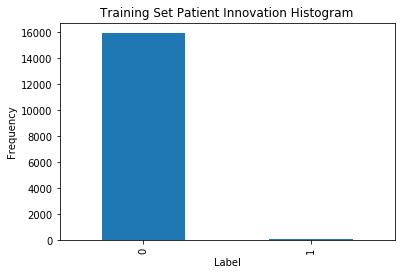

In [57]:
pd.value_counts(data['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data['Label'].value_counts()

### Section 1.2 -  TFIDF + LSA approach #

In [193]:
#importing the training dataset file in a csv

data_tfi = pd.read_csv('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/Training_DatasetA.csv', encoding = "ISO-8859-1")

data_tfi.head(3)

,Label,Content
0,1,my name is klaus rausch im a paraplegic and mo...
1,1,a young girl with cf had a trampoline that she...
2,1,the is a simple medication delivery device dev...


In [66]:
data_tfi['Content_lem'] = data_tfi['Content'].apply(stem_lem_text, type='Lemmatize')

In [ ]:
data_tfi.drop('Content',axis=1,inplace=True)

In [67]:
tf = TfidfVectorizer(analyzer='word',min_df = 0, stop_words=stopwords_train_list, use_idf=True)

In [68]:
tf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['liveing', 'fiorentini', 'draftexpress', 'sasana', 'patwardhan', 'mazzant', 'crawdad', 'guffawing', 'sulcus', 'quelle', 'fustal', 'scripting', 'obadugba', 'vaibhav', 'conceptualizes', 'ellmers', 'windowed', 'pardee', 'nini', 'betaxolol', 'aratana', 'ruption', 'aiddata', 'adebowale', 'bus...m', 'keyes', 'phen', 'trakehners', 'jayalakshmi', 'aroundthe', 'doctorwho', 'mwendawazimu', 'mnets'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [69]:
data_tfi_list = data_tfi['Content_lem'].tolist()

In [70]:
tfidf_matrix =  tf.fit_transform(data_tfi_list)

In [71]:
tfidf_matrix.shape[:]

(16027, 86183)

In [72]:
tfidf_matrix

<16027x86183 sparse matrix of type '<class 'numpy.float64'>'
	with 4887799 stored elements in Compressed Sparse Row format>

In [73]:
X_df_tfidf = pd.DataFrame(tfidf_matrix.toarray())

In [74]:
X_df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
svd = TruncatedSVD(n_components=500, n_iter=10)
lsa = make_pipeline(svd, Normalizer(copy=False))
svd

TruncatedSVD(algorithm='randomized', n_components=500, n_iter=10,
       random_state=None, tol=0.0)

In [79]:
X_tfi = lsa.fit_transform(tfidf_matrix)

In [80]:
print(svd.singular_values_)

[24.00151124 18.28347997 12.7321573  11.02699754 10.78161244 10.17513924
  9.20843239  8.62839422  8.33681732  8.21841233  7.94224706  7.40202372
  6.91626085  6.84076907  6.82158542  6.70662354  6.63491621  6.46482792
  6.29727519  6.25615352  6.12697107  6.09818638  6.01722971  5.86374508
  5.82714498  5.76269312  5.74498193  5.64541851  5.61809908  5.54677939
  5.37969214  5.34105682  5.30410266  5.20951974  5.16237207  5.06846024
  5.01889713  4.97076816  4.91743798  4.90349557  4.79997311  4.75051022
  4.67561414  4.63488617  4.60044181  4.55961217  4.53611955  4.51099396
  4.46657729  4.44203301  4.42818877  4.40617205  4.36089853  4.35269409
  4.31052078  4.28483022  4.22009442  4.21118751  4.19679412  4.19116494
  4.17790188  4.1566365   4.13692513  4.09693052  4.05806506  4.0297102
  4.02315936  4.00734992  3.99601306  3.9828761   3.975043    3.9452101
  3.93161542  3.90652237  3.88551387  3.86366646  3.84571677  3.83933735
  3.8168893   3.81332302  3.79445824  3.7684981   3.7

In [81]:
X_tfi.shape

(16027, 500)

In [82]:
data_X_tfi = pd.DataFrame.from_dict(X_tfi)
data_X_tfi

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.197121,-0.010534,-0.019508,-0.065236,0.121219,-0.026685,-0.032903,-0.024429,0.041690,0.053721,...,-0.045865,0.019868,-0.047999,0.079342,0.002721,-0.068881,-0.105939,0.071484,0.061115,-0.056990
1,0.172335,0.032571,-0.059484,-0.016541,-0.031135,0.095764,-0.025239,-0.042380,0.012566,-0.002636,...,-0.012405,-0.018867,0.014089,-0.014620,-0.020055,0.008301,0.042554,0.010046,0.000067,0.021533
2,0.133826,-0.009595,0.031185,0.146000,0.001130,-0.022941,0.049849,-0.001291,0.115444,-0.047424,...,-0.048311,0.021355,0.018820,-0.066684,0.016244,0.041495,-0.049839,0.010961,-0.035916,0.017824
3,0.123540,-0.033792,-0.000765,0.070505,-0.016656,0.034308,0.019833,-0.009918,0.043482,-0.027267,...,0.030632,-0.022191,0.034335,-0.062759,0.066770,-0.046982,-0.030963,-0.033667,-0.025088,-0.113757
4,0.087584,-0.007341,0.020434,0.041218,0.001118,-0.016929,0.015410,-0.009748,0.037945,-0.012639,...,-0.048718,0.021251,0.006382,-0.045251,0.042559,-0.044352,-0.043729,-0.018138,-0.016034,-0.048129
5,0.168621,-0.037341,0.015038,-0.048350,-0.009105,0.074823,-0.051363,-0.069184,0.050511,-0.022233,...,0.052793,-0.038894,0.022532,-0.011673,0.058668,0.010170,0.002132,-0.032679,-0.035208,-0.020489
6,0.462786,-0.104570,-0.004677,0.151053,-0.111986,0.265518,-0.242182,-0.005889,-0.186891,0.154832,...,0.019023,0.047603,-0.005623,0.036912,0.016159,-0.001224,-0.014809,-0.018162,0.006751,-0.004660
7,0.143401,0.020216,-0.067794,0.026159,0.043929,0.013982,-0.015765,-0.019552,0.078488,-0.031305,...,-0.036354,-0.003389,0.042054,-0.044111,0.030105,-0.046451,0.015980,0.029859,-0.051567,0.017972
8,0.149478,-0.014552,0.008182,0.010001,0.041707,-0.029852,0.013783,0.006390,0.116348,0.068193,...,0.020297,-0.001273,0.013286,0.000303,0.024703,0.008830,0.004865,0.037786,0.022344,-0.003329
9,0.112706,-0.028927,-0.000368,0.045987,-0.004345,-0.000398,-0.007791,-0.024689,0.048187,-0.015205,...,0.073792,0.005814,-0.026195,0.053281,0.021684,-0.030766,-0.086076,0.171906,0.085309,-0.004981


In [83]:
data_Y = data
data_Y.drop('Content_lem',axis=1,inplace=True)
data_Y

,Label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [84]:
data_tfi = pd.concat([data_Y, data_X_tfi], axis=1)
data_tfi

,Label,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,1,0.197121,-0.010534,-0.019508,-0.065236,0.121219,-0.026685,-0.032903,-0.024429,0.041690,...,-0.045865,0.019868,-0.047999,0.079342,0.002721,-0.068881,-0.105939,0.071484,0.061115,-0.056990
1,1,0.172335,0.032571,-0.059484,-0.016541,-0.031135,0.095764,-0.025239,-0.042380,0.012566,...,-0.012405,-0.018867,0.014089,-0.014620,-0.020055,0.008301,0.042554,0.010046,0.000067,0.021533
2,1,0.133826,-0.009595,0.031185,0.146000,0.001130,-0.022941,0.049849,-0.001291,0.115444,...,-0.048311,0.021355,0.018820,-0.066684,0.016244,0.041495,-0.049839,0.010961,-0.035916,0.017824
3,1,0.123540,-0.033792,-0.000765,0.070505,-0.016656,0.034308,0.019833,-0.009918,0.043482,...,0.030632,-0.022191,0.034335,-0.062759,0.066770,-0.046982,-0.030963,-0.033667,-0.025088,-0.113757
4,1,0.087584,-0.007341,0.020434,0.041218,0.001118,-0.016929,0.015410,-0.009748,0.037945,...,-0.048718,0.021251,0.006382,-0.045251,0.042559,-0.044352,-0.043729,-0.018138,-0.016034,-0.048129
5,1,0.168621,-0.037341,0.015038,-0.048350,-0.009105,0.074823,-0.051363,-0.069184,0.050511,...,0.052793,-0.038894,0.022532,-0.011673,0.058668,0.010170,0.002132,-0.032679,-0.035208,-0.020489
6,1,0.462786,-0.104570,-0.004677,0.151053,-0.111986,0.265518,-0.242182,-0.005889,-0.186891,...,0.019023,0.047603,-0.005623,0.036912,0.016159,-0.001224,-0.014809,-0.018162,0.006751,-0.004660
7,1,0.143401,0.020216,-0.067794,0.026159,0.043929,0.013982,-0.015765,-0.019552,0.078488,...,-0.036354,-0.003389,0.042054,-0.044111,0.030105,-0.046451,0.015980,0.029859,-0.051567,0.017972
8,1,0.149478,-0.014552,0.008182,0.010001,0.041707,-0.029852,0.013783,0.006390,0.116348,...,0.020297,-0.001273,0.013286,0.000303,0.024703,0.008830,0.004865,0.037786,0.022344,-0.003329
9,1,0.112706,-0.028927,-0.000368,0.045987,-0.004345,-0.000398,-0.007791,-0.024689,0.048187,...,0.073792,0.005814,-0.026195,0.053281,0.021684,-0.030766,-0.086076,0.171906,0.085309,-0.004981


In [85]:
data_tfi

,Label,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,1,0.197121,-0.010534,-0.019508,-0.065236,0.121219,-0.026685,-0.032903,-0.024429,0.041690,...,-0.045865,0.019868,-0.047999,0.079342,0.002721,-0.068881,-0.105939,0.071484,0.061115,-0.056990
1,1,0.172335,0.032571,-0.059484,-0.016541,-0.031135,0.095764,-0.025239,-0.042380,0.012566,...,-0.012405,-0.018867,0.014089,-0.014620,-0.020055,0.008301,0.042554,0.010046,0.000067,0.021533
2,1,0.133826,-0.009595,0.031185,0.146000,0.001130,-0.022941,0.049849,-0.001291,0.115444,...,-0.048311,0.021355,0.018820,-0.066684,0.016244,0.041495,-0.049839,0.010961,-0.035916,0.017824
3,1,0.123540,-0.033792,-0.000765,0.070505,-0.016656,0.034308,0.019833,-0.009918,0.043482,...,0.030632,-0.022191,0.034335,-0.062759,0.066770,-0.046982,-0.030963,-0.033667,-0.025088,-0.113757
4,1,0.087584,-0.007341,0.020434,0.041218,0.001118,-0.016929,0.015410,-0.009748,0.037945,...,-0.048718,0.021251,0.006382,-0.045251,0.042559,-0.044352,-0.043729,-0.018138,-0.016034,-0.048129
5,1,0.168621,-0.037341,0.015038,-0.048350,-0.009105,0.074823,-0.051363,-0.069184,0.050511,...,0.052793,-0.038894,0.022532,-0.011673,0.058668,0.010170,0.002132,-0.032679,-0.035208,-0.020489
6,1,0.462786,-0.104570,-0.004677,0.151053,-0.111986,0.265518,-0.242182,-0.005889,-0.186891,...,0.019023,0.047603,-0.005623,0.036912,0.016159,-0.001224,-0.014809,-0.018162,0.006751,-0.004660
7,1,0.143401,0.020216,-0.067794,0.026159,0.043929,0.013982,-0.015765,-0.019552,0.078488,...,-0.036354,-0.003389,0.042054,-0.044111,0.030105,-0.046451,0.015980,0.029859,-0.051567,0.017972
8,1,0.149478,-0.014552,0.008182,0.010001,0.041707,-0.029852,0.013783,0.006390,0.116348,...,0.020297,-0.001273,0.013286,0.000303,0.024703,0.008830,0.004865,0.037786,0.022344,-0.003329
9,1,0.112706,-0.028927,-0.000368,0.045987,-0.004345,-0.000398,-0.007791,-0.024689,0.048187,...,0.073792,0.005814,-0.026195,0.053281,0.021684,-0.030766,-0.086076,0.171906,0.085309,-0.004981


In [142]:
data_tfi_labeled = data_tfi[0:1050]
data_tfidf_labeled = X_df_tfidf[0:1050]
data_tfi_unlabeled = data_tfi[1051:]
data_tfidf_unlabeled = X_df_tfidf[1051:]
data_Y_labeled = data_Y[0:1050]

In [182]:
#data_tfi_X_unlabeled

In [180]:
data_X_tfi = data_tfi_labeled.iloc[:,1:501]
data_tfi_X_unlabeled = data_tfi_unlabeled.iloc[:,1:501]

In [98]:
data_Y_labeled = data_Y[0:1050]
data_Y_unlabeled = data_Y[1051:]

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.197121,-0.010534,-0.019508,-0.065236,0.121219,-0.026685,-0.032903,-0.024429,0.041690,0.053721,...,-0.045865,0.019868,-0.047999,0.079342,0.002721,-0.068881,-0.105939,0.071484,0.061115,-0.056990
1,0.172335,0.032571,-0.059484,-0.016541,-0.031135,0.095764,-0.025239,-0.042380,0.012566,-0.002636,...,-0.012405,-0.018867,0.014089,-0.014620,-0.020055,0.008301,0.042554,0.010046,0.000067,0.021533
2,0.133826,-0.009595,0.031185,0.146000,0.001130,-0.022941,0.049849,-0.001291,0.115444,-0.047424,...,-0.048311,0.021355,0.018820,-0.066684,0.016244,0.041495,-0.049839,0.010961,-0.035916,0.017824
3,0.123540,-0.033792,-0.000765,0.070505,-0.016656,0.034308,0.019833,-0.009918,0.043482,-0.027267,...,0.030632,-0.022191,0.034335,-0.062759,0.066770,-0.046982,-0.030963,-0.033667,-0.025088,-0.113757
4,0.087584,-0.007341,0.020434,0.041218,0.001118,-0.016929,0.015410,-0.009748,0.037945,-0.012639,...,-0.048718,0.021251,0.006382,-0.045251,0.042559,-0.044352,-0.043729,-0.018138,-0.016034,-0.048129
5,0.168621,-0.037341,0.015038,-0.048350,-0.009105,0.074823,-0.051363,-0.069184,0.050511,-0.022233,...,0.052793,-0.038894,0.022532,-0.011673,0.058668,0.010170,0.002132,-0.032679,-0.035208,-0.020489
6,0.462786,-0.104570,-0.004677,0.151053,-0.111986,0.265518,-0.242182,-0.005889,-0.186891,0.154832,...,0.019023,0.047603,-0.005623,0.036912,0.016159,-0.001224,-0.014809,-0.018162,0.006751,-0.004660
7,0.143401,0.020216,-0.067794,0.026159,0.043929,0.013982,-0.015765,-0.019552,0.078488,-0.031305,...,-0.036354,-0.003389,0.042054,-0.044111,0.030105,-0.046451,0.015980,0.029859,-0.051567,0.017972
8,0.149478,-0.014552,0.008182,0.010001,0.041707,-0.029852,0.013783,0.006390,0.116348,0.068193,...,0.020297,-0.001273,0.013286,0.000303,0.024703,0.008830,0.004865,0.037786,0.022344,-0.003329
9,0.112706,-0.028927,-0.000368,0.045987,-0.004345,-0.000398,-0.007791,-0.024689,0.048187,-0.015205,...,0.073792,0.005814,-0.026195,0.053281,0.021684,-0.030766,-0.086076,0.171906,0.085309,-0.004981


In [135]:
from sklearn.model_selection import train_test_split

X_tfi_train, X_tfi_test1, Y_tfi_train, Y_tfi_test1 = train_test_split(data_X_tfi, data_Y_labeled, test_size=0.2, random_state=0)

In [100]:
X_tfi_dev, X_tfi_test, Y_tfi_dev, Y_tfi_test = train_test_split(X_tfi_test1, Y_tfi_test1, test_size=0.5, random_state=0)

In [101]:
print(Y_tfi_train.shape)
print(X_tfi_train.shape)
print(Y_tfi_test.shape)
print(X_tfi_test.shape)
print(Y_tfi_dev.shape)
print(X_tfi_dev.shape)

(840,)
(840, 500)
(105,)
(105, 500)
(105,)
(105, 500)


In [102]:
data_train_tfi = pd.concat([Y_tfi_train, X_tfi_train], axis=1)
#data_train_tfi

,Label,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
403,0,0.081621,-0.023523,0.001318,-0.037337,-0.017186,0.026872,-0.039364,-0.028830,0.005516,...,-0.015814,0.070399,-0.019243,0.053792,0.003674,-0.046860,-0.022918,0.026105,0.053792,-0.104294
418,0,0.389701,-0.082875,0.005492,-0.162168,-0.055913,0.107710,-0.149809,-0.065569,-0.058888,...,0.010696,0.013163,-0.032665,0.035567,-0.018417,-0.000949,-0.006901,-0.003669,0.022549,0.019299
486,0,0.359130,-0.076763,0.003500,-0.203014,-0.058725,0.081835,-0.118831,-0.079548,0.030751,...,-0.039868,-0.010485,0.013107,0.075000,-0.052161,-0.025100,0.045570,0.020999,0.023862,0.070808
190,0,0.190848,-0.032499,-0.000078,-0.110566,-0.027578,0.057169,-0.025920,-0.032858,-0.001013,...,-0.017311,-0.103847,-0.070392,0.116923,0.187357,-0.082450,-0.047491,0.074567,-0.051616,0.044608
837,0,0.446858,-0.069469,0.038233,0.267062,-0.052856,0.092865,-0.027939,0.020229,-0.028248,...,0.008752,-0.008737,-0.013109,0.028856,-0.034526,0.027888,0.058538,0.044253,-0.005619,-0.001388
1012,0,0.153963,-0.044036,-0.001710,0.057106,-0.025295,0.037375,0.018739,0.034210,0.115028,...,0.022060,0.047610,-0.040018,0.026236,0.025396,-0.025968,0.036510,-0.009906,-0.022593,-0.022656
847,0,0.290248,0.022733,0.021791,-0.035712,0.077810,-0.092446,0.009133,-0.120763,0.063726,...,-0.013890,0.038157,0.043273,-0.000386,0.030597,-0.054751,-0.024088,0.026613,-0.042928,0.005731
145,0,0.458043,-0.067678,-0.000935,-0.246857,-0.036444,0.062992,-0.036706,-0.068144,0.050179,...,-0.019882,0.010161,0.015429,0.007364,0.045202,0.019788,-0.007276,-0.024078,-0.043016,-0.000449
294,0,0.335005,-0.019814,-0.022229,-0.130995,0.024632,-0.055724,0.011558,-0.057383,-0.117156,...,-0.033614,-0.016637,0.030145,-0.012870,0.010748,0.034887,-0.019303,-0.064888,-0.030319,-0.115938
489,0,0.362306,-0.071797,0.002246,0.061088,-0.039133,0.086505,-0.130049,0.064869,-0.095387,...,0.001093,-0.038264,-0.002758,-0.005830,-0.020486,0.002003,-0.004752,0.000698,-0.021406,0.021578


0    760
1     80
Name: Label, dtype: int64

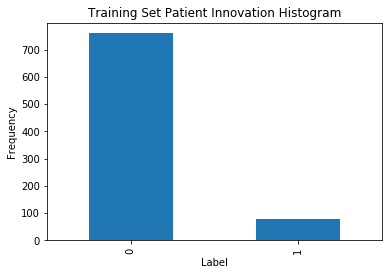

In [103]:
pd.value_counts(data_train_tfi['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data_train_tfi['Label'].value_counts()

In [104]:
data_dev_tfi = pd.concat([Y_tfi_dev, X_tfi_dev], axis=1)
#data_dev_tfi

,Label,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
821,0,0.455745,-0.081684,-0.005402,0.018101,0.019340,-0.049914,-0.086671,0.267864,0.135705,...,0.004948,0.012777,0.057832,0.008790,-0.031504,-0.022429,-0.038978,-0.002189,-0.018314,0.022512
77,1,0.395903,-0.049016,0.004759,-0.143539,0.026976,0.047189,-0.094814,-0.125758,0.042896,...,0.031305,0.029859,0.012345,0.018564,0.065855,-0.015553,-0.029180,-0.030139,-0.006001,-0.008436
738,0,0.562269,-0.116155,0.018690,-0.174863,-0.057190,0.136936,-0.241839,-0.049336,-0.157217,...,0.003991,-0.000480,0.021945,-0.008032,-0.016036,-0.030421,0.028403,-0.019605,0.037403,-0.000350
474,0,0.323835,-0.020137,0.027496,-0.130861,0.019613,-0.061547,-0.001796,0.070333,-0.021570,...,-0.000932,0.032903,-0.014328,-0.028575,0.036074,0.004943,0.050905,-0.058711,-0.021293,-0.033434
732,0,0.283986,-0.084951,0.001079,-0.037329,-0.080153,0.159579,-0.105366,-0.008018,-0.049913,...,-0.032358,-0.041107,0.011912,-0.006212,0.016269,-0.013577,-0.004828,-0.018844,0.015877,0.015871
479,0,0.443328,-0.095359,-0.004524,0.099425,-0.018718,0.003411,0.000033,-0.094014,0.109365,...,0.033652,-0.040301,0.005568,0.085253,-0.016649,0.051290,-0.012904,0.042544,-0.062755,-0.049761
916,0,0.276011,-0.074469,-0.003110,0.118739,-0.019868,-0.002193,0.039680,-0.013600,0.101026,...,0.061829,0.004587,-0.044026,0.045736,-0.059542,0.072176,-0.044446,0.058258,0.011130,-0.002417
698,0,0.349112,-0.068976,-0.028340,0.223518,-0.018270,-0.013873,0.109486,-0.047099,0.183011,...,-0.002789,0.004431,0.017463,-0.000757,0.025715,-0.004292,-0.004227,-0.013628,-0.012123,0.021623
422,0,0.504498,-0.107695,0.018556,-0.301889,-0.044378,0.109477,-0.166037,-0.164117,-0.120063,...,-0.036544,-0.037601,0.028078,0.048053,-0.056021,0.027943,-0.110172,-0.015317,0.029546,0.018527
743,0,0.365690,-0.091782,-0.004282,0.355404,-0.001311,-0.071348,0.073236,-0.028310,-0.133121,...,-0.000210,-0.003799,-0.008396,0.038102,0.019761,-0.006898,0.016203,0.010223,-0.027937,-0.018359


0    95
1    10
Name: Label, dtype: int64

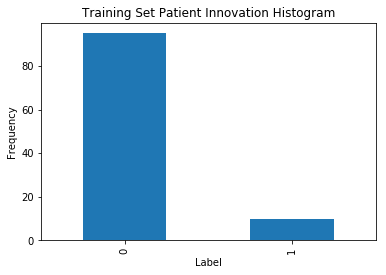

In [105]:
pd.value_counts(data_dev_tfi['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data_dev_tfi['Label'].value_counts()

In [106]:
data_test_tfi = pd.concat([Y_tfi_test, X_tfi_test], axis=1)
#data_test_tfi

,Label,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
141,0,0.211189,0.805100,-0.532404,-0.007749,-0.026968,0.029959,-0.010956,-0.005071,-0.060431,...,-0.000015,-0.000050,-0.000342,0.000198,0.000106,-0.000196,-0.000019,0.000112,0.000027,0.000256
1036,0,0.241621,-0.036617,-0.005798,-0.037884,0.025601,-0.117120,-0.006099,-0.034105,-0.044441,...,0.019174,-0.012287,-0.032301,0.004423,0.011670,0.062988,0.030228,-0.051189,0.022203,-0.008168
898,0,0.294678,-0.051920,0.019251,0.160388,-0.029177,0.068269,-0.016605,0.019430,0.059870,...,-0.001487,0.057128,-0.045016,0.003957,-0.022610,-0.006667,-0.014824,-0.023851,0.049449,0.001282
27,1,0.251913,0.033070,0.015842,0.102039,-0.025708,0.010698,0.015156,-0.035649,0.081430,...,0.013777,0.029076,-0.027382,-0.055006,0.027987,0.013158,0.012557,0.052258,-0.006588,0.010783
641,0,0.195891,-0.006765,0.048754,0.088577,0.040463,0.048944,-0.012689,0.002967,-0.037432,...,0.015330,-0.028222,0.038642,0.008487,-0.000965,-0.020720,-0.026003,0.039382,-0.060123,-0.000410
97,1,0.264362,-0.011552,0.022775,-0.068072,-0.005980,0.064181,-0.040473,-0.064457,0.074619,...,-0.011850,0.006464,-0.064225,-0.037732,0.012576,0.012666,-0.013926,0.009334,-0.012837,-0.018129
857,0,0.314461,-0.073823,0.003205,0.049669,-0.054385,0.158733,-0.013066,-0.040057,0.043632,...,0.002313,0.025299,-0.030677,0.012341,-0.018377,0.015977,-0.007499,0.009018,-0.007226,0.028829
1011,0,0.429168,-0.081053,0.021572,-0.186193,-0.019458,0.044160,-0.129040,-0.170697,-0.017416,...,-0.035388,-0.029762,-0.025755,0.073183,-0.021553,-0.024991,0.003135,0.005901,-0.041328,-0.003765
308,0,0.082302,-0.022530,0.000741,-0.059666,-0.003635,-0.019645,-0.029220,-0.033274,-0.062187,...,0.001072,-0.000316,-0.000563,0.000145,-0.000451,0.005590,-0.002677,0.002922,0.005203,0.002818
655,0,0.356624,-0.075771,-0.002244,0.217841,-0.009393,-0.025638,0.110696,-0.224334,0.064543,...,0.026277,0.038423,-0.007758,0.000020,-0.022675,-0.018235,-0.000221,-0.015437,-0.002539,-0.007741


0    96
1     9
Name: Label, dtype: int64

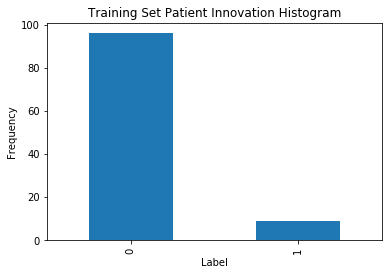

In [107]:
pd.value_counts(data_test_tfi['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data_test_tfi['Label'].value_counts()

In [108]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 12, kind='regular')

#preciso ver qual a documentação para diferentes funções

In [109]:
Y_tfi = data_Y
X_tfi = data_X_tfi
print(Y_tfi.shape)
print(X_tfi.shape)

(1050,)
(1050, 500)


In [110]:
from sklearn.utils.validation import column_or_1d
y_tfi_train = column_or_1d(Y_tfi_train, warn=False)

In [111]:
X_tfi_train_resampled, Y_tfi_train_resampled = sm.fit_sample(X_tfi_train, y_tfi_train)

In [112]:
print(X_tfi_train_resampled.shape)
print(Y_tfi_train_resampled.shape)

(1520, 500)
(1520,)


In [113]:
X_tfi_train_resampled = pd.DataFrame.from_dict(X_tfi_train_resampled)
Y_tfi_train_resampled = pd.DataFrame.from_dict(Y_tfi_train_resampled)

In [114]:
print(X_tfi_train_resampled.info())
print(Y_tfi_train_resampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Columns: 500 entries, 0 to 499
dtypes: float64(500)
memory usage: 5.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 1 columns):
0    1520 non-null int64
dtypes: int64(1)
memory usage: 12.0 KB
None


In [115]:
Y_tfi_train_resampled[0].value_counts()

1    760
0    760
Name: 0, dtype: int64

In [116]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [117]:
from sklearn import tree

det = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=60)
det_tfi_train = det.fit(X_tfi_train_resampled, Y_tfi_train_resampled)

In [118]:
Y_tfi_predDT = det_tfi_train.predict(X_tfi_dev)

Confusion matrix, without normalization
[[88  7]
 [ 5  5]]


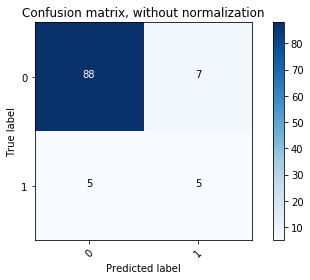

In [119]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_tfi_dev, Y_tfi_predDT)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [120]:
from sklearn.metrics import f1_score

f1score_tfi_DT = f1_score(Y_tfi_dev, Y_tfi_predDT, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_tfi_DT

0.45454545454545453

In [121]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_tfi_dev, Y_tfi_predDT)

0.713157894736842

In [122]:
from sklearn.cluster import KMeans
import numpy as np

kmeans_tfi = KMeans(n_clusters=2, random_state=10, n_init = 100, max_iter=20).fit(X_tfi_train_resampled, Y_tfi_train_resampled)

In [123]:
Y_tfi_predKM = kmeans_tfi.predict(X_tfi_dev)

Confusion matrix, without normalization
[[ 0 95]
 [ 2  8]]


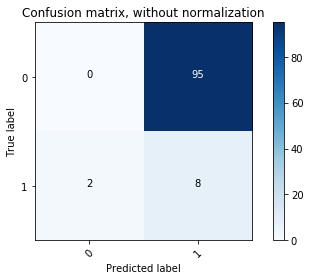

In [124]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_tfi_dev, Y_tfi_predKM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [125]:
from sklearn.metrics import f1_score

f1score_tfi_KM = f1_score(Y_tfi_dev, Y_tfi_predKM, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_tfi_KM

0.1415929203539823

In [126]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_tfi_dev, Y_tfi_predKM)

0.4

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_tfi_pca = pca.fit_transform(X_tfi_test)
print(X_tfi_pca.shape)

(105, 2)


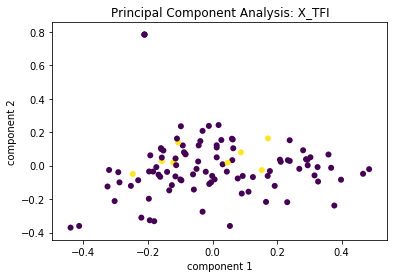

In [174]:
plt.scatter(X_tfi_pca[:, 0], X_tfi_pca[:, 1],
            c=Y_tfi_test, edgecolor='none', alpha=1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Principal Component Analysis: X_TFI')

In [144]:
from sklearn.model_selection import train_test_split

X_tfidf_train, X_tfidf_test1, Y_tfidf_train, Y_tfidf_test1 = train_test_split(data_tfidf_labeled, data_Y_labeled, test_size=0.2, random_state=0)

In [145]:
X_tfidf_dev, X_tfidf_test, Y_tfidf_dev, Y_tfidf_test = train_test_split(X_tfidf_test1, Y_tfidf_test1, test_size=0.5, random_state=0)

In [146]:
print(Y_tfidf_train.shape)
print(X_tfidf_train.shape)
print(Y_tfidf_test.shape)
print(X_tfidf_test.shape)
print(Y_tfidf_dev.shape)
print(X_tfidf_dev.shape)

(840,)
(840, 86183)
(105,)
(105, 86183)
(105,)
(105, 86183)


In [147]:
data_train_tfidf = pd.concat([Y_tfidf_train, X_tfidf_train], axis=1)
data_train_tfidf

,Label,0,1,2,3,4,5,6,7,8,...,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182
403,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
837,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
847,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0    760
1     80
Name: Label, dtype: int64

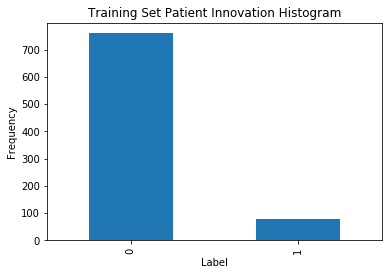

In [148]:
pd.value_counts(data_train_tfidf['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data_train_tfidf['Label'].value_counts()

In [149]:
data_dev_tfidf = pd.concat([Y_tfidf_dev, X_tfidf_dev], axis=1)
data_dev_tfidf

,Label,0,1,2,3,4,5,6,7,8,...,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182
821,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
738,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
732,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
916,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
data_dev_tfidf.to_csv('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/Data_dev_label.csv') 

0    95
1    10
Name: Label, dtype: int64

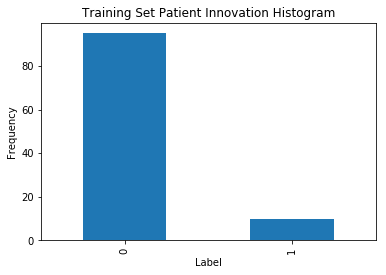

In [151]:
pd.value_counts(data_dev_tfidf['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data_dev_tfidf['Label'].value_counts()

In [152]:
data_test_tfidf = pd.concat([Y_tfidf_test, X_tfidf_test], axis=1)
data_test_tfidf

,Label,0,1,2,3,4,5,6,7,8,...,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182
141,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1011,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
data_test_tfidf.to_csv('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/Data_test_label.csv') 

0    96
1     9
Name: Label, dtype: int64

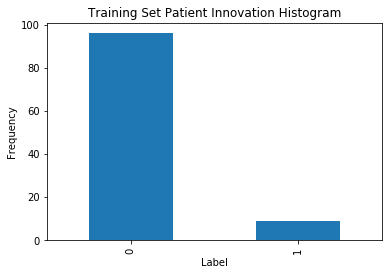

In [154]:
pd.value_counts(data_test_tfidf['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data_test_tfidf['Label'].value_counts()

In [155]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 12, kind='regular')

#preciso ver qual a documentação para diferentes funções

In [156]:
from sklearn.utils.validation import column_or_1d
y_tfidf_train = column_or_1d(Y_tfidf_train, warn=False)

In [157]:
X_tfidf_train_resampled, Y_tfidf_train_resampled = sm.fit_sample(X_tfidf_train, y_tfidf_train)

In [158]:
print(X_tfidf_train_resampled.shape)
print(Y_tfidf_train_resampled.shape)

(1520, 86183)
(1520,)


In [159]:
X_tfidf_train_resampled = pd.DataFrame.from_dict(X_tfidf_train_resampled)
Y_tfidf_train_resampled = pd.DataFrame.from_dict(Y_tfidf_train_resampled)

In [160]:
print(X_tfidf_train_resampled.info())
print(Y_tfidf_train_resampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Columns: 86183 entries, 0 to 86182
dtypes: float64(86183)
memory usage: 999.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 1 columns):
0    1520 non-null int64
dtypes: int64(1)
memory usage: 12.0 KB
None


In [161]:
Y_tfidf_train_resampled[0].value_counts()

1    760
0    760
Name: 0, dtype: int64

In [162]:
from sklearn.naive_bayes import MultinomialNB

NB_Multi_tfidf = MultinomialNB(alpha=1, fit_prior=False)

Y_tfidf_trainNB = Y_tfidf_train_resampled.values

NB_Multi_tfidf.fit(X_tfidf_train_resampled, Y_tfidf_trainNB.ravel())

MultinomialNB(alpha=1, class_prior=None, fit_prior=False)

In [163]:
Y_tfidf_predNB = NB_Multi_tfidf.predict(X_tfidf_dev)

Confusion matrix, without normalization
[[94  1]
 [ 2  8]]


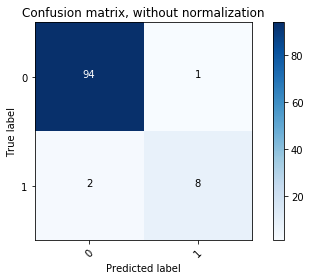

In [164]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_tfidf_dev, Y_tfidf_predNB)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [165]:
f1score_tfidf_NB = f1_score(Y_tfidf_dev, Y_tfidf_predNB, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_tfidf_NB

0.8421052631578948

In [166]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_tfidf_dev, Y_tfidf_predNB)

0.8947368421052632

In [167]:
from sklearn.linear_model import LogisticRegression

Y_tfi_trainLR = Y_tfi_train_resampled.values

lr_tfi = LogisticRegression(fit_intercept=True, random_state=0, solver='liblinear', max_iter=200).fit(X_tfi_train_resampled, Y_tfi_trainLR.ravel())

In [168]:
Y_tfi_predLR = lr_tfi.predict(X_tfi_dev)

Confusion matrix, without normalization
[[93  2]
 [ 2  8]]


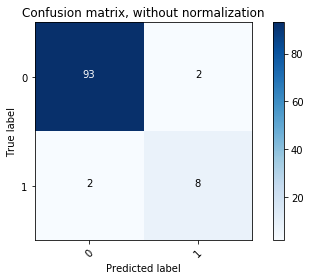

In [169]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_tfi_dev, Y_tfi_predLR)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [170]:
f1score_tfi_LR = f1_score(Y_tfi_dev, Y_tfi_predLR, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_tfi_LR

0.8000000000000002

In [171]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_tfi_dev, Y_tfi_predLR)

0.8894736842105264

In [200]:
UL_Y_tfi_predLR = lr_tfi.predict(data_tfi_X_unlabeled)

In [202]:
UL_Y_tfi_df = pd.DataFrame(UL_Y_tfi_predLR, columns=['Label_tfi'])
UL_Y_tfi_df

,Label_tfi
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [184]:
UL_P_tfi_predLR = lr_tfi.predict_proba(data_tfi_X_unlabeled)[:,1]

In [185]:
UL_Y_tfi_predLR

array([0, 0, 0, ..., 0, 0, 1])

In [186]:
UL_Y_tfi_df = pd.DataFrame(UL_Y_tfi_predLR, columns=['Label_tfi'])
UL_P_tfi_df = pd.DataFrame(UL_P_tfi_predLR, columns=['Prob_tfi'])

#df = pd.DataFrame(np.arange(1,10).reshape(3,3))

0    14400
1      576
Name: Label_tfi, dtype: int64

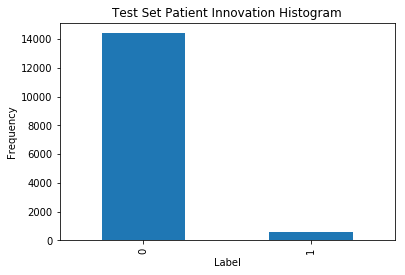

In [187]:
pd.value_counts(UL_Y_tfi_df['Label_tfi']).plot.bar()
plt.title('Test Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
UL_Y_tfi_df['Label_tfi'].value_counts()

In [188]:
UL_data_tfi_label = pd.concat([UL_P_tfi_df, UL_Y_tfi_df], axis=1)

In [198]:
UL_data_label_Content

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,Label_tfi,Prob_tfi,Label,Content
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.041254,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.050837,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.059570,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.064279,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.156255,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.049377,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.349825,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.189773,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.261086,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.055233,NaN,NaN


In [216]:
UL_data_tfi_label.to_csv('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/UnlabeledData_v20_UL_data_tfi_label.csv') 

### Section 1.2 - Count Term Frequency + LSA  #

In [218]:
data_cnt = pd.read_csv('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/Training_DatasetA.csv', encoding = "ISO-8859-1")

In [219]:
data_cnt['Content_lem'] = data_cnt['Content'].apply(stem_lem_text, type='Lemmatize')

In [220]:
data_cnt.drop('Content',axis=1,inplace=True)

data_cnt

,Label,Content_lem
0,1,my name is klaus rausch im a paraplegic and mo...
1,1,a young girl with cf had a trampoline that she...
2,1,the is a simple medication delivery device dev...
3,1,joe kit bag small case to carry a diabetic day...
4,1,is a tubeless insulin pump developed by a fath...
5,1,spacer wa developed by paul watson to help his...
6,1,cherie is a year old breast cancer surviver wh...
7,1,rewalk a robotic exoskeleton to help patient w...
8,1,cadex medical watch cadex is an alarm watch me...
9,1,the flyan chair is a light weight wheel chair ...


In [223]:
from sklearn.feature_extraction.text import CountVectorizer

# training
count_vectorizer = CountVectorizer(analyzer="word", tokenizer=nltk.word_tokenize, preprocessor=None, stop_words=stopwords_train_list, 
                                   lowercase=True, strip_accents=ascii) 

In [236]:
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['liveing', 'fiorentini', 'draftexpress', 'sasana', 'patwardhan', 'mazzant', 'crawdad', 'guffawing', 'sulcus', 'quelle', 'fustal', 'scripting', 'obadugba', 'vaibhav', 'conceptualizes', 'ellmers', 'windowed', 'pardee', 'nini', 'betaxolol', 'aratana', 'ruption', 'aiddata', 'adebowale', 'bus...m', 'keyes', 'phen', 'trakehners', 'jayalakshmi', 'aroundthe', 'doctorwho', 'mwendawazimu', 'mnets'],
        strip_accents=<built-in function ascii>,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function word_tokenize at 0x1a19e15c80>,
        vocabulary=None)

In [237]:
data_cnt_list = data_cnt['Content_lem'].tolist()

In [238]:
count_matrix =  tf.fit_transform(data_cnt_list)

In [239]:
count_matrix.shape[:]

(16027, 86183)

In [240]:
count_matrix

<16027x86183 sparse matrix of type '<class 'numpy.float64'>'
	with 4887799 stored elements in Compressed Sparse Row format>

In [241]:
X_df_count = pd.DataFrame(count_matrix.toarray())

In [242]:
X_df_count

,0,1,2,3,4,5,6,7,8,9,...,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
X_cnt = lsa.fit_transform(count_matrix)

In [245]:
X_cnt.shape

(16027, 500)

In [247]:
data_X_cnt = pd.DataFrame.from_dict(X_cnt)
data_X_cnt

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.200146,-0.010696,-0.019808,-0.066238,0.123079,-0.027095,-0.033408,-0.024804,0.042330,0.054545,...,0.083156,-0.057925,0.047226,-0.046808,-0.024655,-0.041083,0.016024,-0.043722,-0.022833,0.006537
1,0.171132,0.032344,-0.059069,-0.016426,-0.030918,0.095096,-0.025063,-0.042085,0.012478,-0.002618,...,0.008351,0.062489,0.052571,-0.000874,0.069391,-0.029206,0.038287,0.015174,0.024658,0.001576
2,0.134810,-0.009665,0.031415,0.147073,0.001138,-0.023110,0.050216,-0.001301,0.116292,-0.047773,...,-0.023684,-0.005693,-0.003784,-0.066924,-0.018504,0.010907,0.029225,-0.025053,0.040447,0.020535
3,0.124333,-0.034009,-0.000769,0.070958,-0.016763,0.034528,0.019961,-0.009982,0.043761,-0.027442,...,-0.035969,0.093141,-0.024079,-0.087800,0.002613,0.030339,-0.065321,-0.054816,0.047920,-0.032960
4,0.087210,-0.007310,0.020346,0.041042,0.001113,-0.016857,0.015345,-0.009707,0.037783,-0.012585,...,-0.003680,0.064256,-0.036219,-0.052146,-0.010573,-0.027287,-0.012748,-0.042977,-0.008778,0.032245
5,0.168906,-0.037404,0.015064,-0.048432,-0.009121,0.074949,-0.051450,-0.069301,0.050596,-0.022271,...,-0.040740,-0.043180,-0.001295,0.006171,0.025384,-0.021848,0.045181,-0.040368,-0.004197,-0.013272
6,0.456730,-0.103202,-0.004616,0.149077,-0.110521,0.262044,-0.239013,-0.005812,-0.184446,0.152806,...,-0.042459,0.004228,-0.079299,-0.044253,-0.003578,-0.016208,0.013469,-0.009384,0.010890,0.009437
7,0.139374,0.019648,-0.065890,0.025425,0.042696,0.013589,-0.015322,-0.019003,0.076284,-0.030426,...,0.058003,-0.033490,-0.020291,-0.023318,0.020011,0.009686,-0.069788,-0.009158,-0.123770,0.023901
8,0.148232,-0.014431,0.008114,0.009917,0.041359,-0.029603,0.013668,0.006336,0.115378,0.067625,...,-0.005146,-0.019183,-0.040723,-0.003186,0.024676,0.007523,-0.008245,-0.004480,0.049216,-0.078031
9,0.114887,-0.029486,-0.000375,0.046877,-0.004429,-0.000406,-0.007941,-0.025167,0.049120,-0.015499,...,0.052687,0.016842,0.172577,0.005393,-0.036270,-0.055691,0.042915,-0.000461,0.004255,0.030087


In [83]:
data_Y

,Label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [248]:
data_cnt = pd.concat([data_Y, data_X_cnt], axis=1)
data_cnt

,Label,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,1.0,0.200146,-0.010696,-0.019808,-0.066238,0.123079,-0.027095,-0.033408,-0.024804,0.042330,...,0.083156,-0.057925,0.047226,-0.046808,-0.024655,-0.041083,0.016024,-0.043722,-0.022833,0.006537
1,1.0,0.171132,0.032344,-0.059069,-0.016426,-0.030918,0.095096,-0.025063,-0.042085,0.012478,...,0.008351,0.062489,0.052571,-0.000874,0.069391,-0.029206,0.038287,0.015174,0.024658,0.001576
2,1.0,0.134810,-0.009665,0.031415,0.147073,0.001138,-0.023110,0.050216,-0.001301,0.116292,...,-0.023684,-0.005693,-0.003784,-0.066924,-0.018504,0.010907,0.029225,-0.025053,0.040447,0.020535
3,1.0,0.124333,-0.034009,-0.000769,0.070958,-0.016763,0.034528,0.019961,-0.009982,0.043761,...,-0.035969,0.093141,-0.024079,-0.087800,0.002613,0.030339,-0.065321,-0.054816,0.047920,-0.032960
4,1.0,0.087210,-0.007310,0.020346,0.041042,0.001113,-0.016857,0.015345,-0.009707,0.037783,...,-0.003680,0.064256,-0.036219,-0.052146,-0.010573,-0.027287,-0.012748,-0.042977,-0.008778,0.032245
5,1.0,0.168906,-0.037404,0.015064,-0.048432,-0.009121,0.074949,-0.051450,-0.069301,0.050596,...,-0.040740,-0.043180,-0.001295,0.006171,0.025384,-0.021848,0.045181,-0.040368,-0.004197,-0.013272
6,1.0,0.456730,-0.103202,-0.004616,0.149077,-0.110521,0.262044,-0.239013,-0.005812,-0.184446,...,-0.042459,0.004228,-0.079299,-0.044253,-0.003578,-0.016208,0.013469,-0.009384,0.010890,0.009437
7,1.0,0.139374,0.019648,-0.065890,0.025425,0.042696,0.013589,-0.015322,-0.019003,0.076284,...,0.058003,-0.033490,-0.020291,-0.023318,0.020011,0.009686,-0.069788,-0.009158,-0.123770,0.023901
8,1.0,0.148232,-0.014431,0.008114,0.009917,0.041359,-0.029603,0.013668,0.006336,0.115378,...,-0.005146,-0.019183,-0.040723,-0.003186,0.024676,0.007523,-0.008245,-0.004480,0.049216,-0.078031
9,1.0,0.114887,-0.029486,-0.000375,0.046877,-0.004429,-0.000406,-0.007941,-0.025167,0.049120,...,0.052687,0.016842,0.172577,0.005393,-0.036270,-0.055691,0.042915,-0.000461,0.004255,0.030087


In [249]:
data_cnt_labeled = data_cnt[0:1050]
data_count_labeled = X_df_count[0:1050]
data_cnt_unlabeled = data_cnt[1051:]
data_count_unlabeled = X_df_count[1051:]
data_Y_labeled = data_Y[0:1050]

In [277]:
data_count_labeled

,0,1,2,3,4,5,6,7,8,9,...,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
data_X_cnt = data_cnt_labeled.iloc[:,1:501]
data_cnt_X_unlabeled = data_cnt_unlabeled.iloc[:,1:501]

In [252]:
data_Y_labeled = data_Y[0:1050]
data_Y_unlabeled = data_Y[1051:]

In [254]:
X_cnt_train, X_cnt_test1, Y_cnt_train, Y_cnt_test1 = train_test_split(data_X_cnt, data_Y_labeled, test_size=0.2, random_state=0)

In [255]:
X_cnt_dev, X_cnt_test, Y_cnt_dev, Y_cnt_test = train_test_split(X_cnt_test1, Y_cnt_test1, test_size=0.5, random_state=0)

In [256]:
y_cnt_train = column_or_1d(Y_cnt_train, warn=False)

In [257]:
X_cnt_train_resampled, Y_cnt_train_resampled = sm.fit_sample(X_cnt_train, y_cnt_train)

In [258]:
print(Y_cnt_train_resampled.shape)
print(X_cnt_train_resampled.shape)

(1520,)
(1520, 500)


In [259]:
X_cnt_train_resampled = pd.DataFrame.from_dict(X_cnt_train_resampled)
Y_cnt_train_resampled = pd.DataFrame.from_dict(Y_cnt_train_resampled)

print(X_cnt_train_resampled.info())
print(Y_cnt_train_resampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Columns: 500 entries, 0 to 499
dtypes: float64(500)
memory usage: 5.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 1 columns):
0    1520 non-null int64
dtypes: int64(1)
memory usage: 12.0 KB
None


In [260]:
Y_cnt_train_resampled[0].value_counts()

1    760
0    760
Name: 0, dtype: int64

In [261]:
print(Y_cnt_train_resampled.shape)
print(X_cnt_train_resampled.shape)
print(Y_cnt_test.shape)
print(X_cnt_test.shape)
print(Y_cnt_dev.shape)
print(X_cnt_dev.shape)

(1520, 1)
(1520, 500)
(105,)
(105, 500)
(105,)
(105, 500)


In [262]:
from sklearn import tree

DT_cnt = tree.DecisionTreeClassifier()
DT_cnt_train = det.fit(X_cnt_train_resampled, Y_cnt_train_resampled)

In [263]:
Y_cnt_predDT = DT_cnt_train.predict(X_cnt_dev)
Y_cnt_predDT

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

Confusion matrix, without normalization
[[89  6]
 [ 4  6]]


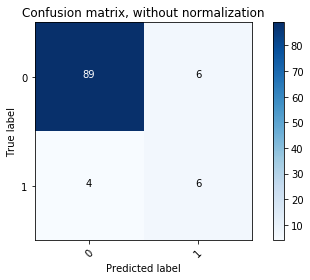

In [264]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_cnt_dev, Y_cnt_predDT)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [265]:
from sklearn.metrics import f1_score

f1score_cnt_DT = f1_score(Y_cnt_dev, Y_cnt_predDT, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_cnt_DT

0.5454545454545454

In [266]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_cnt_dev, Y_cnt_predDT)

0.768421052631579

In [280]:
kmeans_cnt = KMeans(n_clusters=2, random_state=None, n_init = 100, max_iter=30).fit(X_cnt_train_resampled, Y_cnt_train_resampled)

Y_cnt_predKM = kmeans_cnt.fit(X_cnt_train_resampled, Y_cnt_train_resampled).predict(X_cnt_dev)

Confusion matrix, without normalization
[[95  0]
 [ 8  2]]


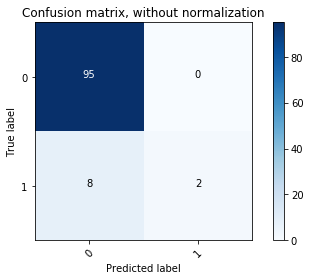

In [268]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_cnt_dev, Y_cnt_predKM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [269]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_cnt_pca = pca.fit_transform(X_cnt_dev)
print(X_cnt_pca.shape)

(105, 2)


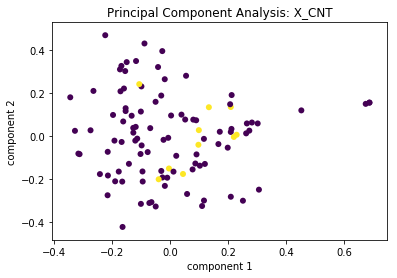

In [270]:
plt.scatter(X_cnt_pca[:, 0], X_cnt_pca[:, 1],
            c=Y_cnt_dev, edgecolor='none', alpha=1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Principal Component Analysis: X_CNT')

In [271]:
from sklearn.metrics import f1_score

f1score_cnt_KM = f1_score(Y_cnt_dev, Y_cnt_predKM, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_cnt_KM

0.33333333333333337

In [272]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_cnt_dev, Y_cnt_predKM)

0.6

In [281]:
from sklearn.model_selection import train_test_split

X_count_train, X_count_test1, Y_count_train, Y_count_test1 = train_test_split(data_count_labeled, data_Y_labeled, test_size=0.2, random_state=0)

In [282]:
X_count_dev, X_count_test, Y_count_dev, Y_count_test = train_test_split(X_count_test1, Y_count_test1, test_size=0.5, random_state=0)

In [283]:
print(Y_count_train.shape)
print(X_count_train.shape)
print(Y_count_test.shape)
print(X_count_test.shape)
print(Y_count_dev.shape)
print(X_count_dev.shape)

(840,)
(840, 86183)
(105,)
(105, 86183)
(105,)
(105, 86183)


In [284]:
data_train_count = pd.concat([Y_count_train, X_count_train], axis=1)
data_train_count

,Label,0,1,2,3,4,5,6,7,8,...,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182
403,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
837,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
847,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0    760
1     80
Name: Label, dtype: int64

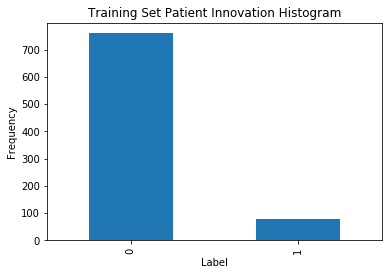

In [285]:
pd.value_counts(data_train_count['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data_train_count['Label'].value_counts()

In [286]:
data_dev_count = pd.concat([Y_count_dev, X_count_dev], axis=1)
data_dev_count

,Label,0,1,2,3,4,5,6,7,8,...,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182
821,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
738,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
732,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
916,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0    95
1    10
Name: Label, dtype: int64

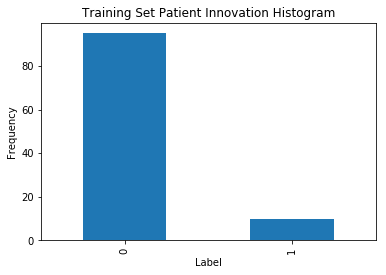

In [287]:
pd.value_counts(data_dev_count['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data_dev_count['Label'].value_counts()

In [288]:
data_test_count = pd.concat([Y_count_test, X_count_test], axis=1)
data_test_count

,Label,0,1,2,3,4,5,6,7,8,...,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182
141,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1011,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0    96
1     9
Name: Label, dtype: int64

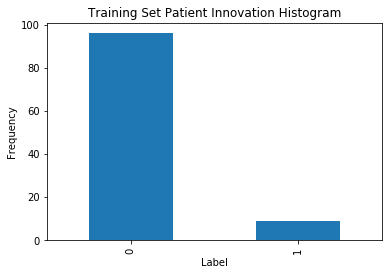

In [289]:
pd.value_counts(data_test_count['Label']).plot.bar()
plt.title('Training Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
data_test_count['Label'].value_counts()

In [290]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 12, kind='regular')

#preciso ver qual a documentação para diferentes funções

In [291]:
from sklearn.utils.validation import column_or_1d
y_count_train = column_or_1d(Y_count_train, warn=False)

In [292]:
X_count_train_resampled, Y_count_train_resampled = sm.fit_sample(X_count_train, y_count_train)

In [293]:
print(X_count_train_resampled.shape)
print(Y_count_train_resampled.shape)

(1520, 86183)
(1520,)


In [294]:
X_count_train_resampled = pd.DataFrame.from_dict(X_count_train_resampled)
Y_count_train_resampled = pd.DataFrame.from_dict(Y_count_train_resampled)

In [295]:
print(X_count_train_resampled.info())
print(Y_count_train_resampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Columns: 86183 entries, 0 to 86182
dtypes: float64(86183)
memory usage: 999.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 1 columns):
0    1520 non-null int64
dtypes: int64(1)
memory usage: 12.0 KB
None


In [296]:
Y_count_train_resampled[0].value_counts()

1    760
0    760
Name: 0, dtype: int64

In [297]:
from sklearn.naive_bayes import MultinomialNB

NB_Multi_count = MultinomialNB(alpha=1, fit_prior=False)

Y_count_trainNB = Y_count_train_resampled.values

NB_Multi_count.fit(X_count_train_resampled, Y_count_trainNB.ravel())

MultinomialNB(alpha=1, class_prior=None, fit_prior=False)

In [298]:
Y_count_predNB = NB_Multi_count.predict(X_count_dev)

Confusion matrix, without normalization
[[94  1]
 [ 2  8]]


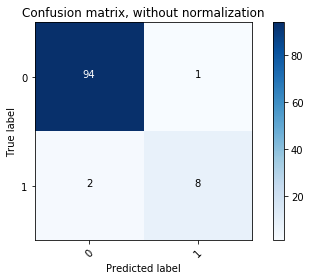

In [299]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_count_dev, Y_count_predNB)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [300]:
f1score_count_NB = f1_score(Y_count_dev, Y_count_predNB, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_count_NB

0.8421052631578948

In [301]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_count_dev, Y_count_predNB)

0.8947368421052632

In [302]:
from sklearn.linear_model import LogisticRegression

LR_cnt = LogisticRegression(random_state=0, solver='liblinear')

Y_cnt_trainLR = Y_cnt_train_resampled.values

LR_cnt.fit(X_cnt_train_resampled, Y_cnt_trainLR.ravel()).predict(X_cnt_dev)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [303]:
Y_cnt_predLR = LR_cnt.predict(X_cnt_dev)

Confusion matrix, without normalization
[[93  2]
 [ 2  8]]


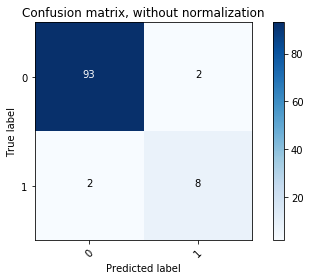

In [304]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_cnt_dev, Y_cnt_predLR)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [305]:
f1score_cnt_LR = f1_score(Y_cnt_dev, Y_cnt_predLR, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_cnt_LR

0.8000000000000002

In [306]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_cnt_dev, Y_cnt_predLR)

0.8894736842105264

### Section 1.3 -  Doc2Vec #

In [307]:
#importing gensim models for doc2vec, as well as some specific nltk sections that are specifically used here

import gensim

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import word_tokenize

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [308]:
data_d2v = pd.read_csv('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/Training_DatasetA.csv', encoding = "ISO-8859-1")

In [309]:
data_d2v

,Label,Content
0,1,my name is klaus rausch im a paraplegic and mo...
1,1,a young girl with cf had a trampoline that she...
2,1,the is a simple medication delivery device dev...
3,1,joe kit bag small case to carry a diabetic day...
4,1,is a tubeless insulin pump developed by a fath...
5,1,spacer was developed by paul watson to help hi...
6,1,cherie is a year old breast cancer surviver wh...
7,1,rewalk a robotic exoskeleton to help patients ...
8,1,cadex medical watch cadex is an alarm watch me...
9,1,the flyan chair is a light weight wheel chair ...


In [310]:
sents_d2v = data_d2v['Content'].values

In [311]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sents_d2v)]

In [312]:
tagged_data[5]

TaggedDocument(words=['spacer', 'was', 'developed', 'by', 'paul', 'watson', 'to', 'help', 'his', 'daughter', 'who', 'was', 'having', 'problems', 'using', 'standard', 'asthma', 'inhalers', 'the', 'spacer', 'is', 'designed', 'to', 'ensure', 'optimal', 'fluid', 'flow', 'through', 'the', 'chamber', 'overcoming', 'some', 'of', 'pressurized', 'metered', 'dose', 'inhalers', 'limitations'], tags=['5'])

In [315]:
d2v_model = Doc2Vec(tagged_data, vector_size = 1000, window = 10, min_count = 2, workers=7, dm = 1, 
                alpha=0.025, min_alpha=0.001)

In [316]:
d2v_model.train(tagged_data, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

In [317]:
print(d2v_model.docvecs.most_similar(1))

[('9379', 0.5890271663665771), ('11989', 0.56843101978302), ('3423', 0.5671336054801941), ('5631', 0.5668491721153259), ('348', 0.565269410610199), ('4131', 0.5640085935592651), ('10743', 0.5619335174560547), ('3474', 0.5587483048439026), ('6056', 0.557210385799408), ('3968', 0.556492805480957)]


In [318]:
d2v_vectors = d2v_model.docvecs.vectors_docs

In [319]:
print(d2v_vectors.shape)

(16027, 1000)


In [320]:
X_d2v = pd.DataFrame.from_dict(d2v_vectors)
X_d2v

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.003228,0.009455,0.031638,-0.047501,-0.056051,0.009985,-0.017799,-0.046402,-0.011704,0.051899,...,-0.020566,-0.005035,0.008418,-0.036284,0.018737,-0.049186,0.003869,-0.035716,-0.004684,0.018382
1,-0.029969,-0.005527,0.028833,-0.028378,-0.038637,0.035899,-0.045026,-0.020247,0.004212,-0.016259,...,-0.029308,-0.010090,-0.017132,-0.005580,0.044500,-0.046635,0.027755,0.011259,0.010202,0.012015
2,-0.020743,0.009795,0.058432,-0.008636,-0.012483,0.002047,-0.029514,-0.008405,0.004985,-0.002230,...,0.025929,0.003990,0.000977,-0.041908,0.023280,-0.068377,0.013530,-0.001039,0.018093,0.006199
3,-0.044147,0.037118,-0.002090,-0.013182,-0.026602,0.004356,-0.005553,0.048614,-0.050606,-0.004976,...,-0.016190,0.001389,0.017843,0.021114,0.005134,0.008619,0.030812,0.006317,-0.000722,0.023083
4,-0.002180,0.008146,0.048131,-0.002317,-0.014441,0.007606,-0.033158,-0.001668,-0.008381,0.002181,...,0.017176,-0.040475,-0.018401,-0.019262,0.012596,-0.049315,0.020350,0.006751,0.018064,0.018470
5,-0.034852,0.014439,0.054172,-0.022084,-0.019285,0.009183,-0.006276,-0.010190,-0.012040,-0.010070,...,-0.018444,0.011974,0.010326,-0.013456,-0.023538,-0.034657,-0.012256,-0.003615,0.007462,-0.003444
6,0.045509,-0.082574,0.008762,0.016966,-0.036859,-0.050008,0.043148,-0.035101,-0.058230,-0.000683,...,-0.111274,-0.020729,0.001873,-0.039753,0.067256,-0.085965,0.021348,-0.033643,-0.056670,0.034169
7,-0.000907,-0.017047,-0.009974,0.011643,-0.018116,0.000320,-0.026779,0.024893,0.002623,-0.023403,...,0.006636,-0.019462,-0.033914,-0.000903,-0.016440,-0.002323,0.029172,0.001711,0.022807,0.010441
8,-0.072899,0.040486,0.116069,-0.017139,0.002347,0.047997,-0.027181,-0.011466,0.008314,-0.006037,...,0.028114,-0.050228,-0.012535,-0.070251,-0.002467,-0.092474,0.030494,-0.070798,0.035674,0.022703
9,-0.036855,0.018950,0.073032,0.004264,0.019056,0.004705,-0.016307,-0.038167,-0.017700,-0.005568,...,0.022950,-0.014537,-0.010822,-0.035883,-0.025794,-0.040835,0.024317,-0.029087,0.019387,0.013613


In [321]:
Y_d2v = data
print(Y_d2v.shape)
print(X_d2v.shape)

(1050,)
(16027, 1000)


In [322]:
X_d2v.shape

(16027, 1000)

In [323]:
data_X_d2v = pd.DataFrame.from_dict(X_d2v)
data_X_d2v

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.003228,0.009455,0.031638,-0.047501,-0.056051,0.009985,-0.017799,-0.046402,-0.011704,0.051899,...,-0.020566,-0.005035,0.008418,-0.036284,0.018737,-0.049186,0.003869,-0.035716,-0.004684,0.018382
1,-0.029969,-0.005527,0.028833,-0.028378,-0.038637,0.035899,-0.045026,-0.020247,0.004212,-0.016259,...,-0.029308,-0.010090,-0.017132,-0.005580,0.044500,-0.046635,0.027755,0.011259,0.010202,0.012015
2,-0.020743,0.009795,0.058432,-0.008636,-0.012483,0.002047,-0.029514,-0.008405,0.004985,-0.002230,...,0.025929,0.003990,0.000977,-0.041908,0.023280,-0.068377,0.013530,-0.001039,0.018093,0.006199
3,-0.044147,0.037118,-0.002090,-0.013182,-0.026602,0.004356,-0.005553,0.048614,-0.050606,-0.004976,...,-0.016190,0.001389,0.017843,0.021114,0.005134,0.008619,0.030812,0.006317,-0.000722,0.023083
4,-0.002180,0.008146,0.048131,-0.002317,-0.014441,0.007606,-0.033158,-0.001668,-0.008381,0.002181,...,0.017176,-0.040475,-0.018401,-0.019262,0.012596,-0.049315,0.020350,0.006751,0.018064,0.018470
5,-0.034852,0.014439,0.054172,-0.022084,-0.019285,0.009183,-0.006276,-0.010190,-0.012040,-0.010070,...,-0.018444,0.011974,0.010326,-0.013456,-0.023538,-0.034657,-0.012256,-0.003615,0.007462,-0.003444
6,0.045509,-0.082574,0.008762,0.016966,-0.036859,-0.050008,0.043148,-0.035101,-0.058230,-0.000683,...,-0.111274,-0.020729,0.001873,-0.039753,0.067256,-0.085965,0.021348,-0.033643,-0.056670,0.034169
7,-0.000907,-0.017047,-0.009974,0.011643,-0.018116,0.000320,-0.026779,0.024893,0.002623,-0.023403,...,0.006636,-0.019462,-0.033914,-0.000903,-0.016440,-0.002323,0.029172,0.001711,0.022807,0.010441
8,-0.072899,0.040486,0.116069,-0.017139,0.002347,0.047997,-0.027181,-0.011466,0.008314,-0.006037,...,0.028114,-0.050228,-0.012535,-0.070251,-0.002467,-0.092474,0.030494,-0.070798,0.035674,0.022703
9,-0.036855,0.018950,0.073032,0.004264,0.019056,0.004705,-0.016307,-0.038167,-0.017700,-0.005568,...,0.022950,-0.014537,-0.010822,-0.035883,-0.025794,-0.040835,0.024317,-0.029087,0.019387,0.013613


In [324]:
data_Y = data
data_Y

,Label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [325]:
data_d2v = pd.concat([data_Y, data_X_d2v], axis=1)
data_d2v

,Label,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,1,-0.003228,0.009455,0.031638,-0.047501,-0.056051,0.009985,-0.017799,-0.046402,-0.011704,...,-0.020566,-0.005035,0.008418,-0.036284,0.018737,-0.049186,0.003869,-0.035716,-0.004684,0.018382
1,1,-0.029969,-0.005527,0.028833,-0.028378,-0.038637,0.035899,-0.045026,-0.020247,0.004212,...,-0.029308,-0.010090,-0.017132,-0.005580,0.044500,-0.046635,0.027755,0.011259,0.010202,0.012015
2,1,-0.020743,0.009795,0.058432,-0.008636,-0.012483,0.002047,-0.029514,-0.008405,0.004985,...,0.025929,0.003990,0.000977,-0.041908,0.023280,-0.068377,0.013530,-0.001039,0.018093,0.006199
3,1,-0.044147,0.037118,-0.002090,-0.013182,-0.026602,0.004356,-0.005553,0.048614,-0.050606,...,-0.016190,0.001389,0.017843,0.021114,0.005134,0.008619,0.030812,0.006317,-0.000722,0.023083
4,1,-0.002180,0.008146,0.048131,-0.002317,-0.014441,0.007606,-0.033158,-0.001668,-0.008381,...,0.017176,-0.040475,-0.018401,-0.019262,0.012596,-0.049315,0.020350,0.006751,0.018064,0.018470
5,1,-0.034852,0.014439,0.054172,-0.022084,-0.019285,0.009183,-0.006276,-0.010190,-0.012040,...,-0.018444,0.011974,0.010326,-0.013456,-0.023538,-0.034657,-0.012256,-0.003615,0.007462,-0.003444
6,1,0.045509,-0.082574,0.008762,0.016966,-0.036859,-0.050008,0.043148,-0.035101,-0.058230,...,-0.111274,-0.020729,0.001873,-0.039753,0.067256,-0.085965,0.021348,-0.033643,-0.056670,0.034169
7,1,-0.000907,-0.017047,-0.009974,0.011643,-0.018116,0.000320,-0.026779,0.024893,0.002623,...,0.006636,-0.019462,-0.033914,-0.000903,-0.016440,-0.002323,0.029172,0.001711,0.022807,0.010441
8,1,-0.072899,0.040486,0.116069,-0.017139,0.002347,0.047997,-0.027181,-0.011466,0.008314,...,0.028114,-0.050228,-0.012535,-0.070251,-0.002467,-0.092474,0.030494,-0.070798,0.035674,0.022703
9,1,-0.036855,0.018950,0.073032,0.004264,0.019056,0.004705,-0.016307,-0.038167,-0.017700,...,0.022950,-0.014537,-0.010822,-0.035883,-0.025794,-0.040835,0.024317,-0.029087,0.019387,0.013613


In [326]:
data_d2v_labeled = data_d2v[0:1050]
data_d2v_unlabeled = data_d2v[1051:]
data_Y_labeled = data_Y[0:1050]

In [332]:
data_X_d2v

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.003228,0.009455,0.031638,-0.047501,-0.056051,0.009985,-0.017799,-0.046402,-0.011704,0.051899,...,-0.026485,-0.006568,-0.001833,-0.022392,0.003317,0.030690,0.050626,-0.038142,-0.020720,-0.013367
1,-0.029969,-0.005527,0.028833,-0.028378,-0.038637,0.035899,-0.045026,-0.020247,0.004212,-0.016259,...,-0.029924,-0.053828,0.030451,0.019217,0.021189,-0.005794,-0.019881,0.011517,-0.008432,-0.004956
2,-0.020743,0.009795,0.058432,-0.008636,-0.012483,0.002047,-0.029514,-0.008405,0.004985,-0.002230,...,-0.025810,-0.026855,0.014209,-0.002044,0.038626,0.026375,0.019207,-0.058370,-0.031883,-0.000798
3,-0.044147,0.037118,-0.002090,-0.013182,-0.026602,0.004356,-0.005553,0.048614,-0.050606,-0.004976,...,0.135956,0.111345,-0.060923,-0.015004,-0.002277,0.043143,-0.025207,0.039455,0.001054,-0.040448
4,-0.002180,0.008146,0.048131,-0.002317,-0.014441,0.007606,-0.033158,-0.001668,-0.008381,0.002181,...,-0.015636,-0.069894,0.044542,0.035126,0.012052,-0.023253,-0.030774,-0.099932,-0.036868,0.015641
5,-0.034852,0.014439,0.054172,-0.022084,-0.019285,0.009183,-0.006276,-0.010190,-0.012040,-0.010070,...,-0.020956,-0.022606,0.013434,0.015698,-0.005592,0.001020,-0.018281,-0.013710,-0.015240,0.022244
6,0.045509,-0.082574,0.008762,0.016966,-0.036859,-0.050008,0.043148,-0.035101,-0.058230,-0.000683,...,0.145656,0.069413,-0.033231,-0.103995,0.091938,0.122040,0.085206,-0.020253,-0.004174,0.028524
7,-0.000907,-0.017047,-0.009974,0.011643,-0.018116,0.000320,-0.026779,0.024893,0.002623,-0.023403,...,-0.013330,0.010437,0.010532,0.001540,0.027850,0.003778,-0.006872,0.012641,-0.016796,-0.032214
8,-0.072899,0.040486,0.116069,-0.017139,0.002347,0.047997,-0.027181,-0.011466,0.008314,-0.006037,...,-0.041867,-0.041058,0.055478,0.028122,0.044125,0.025363,0.002839,-0.049352,-0.022275,-0.006891
9,-0.036855,0.018950,0.073032,0.004264,0.019056,0.004705,-0.016307,-0.038167,-0.017700,-0.005568,...,-0.030724,-0.011318,0.025989,-0.007682,0.022656,-0.023299,-0.026473,-0.004541,-0.039324,0.005222


In [328]:
data_X_d2v = data_d2v_labeled.iloc[:,1:501]
data_d2v_X_unlabeled = data_d2v_unlabeled.iloc[:,1:501]

In [329]:
data_Y_labeled = data_Y[0:1050]
data_Y_unlabeled = data_Y[1051:]

In [333]:
X_d2v_train, X_d2v_test1, Y_d2v_train, Y_d2v_test1 = train_test_split(data_X_d2v, data_Y_labeled, test_size=0.2, random_state=0)

In [334]:
X_d2v_dev, X_d2v_test, Y_d2v_dev, Y_d2v_test = train_test_split(X_d2v_test1, Y_d2v_test1, test_size=0.5, random_state=0)

In [335]:
print(Y_d2v_train.shape)
print(X_d2v_train.shape)
print(Y_d2v_test.shape)
print(X_d2v_test.shape)
print(Y_d2v_dev.shape)
print(X_d2v_dev.shape)

(840, 1)
(840, 500)
(105, 1)
(105, 500)
(105, 1)
(105, 500)


In [336]:
X_d2v_train

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
403,-0.004637,0.020626,0.017200,-0.001220,0.007539,0.004544,-0.009728,-0.000334,0.007526,0.001480,...,-0.008390,-0.012115,0.016283,-0.006568,0.011157,0.000065,-0.001422,-0.005843,-0.011528,0.001268
418,0.442950,0.204623,-0.470521,-0.198619,-0.241595,-0.219718,0.147536,-0.530366,0.208489,-0.028599,...,-0.017655,-0.101625,-0.267702,0.318503,-0.105568,-0.077823,0.153095,-0.080086,0.036701,-0.193538
486,-0.061974,0.184346,0.137120,-0.022648,-0.170858,0.127156,-0.052546,-0.062028,0.036970,0.019316,...,0.038979,-0.071625,0.028349,0.079712,-0.000997,-0.071945,-0.001201,0.019388,-0.065102,0.018508
190,-0.000058,0.103049,0.253439,-0.026088,0.003187,0.142958,-0.103599,-0.076668,-0.012228,0.057694,...,-0.187848,-0.240541,0.198324,-0.028684,-0.041310,0.064396,-0.099023,-0.278269,0.022706,0.187755
837,-0.059141,0.040028,0.113125,-0.041172,-0.034374,-0.015759,-0.071300,-0.062893,-0.146508,-0.009054,...,-0.137532,-0.178643,0.037170,0.016092,-0.097501,-0.106167,-0.042144,-0.135804,-0.051912,0.081203
1012,0.016165,-0.040902,-0.093470,0.056096,0.038358,-0.011139,0.013853,-0.035383,0.069441,0.003804,...,-0.078254,0.019515,-0.013374,0.020043,0.025700,-0.006613,0.021101,-0.041894,0.032708,-0.060184
847,-0.145944,0.049259,0.267583,0.211797,-0.178810,0.125452,0.060812,0.063025,-0.064330,0.075800,...,-0.095571,-0.145049,0.049365,-0.290839,0.034881,0.090695,-0.155784,-0.108533,-0.158905,-0.031324
145,-0.093399,0.164248,-0.096820,-0.215253,-0.122980,-0.360048,-0.175634,0.050831,0.208289,-0.061967,...,0.369228,0.369378,-0.494137,-0.183755,0.083874,0.240021,0.230346,0.416992,-0.041483,-0.224274
294,0.152749,0.168089,-0.308299,0.168767,-0.069759,0.118786,-0.121643,0.215658,0.054185,0.090483,...,-0.134368,-0.193066,-0.318486,0.096952,-0.149520,-0.272416,-0.200528,-0.258835,-0.209360,-0.021998
489,-0.036739,0.004456,0.107642,-0.001192,-0.023799,0.017776,0.061515,0.022095,-0.073803,0.041275,...,-0.127801,-0.197493,0.107279,0.066210,0.045267,0.026437,-0.018574,0.024599,0.102520,0.052593


In [337]:
y_d2v_train = column_or_1d(Y_d2v_train, warn=False)
#print(y_d2v.shape)

In [338]:
X_d2v_train_resampled, Y_d2v_train_resampled = sm.fit_sample(X_d2v_train, y_d2v_train)

In [339]:
print(Y_d2v_train_resampled.shape)
print(X_d2v_train_resampled.shape)

(1520,)
(1520, 500)


In [340]:
X_d2v_train_resampled = pd.DataFrame.from_dict(X_d2v_train_resampled)
Y_d2v_train_resampled = pd.DataFrame.from_dict(Y_d2v_train_resampled)

In [341]:
print(X_d2v_train_resampled.info())
print(Y_d2v_train_resampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Columns: 500 entries, 0 to 499
dtypes: float32(500)
memory usage: 2.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 1 columns):
0    1520 non-null int64
dtypes: int64(1)
memory usage: 12.0 KB
None


In [342]:
Y_d2v_train_resampled[0].value_counts()

1    760
0    760
Name: 0, dtype: int64

In [343]:
from sklearn import tree

DT_d2v = tree.DecisionTreeClassifier()
DT_d2v_train = DT_d2v.fit(X_d2v_train_resampled, Y_d2v_train_resampled)

In [344]:
Y_d2v_predDT = DT_d2v.predict(X_d2v_dev)
Y_d2v_predDT

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Confusion matrix, without normalization
[[86  9]
 [ 7  3]]


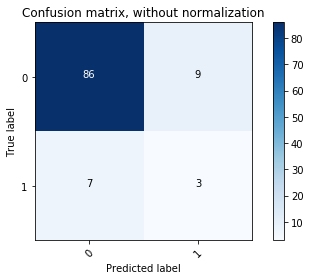

In [345]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_d2v_dev, Y_d2v_predDT)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [346]:
from sklearn.metrics import f1_score

f1score_d2v_DT = f1_score(Y_d2v_dev, Y_d2v_predDT, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_d2v_DT

0.2727272727272727

In [347]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_d2v_dev, Y_d2v_predDT)

0.6026315789473684

In [348]:
from sklearn.cluster import KMeans
import numpy as np

KM_d2v = KMeans(n_clusters=2, random_state=None, n_init = 100, max_iter=30).fit(X_d2v_train_resampled, Y_d2v_train_resampled)

Y_d2v_predKM = KM_d2v.fit(X_d2v_train, Y_d2v_train).predict(X_d2v_dev)

Confusion matrix, without normalization
[[10 85]
 [ 0 10]]


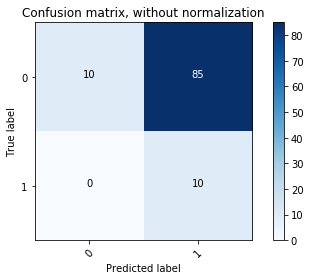

In [349]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_d2v_dev, Y_d2v_predKM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [350]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_d2v_pca = pca.fit_transform(X_d2v_dev)
print(X_d2v_pca.shape)

(105, 2)


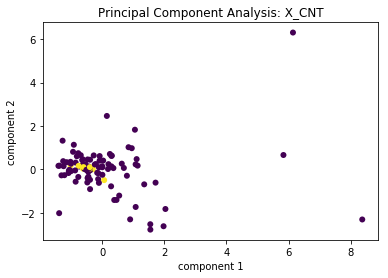

In [351]:
plt.scatter(X_d2v_pca[:, 0], X_d2v_pca[:, 1],
            c=Y_d2v_dev, edgecolor='none', alpha=1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Principal Component Analysis: X_CNT')

In [352]:
from sklearn.metrics import f1_score

f1score_d2v_KM = f1_score(Y_d2v_dev, Y_d2v_predKM, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_d2v_KM

0.1904761904761905

In [353]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_d2v_dev, Y_d2v_predKM)

0.5526315789473684

In [354]:
from sklearn.linear_model import LogisticRegression

LR_d2v = LogisticRegression(random_state=0, solver='liblinear')

Y_d2v_trainLR = Y_d2v_train_resampled.values

In [355]:
LR_d2v.fit(X_d2v_train_resampled, Y_d2v_trainLR.ravel()).predict(X_d2v_dev)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [356]:
Y_d2v_predLR = LR_d2v.predict(X_d2v_dev)

Confusion matrix, without normalization
[[76 19]
 [ 2  8]]


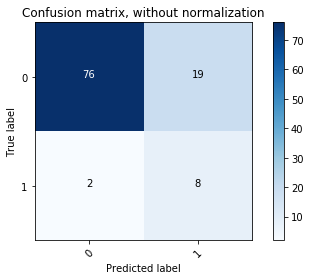

In [357]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_d2v_dev, Y_d2v_predLR)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Normalized confusion matrix')

plt.show()

In [358]:
f1score_d2v_LR = f1_score(Y_d2v_dev, Y_d2v_predLR, labels=None, pos_label=1, average='binary', sample_weight=None)

f1score_d2v_LR

0.43243243243243246

In [359]:
#Calculating ROC_AUC_Score

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_d2v_dev, Y_d2v_predLR)

0.8

# Final Part - Applying winning classifier to non-labeled dataset

In [200]:
UL_Y_tfi_predLR = lr_tfi.predict(data_tfi_X_unlabeled)

In [202]:
UL_Y_tfi_df = pd.DataFrame(UL_Y_tfi_predLR, columns=['Label_tfi'])
UL_Y_tfi_df

,Label_tfi
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [184]:
UL_P_tfi_predLR = lr_tfi.predict_proba(data_tfi_X_unlabeled)[:,1]

In [185]:
UL_Y_tfi_predLR

array([0, 0, 0, ..., 0, 0, 1])

In [186]:
UL_Y_tfi_df = pd.DataFrame(UL_Y_tfi_predLR, columns=['Label_tfi'])
UL_P_tfi_df = pd.DataFrame(UL_P_tfi_predLR, columns=['Prob_tfi'])

#df = pd.DataFrame(np.arange(1,10).reshape(3,3))

0    14400
1      576
Name: Label_tfi, dtype: int64

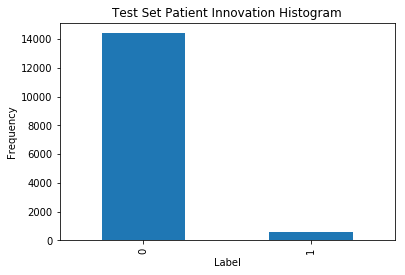

In [187]:
pd.value_counts(UL_Y_tfi_df['Label_tfi']).plot.bar()
plt.title('Test Set Patient Innovation Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
UL_Y_tfi_df['Label_tfi'].value_counts()

In [188]:
UL_data_tfi_label = pd.concat([UL_P_tfi_df, UL_Y_tfi_df], axis=1)

In [198]:
UL_data_label_Content

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,Label_tfi,Prob_tfi,Label,Content
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.041254,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.050837,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.059570,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.064279,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.156255,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.049377,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.349825,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.189773,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.261086,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.055233,NaN,NaN


In [216]:
UL_data_tfi_label.to_csv('/Users/ricardomiguelsilva/Desktop/Final_Notebooks/UnlabeledData_v20_UL_data_tfi_label.csv') 